# Choose a Car Profitably [Car Price prediction] PART.2

In this part we will focus on feature engineering and building a several models.
Reference: Car Price Prediction (the _A_Team) [Prt.2 EDA]

This work has made by Paul Krivchenia in cooperation with Vitaliy Burlakov (a.k.a Vetak8):

[My GitHub](https://github.com/Paull-dark)

[Vetak's GitHub](https://github.com/vetak8)

[Vetak's Kaggle](https://www.kaggle.com/vitaliyburlakov)

<img src = 'http://3.bp.blogspot.com/--knDCWYzMOw/UqzpwyctJeI/AAAAAAAAAT8/Ui66KNd1nXM/s1600/7egylh57hbhs.jpg' width= '400px'>

<a id="sec2"></a>
# [1. INDEX](#sec1)

<a id="sec1"></a>
1. [INDEX](#sec1)
2. [IMPORT LIBRARRIES](#sec2)
3. [Functions and Classes](#sec3)
    * [3.1 General Functions](#sec3.1)
    * [3.2 Classes](#sec3.2)
    * [3.3 Functions for feature engineering](#sec3.3)
4. [Load and Chek the Dataset](#sec4)
5. [Feature Engeneering](#sec5)
    * [5.1 Target](#sec5.1)
    * [5.2 Body_type & Model_name](#sec5.2)
    * [5.3 Color](#sec5.3)
    * [5.4 Model_name](#sec5.4)
    * [5.5 Description](#sec5.5)
    * [5.6 Equipment dict](#sec5.6)
    * [5.7 Fuel_type](#sec5.7)
    * [5.8 Mileage](#sec5.8)
    * [5.9 Engine displacement](#sec5.9)
    * [5.10 Engine Power](#sec5.10)
    * [5.11 Super Gen](#sec5.11)
    * [5.12 Wheel Drive](#sec5.12)
    * [5.13 Price drop index](#sec5.13)
    * [5.14 Dropping cols without content](#sec5.14)
    * [5.15 Vendor](#sec5.15)
    * [5.16 Handling multocorrelation out](#sec5.16)
    * [5.17 Clustering](#sec5.17)
    * [5.18 Log Func](#sec5.18)
    * [5.19 Encoding](#sec5.19)
    * [5.20 Dropping columns out](#sec5.20)
6. [Prepare the data for models](#sec6)
7. [MODELS](#sec7)
    * [7.1 Random Forest](#sec7.1)
    * [7.2 EXTRA-TREE](#sec7.2)
    * [7.3 XGBoost](#sec7.3)
    * [7.4 XGBoost](#sec7.4)
    * [7.5 LightGBM](#sec7.5)
    * [7.6 LightGBM+OPTUNA](#sec7.6)
    * [7.7 SKLEARN BOOSTER](#sec7.7)
    * [7.8 STACKING](#sec7.8)
8. [CONCLUSION](#sec8)

<a id="sec2"></a>
# [2. Import LIBRARIES](#sec2)

In [1]:
from Preprocessing import df_combined

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import ast
import warnings
from jupyterthemes import jtplot

from textblob import TextBlob  # for sentiment analysis
from wordcloud import WordCloud, STOPWORDS  # for creating cloud of words
from sklearn.cluster import DBSCAN

from sklearn.decomposition import PCA 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import f_regression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRFRegressor
from catboost import CatBoostRegressor
import xgboost as xgb
import lightgbm  as lgb
import lightgbm
import optuna


from xgboost import plot_importance

warnings.filterwarnings("ignore")

%matplotlib inline
pd.set_option('display.max_rows', 50)  # Show more rows
pd.set_option('display.max_columns', 50)  # Show more columns
plt.style.use('ggplot')  # Nice plotting

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

C:\Users\vetak\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


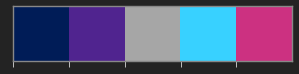

In [2]:
# Set project colors
colors = ['#001c57', '#50248f', '#a6a6a6', '#38d1ff','#cc3181']
sns.palplot(sns.color_palette(colors))

<a id="sec3"></a>
# [3. Functions and Classes](#sec3)
[(INDEX)](#sec1)

<a id="sec3.1"></a>
## [3.1 GENERAL FUNCTIONS](#sec3.1)
[(INDEX)](#sec1)

In [3]:
def missing_vars(data, column, random_proba=True):
    '''Function is called for filling of missing data'''
    # With using probability and random choise

    if random_proba:
        col_name = data[column].value_counts().index.to_list(
        )  # get list of values
        col_distr = data[column].value_counts(
            normalize=True).values  # get list of probs
        missing = data[col].isnull()  # flag of missing val
        # substitute values from the list of names in accordance with the probability of meeting the name
        data.loc[missing, [column]] = np.random.choice(col_name,
                                                    size=len(data[missing]),
                                                    p=col_distr)

    # Using  most common in  column
    data[col] = data[col].fillna(data[col].value_counts().index[0])

In [4]:
def get_variable_distribution(col, title=None):
    '''Function is called to plot feture distribution'''

    title = title if title is not None else f"Distribution for '{col}"
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5),)
    fig = sm.qqplot(col, fit=True, line='45', ax=ax1)
    fig.suptitle(title, fontsize=20)

    sns.distplot(col.values, bins=20, color=colors[1], ax=ax2)
#     sns.violinplot(col.values, color=colors[3], bw=.3, cut=1, linewidth=4)
    sns.boxplot(col.values,color=colors[3])

    ax1.set_title('QQ-plot')
    ax2.set_title('Distribution')
    ax3.set_title('Boxplot')

    plt.show()

In [5]:
def corr_matrix(data, det=True, pltx=10, plty=10):
    '''Funcion is called for making correlation matrix'''

    corr = data.corr()
    if det:

        evals, evec = np.linalg.eig(corr)
        ev_product = np.prod(evals)

        print(f'Rank of Matrix: {np.linalg.matrix_rank(corr)}')
        print(f'Determinant of matrix: {np.round(ev_product,4)}')
        print(f'Shape of matrix: {np.shape(corr)}')

    plt.figure(figsize=(pltx, plty))
    sns.heatmap(corr[(corr >= .2) | (corr <= -.2)],
                cmap='viridis',
                vmin=-1.0,
                linewidths=0.1,
                annot=True,
                annot_kws={"size": 10},
                square=True)
    #     sns.heatmap(X,vmin=0,vmax=.9,annot=True,square=True)
    plt.show()

In [6]:
def cleanTxt(text):
    '''Function is called for cleaning text from trash
    INPUT: dirty string
    OUTPUT: More or less clean string'''

    text = re.sub(r'@[А-Яа-я0-9]+', '', text)  # Remove @
    text = re.sub(r'#', '', text)  # remove #
    text = re.sub(r'{', '', text)
    text = re.sub(r'}', '', text)
    text = re.sub('^а-яА-Я', ' ', text)
    text = re.sub(r'https?:\/\/\S+', '', text)  # remove hyperlink
    text = re.sub(r'\n', '', text)
    text = re.sub(r'✅', '', text)
    text = re.sub(r'👍🏻', '', text)
    text = re.sub(r'✨', '', text)
    
    
    # there are much more emoji. I don't know how to identify them so far

    text = text.strip()
    text = text.lower()
    #text = text.split()
    return text

In [7]:
def to_log(df, cols_to_log):
    'smart log'
    for col in cols_to_log:
        a = df[col].min()
        if a <= 0:                        
            df[col] = np.log(df[col] + (int(abs(df[col].min()))+2))
        
        df[col] = np.log(df[col])
    return df

In [8]:
# Defining MAPE function since it was removed from sklearn
def mape(y_true, y_pred):
    'Function to calculate MAPE metric'
#     y_true, y_pred = np.expm1(y_true), np.expm1(y_pred)
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true) * 100)

In [9]:
def get_regression_metrics(report_df,y_true, y_pred, name):
    '''Create and add metrics into a pandas DF after experiment'''
    y_true, y_pred = np.expm1(y_true), np.expm1(y_pred)

    report = pd.DataFrame(columns={'MAPE'}, data=[0])
    try:
        report['MAPE'] = mape(y_true, y_pred)
    except:
        report['MAPE'] = 'failed'
    report['MAE'] = mean_absolute_error(y_true, y_pred)
    report['MSE'] = mean_squared_error(y_true, y_pred)
    report['RMSE'] = np.sqrt(mean_squared_error(y_true, y_pred))

    report.index = [name]
    report_df = report_df.append(report)
    return report_df

<a id="sec3.2"></a>
## [3.2 Classes](#sec3.2)
[(INDEX)](#sec1)

In [10]:
class Encoder():
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def label_encoder(self, column):
        '''Method is called for label encoding'''
        le = LabelEncoder()
        self.dataframe[column] = le.fit_transform(self.dataframe[column])

    def hot_encoder(self, column):
        '''Method is calling for hot encoding'''
        ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
        aux_df = pd.DataFrame(ohe.fit_transform(self.dataframe[[column]]))
        aux_df.columns = ohe.get_feature_names([f'hot_{column}'])
        self.dataframe = self.dataframe.drop(col, axis=1)
        self.dataframe = pd.concat([self.dataframe, aux_df], axis=1)
        return self.dataframe

In [11]:
class Outliers_detector():
    def __init__(self, df):
        self.df = df

    def get_IQR_outliers(self, column):
        '''Method is called to detect IQR outliers'''
        outliers = dict()
        q1, q3 = np.percentile(sorted(self.df[column]), [25, 75])

        IQR = q3 - q1

        l_b = q1 - (1.5 * IQR)  # lower bound
        u_b = q3 + (1.5 * IQR)  # upper bound
        outl_count = len(self.df[column][self.df[column] < l_b]) + len(
            self.df[column][self.df[column] > u_b])

        outliers['lower_bound'] = round(l_b, 3)
        outliers['upper_bound'] = round(u_b, 3)
        outliers['outlier_count'] = outl_count

        return outliers

    def get_dbscan_outliers(self, column1, column2, dbscan_eps,
                            dbscan_minsample, cluster_num):
        '''Method is called for detecting outliers for two columns by dbscan'''

        scaler = RobustScaler()
        scale_column1 = scaler.fit_transform(pd.DataFrame(
            self.df[column1])).reshape(1, -1)[0]
        scale_column2 = scaler.fit_transform(pd.DataFrame(
            self.df[column2])).reshape(1, -1)[0]
        df_temp = pd.DataFrame({
            'column1': scale_column1,
            'column2': scale_column2
        })
        clustering = DBSCAN(eps=dbscan_eps,
                            min_samples=dbscan_minsample).fit(df_temp.values)
        df_temp["cluster"] = clustering.labels_
        df_temp.index = self.df.index
        fig = px.scatter(self.df,
                   x=scale_column1,
                   y=scale_column2,
                   color=clustering.labels_,
                   size=column2)
        # Edit the layout
        fig.update_layout(title='Detected Custers\n')
        fig.update_xaxes(title=(f'{column1}'))
        fig.update_yaxes(title=(f'{column2}'))
        fig.update_layout(width = 700)
        fig.update_layout(height = 600)
        
        fig.show()
        #         sns.scatterplot(scale_column1, scale_column2,
        #                         hue=clustering.labels_, alpha=0.5)
        #         plt.title('CLUSTERS\n', fontsize=15)
        #         plt.xlabel(f'{column1}')
        #         plt.ylabel(f'{column2}')
        return df_temp[df_temp["cluster"] == cluster_num].index

<a id="sec3.3"></a>
## [3.3 FUNCTIONS FOR FEATURE ENGINEERING](#sec3.3)
[(INDEX)](#sec1)

In [12]:
def get_tax_category(engine_power):
    '''Function breaks down the number of horse
    power by taxation category in Russia'''

    if engine_power <= 100:
        return int(1)
    elif 100 < engine_power <= 150:
        return int(2)
    elif 150 < engine_power <= 200:
        return int(3)
    elif 200 < engine_power <= 250:
        return int(4)
    elif engine_power > 250:
        return int(5)


def get_low_registr(word):
    '''Get lowercase for string'''
    try:
        return word.lower()
    except:
        return None
    
def get_i3_displacement(engine_displacement, fuel_type, model_name):
    '''fill mising values for  BMW i3'''
    
    if model_name == 'i3':
        if fuel_type == 'hybrid':
            return 0.7
        else:
            return 0
    else:
        return engine_displacement

def get_electro_displacement(engine_displacement, fuel_type):
    '''Filling mising vars for electrocars'''
    
    if fuel_type == 'electro':
        return 0
    else:
        return engine_displacement
    
def get_acceleration(string):
    '''Function extracting acceleration'''
    
    try:
        return float(re.split(',', re.split('acceleration\W+', str(string))[1])[0])
    except:
        return None
    
def get_fuel_rate(string):
    '''Extrating fuel rate'''
    try:
        return float(re.split(',', re.split('fuel_rate\W+', str(string))[1])[0])

    except:
        return None

<a id="sec4"></a>
# [4.Load and Chek the Dataset](#sec4)
[(INDEX)](#sec1)

In [13]:
# import data pre-processed data set
df = df_combined.copy()
df.sample(2)

body_type     brand    color  \
22465  внедорожник 5 дв     LEXUS  бежевый   
85369        минивэн xl  MERCEDES   чёрный   

                                      complectation_dict  \
22465                                                NaN   
85369  {'id': '21533563', 'name': 'V250 d AVG Edition...   

                                             description  engine_displacement  \
22465  Гаражный номер: К-25273-Р\r\nАвтомобиль Lexus ...                 2.00   
85369  Комплектация: Mercedes-Benz V 250 d EL AVG Col...                 2.10   

       engine_power                                     equipment_dict  \
22465        238.00  {"cruise-control":true,"aux":true,"usb":true,"...   
85369        190.00  {'asr': True, 'tinted-glass': True, 'esp': Tru...   

      fuel_type                                              image  mileage  \
22465    бензин  https://autoru.naydex.net/imflT9272/520f62I9/2...    45363   
85369    дизель  //avatars.mds.yandex.net/get-autoru-vos/433848...        0   

       model_date                                         model_info  \
22465        2015  {"code":"RX","name":"RX","ru_name":"RX","morph...   
85369        2014  {'code': 'V_KLASSE', 'name': 'V-Класс', 'ru_na...   

      model_name                                         name  doors_count  \
22465         RX                       200t 2.0 AT (238 л.с.)            5   
85369   V_KLASSE  250 d экстра длинный 2.1d AT (190 л.с.) 4WD            5   

      price_currency  production_date     sell_id  \
22465            RUB             2017  1101276009   
85369            RUB             2021  1103633453   

                                               super_gen  \
22465  {"id":"20693319","name":"200t","nameplate":"20...   
85369  {'id': '21363597', 'name': '250', 'nameplate':...   

               vehicle_configuration vehicle_transmission    vendor  \
22465  ALLROAD_5_DOORS AUTOMATIC 2.0            AUTOMATIC  JAPANESE   
85369                    useless_col            AUTOMATIC  EUROPEAN   

      owner_count owning_period car_passport wheel_drive wheel_location  \
22465           2           NaN     ORIGINAL    передний           LEFT   
85369         NaN           NaN     ORIGINAL      полный           LEFT   

                condition      custom      price  sample  
22465  Не требует ремонта  Растаможен        nan       0  
85369                True        True 8444850.00       1

<a id="sec5"></a>
# [5. Feature Engeneering](#sec5)
[(INDEX)](#sec1)

Get lowercase for all unpreceed columns

In [14]:
# take cols with objects
object_columns = df.dtypes[df.dtypes.values == object].index.to_list()

for col in object_columns:
    df[col] = df[col].apply(lambda string: get_low_registr(string))

<a id="sec5.1"></a>
## [Target](#sec5.1)
[(INDEX)](#sec1)

As our dataset includes combined train & test stes, and test set contains 

Nan values in price column, let's extract only train part for a minute and process it 

In [15]:
# Defining features and target
X_train = df[df['sample'] == 1]

X_test = df[df['sample'] == 0]

In [16]:
# idx_to_drop = list(X_train[X_train['price'] >= 30000000].index)
# X_train=X_train.drop(idx_to_drop)

NOTE: Dropping outliers has bad impact on MAPE. Comment above cell

Scraped data has missing values in price column. Drop these rows:

In [17]:
X_train['price'].isna().sum()

624

In [18]:
indexes_to_drop = X_train[(df['price'].isna())].index
X_train = X_train.drop(indexes_to_drop)

With a reference to EDA, we remember that target is not normally distributed.

Let's apply logarithm to it and see what will happen

In [19]:
X_train['price']= np.log(X_train['price'])

Text(0.5, 0, 'Price')

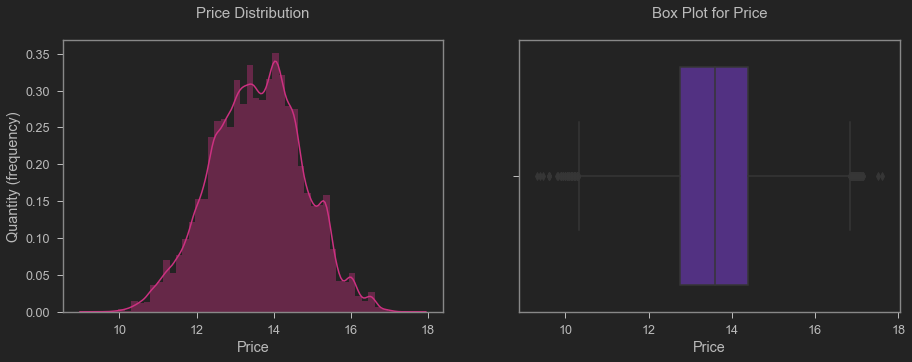

In [20]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.distplot(X_train.price.values, bins=50, color=colors[4])
plt.title('Price Distribution\n', fontsize=15)
plt.xlabel('Price')
plt.ylabel('Quantity (frequency)')

plt.subplot(122)
sns.boxplot(X_train.price.values, color=colors[1])
plt.title('Box Plot for Price\n', fontsize=15)
plt.xlabel('Price')

Looks better.
Let's again combine datasets for further engineering

In [21]:
# combine sets
df = X_train.append(X_test, sort=False).reset_index(drop=True)

<a id="sec5.2"></a>
## [5.2 body_type & Model_name](#sec5.2)
[(INDEX)](#sec1)

As we have quite a lot of brands in data set, and especially lot's of models,

let's generate new feature for each of mentioned model and brand by taking mean price of each model/brand

In [22]:
cols_to_process = ['model_name', 'brand', 'body_type']
for col in cols_to_process:
    col_mean_dict = df.groupby([col])['price'].mean().to_dict()
    df[f'priced_{col}'] = df[col].apply(lambda x: col_mean_dict[x])

We remember (EDA) that models number mismatch in train and test set.

So our new feature definately will have missing vars. Let's fix it by filling it with median

In [23]:
df['priced_model_name'].isna().sum()

17

In [24]:
df['priced_model_name'] = df['priced_model_name'].fillna(df['priced_model_name'].median())

Reduce quantity of body_types

In [25]:
pattern = re.compile('[а-я]*')
new_column = []
for string in df['body_type']:
    new_column.append(pattern.match(str(string))[0])
df['body_type'] = new_column

In [26]:
# Create list with top body types
top_colors = df['body_type'].value_counts()[df['body_type'].value_counts(
) > np.percentile((df['body_type'].value_counts().values), 70)].index.tolist()

#take all bodies from df to a list
all_colors = df['body_type'].value_counts().index

# Identify, what to delete
colors_to_drop = set(all_colors) - set(top_colors)

# Make replacemewnt
df.loc[df['body_type'].isin(colors_to_drop), 'body_type'] = 'other'

In [27]:
df['body_type'].value_counts()

седан          66649
внедорожник    63984
хэтчбек        16791
other          14990
лифтбек         9291
универсал       7030
Name: body_type, dtype: int64

Translate it to english. (for some reason, LightGBM doesn't work with russian column names)

In [28]:
body_type_dict = dict({
    'седан':'sedan',
    'внедорожник':'4wd',
    'хэтчбек':'hachtback',
    'other':'other',
    'лифтбек':'liftback',
    'универсал':'universal'
})
df['body_type'] = df['body_type'].map(body_type_dict)

In [29]:
df.body_type.unique()

array(['sedan', 'universal', 'other', '4wd', 'hachtback', 'liftback'],
      dtype=object)

Fine, we reduced number of body_types and translated it in to English

<a id="sec5.2"></a>
## [5.3 Color](#sec5.2)
[(INDEX)](#sec1)

NOTE: After some experiments, it was decided to do not include this column in to a model. Bad impact on MAPE

With a reference to EDA section we generate new feature to show whether the color is popular.

Meanwhile we re-orgasnize colors in original column by taking only most common colors

In [30]:
# # List of top3 colors (see EDA)
# # Has no impact
# popular_color = ['чёрный', 'белый', 'серый']
# df['popular_color'] = df['color'].apply(
#     lambda color: 1 if color in popular_color else 0)

In [31]:
# # Create list with top colors
# # Has no impact
# top_colors = df['color'].value_counts()[df['color'].value_counts(
# ) > np.percentile((df['color'].value_counts().values), 80)].index.tolist()

# #take all colors from df to a list
# all_colors = df['color'].value_counts().index

# # Identify, what to delete
# colors_to_drop = set(all_colors) - set(top_colors)

# # Make replacemewnt
# df.loc[df['color'].isin(colors_to_drop), 'color'] = 'other'

In [32]:
# df['color'].unique()

In [33]:
# color_dict = dict({
#     #'синий':'blue',
#     'чёрный':'black',
#     'серый':'gray',
#     'other':'other',
#     'белый':'white',
#     #'серебристый':'silver'
# })
# df['color'] = df['color'].map(color_dict)

<a id="sec5.4"></a>
## [5.4 Model_name](#sec5.4)
[(INDEX)](#sec1)

NOTE: Already proceed above

<a id="sec5.5"></a>
## [5.5 Description](#sec5.5)
[(INDEX)](#sec1)

Let's generate new features:
- Sensitivity and polarity of each description in a column;
- Extract keywords from description

In [34]:
df['description'] = df['description'].fillna('none')
df['description'] = df['description'].apply(cleanTxt)
df['description'] = df['description'].apply(lambda x : x.lower())

In [35]:
# Create a function to get the subjectivity
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity


# Create a function to get the polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [36]:
# Create new cols and call the func

df['subjectivity'] = df['description'].apply(get_subjectivity)

df['polarity'] = df['description'].apply(get_polarity)

In [37]:
%%script false
# Note: useless insight. Do not include in the final set
# Create a function to compute the negative, neutral and positive analysis
def get_analysis(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

Couldn't find program: 'false'


In [38]:
%%script false
# Has no impact
df['analysis'] = df['polarity'].apply(get_analysis)

Couldn't find program: 'false'


With a reference to EDA (Sentiment section), let's check plot of worldcloud and generate new features. 

If description has specified keyword, the we add 1 to new column

In [39]:
df['airbags'] = df['description'].apply(
    lambda x: 1 if 'подушки безопасности' in x else 0)
df['cruise'] = df['description'].apply(
    lambda x: 1 if 'круиз' in x else 0)
df['steering'] = df['description'].apply(
    lambda x: 1 if 'усилитель руля' in x else 0)
df['loan'] = df['description'].apply(
    lambda x: 1 if 'кредит' in x else 0)
df['anti_block'] = df['description'].apply(
    lambda x: 1 if 'антиблокировочная' in x else 0)
df['lock'] = df['description'].apply(
    lambda x: 1 if 'центральный замок' in x else 0)
df['climat'] = df['description'].apply(
    lambda x: 1 if 'климат контроль' in x else 0)
df['rain_sens'] = df['description'].apply(
    lambda x: 1 if 'датчик дождя' in x else 0)

In [40]:
# show data
df.sample(4)

body_type     brand        color  \
143447     sedan     mazda        белый   
159365     sedan  infiniti       чёрный   
39478      sedan  mercedes        белый   
166614       4wd     lexus  серебристый   

                                       complectation_dict  \
143447  {'id': '21419827', 'name': 'active', 'availabl...   
159365                                               None   
39478                                         {'id': '0'}   
166614                                               None   

                                              description  \
143447  ———————————————————————————функциональное обор...   
159365  машина в хорошем техническом состоянии. по куз...   
39478   сел поехал, есть не сильные косяки по кузову, ...   
166614  автомобиль в полном порядке,  чистый, ухоженны...   

        engine_displacement  engine_power  \
143447                 2.00        150.00   
159365                 4.50        340.00   
39478                  2.80        193.00   
166614                 4.70        234.00   

                                           equipment_dict fuel_type  \
143447  {'cruise-control': true, 'asr': true, 'esp': t...    бензин   
159365                                               None    бензин   
39478                                                  {}    бензин   
166614  {"tinted-glass":true,"aux":true,"usb":true,"el...    бензин   

                                                    image  mileage  \
143447  //avatars.mds.yandex.net/get-autoru-vos/488781...        0   
159365  https://avatars.mds.yandex.net/get-autoru-vos/...   210000   
39478   //avatars.mds.yandex.net/get-autoru-vos/217698...   300000   
166614  https://autoru.naydex.net/imflt9272/520f62i9/2...   240000   

        model_date                                         model_info  \
143447        2018  {'code': '6', 'name': '6', 'ru_name': '6', 'mo...   
159365        2005  {"code":"m","name":"m","ru_name":"m","morpholo...   
39478         1995  {'code': 'e_klasse', 'name': 'e-класс', 'ru_na...   
166614        2002  {"code":"lx","name":"lx","ru_name":"lx","morph...   

       model_name                       name  doors_count price_currency  \
143447          6          2.0 at (150 л.с.)            4            rub   
159365          m      m45 4.5 at (340 л.с.)            4            rub   
39478    e_klasse      280 2.8 mt (193 л.с.)            4            rub   
166614         lx  470 4.7 at (234 л.с.) 4wd            5            rub   

        production_date     sell_id  \
143447             2021  1103570681   
159365             2006  1098944458   
39478              1996  1100207098   
166614             2006  1101145039   

                                                super_gen  \
143447  {'id': '21419825', 'displacement': 1998, 'engi...   
159365  {"id":"4601598","name":"45","nameplate":"m45",...   
39478   {'id': '21262764', 'name': '280', 'nameplate':...   
166614  {"id":"20393628","name":"470","nameplate":"470...   

                vehicle_configuration vehicle_transmission    vendor  \
143447                    useless_col            automatic  japanese   
159365            sedan automatic 4.5            automatic  japanese   
39478                     useless_col           mechanical  european   
166614  allroad_5_doors automatic 4.7            automatic  japanese   

       owner_count      owning_period car_passport wheel_drive wheel_location  \
143447         NaN               None     original    передний           left   
159365           2               None     original      задний           left   
39478            3               None    duplicate      задний           left   
166614           3  2 года и 2 месяца     original      полный           left   

                 condition      custom  price  sample  priced_model_name  \
143447                None        None  14.55       1              13.52   
159365  не требует ремонта  растаможен    nan       0              13.59   
39

<a id="sec5.6"></a>
## [5.6 Equipment Dict](#sec5.6)
[(INDEX)](#sec1)

Let's exctrat the number of equipments listed in the subjected column

In [41]:
df['equipment_dict'].isna().sum()

9996

First of all, fill up missing values in the column

In [42]:
def fill_empty_equipment(model, dict_):
    if dict_=={}:
        return tipical_equipment_dict[model]
    return dict_

In [43]:
def fill_na_equip_lenght(model_name,value):
    if value==0:
        return int(mean_equip_lenhgt_dict[model_name])
    return value

In [44]:
df['equipment_dict'] = df['equipment_dict'].str.replace('\"', '\'').str.replace(
    ' ', '').str.replace(':t', ':T')  #  General view
df['equipment_dict'] = df['equipment_dict'].apply(lambda string: {} if pd.isna(
    string) else ast.literal_eval(string))  # transform string to dicts

In [45]:
# The idea is to create a dictionary: the most complete set of
# cars, then fill in the gaps with this dictionary
model_names = df['model_name'].unique()
tipical_equipment_dict = dict.fromkeys(model_names)
for model in model_names[:]:
    max_len = 0
    for dict_ in df[df['model_name'] ==
                    model]['equipment_dict'].value_counts().index:
        tipical_equipment_dict.update({model: dict_})
        if len(dict_) > max_len:
            tipical_equipment_dict.update({model: dict_})

In [46]:
df['equipment_dict'] = df[['model_name', 'equipment_dict']].apply(
    lambda x: fill_empty_equipment(*x), axis=1)

In [47]:
df['equipment_length'] = df['equipment_dict'].apply(lambda dict_: len(dict_))

mean_equip_lenhgt_dict = df.groupby('model_name')['equipment_length'].mean(
).round().to_dict()  # Dictionary with average equipment's dictionaryes lenght values 

df['equipment_length'] = df[['model_name', 'equipment_length'
                             ]].apply(lambda x: fill_na_equip_lenght(*x),
                                      axis=1)  # filling

In [48]:
# Check if dictionaries contain False 
count_false=0
for dict_ in df['equipment_dict']:
    for i in dict_:
        if dict_[i]==False:
            count_false+=1
count_false

0

The length of the equipment_dict characterizes the number of functions in the auto 

In [49]:
# df[df['equipment_dict']=={}]['model_name'].unique()

In [50]:
# # Создадим множество всех атрибутов в авто
# attributes = set()
# for dict_ in df['equipment_dict']:    
#     attributes.update(dict_.keys())

In [51]:
# dv = DictVectorizer()
# equipment_features = dv.fit_transform(
#     df.query('sample==1')['equipment_dict']).toarray()
# equipment_df = pd.DataFrame(equipment_features, columns=dv.get_feature_names())
# equipment_attributes = equipment_df.columns.values

In [52]:
# f_scores, p_values = f_regression(equipment_df, df.query('sample==1')['price'])

In [53]:
# # Visualizing 50 best equipment features
# plt.figure(figsize=(20, 10))
# f_scores = pd.Series(f_scores, equipment_attributes).sort_values(ascending=False)
# best_attributes = f_scores[:50].index
# f_scores[:50].plot(kind='barh', color='green')
# plt.xlabel('F-Score')
# plt.title('50 best equipment features', size=16);

In [54]:
# 25% самых важных атрибутов в авто
# f_scores[f_scores.values > f_scores.values.max()*0.75]

In [55]:
# most_important_attributes = set(f_scores[f_scores.values > f_scores.values.max(
# )*0.75].index)  # Множество самых важных атрибутов

In [56]:
# def has_important_equipment(dict_):
#     # Проверка на принадлежность важнейших атрибутов атрибутам авто
#     if most_important_attributes.issubset(set(dict_.keys())):
#         return 1
#     return 0

In [57]:
# df['has_important_attrs'] = df['equipment_dict'].apply(
#     lambda x: has_important_equipment(x))

In [58]:
# df['has_important_attrs'].value_counts()

<a id="sec5.7"></a>
## [5.7 Fuel Type](#sec5.7)
[(INDEX)](#sec1)

In [59]:
# lets strip fuel type
df['fuel_type'] = df.fuel_type.apply(lambda fuel: str(fuel).strip())

In [60]:
fuel_type_dict = dict({
    'бензин':'benzin',
    'дизель':'dizel',
    'гибрид':'hybrid',
    'электро':'electro',
    'газ':'gas'
})

df['fuel_type'] = df['fuel_type'].map(fuel_type_dict)

<a id="sec5.8"></a>
## [5.8 Mileage](#sec5.8)
[(INDEX)](#sec1)

With  a reference to EDA section (plot numerical distribution), outcomes, we remember, that some cars has milage = 0 which is incorrect or unlogical. Fix it here

Save information where mileage was equal to zero 

NOTE: Has no impact on MAPE

In [61]:
#df['mileage_zero'] = df['mileage'].apply(lambda x: 1 if x == 0 else 0)

<a id="sec5.9"></a>
## [5.9 Engine Displacement](#sec5.9)
[(INDEX)](#sec1)

We know, that there is no engine displacement for the electical cars. We also know there is missing values in this colums.

Let's fix it. If car is electric - diplacement shall be 0.

In [62]:
df['engine_displacement'] = df[['engine_displacement','fuel_type']].apply(
    lambda x: get_electro_displacement(*x), axis=1)

It was observed that BMW model i3 has missing values in engine displacement. 

Let's say if it is a hybrid - then eng_displ - 0.7. If not - then 0

In [63]:
df['engine_displacement'] = df[[
    'engine_displacement', 'fuel_type', 'model_name'
]].apply(lambda x: get_i3_displacement(*x), axis=1)

<a id="sec5.10"></a>
## [5.10 Engine Power](#sec5.10)
[(INDEX)](#sec1)

There is a special low in Russian Federation that devide cars by tax categories. 

More power in engine, higer grade of tax. It may impact on a prediction. Let's break our cars down by such categories

In [64]:
# No impact on MAPE
# df['tax_rate'] = df['engine_power'].apply(
#     lambda engine_power: get_tax_category(engine_power)).astype('category')

In [65]:
# Fill up for 3 missing cars (civic)
df['engine_power'] = df['engine_power'].fillna(100) # CIVIC

In [66]:
# Break engine power by intervals
bins = [10, 35, 100, 125, 150, 175, 200, 225, 250, 801]
# Ctreate tax categories
numbers = ['5000', '12', '25', '35', '45', '50', '65', '75', '150']

In [67]:
# Make a column where refer each car depended by power to a tax cat
df['tax_base'] = pd.cut(df['engine_power'], bins, labels=numbers)
df['tax_base'] = df['tax_base'].values.astype('int64')

In [68]:
# generate tax fee col
df['tax'] = df['engine_power'] * df['tax_base']

<a id="sec5.11"></a>
## [5.11 Super Gen](#sec5.11)
[(INDEX)](#sec1)

Let's extract some information like an acceleration from supergen column.

Generate new feature Acceleration

In [69]:
# Before we do, fill up empty dictionaries with 'Nan'
df['super_gen'] = df['super_gen'].fillna('NaN')
df['super_gen'] = df['super_gen'].apply(cleanTxt)
# Extract fuel rate,acceleration and generate new feature
df['acceleration'] = df['super_gen'].apply(lambda string:get_acceleration(string))
df['fuel_rate'] = df['super_gen'].apply(lambda string:get_fuel_rate(string))

In [70]:
# missing vars in a new feature
df['acceleration'].isna().sum()

11243

In [71]:
df['fuel_rate'].isna().sum()

21408

Let's fill missing values by randomly choosen value from most common in particular colums.

For a company, add car pasport here and owner count

In [72]:
cols_to_fill = ['acceleration', 'fuel_rate', 'car_passport','owner_count']
for col in cols_to_fill:
    missing_vars(df,col)

<a id="sec5.12"></a>
## [5.12 Wheel Drive](#sec5.12)
[(INDEX)](#sec1)

In [73]:
# lets strip fuel type
df['wheel_drive'] = df.wheel_drive.apply(lambda drive: str(drive).strip())

In [74]:
drive_type_dict = dict({
    'передний': 'front',
    'полный': 'full',
    'задний': 'rear',
})

df['wheel_drive'] = df['wheel_drive'].map(drive_type_dict)

In [75]:
df[df['wheel_drive'].isna()]

body_type   brand        color       complectation_dict  \
56730     other  toyota  серебристый  {'id': '0', 'name': ''}   
93719     other   honda  серебристый  {'id': '0', 'name': ''}   
94094     other   honda    пурпурный  {'id': '0', 'name': ''}   

                                             description  engine_displacement  \
56730  авто в хорошем тех. состоянии..гаражное хранен...                  nan   
93719  продаю honda civic suttle 1989 г. выпуска, неу...                  nan   
94094                        в хорошем состоянии на ходу                  nan   

       engine_power                                     equipment_dict  \
56730        100.00  {'engine-proof': True, 'cruise-control': True,...   
93719        100.00  {'engine-proof': True, 'cruise-control': True,...   
94094        100.00  {'engine-proof': True, 'cruise-control': True,...   

      fuel_type                                              image  mileage  \
56730       NaN  //avatars.mds.yandex.net/get-autoru-vos/202337...   180000   
93719       NaN  //avatars.mds.yandex.net/get-autoru-vos/216179...   400000   
94094       NaN  //avatars.mds.yandex.net/get-autoru-vos/215360...   220000   

       model_date                                         model_info  \
56730        2007  {'code': 'noah', 'name': 'noah', 'ru_name': 'н...   
93719        1985  {'code': 'civic', 'name': 'civic', 'ru_name': ...   
94094        2018  {'code': 'civic', 'name': 'civic', 'ru_name': ...   

      model_name  name  doors_count price_currency  production_date  \
56730       noah  None            5            rub             2008   
93719      civic  None            4            rub             1989   
94094      civic  None            5            rub             1989   

          sell_id super_gen vehicle_configuration vehicle_transmission  \
56730  1092703248       nan           useless_col                 None   
93719  1097454742       nan           useless_col                 None   
94094  1096777604       nan           useless_col                 None   

         vendor owner_count owning_period car_passport wheel_drive  \
56730  japanese           3          None     original         NaN   
93719  japanese           3          None     original         NaN   
94094  japanese           3          None     original         NaN   

      wheel_location condition custom  price  sample  priced_model_name  \
56730          right      None   None  13.44       1              13.35   
93719           left      None   None  11.70       1              12.71   
94094           left      None   None  11.61       1              12.71   

       priced_brand  priced_body_type  subjectivity  polarity  airbags  \
56730         13.47             12.25          0.00      0.00        0   
93719         13.00             12.25          0.00      0.00        0   
94094         13.00             12.25          0.00      0.00        0   

       cruise  steering  loan  anti_block  lock  climat  rain_sens  \
56730       0         0     0           0     0       0          0   
93719       0         0     0           0     0       0          0   
94094       0         0     0           0     0       0          0   

       equipment_length  tax_base     tax  acceleration  fuel_rate  
56730                38        12 1200.00          7.90       8.40  
93719                43        12 1200.00         13.90       7.60  
94094                43        12 1200.00         12.10      10.50

Civic. Fill With front

In [76]:
df['wheel_drive'] = df['wheel_drive'].fillna('front')

<a id="sec5.13"></a>
## [5.13 Price Drop Index](#sec5.13)
[(INDEX)](#sec1)

With a reference to EDA, we know, that some brands loose their price more faster than others. 

Let's generate such feature

In [77]:
def get_change_index(model):
    if model == 'ford':
        return int(1)
    if model == 'volvo' or model == 'mercedes':
        return int(2)
    if model == 'honda' or model == 'audi':
        return int(2)
    return int(0)

In [78]:
df['prc_chg_idx'] = df['brand'].apply(
    lambda brand: get_change_index(brand)).astype('category')

<a id="sec5.14"></a>
## [5.14 Dropping cols without content](#sec5.14)
[(INDEX)](#sec1)

In [79]:
df['engine_displacement'].isna().sum()

3

In [80]:
df = df.dropna(axis=0, subset=['engine_displacement'])

<a id="sec5.15"></a>
## [5.15 Vendor](#sec5.15)
[(INDEX)](#sec1)

During scraping of a dataset we gathered more vendors than were in a test data set. Let's replace those who are not in test dataset by 'Other'

Note: It was decided to not include this to a model

In [81]:
df['vendor'] = df['vendor'].apply(
    lambda x: x if x == 'european' else(x if x == 'japanese' else 'other'))

<a id="sec5.16"></a>
## [5.16 Handling multocorrelation out](#sec5.16)
[(INDEX)](#sec1)

In [82]:
# extract trhee columns from dataset, which are correlated
data = df[['mileage', 'model_date', 'production_date']].values
# create Scaler instance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# We have 3 vectors. Reduce to two, taking most important info.
pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
df['pca_1'], df['pca_2'] = pca_data[:, 0], pca_data[:, 1]

<a id="sec5.17"></a>
## [5.17 Clustering](#sec5.17)
[(INDEX)](#sec1)

Note: I have failed to use clustering... :(

In [83]:
df_clus1 = df.copy()

In [84]:
# cluster = Outliers_detector(df_clus1)

In [85]:
# indeces = cluster.get_dbscan_outliers('production_date', 'engine_displacement', dbscan_eps=.4,
#                                      dbscan_minsample=12,
#                                      cluster_num=-1)
# print(f"Strange guys {len(indeces)}")

In [86]:
# Defining features and target
# X = df[df['sample'] == 1]

# X_test = df[df['sample'] == 0]

# print(f'X size: {X.shape}, X_testn size: {X_test.shape}')

In [87]:
# cluster = Outliers_detector(X)

In [88]:
# indeces = cluster.get_dbscan_outliers('model_date', 'price', dbscan_eps=.5,
#                                      dbscan_minsample=12,
#                                      cluster_num=-1)
# print(f"Strange guys {len(indeces)}")

In [89]:
# X=X.drop(indeces)
# X.reset_index(drop=True, inplace=True)

In [90]:
# df = X_test.append(X, sort=False).reset_index(drop=True)  # combine sets

<a id="sec5.18"></a>
## [5.18 Log Func](#sec5.18)
[(INDEX)](#sec1)

Try to make distribution normal for the propper fitting of the model 

In [91]:
cols_to_log = [
    'engine_displacement', 'mileage', 'model_date', 'production_date',
    'equipment_length', 'tax', 'acceleration', 'fuel_rate', 'pca_1', 'pca_2'
]

df = to_log(df, cols_to_log)

<a id="sec5.19"></a>
## [5.19 Encoding](#sec5.19)
[(INDEX)](#sec1)

After all manipulations with dataset, we have to reset indexes

In [92]:
# Re-set indexes
df.reset_index(drop=True, inplace=True)

In [93]:
encoder = Encoder(df)

In [94]:
to_hot = [
    #'body_type', # No impact
    #'brand', # No impact
    #'color', # No impact
    #'fuel_type',   # No impact
    #'doors_count', # No impact
    #'vehicle_transmission', # No impact
    'vendor',
    'wheel_drive',
    'owner_count',
]

to_label = [
    'car_passport', 'wheel_location', 'prc_chg_idx', 'vehicle_transmission'
]

In [95]:
# hot it out
for col in to_hot:
    df = encoder.hot_encoder(col)

In [96]:
# label it
for col in to_label:
    encoder.label_encoder(col)

<a id="sec5.20"></a>
## [5.20 Dropping columns out](#sec5.20)
[(INDEX)](#sec1)

In [97]:
cols_to_drop = [
    'complectation_dict',
    'description',
    'equipment_dict',
    'image',
    'model_info',
    'name',
    'price_currency',
    'vehicle_configuration',
    'custom',
    'condition',
    'owning_period',
    'super_gen',
    'sell_id',
    'model_name',
    'engine_power',
    'mileage',  # have PCA instead
    'model_date',  # have PCA instead 
    'body_type',
    'brand',
    'color',
    'tax_base',
    #'mileage_zero',  # No impact
    'fuel_type',  # No impact
    'doors_count'  # No impact
]
df = df.drop(cols_to_drop, axis=1)

Let's check what do we have now

engine_displacement - 0.0%
production_date - 0.0%
vehicle_transmission - 0.0%
car_passport - 0.0%
wheel_location - 0.0%
price - 19.407%
sample - 0.0%
priced_model_name - 0.0%
priced_brand - 0.0%
priced_body_type - 0.0%
subjectivity - 0.0%
polarity - 0.0%
airbags - 0.0%
cruise - 0.0%
steering - 0.0%
loan - 0.0%
anti_block - 0.0%
lock - 0.0%
climat - 0.0%
rain_sens - 0.0%
equipment_length - 0.0%
tax - 0.0%
acceleration - 0.0%
fuel_rate - 0.0%
prc_chg_idx - 0.0%
pca_1 - 0.0%
pca_2 - 0.0%
hot_vendor_european - 0.0%
hot_vendor_japanese - 0.0%
hot_vendor_other - 0.0%
hot_wheel_drive_front - 0.0%
hot_wheel_drive_full - 0.0%
hot_wheel_drive_rear - 0.0%
hot_owner_count_1 - 0.0%
hot_owner_count_2 - 0.0%
hot_owner_count_3 - 0.0%


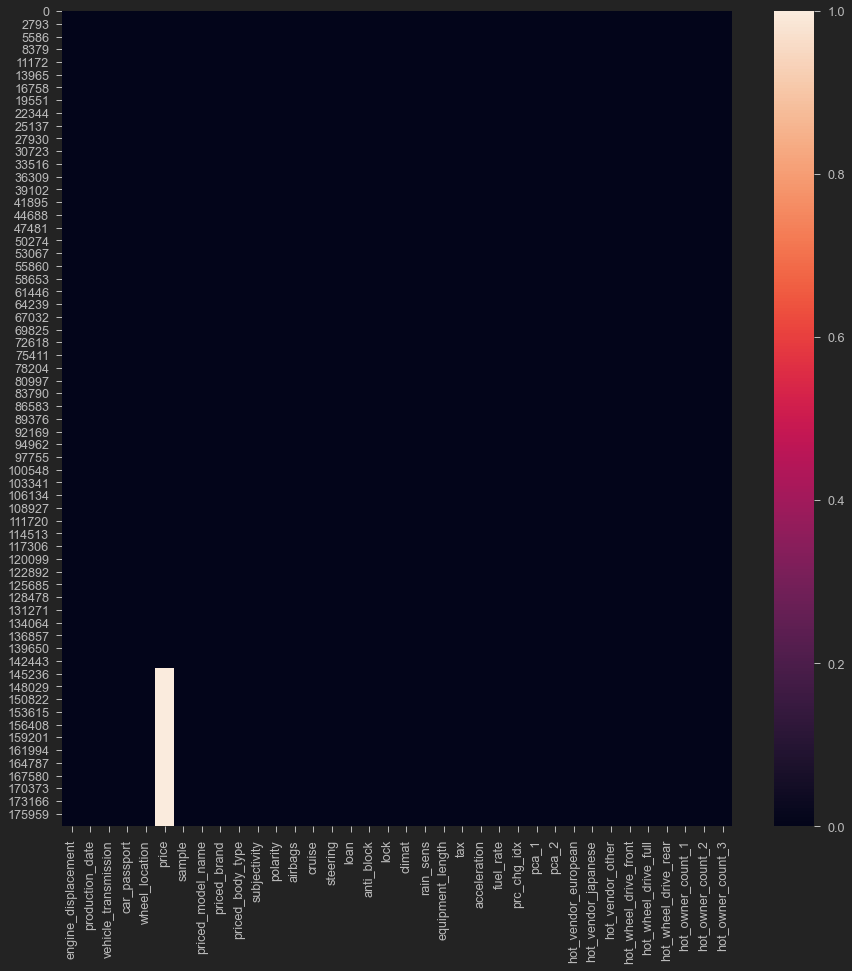

In [98]:
# Plot missing values
cols = df.columns
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df[cols].isnull()) 

# Show in percents
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {round(pct_missing*100,3)}%')

The data set is ready.

<a id="sec6"></a>
# [6. Prepare the data for models](#sec6)
[(INDEX)](#sec2)

In [99]:
# Defining features and target
X = df[df['sample'] == 1].drop(['price','sample'], axis=1)
y = df[df['sample'] == 1]['price']

X_test = df[df['sample'] == 0].drop(['price','sample'], axis=1)
y_test = df[df['sample'] == 0]['price']

In [100]:
cols_to_scal = [
    'engine_displacement', 'subjectivity', 
    'polarity', 'acceleration',
    'fuel_rate', 'pca_1','pca_2','equipment_length',
    'priced_model_name','priced_brand','priced_body_type','tax'
]

In [101]:
scaler = RobustScaler()
X[cols_to_scal] = scaler.fit_transform(X[cols_to_scal])
X_test[cols_to_scal] = scaler.transform(X_test[cols_to_scal])

In [102]:
# Splitting the data
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=42)

print(
    f'Train size: {X_train.shape}, Validation size: {X_val.shape}, Test size: {X_test.shape}'
)

Train size: (115236, 34), Validation size: (28810, 34), Test size: (34686, 34)


<a id="sec7"></a>
# [7. MODELS](#sec7)
[(INDEX)](#sec1)

There are plenty of algorithms could be applied but which one is best, which one is works faster?

Let's try to new instrument, to compare most common algorithms and then select the best.

We will use LazyPredict for such purpose

In [103]:
lazy = LazyRegressor(verbose=1, ignore_warnings=False, custom_metric=None)
models,predictions = lazy.fit(X_train, X_val, y_train, y_val)
models

  2%|█▉                                                                                 | 1/42 [00:18<12:56, 18.95s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.8398433446326461, 'Adjusted R-Squared': 0.8396541065342102, 'RMSE': 0.4714065808635934, 'Time taken': 18.950684785842896}


  5%|███▉                                                                               | 2/42 [00:30<09:46, 14.66s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9508773614807371, 'Adjusted R-Squared': 0.9508193190929124, 'RMSE': 0.2610742197115292, 'Time taken': 11.646646976470947}


  7%|█████▉                                                                             | 3/42 [00:31<05:19,  8.20s/it]

{'Model': 'BayesianRidge', 'R-Squared': 0.901186444015506, 'Adjusted R-Squared': 0.9010696877721185, 'RMSE': 0.3702809846319909, 'Time taken': 0.5115678310394287}


 10%|███████▉                                                                           | 4/42 [00:32<03:36,  5.70s/it]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9120518342776117, 'Adjusted R-Squared': 0.9119479163754549, 'RMSE': 0.3493305267421442, 'Time taken': 1.8581409454345703}


 12%|█████████▉                                                                         | 5/42 [00:33<02:17,  3.72s/it]

{'Model': 'DummyRegressor', 'R-Squared': -4.197612033962628e-06, 'Adjusted R-Squared': -0.0011857838055635561, 'RMSE': 1.1779424073392812, 'Time taken': 0.22501492500305176}


 14%|███████████▊                                                                       | 6/42 [00:33<01:32,  2.56s/it]

{'Model': 'ElasticNet', 'R-Squared': 0.5404148757175049, 'Adjusted R-Squared': 0.5398718385593604, 'RMSE': 0.7985573792843568, 'Time taken': 0.30202507972717285}


 17%|█████████████▊                                                                     | 7/42 [00:34<01:17,  2.21s/it]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9012256990361643, 'Adjusted R-Squared': 0.9011089891757726, 'RMSE': 0.370207427763007, 'Time taken': 1.485649585723877}


 19%|███████████████▊                                                                   | 8/42 [00:36<01:03,  1.87s/it]

{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9109940290011072, 'Adjusted R-Squared': 0.9108888612160867, 'RMSE': 0.3514250513010145, 'Time taken': 1.157087802886963}


 21%|█████████████████▊                                                                 | 9/42 [02:12<17:14, 31.35s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9528394198587429, 'Adjusted R-Squared': 0.9527836958022771, 'RMSE': 0.2558071711844263, 'Time taken': 96.16882848739624}


 24%|███████████████████▌                                                              | 10/42 [02:12<11:37, 21.79s/it]

{'Model': 'GammaRegressor', 'R-Squared': 0.8513270344264561, 'Adjusted R-Squared': 0.8511513652403744, 'RMSE': 0.45419165221657976, 'Time taken': 0.37003064155578613}


 26%|█████████████████████▍                                                            | 11/42 [02:12<07:50, 15.19s/it]

GaussianProcessRegressor model failed to execute
Unable to allocate 98.9 GiB for an array with shape (115236, 115236) and data type float64


 29%|███████████████████████▍                                                          | 12/42 [02:13<05:19, 10.66s/it]

{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.8508124468054585, 'Adjusted R-Squared': 0.8506361695923008, 'RMSE': 0.4549769984653286, 'Time taken': 0.31803107261657715}


 31%|█████████████████████████▍                                                        | 13/42 [02:44<08:09, 16.88s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9411732396709643, 'Adjusted R-Squared': 0.9411037310749196, 'RMSE': 0.28570024421309304, 'Time taken': 31.18432307243347}


 33%|███████████████████████████▎                                                      | 14/42 [02:47<05:58, 12.81s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9522903065076421, 'Adjusted R-Squared': 0.9522339336291455, 'RMSE': 0.25729210430211436, 'Time taken': 3.3957679271698}


 36%|█████████████████████████████▎                                                    | 15/42 [02:50<04:21,  9.67s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.8969390317539311, 'Adjusted R-Squared': 0.8968172568479236, 'RMSE': 0.3781553550701757, 'Time taken': 2.3996963500976562}


 38%|███████████████████████████████▏                                                  | 16/42 [05:17<22:07, 51.05s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9155933700381185, 'Adjusted R-Squared': 0.9154936367481548, 'RMSE': 0.34222475884147907, 'Time taken': 147.15103006362915}


 40%|█████████████████████████████████▏                                                | 17/42 [05:17<14:54, 35.77s/it]

KernelRidge model failed to execute
Unable to allocate 98.9 GiB for an array with shape (115236, 115236) and data type float64


 43%|███████████████████████████████████▏                                              | 18/42 [05:17<10:02, 25.12s/it]

{'Model': 'Lars', 'R-Squared': 0.8938378308549078, 'Adjusted R-Squared': 0.893712391628116, 'RMSE': 0.38380271050067694, 'Time taken': 0.3384699821472168}


 45%|█████████████████████████████████████                                             | 19/42 [05:19<06:53, 18.00s/it]

{'Model': 'LarsCV', 'R-Squared': 0.8977892752520338, 'Adjusted R-Squared': 0.8976685049777877, 'RMSE': 0.37659225109824035, 'Time taken': 1.394106388092041}


 48%|███████████████████████████████████████                                           | 20/42 [05:19<04:38, 12.68s/it]

{'Model': 'Lasso', 'R-Squared': -4.197612033962628e-06, 'Adjusted R-Squared': -0.0011857838055635561, 'RMSE': 1.1779424073392812, 'Time taken': 0.274019718170166}


 50%|█████████████████████████████████████████                                         | 21/42 [05:21<03:15,  9.33s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9012121005624628, 'Adjusted R-Squared': 0.9010953746343698, 'RMSE': 0.3702329105184611, 'Time taken': 1.5116045475006104}


 52%|██████████████████████████████████████████▉                                       | 22/42 [05:21<02:12,  6.61s/it]

{'Model': 'LassoLars', 'R-Squared': -4.197612033962628e-06, 'Adjusted R-Squared': -0.0011857838055635561, 'RMSE': 1.1779424073392812, 'Time taken': 0.2740211486816406}


 55%|████████████████████████████████████████████▉                                     | 23/42 [05:22<01:35,  5.02s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9011849879459187, 'Adjusted R-Squared': 0.9010682299820668, 'RMSE': 0.37028371276422384, 'Time taken': 1.321608066558838}


 57%|██████████████████████████████████████████████▊                                   | 24/42 [05:23<01:05,  3.62s/it]

{'Model': 'LassoLarsIC', 'R-Squared': 0.9011849879459187, 'Adjusted R-Squared': 0.9010682299820668, 'RMSE': 0.37028371276422384, 'Time taken': 0.3400242328643799}


 60%|████████████████████████████████████████████████▊                                 | 25/42 [05:23<00:44,  2.63s/it]

{'Model': 'LinearRegression', 'R-Squared': 0.90117119253292, 'Adjusted R-Squared': 0.901054418268667, 'RMSE': 0.3703095592341223, 'Time taken': 0.33852362632751465}


 62%|██████████████████████████████████████████████████▊                               | 26/42 [05:59<03:24, 12.77s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.8960668649763189, 'Adjusted R-Squared': 0.8959440595344144, 'RMSE': 0.379752078376294, 'Time taken': 36.424906730651855}


 64%|████████████████████████████████████████████████████▋                             | 27/42 [07:53<10:46, 43.13s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.944610918857759, 'Adjusted R-Squared': 0.9445454721589289, 'RMSE': 0.2772268089535058, 'Time taken': 113.96144247055054}


 67%|██████████████████████████████████████████████████▋                         | 28/42 [2:06:54<8:26:56, 2172.62s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9509137516789486, 'Adjusted R-Squared': 0.9508557522890992, 'RMSE': 0.26097749951235727, 'Time taken': 7141.099595069885}


 69%|████████████████████████████████████████████████████▍                       | 29/42 [2:06:55<5:29:31, 1520.90s/it]

{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.8604958427083057, 'Adjusted R-Squared': 0.8603310072140253, 'RMSE': 0.43996357333715586, 'Time taken': 0.29729390144348145}


 71%|██████████████████████████████████████████████████████▎                     | 30/42 [2:06:56<3:32:58, 1064.91s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.8731600315796546, 'Adjusted R-Squared': 0.8730101598532848, 'RMSE': 0.4195185880209262, 'Time taken': 0.9603140354156494}


 74%|████████████████████████████████████████████████████████▊                    | 31/42 [2:06:56<2:16:41, 745.58s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.8288712926685605, 'Adjusted R-Squared': 0.8286690901994287, 'RMSE': 0.4872867254412105, 'Time taken': 0.48305296897888184}


 76%|██████████████████████████████████████████████████████████▋                  | 32/42 [2:06:57<1:27:00, 522.03s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.9021461825226287, 'Adjusted R-Squared': 0.9020305602882506, 'RMSE': 0.36847839776776237, 'Time taken': 0.4410288333892822}


 79%|██████████████████████████████████████████████████████████████                 | 33/42 [2:06:58<54:51, 365.72s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.8955088758504555, 'Adjusted R-Squared': 0.8953854110990711, 'RMSE': 0.3807701073516241, 'Time taken': 0.9900751113891602}


 81%|███████████████████████████████████████████████████████████████▉               | 34/42 [2:08:37<38:07, 285.96s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9543881899502689, 'Adjusted R-Squared': 0.9543342958914786, 'RMSE': 0.2515717085030604, 'Time taken': 99.86590027809143}


 83%|█████████████████████████████████████████████████████████████████▊             | 35/42 [2:08:38<23:21, 200.27s/it]

{'Model': 'Ridge', 'R-Squared': 0.9011851412853146, 'Adjusted R-Squared': 0.9010683835026456, 'RMSE': 0.37028342546423954, 'Time taken': 0.3053710460662842}


 86%|███████████████████████████████████████████████████████████████████▋           | 36/42 [2:08:38<14:02, 140.36s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.9011865160259155, 'Adjusted R-Squared': 0.9010697598676142, 'RMSE': 0.3702808497107751, 'Time taken': 0.5690445899963379}


 88%|██████████████████████████████████████████████████████████████████████▍         | 37/42 [2:08:39<08:12, 98.41s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.900460917219008, 'Adjusted R-Squared': 0.9003433037067733, 'RMSE': 0.37163787056525566, 'Time taken': 0.5280580520629883}


 90%|████████████████████████████████████████████████████████████████████▊       | 38/42 [3:37:15<1:50:54, 1663.68s/it]

{'Model': 'SVR', 'R-Squared': 0.9508234331176076, 'Adjusted R-Squared': 0.9507653270090412, 'RMSE': 0.2612174881076625, 'Time taken': 5315.98624587059}


 93%|████████████████████████████████████████████████████████████████████████▍     | 39/42 [3:37:16<58:14, 1164.80s/it]

{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.90117119253292, 'Adjusted R-Squared': 0.901054418268667, 'RMSE': 0.3703095592341223, 'Time taken': 0.7268984317779541}


 95%|███████████████████████████████████████████████████████████████████████████▏   | 40/42 [3:37:16<27:11, 815.53s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.8508124468054585, 'Adjusted R-Squared': 0.8506361695923008, 'RMSE': 0.4549769984653286, 'Time taken': 0.5872666835784912}


 98%|█████████████████████████████████████████████████████████████████████████████  | 41/42 [3:37:27<09:34, 574.09s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9538483395582983, 'Adjusted R-Squared': 0.9537938076224158, 'RMSE': 0.25305610025565123, 'Time taken': 10.707964420318604}


100%|███████████████████████████████████████████████████████████████████████████████| 42/42 [3:37:29<00:00, 310.70s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9529751192406974, 'Adjusted R-Squared': 0.9529195555240748, 'RMSE': 0.25543887756362077, 'Time taken': 1.9465370178222656}


Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RandomForestRegressor                        0.95       0.95  0.25       99.87
XGBRegressor                                 0.95       0.95  0.25       10.71
LGBMRegressor                                0.95       0.95  0.26        1.95
ExtraTreesRegressor                          0.95       0.95  0.26       96.17
HistGradientBoostingRegressor                0.95       0.95  0.26        3.40
NuSVR                                        0.95       0.95  0.26     7141.10
BaggingRegressor                             0.95       0.95  0.26       11.65
SVR                                          0.95       0.95  0.26     5315.99
MLPRegressor                                 0.94       0.94  0.28      113.96
GradientBoostingRegressor                    0.94       0.94  0.29       31.18
KNeighborsRegressor                          0.92       0.92  0.34      147.15
DecisionTreeRegressor                        0.91       0.91  0.35        1.86
ExtraTreeRegressor                           0.91       0.91  0.35        1.16
PoissonRegressor                             0.90       0.90  0.37        0.44
ElasticNetCV                                 0.90       0.90  0.37        1.49
LassoCV                                      0.90       0.90  0.37        1.51
RidgeCV                                      0.90       0.90  0.37        0.57
BayesianRidge                                0.90       0.90  0.37        0.51
Ridge                                        0.90       0.90  0.37        0.31
LassoLarsIC                                  0.90       0.90  0.37        0.34
LassoLarsCV                                  0.90       0.90  0.37        1.32
TransformedTargetRegressor                   0.90       0.90  0.37        0.73
LinearRegression                             0.90       0.90  0.37        0.34
SGDRegressor                                 0.90       0.90  0.37        0.53
LarsCV                                       0.90       0.90  0.38        1.39
HuberRegressor                               0.90       0.90  0.38        2.40
LinearSVR                                    0.90       0.90  0.38       36.42
RANSACRegressor                              0.90       0.90  0.38        0.99
Lars                                         0.89       0.89  0.38        0.34
OrthogonalMatchingPursuitCV                  0.87       0.87  0.42        0.96
OrthogonalMatchingPursuit                    0.86       0.86  0.44        0.30
GammaRegressor                               0.85       0.85  0.45        0.37
TweedieRegressor                             0.85       0.85  0.45        0.59
GeneralizedLinearRegressor                   0.85       0.85  0.45        0.32
AdaBoostRegressor                            0.84       0.84  0.47       18.95
PassiveAggressiveRegressor                   0.83       0.83  0.49        0.48
ElasticNet                                   0.54       0.54  0.80        0.30
Lasso                                       -0.00      -0.00  1.18        0.27
DummyRegressor                              -0.00      -0.00  1.18        0.23
LassoLars                                   -0.00      -0.00  1.18        0.27

We will take the RMSE metric as a starting point.

It is noted, that RandomForest regressor takes first place by giving lowest RMSE value.

Then two booster come: 
    -XGB
    -LGBM
We can see, that the time of computing significantly lower than in RandomForest.
Extra Tree regressor works faster than Random Forest but gives worse RMSE.

We will try to implement some of those algorithms for our dataset.

<a id="sec7.1"></a>
## [7.1 Random Forest](#sec7.1)
[(INDEX)](#sec1)

We will start with random forest.

Apply the gridsearch for best parameters search

In [104]:
rf_reg = RandomForestRegressor(random_state=42)
param = {
    'bootstrap': [True],
    'max_depth': [10, 30],
    'n_estimators': [100, 200, 300]
}
reg_rf_gs = GridSearchCV(rf_reg, param, scoring='neg_mean_absolute_error',
                      refit=True, cv=5, verbose=0, n_jobs=-1)

In [105]:
reg_rf_gs.fit(X_train, y_train)
print('Best MAE: {:.4}, with best C: {}'.format(reg_rf_gs.best_score_,
                                                reg_rf_gs.best_params_))

Best MAE: -0.1467, with best C: {'bootstrap': True, 'max_depth': 30, 'n_estimators': 300}


In [106]:
y_pred_rf = reg_rf_gs.predict(X_val)

In [107]:
df_report = pd.DataFrame(data=None)

In [108]:
df_report = get_regression_metrics(df_report,y_val,y_pred_rf, 'RandomForest')
df_report

MAPE       MAE            MSE      RMSE
RandomForest 15.56 119194.61 95136495491.60 308442.05

For the first attempt it is not so bad. MAPE is 15.6%

The best score has been obtained with n_estimators = 100.

Let's check another algorithm

<a id="sec7.2"></a>
## [7.2 EXTRA-TREE](#sec7.2)
[(INDEX)](#sec1)

Apply GridSearch for this model as well. For best parameters search

In [109]:
etr_reg = ExtraTreesRegressor(random_state=42)
param = {
    'bootstrap': [True],
    'max_depth': [10, 30],
    'n_estimators': [100, 200, 300,400]
}
etr_reg_gs = GridSearchCV(etr_reg, param, scoring='neg_mean_absolute_error',
                      refit=True, cv=5, verbose=0, n_jobs=-1,)

In [110]:
etr_reg_gs.fit(X_train, y_train)
print('Best MAE: {:.4}, with best C: {}'.format(etr_reg_gs.best_score_,
                                                etr_reg_gs.best_params_))

Best MAE: -0.1448, with best C: {'bootstrap': True, 'max_depth': 30, 'n_estimators': 300}


In [111]:
y_pred_etr_gs = etr_reg_gs.predict(X_val)

In [112]:
df_report = get_regression_metrics(
    df_report, y_val, y_pred_etr_gs, 'ExtraTree_GS')
df_report

MAPE       MAE            MSE      RMSE
RandomForest 15.56 119194.61 95136495491.60 308442.05
ExtraTree_GS 15.26 116944.72 94103766340.24 306763.37

Hm, Don't trust it. Try manualy set parameters.

In [113]:
# Training and evaluating Extra Tree
etr = ExtraTreesRegressor(n_estimators=300, random_state=42, n_jobs=-1,
                         bootstrap=True, verbose=0)
etr.fit(X_train, y_train)
y_pred_etr = etr.predict(X_val)

In [114]:
df_report = get_regression_metrics(df_report,y_val,y_pred_etr, 'ExtraTree_WO_GS')
df_report

MAPE       MAE            MSE      RMSE
RandomForest    15.56 119194.61 95136495491.60 308442.05
ExtraTree_GS    15.26 116944.72 94103766340.24 306763.37
ExtraTree_WO_GS 15.29 116881.40 92184381331.55 303618.81

That's a little strange. We specified to minimize MAE in gridsearch for Etxta Tree Regressor, but looking at the output presented in df_report, we see, that if we slelect more estimators than GridSearch suggested, then better score can be obtained. Seems GridSearch minimizer RMSE instead of MAE.

Anyway, Extra Tree Regressor shows better results than Random forest what is contradicts with Lazy Predictor.

In [115]:
# rf.fit(X, y) # Обучим для сабмита на всей выборке

In [116]:
sell_id = pd.read_csv('test.csv')['sell_id']

In [117]:
# submission_tree = pd.DataFrame({'sell_id': sell_id,
#                            'price': np.exp(rf.predict(X_test))*0.905})

In [118]:
# submission_tree.to_csv('submission_tree.csv', index=False)

<a id="sec7.3"></a>
## [7.3 CAT_boost](#sec7.3)
[(INDEX)](#sec1)

Well, we tried conventional tree's algorithms. Let's try booster. It works a little bit faster. Let's compare how accurate are they?

In [119]:
# Training the model
cbr = CatBoostRegressor()

# Grid search for catboost model
param_grid = {'iterations': [500],
              'learning_rate': [0.01, 0.1, 0.25, 0.5],
              'l2_leaf_reg': [1, 3, 5, 10],
              'depth': np.arange(10, 14),
              'thread_count': [4]}

cbr.grid_search(param_grid=param_grid,
                X=X,
                y=y,
                cv=5,
                partition_random_seed=42,
                calc_cv_statistics=True,
                search_by_train_test_split=True,
                refit=True,
                shuffle=True,
                stratified=None,
                train_size=0.8,
                verbose=False,
                plot=True)

0:	learn: 13.4873168	test: 13.4901395	best: 13.4901395 (0)	total: 158ms	remaining: 1m 18s


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

1:	learn: 13.3528227	test: 13.3556994	best: 13.3556994 (1)	total: 246ms	remaining: 1m 1s
2:	learn: 13.2198444	test: 13.2227495	best: 13.2227495 (2)	total: 313ms	remaining: 51.8s
3:	learn: 13.0883457	test: 13.0913653	best: 13.0913653 (3)	total: 385ms	remaining: 47.7s
4:	learn: 12.9579561	test: 12.9610589	best: 12.9610589 (4)	total: 447ms	remaining: 44.3s
5:	learn: 12.8288026	test: 12.8318799	best: 12.8318799 (5)	total: 507ms	remaining: 41.8s
6:	learn: 12.7009306	test: 12.7040415	best: 12.7040415 (6)	total: 564ms	remaining: 39.8s
7:	learn: 12.5744722	test: 12.5776044	best: 12.5776044 (7)	total: 624ms	remaining: 38.4s
8:	learn: 12.4492647	test: 12.4524386	best: 12.4524386 (8)	total: 684ms	remaining: 37.3s
9:	learn: 12.3251740	test: 12.3283723	best: 12.3283723 (9)	total: 762ms	remaining: 37.3s
10:	learn: 12.2024314	test: 12.2057311	best: 12.2057311 (10)	total: 826ms	remaining: 36.7s
11:	learn: 12.0812600	test: 12.0845422	best: 12.0845422 (11)	total: 901ms	remaining: 36.7s
12:	learn: 11.961

95:	learn: 5.2209930	test: 5.2264691	best: 5.2264691 (95)	total: 5.94s	remaining: 25s
96:	learn: 5.1691741	test: 5.1746451	best: 5.1746451 (96)	total: 5.97s	remaining: 24.8s
97:	learn: 5.1179118	test: 5.1233960	best: 5.1233960 (97)	total: 6.03s	remaining: 24.8s
98:	learn: 5.0672602	test: 5.0727658	best: 5.0727658 (98)	total: 6.09s	remaining: 24.7s
99:	learn: 5.0170313	test: 5.0225622	best: 5.0225622 (99)	total: 6.15s	remaining: 24.6s
100:	learn: 4.9672212	test: 4.9727617	best: 4.9727617 (100)	total: 6.21s	remaining: 24.5s
101:	learn: 4.9179867	test: 4.9235607	best: 4.9235607 (101)	total: 6.27s	remaining: 24.5s
102:	learn: 4.8691818	test: 4.8747721	best: 4.8747721 (102)	total: 6.33s	remaining: 24.4s
103:	learn: 4.8209369	test: 4.8265552	best: 4.8265552 (103)	total: 6.38s	remaining: 24.3s
104:	learn: 4.7731489	test: 4.7787679	best: 4.7787679 (104)	total: 6.44s	remaining: 24.2s
105:	learn: 4.7259229	test: 4.7315715	best: 4.7315715 (105)	total: 6.5s	remaining: 24.1s
106:	learn: 4.6791574	t

190:	learn: 2.0425740	test: 2.0493062	best: 2.0493062 (190)	total: 11.2s	remaining: 18.1s
191:	learn: 2.0227409	test: 2.0294777	best: 2.0294777 (191)	total: 11.3s	remaining: 18.1s
192:	learn: 2.0032046	test: 2.0099563	best: 2.0099563 (192)	total: 11.3s	remaining: 18s
193:	learn: 1.9838515	test: 1.9906235	best: 1.9906235 (193)	total: 11.4s	remaining: 18s
194:	learn: 1.9646138	test: 1.9714092	best: 1.9714092 (194)	total: 11.4s	remaining: 17.9s
195:	learn: 1.9456384	test: 1.9524565	best: 1.9524565 (195)	total: 11.5s	remaining: 17.8s
196:	learn: 1.9268550	test: 1.9337008	best: 1.9337008 (196)	total: 11.6s	remaining: 17.8s
197:	learn: 1.9083232	test: 1.9151903	best: 1.9151903 (197)	total: 11.6s	remaining: 17.7s
198:	learn: 1.8899270	test: 1.8968067	best: 1.8968067 (198)	total: 11.7s	remaining: 17.7s
199:	learn: 1.8717340	test: 1.8786123	best: 1.8786123 (199)	total: 11.7s	remaining: 17.6s
200:	learn: 1.8537384	test: 1.8606167	best: 1.8606167 (200)	total: 11.8s	remaining: 17.5s
201:	learn: 1.

282:	learn: 0.8668607	test: 0.8746524	best: 0.8746524 (282)	total: 16.5s	remaining: 12.7s
283:	learn: 0.8593758	test: 0.8671641	best: 0.8671641 (283)	total: 16.6s	remaining: 12.6s
284:	learn: 0.8520052	test: 0.8597926	best: 0.8597926 (284)	total: 16.6s	remaining: 12.5s
285:	learn: 0.8447182	test: 0.8525114	best: 0.8525114 (285)	total: 16.7s	remaining: 12.5s
286:	learn: 0.8374465	test: 0.8452475	best: 0.8452475 (286)	total: 16.7s	remaining: 12.4s
287:	learn: 0.8303473	test: 0.8381541	best: 0.8381541 (287)	total: 16.8s	remaining: 12.4s
288:	learn: 0.8232890	test: 0.8311123	best: 0.8311123 (288)	total: 16.9s	remaining: 12.3s
289:	learn: 0.8162677	test: 0.8241005	best: 0.8241005 (289)	total: 16.9s	remaining: 12.2s
290:	learn: 0.8093473	test: 0.8171805	best: 0.8171805 (290)	total: 17s	remaining: 12.2s
291:	learn: 0.8024941	test: 0.8103359	best: 0.8103359 (291)	total: 17s	remaining: 12.1s
292:	learn: 0.7957669	test: 0.8036070	best: 0.8036070 (292)	total: 17.1s	remaining: 12.1s
293:	learn: 0.

377:	learn: 0.4369487	test: 0.4450143	best: 0.4450143 (377)	total: 22s	remaining: 7.1s
378:	learn: 0.4346269	test: 0.4426918	best: 0.4426918 (378)	total: 22.1s	remaining: 7.05s
379:	learn: 0.4322974	test: 0.4403579	best: 0.4403579 (379)	total: 22.1s	remaining: 6.99s
380:	learn: 0.4300586	test: 0.4381028	best: 0.4381028 (380)	total: 22.2s	remaining: 6.93s
381:	learn: 0.4278053	test: 0.4358278	best: 0.4358278 (381)	total: 22.3s	remaining: 6.88s
382:	learn: 0.4256238	test: 0.4336405	best: 0.4336405 (382)	total: 22.3s	remaining: 6.82s
383:	learn: 0.4234313	test: 0.4314429	best: 0.4314429 (383)	total: 22.4s	remaining: 6.76s
384:	learn: 0.4213630	test: 0.4293612	best: 0.4293612 (384)	total: 22.4s	remaining: 6.7s
385:	learn: 0.4192898	test: 0.4272841	best: 0.4272841 (385)	total: 22.5s	remaining: 6.64s
386:	learn: 0.4170949	test: 0.4251111	best: 0.4251111 (386)	total: 22.6s	remaining: 6.59s
387:	learn: 0.4150981	test: 0.4231241	best: 0.4231241 (387)	total: 22.6s	remaining: 6.53s
388:	learn: 0.

470:	learn: 0.3153317	test: 0.3227007	best: 0.3227007 (470)	total: 27.6s	remaining: 1.7s
471:	learn: 0.3147208	test: 0.3220935	best: 0.3220935 (471)	total: 27.7s	remaining: 1.64s
472:	learn: 0.3141168	test: 0.3214893	best: 0.3214893 (472)	total: 27.8s	remaining: 1.58s
473:	learn: 0.3135544	test: 0.3209262	best: 0.3209262 (473)	total: 27.8s	remaining: 1.52s
474:	learn: 0.3129665	test: 0.3203247	best: 0.3203247 (474)	total: 27.9s	remaining: 1.47s
475:	learn: 0.3123129	test: 0.3196684	best: 0.3196684 (475)	total: 27.9s	remaining: 1.41s
476:	learn: 0.3117818	test: 0.3191172	best: 0.3191172 (476)	total: 28s	remaining: 1.35s
477:	learn: 0.3111709	test: 0.3184920	best: 0.3184920 (477)	total: 28.1s	remaining: 1.29s
478:	learn: 0.3106050	test: 0.3179304	best: 0.3179304 (478)	total: 28.1s	remaining: 1.23s
479:	learn: 0.3100835	test: 0.3173917	best: 0.3173917 (479)	total: 28.2s	remaining: 1.17s
480:	learn: 0.3095713	test: 0.3168636	best: 0.3168636 (480)	total: 28.2s	remaining: 1.11s
481:	learn: 0

65:	learn: 0.2745064	test: 0.2854194	best: 0.2854194 (65)	total: 4.12s	remaining: 27.1s
66:	learn: 0.2736399	test: 0.2845672	best: 0.2845672 (66)	total: 4.18s	remaining: 27.1s
67:	learn: 0.2728941	test: 0.2838358	best: 0.2838358 (67)	total: 4.25s	remaining: 27s
68:	learn: 0.2719576	test: 0.2831051	best: 0.2831051 (68)	total: 4.31s	remaining: 26.9s
69:	learn: 0.2713275	test: 0.2824897	best: 0.2824897 (69)	total: 4.38s	remaining: 26.9s
70:	learn: 0.2705647	test: 0.2816831	best: 0.2816831 (70)	total: 4.44s	remaining: 26.8s
71:	learn: 0.2695231	test: 0.2809321	best: 0.2809321 (71)	total: 4.5s	remaining: 26.8s
72:	learn: 0.2688061	test: 0.2803369	best: 0.2803369 (72)	total: 4.57s	remaining: 26.7s
73:	learn: 0.2682123	test: 0.2799447	best: 0.2799447 (73)	total: 4.64s	remaining: 26.7s
74:	learn: 0.2677011	test: 0.2795267	best: 0.2795267 (74)	total: 4.7s	remaining: 26.6s
75:	learn: 0.2670744	test: 0.2788948	best: 0.2788948 (75)	total: 4.76s	remaining: 26.6s
76:	learn: 0.2664529	test: 0.2783176

158:	learn: 0.2371846	test: 0.2573779	best: 0.2573779 (158)	total: 10.1s	remaining: 21.6s
159:	learn: 0.2370443	test: 0.2572800	best: 0.2572800 (159)	total: 10.2s	remaining: 21.6s
160:	learn: 0.2369060	test: 0.2572027	best: 0.2572027 (160)	total: 10.2s	remaining: 21.5s
161:	learn: 0.2367248	test: 0.2570950	best: 0.2570950 (161)	total: 10.3s	remaining: 21.4s
162:	learn: 0.2365689	test: 0.2569761	best: 0.2569761 (162)	total: 10.3s	remaining: 21.4s
163:	learn: 0.2363239	test: 0.2568642	best: 0.2568642 (163)	total: 10.4s	remaining: 21.3s
164:	learn: 0.2359753	test: 0.2568860	best: 0.2568642 (163)	total: 10.5s	remaining: 21.3s
165:	learn: 0.2357919	test: 0.2566862	best: 0.2566862 (165)	total: 10.5s	remaining: 21.2s
166:	learn: 0.2356406	test: 0.2566320	best: 0.2566320 (166)	total: 10.6s	remaining: 21.2s
167:	learn: 0.2354488	test: 0.2565198	best: 0.2565198 (167)	total: 10.7s	remaining: 21.1s
168:	learn: 0.2353394	test: 0.2564223	best: 0.2564223 (168)	total: 10.7s	remaining: 21s
169:	learn: 

252:	learn: 0.2217965	test: 0.2512371	best: 0.2512371 (252)	total: 16.4s	remaining: 16s
253:	learn: 0.2216998	test: 0.2511877	best: 0.2511877 (253)	total: 16.4s	remaining: 15.9s
254:	learn: 0.2215834	test: 0.2511972	best: 0.2511877 (253)	total: 16.5s	remaining: 15.9s
255:	learn: 0.2214650	test: 0.2511588	best: 0.2511588 (255)	total: 16.6s	remaining: 15.8s
256:	learn: 0.2214120	test: 0.2511392	best: 0.2511392 (256)	total: 16.6s	remaining: 15.7s
257:	learn: 0.2212919	test: 0.2511214	best: 0.2511214 (257)	total: 16.7s	remaining: 15.7s
258:	learn: 0.2210397	test: 0.2511154	best: 0.2511154 (258)	total: 16.8s	remaining: 15.6s
259:	learn: 0.2209319	test: 0.2510714	best: 0.2510714 (259)	total: 16.8s	remaining: 15.5s
260:	learn: 0.2208085	test: 0.2510314	best: 0.2510314 (260)	total: 16.9s	remaining: 15.5s
261:	learn: 0.2207348	test: 0.2510167	best: 0.2510167 (261)	total: 17s	remaining: 15.4s
262:	learn: 0.2205933	test: 0.2509980	best: 0.2509980 (262)	total: 17s	remaining: 15.4s
263:	learn: 0.22

347:	learn: 0.2099677	test: 0.2487150	best: 0.2487059 (346)	total: 22.7s	remaining: 9.9s
348:	learn: 0.2099113	test: 0.2486944	best: 0.2486944 (348)	total: 22.7s	remaining: 9.84s
349:	learn: 0.2097798	test: 0.2486265	best: 0.2486265 (349)	total: 22.8s	remaining: 9.77s
350:	learn: 0.2096264	test: 0.2486012	best: 0.2486012 (350)	total: 22.9s	remaining: 9.71s
351:	learn: 0.2094914	test: 0.2485812	best: 0.2485812 (351)	total: 22.9s	remaining: 9.65s
352:	learn: 0.2094044	test: 0.2485128	best: 0.2485128 (352)	total: 23s	remaining: 9.58s
353:	learn: 0.2093390	test: 0.2484840	best: 0.2484840 (353)	total: 23.1s	remaining: 9.52s
354:	learn: 0.2090987	test: 0.2484615	best: 0.2484615 (354)	total: 23.1s	remaining: 9.45s
355:	learn: 0.2090490	test: 0.2484584	best: 0.2484584 (355)	total: 23.2s	remaining: 9.39s
356:	learn: 0.2089376	test: 0.2483951	best: 0.2483951 (356)	total: 23.3s	remaining: 9.33s
357:	learn: 0.2088716	test: 0.2483555	best: 0.2483555 (357)	total: 23.3s	remaining: 9.26s
358:	learn: 0

441:	learn: 0.2009113	test: 0.2472133	best: 0.2472133 (441)	total: 28.9s	remaining: 3.79s
442:	learn: 0.2008195	test: 0.2471949	best: 0.2471949 (442)	total: 28.9s	remaining: 3.72s
443:	learn: 0.2007040	test: 0.2471885	best: 0.2471885 (443)	total: 29s	remaining: 3.66s
444:	learn: 0.2006435	test: 0.2471803	best: 0.2471803 (444)	total: 29.1s	remaining: 3.59s
445:	learn: 0.2005792	test: 0.2471441	best: 0.2471441 (445)	total: 29.1s	remaining: 3.53s
446:	learn: 0.2004777	test: 0.2471272	best: 0.2471272 (446)	total: 29.2s	remaining: 3.46s
447:	learn: 0.2003963	test: 0.2470802	best: 0.2470802 (447)	total: 29.3s	remaining: 3.4s
448:	learn: 0.2003360	test: 0.2470812	best: 0.2470802 (447)	total: 29.3s	remaining: 3.33s
449:	learn: 0.2002217	test: 0.2470790	best: 0.2470790 (449)	total: 29.4s	remaining: 3.27s
450:	learn: 0.2001700	test: 0.2470693	best: 0.2470693 (450)	total: 29.5s	remaining: 3.2s
451:	learn: 0.2000213	test: 0.2470676	best: 0.2470676 (451)	total: 29.5s	remaining: 3.14s
452:	learn: 0.

36:	learn: 0.2641721	test: 0.2831327	best: 0.2831327 (36)	total: 2.4s	remaining: 30.1s
37:	learn: 0.2633045	test: 0.2823797	best: 0.2823797 (37)	total: 2.47s	remaining: 30s
38:	learn: 0.2622592	test: 0.2816443	best: 0.2816443 (38)	total: 2.54s	remaining: 30s
39:	learn: 0.2611065	test: 0.2809453	best: 0.2809453 (39)	total: 2.6s	remaining: 29.9s
40:	learn: 0.2604420	test: 0.2803570	best: 0.2803570 (40)	total: 2.67s	remaining: 29.9s
41:	learn: 0.2598428	test: 0.2796363	best: 0.2796363 (41)	total: 2.74s	remaining: 29.9s
42:	learn: 0.2592979	test: 0.2793881	best: 0.2793881 (42)	total: 2.81s	remaining: 29.8s
43:	learn: 0.2587317	test: 0.2788813	best: 0.2788813 (43)	total: 2.87s	remaining: 29.8s
44:	learn: 0.2569421	test: 0.2778421	best: 0.2778421 (44)	total: 2.95s	remaining: 29.8s
45:	learn: 0.2558748	test: 0.2777138	best: 0.2777138 (45)	total: 3.02s	remaining: 29.8s
46:	learn: 0.2551317	test: 0.2770098	best: 0.2770098 (46)	total: 3.08s	remaining: 29.7s
47:	learn: 0.2541953	test: 0.2763546	b

130:	learn: 0.2156803	test: 0.2596917	best: 0.2596917 (130)	total: 8.78s	remaining: 24.7s
131:	learn: 0.2152053	test: 0.2595261	best: 0.2595261 (131)	total: 8.85s	remaining: 24.7s
132:	learn: 0.2149264	test: 0.2593885	best: 0.2593885 (132)	total: 8.92s	remaining: 24.6s
133:	learn: 0.2146431	test: 0.2593566	best: 0.2593566 (133)	total: 8.98s	remaining: 24.5s
134:	learn: 0.2144192	test: 0.2593025	best: 0.2593025 (134)	total: 9.05s	remaining: 24.5s
135:	learn: 0.2141793	test: 0.2592581	best: 0.2592581 (135)	total: 9.11s	remaining: 24.4s
136:	learn: 0.2137824	test: 0.2593545	best: 0.2592581 (135)	total: 9.18s	remaining: 24.3s
137:	learn: 0.2133072	test: 0.2594099	best: 0.2592581 (135)	total: 9.25s	remaining: 24.3s
138:	learn: 0.2129741	test: 0.2592423	best: 0.2592423 (138)	total: 9.32s	remaining: 24.2s
139:	learn: 0.2126983	test: 0.2592589	best: 0.2592423 (138)	total: 9.38s	remaining: 24.1s
140:	learn: 0.2124734	test: 0.2591594	best: 0.2591594 (140)	total: 9.45s	remaining: 24.1s
141:	learn

224:	learn: 0.1943709	test: 0.2567014	best: 0.2566693 (211)	total: 15.2s	remaining: 18.6s
225:	learn: 0.1942739	test: 0.2567251	best: 0.2566693 (211)	total: 15.3s	remaining: 18.6s
226:	learn: 0.1941662	test: 0.2567181	best: 0.2566693 (211)	total: 15.4s	remaining: 18.5s
227:	learn: 0.1939641	test: 0.2568086	best: 0.2566693 (211)	total: 15.4s	remaining: 18.4s
228:	learn: 0.1937775	test: 0.2566973	best: 0.2566693 (211)	total: 15.5s	remaining: 18.4s
229:	learn: 0.1934859	test: 0.2567079	best: 0.2566693 (211)	total: 15.6s	remaining: 18.3s
230:	learn: 0.1934042	test: 0.2566729	best: 0.2566693 (211)	total: 15.6s	remaining: 18.2s
231:	learn: 0.1931638	test: 0.2567139	best: 0.2566693 (211)	total: 15.7s	remaining: 18.1s
232:	learn: 0.1929613	test: 0.2567218	best: 0.2566693 (211)	total: 15.8s	remaining: 18.1s
233:	learn: 0.1926632	test: 0.2567426	best: 0.2566693 (211)	total: 15.8s	remaining: 18s
234:	learn: 0.1926055	test: 0.2567085	best: 0.2566693 (211)	total: 15.9s	remaining: 17.9s
235:	learn: 

319:	learn: 0.1780996	test: 0.2572308	best: 0.2566333 (237)	total: 21.4s	remaining: 12s
320:	learn: 0.1780444	test: 0.2572211	best: 0.2566333 (237)	total: 21.5s	remaining: 12s
321:	learn: 0.1778566	test: 0.2571867	best: 0.2566333 (237)	total: 21.5s	remaining: 11.9s
322:	learn: 0.1777519	test: 0.2572136	best: 0.2566333 (237)	total: 21.6s	remaining: 11.8s
323:	learn: 0.1775109	test: 0.2572217	best: 0.2566333 (237)	total: 21.7s	remaining: 11.8s
324:	learn: 0.1773415	test: 0.2572472	best: 0.2566333 (237)	total: 21.7s	remaining: 11.7s
325:	learn: 0.1771027	test: 0.2572543	best: 0.2566333 (237)	total: 21.8s	remaining: 11.6s
326:	learn: 0.1770279	test: 0.2572721	best: 0.2566333 (237)	total: 21.9s	remaining: 11.6s
327:	learn: 0.1769233	test: 0.2573062	best: 0.2566333 (237)	total: 21.9s	remaining: 11.5s
328:	learn: 0.1765919	test: 0.2572495	best: 0.2566333 (237)	total: 22s	remaining: 11.4s
329:	learn: 0.1765250	test: 0.2572577	best: 0.2566333 (237)	total: 22.1s	remaining: 11.4s
330:	learn: 0.17

411:	learn: 0.1669126	test: 0.2574596	best: 0.2566333 (237)	total: 27.6s	remaining: 5.89s
412:	learn: 0.1668450	test: 0.2574884	best: 0.2566333 (237)	total: 27.6s	remaining: 5.82s
413:	learn: 0.1667329	test: 0.2575067	best: 0.2566333 (237)	total: 27.7s	remaining: 5.76s
414:	learn: 0.1666145	test: 0.2575041	best: 0.2566333 (237)	total: 27.8s	remaining: 5.69s
415:	learn: 0.1664628	test: 0.2574810	best: 0.2566333 (237)	total: 27.9s	remaining: 5.63s
416:	learn: 0.1662876	test: 0.2574907	best: 0.2566333 (237)	total: 27.9s	remaining: 5.56s
417:	learn: 0.1661514	test: 0.2574942	best: 0.2566333 (237)	total: 28s	remaining: 5.49s
418:	learn: 0.1659702	test: 0.2575103	best: 0.2566333 (237)	total: 28.1s	remaining: 5.42s
419:	learn: 0.1659091	test: 0.2574762	best: 0.2566333 (237)	total: 28.1s	remaining: 5.36s
420:	learn: 0.1657481	test: 0.2574642	best: 0.2566333 (237)	total: 28.2s	remaining: 5.29s
421:	learn: 0.1655672	test: 0.2574603	best: 0.2566333 (237)	total: 28.3s	remaining: 5.22s
422:	learn: 

5:	learn: 0.4114387	test: 0.4263101	best: 0.4263101 (5)	total: 356ms	remaining: 29.3s
6:	learn: 0.3451815	test: 0.3605210	best: 0.3605210 (6)	total: 426ms	remaining: 30s
7:	learn: 0.3195804	test: 0.3348188	best: 0.3348188 (7)	total: 491ms	remaining: 30.2s
8:	learn: 0.3090141	test: 0.3236814	best: 0.3236814 (8)	total: 555ms	remaining: 30.3s
9:	learn: 0.3020610	test: 0.3163884	best: 0.3163884 (9)	total: 627ms	remaining: 30.7s
10:	learn: 0.2947472	test: 0.3093007	best: 0.3093007 (10)	total: 693ms	remaining: 30.8s
11:	learn: 0.2911376	test: 0.3062578	best: 0.3062578 (11)	total: 758ms	remaining: 30.8s
12:	learn: 0.2875054	test: 0.3029359	best: 0.3029359 (12)	total: 822ms	remaining: 30.8s
13:	learn: 0.2844198	test: 0.3005178	best: 0.3005178 (13)	total: 892ms	remaining: 31s
14:	learn: 0.2811284	test: 0.2978741	best: 0.2978741 (14)	total: 960ms	remaining: 31.1s
15:	learn: 0.2775326	test: 0.2941318	best: 0.2941318 (15)	total: 1.03s	remaining: 31s
16:	learn: 0.2735298	test: 0.2912090	best: 0.291

100:	learn: 0.2011288	test: 0.2662798	best: 0.2658498 (97)	total: 6.74s	remaining: 26.6s
101:	learn: 0.2009686	test: 0.2663850	best: 0.2658498 (97)	total: 6.8s	remaining: 26.6s
102:	learn: 0.2005215	test: 0.2665473	best: 0.2658498 (97)	total: 6.88s	remaining: 26.5s
103:	learn: 0.2001178	test: 0.2665654	best: 0.2658498 (97)	total: 6.94s	remaining: 26.4s
104:	learn: 0.1998840	test: 0.2663961	best: 0.2658498 (97)	total: 7.01s	remaining: 26.4s
105:	learn: 0.1993406	test: 0.2665838	best: 0.2658498 (97)	total: 7.07s	remaining: 26.3s
106:	learn: 0.1989337	test: 0.2665982	best: 0.2658498 (97)	total: 7.14s	remaining: 26.2s
107:	learn: 0.1986414	test: 0.2665476	best: 0.2658498 (97)	total: 7.21s	remaining: 26.2s
108:	learn: 0.1979429	test: 0.2667028	best: 0.2658498 (97)	total: 7.29s	remaining: 26.2s
109:	learn: 0.1975434	test: 0.2666879	best: 0.2658498 (97)	total: 7.36s	remaining: 26.1s
110:	learn: 0.1971275	test: 0.2666917	best: 0.2658498 (97)	total: 7.43s	remaining: 26s
111:	learn: 0.1968250	te

195:	learn: 0.1714659	test: 0.2683269	best: 0.2658498 (97)	total: 13.3s	remaining: 20.6s
196:	learn: 0.1710434	test: 0.2684672	best: 0.2658498 (97)	total: 13.3s	remaining: 20.5s
197:	learn: 0.1707508	test: 0.2684417	best: 0.2658498 (97)	total: 13.4s	remaining: 20.4s
198:	learn: 0.1706522	test: 0.2683857	best: 0.2658498 (97)	total: 13.5s	remaining: 20.4s
199:	learn: 0.1704786	test: 0.2684384	best: 0.2658498 (97)	total: 13.5s	remaining: 20.3s
200:	learn: 0.1702881	test: 0.2683286	best: 0.2658498 (97)	total: 13.6s	remaining: 20.2s
201:	learn: 0.1701295	test: 0.2683620	best: 0.2658498 (97)	total: 13.7s	remaining: 20.2s
202:	learn: 0.1699423	test: 0.2684101	best: 0.2658498 (97)	total: 13.7s	remaining: 20.1s
203:	learn: 0.1696318	test: 0.2684872	best: 0.2658498 (97)	total: 13.8s	remaining: 20s
204:	learn: 0.1694816	test: 0.2685464	best: 0.2658498 (97)	total: 13.9s	remaining: 20s
205:	learn: 0.1692383	test: 0.2685862	best: 0.2658498 (97)	total: 13.9s	remaining: 19.9s
206:	learn: 0.1690505	tes

290:	learn: 0.1531162	test: 0.2704176	best: 0.2658498 (97)	total: 19.6s	remaining: 14.1s
291:	learn: 0.1529764	test: 0.2703803	best: 0.2658498 (97)	total: 19.7s	remaining: 14s
292:	learn: 0.1527406	test: 0.2703552	best: 0.2658498 (97)	total: 19.8s	remaining: 14s
293:	learn: 0.1524227	test: 0.2702655	best: 0.2658498 (97)	total: 19.8s	remaining: 13.9s
294:	learn: 0.1522972	test: 0.2702734	best: 0.2658498 (97)	total: 19.9s	remaining: 13.8s
295:	learn: 0.1521135	test: 0.2702641	best: 0.2658498 (97)	total: 20s	remaining: 13.8s
296:	learn: 0.1518767	test: 0.2702073	best: 0.2658498 (97)	total: 20s	remaining: 13.7s
297:	learn: 0.1516316	test: 0.2702546	best: 0.2658498 (97)	total: 20.1s	remaining: 13.6s
298:	learn: 0.1514247	test: 0.2702468	best: 0.2658498 (97)	total: 20.2s	remaining: 13.6s
299:	learn: 0.1513001	test: 0.2702515	best: 0.2658498 (97)	total: 20.3s	remaining: 13.5s
300:	learn: 0.1511630	test: 0.2702461	best: 0.2658498 (97)	total: 20.3s	remaining: 13.4s
301:	learn: 0.1509862	test: 0

386:	learn: 0.1385348	test: 0.2720947	best: 0.2658498 (97)	total: 26.3s	remaining: 7.68s
387:	learn: 0.1383851	test: 0.2720807	best: 0.2658498 (97)	total: 26.4s	remaining: 7.61s
388:	learn: 0.1382081	test: 0.2720599	best: 0.2658498 (97)	total: 26.4s	remaining: 7.54s
389:	learn: 0.1381033	test: 0.2721121	best: 0.2658498 (97)	total: 26.5s	remaining: 7.48s
390:	learn: 0.1380386	test: 0.2720959	best: 0.2658498 (97)	total: 26.6s	remaining: 7.41s
391:	learn: 0.1378119	test: 0.2721538	best: 0.2658498 (97)	total: 26.6s	remaining: 7.34s
392:	learn: 0.1376721	test: 0.2722099	best: 0.2658498 (97)	total: 26.7s	remaining: 7.27s
393:	learn: 0.1375964	test: 0.2722560	best: 0.2658498 (97)	total: 26.8s	remaining: 7.2s
394:	learn: 0.1374669	test: 0.2722936	best: 0.2658498 (97)	total: 26.8s	remaining: 7.13s
395:	learn: 0.1374415	test: 0.2722894	best: 0.2658498 (97)	total: 26.9s	remaining: 7.07s
396:	learn: 0.1372437	test: 0.2723166	best: 0.2658498 (97)	total: 27s	remaining: 7s
397:	learn: 0.1370909	test:

482:	learn: 0.1279033	test: 0.2731535	best: 0.2658498 (97)	total: 32.7s	remaining: 1.15s
483:	learn: 0.1278335	test: 0.2731876	best: 0.2658498 (97)	total: 32.8s	remaining: 1.08s
484:	learn: 0.1277808	test: 0.2732337	best: 0.2658498 (97)	total: 32.8s	remaining: 1.01s
485:	learn: 0.1276579	test: 0.2732471	best: 0.2658498 (97)	total: 32.9s	remaining: 947ms
486:	learn: 0.1274814	test: 0.2732407	best: 0.2658498 (97)	total: 33s	remaining: 880ms
487:	learn: 0.1273318	test: 0.2732458	best: 0.2658498 (97)	total: 33s	remaining: 812ms
488:	learn: 0.1272006	test: 0.2732260	best: 0.2658498 (97)	total: 33.1s	remaining: 744ms
489:	learn: 0.1271132	test: 0.2732183	best: 0.2658498 (97)	total: 33.2s	remaining: 677ms
490:	learn: 0.1269800	test: 0.2732299	best: 0.2658498 (97)	total: 33.2s	remaining: 609ms
491:	learn: 0.1267678	test: 0.2732738	best: 0.2658498 (97)	total: 33.3s	remaining: 542ms
492:	learn: 0.1266205	test: 0.2732924	best: 0.2658498 (97)	total: 33.4s	remaining: 474ms
493:	learn: 0.1265171	tes

74:	learn: 6.4490280	test: 6.4540905	best: 6.4540905 (74)	total: 4.63s	remaining: 26.3s
75:	learn: 6.3851418	test: 6.3902179	best: 6.3902179 (75)	total: 4.7s	remaining: 26.2s
76:	learn: 6.3217857	test: 6.3268893	best: 6.3268893 (76)	total: 4.77s	remaining: 26.2s
77:	learn: 6.2592311	test: 6.2643759	best: 6.2643759 (77)	total: 4.83s	remaining: 26.2s
78:	learn: 6.1971438	test: 6.2022649	best: 6.2022649 (78)	total: 4.87s	remaining: 26s
79:	learn: 6.1361736	test: 6.1413518	best: 6.1413518 (79)	total: 4.94s	remaining: 25.9s
80:	learn: 6.0753733	test: 6.0805800	best: 6.0805800 (80)	total: 5s	remaining: 25.9s
81:	learn: 6.0153963	test: 6.0206820	best: 6.0206820 (81)	total: 5.07s	remaining: 25.8s
82:	learn: 5.9560914	test: 5.9614045	best: 5.9614045 (82)	total: 5.13s	remaining: 25.8s
83:	learn: 5.8970588	test: 5.9023915	best: 5.9023915 (83)	total: 5.21s	remaining: 25.8s
84:	learn: 5.8386709	test: 5.8440182	best: 5.8440182 (84)	total: 5.27s	remaining: 25.7s
85:	learn: 5.7809435	test: 5.7863244	b

166:	learn: 2.5958777	test: 2.6025467	best: 2.6025467 (166)	total: 10.5s	remaining: 20.9s
167:	learn: 2.5704904	test: 2.5771966	best: 2.5771966 (167)	total: 10.6s	remaining: 20.9s
168:	learn: 2.5453968	test: 2.5521180	best: 2.5521180 (168)	total: 10.6s	remaining: 20.8s
169:	learn: 2.5206013	test: 2.5273507	best: 2.5273507 (169)	total: 10.7s	remaining: 20.8s
170:	learn: 2.4961656	test: 2.5029346	best: 2.5029346 (170)	total: 10.8s	remaining: 20.7s
171:	learn: 2.4719739	test: 2.4787705	best: 2.4787705 (171)	total: 10.8s	remaining: 20.7s
172:	learn: 2.4478519	test: 2.4546640	best: 2.4546640 (172)	total: 10.9s	remaining: 20.6s
173:	learn: 2.4240549	test: 2.4308775	best: 2.4308775 (173)	total: 11s	remaining: 20.5s
174:	learn: 2.4005164	test: 2.4073717	best: 2.4073717 (174)	total: 11s	remaining: 20.5s
175:	learn: 2.3771726	test: 2.3840377	best: 2.3840377 (175)	total: 11.1s	remaining: 20.4s
176:	learn: 2.3541457	test: 2.3610354	best: 2.3610354 (176)	total: 11.2s	remaining: 20.4s
177:	learn: 2.

261:	learn: 1.0538065	test: 1.0620305	best: 1.0620305 (261)	total: 16.7s	remaining: 15.1s
262:	learn: 1.0443705	test: 1.0526121	best: 1.0526121 (262)	total: 16.7s	remaining: 15.1s
263:	learn: 1.0350619	test: 1.0433257	best: 1.0433257 (263)	total: 16.8s	remaining: 15s
264:	learn: 1.0258268	test: 1.0340960	best: 1.0340960 (264)	total: 16.9s	remaining: 15s
265:	learn: 1.0167410	test: 1.0250219	best: 1.0250219 (265)	total: 16.9s	remaining: 14.9s
266:	learn: 1.0077553	test: 1.0160661	best: 1.0160661 (266)	total: 17s	remaining: 14.8s
267:	learn: 0.9988723	test: 1.0071996	best: 1.0071996 (267)	total: 17s	remaining: 14.7s
268:	learn: 0.9900804	test: 0.9984217	best: 0.9984217 (268)	total: 17.1s	remaining: 14.7s
269:	learn: 0.9813866	test: 0.9897580	best: 0.9897580 (269)	total: 17.2s	remaining: 14.6s
270:	learn: 0.9727453	test: 0.9811358	best: 0.9811358 (270)	total: 17.2s	remaining: 14.6s
271:	learn: 0.9642152	test: 0.9726231	best: 0.9726231 (271)	total: 17.3s	remaining: 14.5s
272:	learn: 0.9557

353:	learn: 0.5115209	test: 0.5207424	best: 0.5207424 (353)	total: 22.8s	remaining: 9.39s
354:	learn: 0.5082554	test: 0.5174946	best: 0.5174946 (354)	total: 22.8s	remaining: 9.33s
355:	learn: 0.5050886	test: 0.5143392	best: 0.5143392 (355)	total: 22.9s	remaining: 9.26s
356:	learn: 0.5019421	test: 0.5112078	best: 0.5112078 (356)	total: 23s	remaining: 9.2s
357:	learn: 0.4988803	test: 0.5081373	best: 0.5081373 (357)	total: 23s	remaining: 9.14s
358:	learn: 0.4958419	test: 0.5050958	best: 0.5050958 (358)	total: 23.1s	remaining: 9.07s
359:	learn: 0.4928643	test: 0.5021174	best: 0.5021174 (359)	total: 23.2s	remaining: 9.01s
360:	learn: 0.4898993	test: 0.4991617	best: 0.4991617 (360)	total: 23.2s	remaining: 8.95s
361:	learn: 0.4870199	test: 0.4962981	best: 0.4962981 (361)	total: 23.3s	remaining: 8.88s
362:	learn: 0.4841663	test: 0.4934378	best: 0.4934378 (362)	total: 23.4s	remaining: 8.82s
363:	learn: 0.4812780	test: 0.4905634	best: 0.4905634 (363)	total: 23.4s	remaining: 8.75s
364:	learn: 0.4

447:	learn: 0.3394630	test: 0.3482279	best: 0.3482279 (447)	total: 29.1s	remaining: 3.38s
448:	learn: 0.3385380	test: 0.3472982	best: 0.3472982 (448)	total: 29.2s	remaining: 3.32s
449:	learn: 0.3376582	test: 0.3464154	best: 0.3464154 (449)	total: 29.3s	remaining: 3.25s
450:	learn: 0.3368496	test: 0.3455898	best: 0.3455898 (450)	total: 29.3s	remaining: 3.19s
451:	learn: 0.3359822	test: 0.3447171	best: 0.3447171 (451)	total: 29.4s	remaining: 3.12s
452:	learn: 0.3351268	test: 0.3438659	best: 0.3438659 (452)	total: 29.5s	remaining: 3.06s
453:	learn: 0.3342960	test: 0.3430178	best: 0.3430178 (453)	total: 29.5s	remaining: 2.99s
454:	learn: 0.3334653	test: 0.3421826	best: 0.3421826 (454)	total: 29.6s	remaining: 2.93s
455:	learn: 0.3327147	test: 0.3414152	best: 0.3414152 (455)	total: 29.7s	remaining: 2.86s
456:	learn: 0.3318849	test: 0.3405832	best: 0.3405832 (456)	total: 29.7s	remaining: 2.8s
457:	learn: 0.3311147	test: 0.3398082	best: 0.3398082 (457)	total: 29.8s	remaining: 2.73s
458:	learn:

39:	learn: 0.3829453	test: 0.3956578	best: 0.3956578 (39)	total: 2.73s	remaining: 31.4s
40:	learn: 0.3705379	test: 0.3831013	best: 0.3831013 (40)	total: 2.8s	remaining: 31.4s
41:	learn: 0.3592295	test: 0.3717695	best: 0.3717695 (41)	total: 2.87s	remaining: 31.3s
42:	learn: 0.3489432	test: 0.3612704	best: 0.3612704 (42)	total: 2.94s	remaining: 31.2s
43:	learn: 0.3406940	test: 0.3528596	best: 0.3528596 (43)	total: 3.02s	remaining: 31.3s
44:	learn: 0.3341771	test: 0.3463059	best: 0.3463059 (44)	total: 3.09s	remaining: 31.2s
45:	learn: 0.3283658	test: 0.3402799	best: 0.3402799 (45)	total: 3.15s	remaining: 31.1s
46:	learn: 0.3230972	test: 0.3348926	best: 0.3348926 (46)	total: 3.23s	remaining: 31.1s
47:	learn: 0.3183312	test: 0.3299245	best: 0.3299245 (47)	total: 3.29s	remaining: 31s
48:	learn: 0.3144127	test: 0.3259577	best: 0.3259577 (48)	total: 3.36s	remaining: 30.9s
49:	learn: 0.3112027	test: 0.3226246	best: 0.3226246 (49)	total: 3.44s	remaining: 30.9s
50:	learn: 0.3085180	test: 0.319723

133:	learn: 0.2523934	test: 0.2682854	best: 0.2682854 (133)	total: 9.07s	remaining: 24.8s
134:	learn: 0.2521599	test: 0.2680671	best: 0.2680671 (134)	total: 9.14s	remaining: 24.7s
135:	learn: 0.2518410	test: 0.2679375	best: 0.2679375 (135)	total: 9.2s	remaining: 24.6s
136:	learn: 0.2516543	test: 0.2677576	best: 0.2677576 (136)	total: 9.27s	remaining: 24.6s
137:	learn: 0.2514542	test: 0.2675665	best: 0.2675665 (137)	total: 9.34s	remaining: 24.5s
138:	learn: 0.2512027	test: 0.2673838	best: 0.2673838 (138)	total: 9.4s	remaining: 24.4s
139:	learn: 0.2509703	test: 0.2673254	best: 0.2673254 (139)	total: 9.47s	remaining: 24.3s
140:	learn: 0.2507972	test: 0.2671669	best: 0.2671669 (140)	total: 9.54s	remaining: 24.3s
141:	learn: 0.2504411	test: 0.2670068	best: 0.2670068 (141)	total: 9.61s	remaining: 24.2s
142:	learn: 0.2502985	test: 0.2668706	best: 0.2668706 (142)	total: 9.67s	remaining: 24.2s
143:	learn: 0.2500270	test: 0.2666956	best: 0.2666956 (143)	total: 9.74s	remaining: 24.1s
144:	learn: 

225:	learn: 0.2348765	test: 0.2576966	best: 0.2576966 (225)	total: 15.2s	remaining: 18.5s
226:	learn: 0.2347050	test: 0.2576715	best: 0.2576715 (226)	total: 15.3s	remaining: 18.4s
227:	learn: 0.2345827	test: 0.2575627	best: 0.2575627 (227)	total: 15.4s	remaining: 18.3s
228:	learn: 0.2342697	test: 0.2575905	best: 0.2575627 (227)	total: 15.4s	remaining: 18.3s
229:	learn: 0.2340708	test: 0.2575187	best: 0.2575187 (229)	total: 15.5s	remaining: 18.2s
230:	learn: 0.2339381	test: 0.2575124	best: 0.2575124 (230)	total: 15.6s	remaining: 18.1s
231:	learn: 0.2337202	test: 0.2574433	best: 0.2574433 (231)	total: 15.6s	remaining: 18.1s
232:	learn: 0.2336369	test: 0.2573843	best: 0.2573843 (232)	total: 15.7s	remaining: 18s
233:	learn: 0.2334022	test: 0.2573651	best: 0.2573651 (233)	total: 15.8s	remaining: 17.9s
234:	learn: 0.2332617	test: 0.2573118	best: 0.2573118 (234)	total: 15.8s	remaining: 17.9s
235:	learn: 0.2331773	test: 0.2572563	best: 0.2572563 (235)	total: 15.9s	remaining: 17.8s
236:	learn: 

318:	learn: 0.2232328	test: 0.2535268	best: 0.2535161 (317)	total: 21.4s	remaining: 12.2s
319:	learn: 0.2230248	test: 0.2535105	best: 0.2535105 (319)	total: 21.5s	remaining: 12.1s
320:	learn: 0.2229066	test: 0.2535037	best: 0.2535037 (320)	total: 21.6s	remaining: 12s
321:	learn: 0.2228605	test: 0.2534694	best: 0.2534694 (321)	total: 21.6s	remaining: 12s
322:	learn: 0.2228069	test: 0.2534365	best: 0.2534365 (322)	total: 21.7s	remaining: 11.9s
323:	learn: 0.2227535	test: 0.2533960	best: 0.2533960 (323)	total: 21.8s	remaining: 11.8s
324:	learn: 0.2227125	test: 0.2533768	best: 0.2533768 (324)	total: 21.8s	remaining: 11.8s
325:	learn: 0.2226223	test: 0.2533205	best: 0.2533205 (325)	total: 21.9s	remaining: 11.7s
326:	learn: 0.2225333	test: 0.2533342	best: 0.2533205 (325)	total: 22s	remaining: 11.6s
327:	learn: 0.2224200	test: 0.2532416	best: 0.2532416 (327)	total: 22s	remaining: 11.6s
328:	learn: 0.2222688	test: 0.2532361	best: 0.2532361 (328)	total: 22.1s	remaining: 11.5s
329:	learn: 0.2221

413:	learn: 0.2143016	test: 0.2514717	best: 0.2514717 (413)	total: 27.7s	remaining: 5.76s
414:	learn: 0.2141063	test: 0.2514747	best: 0.2514717 (413)	total: 27.8s	remaining: 5.7s
415:	learn: 0.2140286	test: 0.2514463	best: 0.2514463 (415)	total: 27.9s	remaining: 5.63s
416:	learn: 0.2139482	test: 0.2513997	best: 0.2513997 (416)	total: 27.9s	remaining: 5.56s
417:	learn: 0.2138900	test: 0.2513658	best: 0.2513658 (417)	total: 28s	remaining: 5.49s
418:	learn: 0.2138120	test: 0.2513672	best: 0.2513658 (417)	total: 28.1s	remaining: 5.42s
419:	learn: 0.2137389	test: 0.2513564	best: 0.2513564 (419)	total: 28.1s	remaining: 5.36s
420:	learn: 0.2136152	test: 0.2513322	best: 0.2513322 (420)	total: 28.2s	remaining: 5.29s
421:	learn: 0.2134804	test: 0.2513293	best: 0.2513293 (421)	total: 28.2s	remaining: 5.22s
422:	learn: 0.2134243	test: 0.2513368	best: 0.2513293 (421)	total: 28.3s	remaining: 5.15s
423:	learn: 0.2133345	test: 0.2513148	best: 0.2513148 (423)	total: 28.4s	remaining: 5.08s
424:	learn: 0

5:	learn: 2.4926364	test: 2.5015145	best: 2.5015145 (5)	total: 348ms	remaining: 28.7s
6:	learn: 1.8917852	test: 1.9012541	best: 1.9012541 (6)	total: 415ms	remaining: 29.2s
7:	learn: 1.4453685	test: 1.4560276	best: 1.4560276 (7)	total: 478ms	remaining: 29.4s
8:	learn: 1.1118197	test: 1.1239149	best: 1.1239149 (8)	total: 541ms	remaining: 29.5s
9:	learn: 0.8671904	test: 0.8804583	best: 0.8804583 (9)	total: 612ms	remaining: 30s
10:	learn: 0.6940081	test: 0.7089364	best: 0.7089364 (10)	total: 678ms	remaining: 30.1s
11:	learn: 0.5688156	test: 0.5851507	best: 0.5851507 (11)	total: 741ms	remaining: 30.1s
12:	learn: 0.4824284	test: 0.4998064	best: 0.4998064 (12)	total: 807ms	remaining: 30.2s
13:	learn: 0.4219801	test: 0.4401351	best: 0.4401351 (13)	total: 881ms	remaining: 30.6s
14:	learn: 0.3830998	test: 0.4015188	best: 0.4015188 (14)	total: 949ms	remaining: 30.7s
15:	learn: 0.3556230	test: 0.3741820	best: 0.3741820 (15)	total: 1.02s	remaining: 30.9s
16:	learn: 0.3380615	test: 0.3564893	best: 0

100:	learn: 0.2370589	test: 0.2663400	best: 0.2663400 (100)	total: 6.8s	remaining: 26.9s
101:	learn: 0.2367452	test: 0.2660048	best: 0.2660048 (101)	total: 6.87s	remaining: 26.8s
102:	learn: 0.2362080	test: 0.2660604	best: 0.2660048 (101)	total: 6.94s	remaining: 26.8s
103:	learn: 0.2357319	test: 0.2656446	best: 0.2656446 (103)	total: 7.01s	remaining: 26.7s
104:	learn: 0.2351471	test: 0.2655335	best: 0.2655335 (104)	total: 7.09s	remaining: 26.7s
105:	learn: 0.2348121	test: 0.2654305	best: 0.2654305 (105)	total: 7.16s	remaining: 26.6s
106:	learn: 0.2346322	test: 0.2652395	best: 0.2652395 (106)	total: 7.22s	remaining: 26.5s
107:	learn: 0.2343216	test: 0.2651429	best: 0.2651429 (107)	total: 7.29s	remaining: 26.5s
108:	learn: 0.2339307	test: 0.2649943	best: 0.2649943 (108)	total: 7.36s	remaining: 26.4s
109:	learn: 0.2337065	test: 0.2648157	best: 0.2648157 (109)	total: 7.42s	remaining: 26.3s
110:	learn: 0.2332972	test: 0.2647894	best: 0.2647894 (110)	total: 7.49s	remaining: 26.3s
111:	learn:

194:	learn: 0.2113901	test: 0.2594971	best: 0.2593210 (189)	total: 13.1s	remaining: 20.4s
195:	learn: 0.2112613	test: 0.2594702	best: 0.2593210 (189)	total: 13.1s	remaining: 20.4s
196:	learn: 0.2110034	test: 0.2593777	best: 0.2593210 (189)	total: 13.2s	remaining: 20.3s
197:	learn: 0.2106877	test: 0.2593114	best: 0.2593114 (197)	total: 13.3s	remaining: 20.2s
198:	learn: 0.2105558	test: 0.2592563	best: 0.2592563 (198)	total: 13.3s	remaining: 20.2s
199:	learn: 0.2102669	test: 0.2592440	best: 0.2592440 (199)	total: 13.4s	remaining: 20.1s
200:	learn: 0.2101338	test: 0.2591635	best: 0.2591635 (200)	total: 13.5s	remaining: 20s
201:	learn: 0.2098503	test: 0.2592716	best: 0.2591635 (200)	total: 13.5s	remaining: 19.9s
202:	learn: 0.2095652	test: 0.2592681	best: 0.2591635 (200)	total: 13.6s	remaining: 19.9s
203:	learn: 0.2093575	test: 0.2592148	best: 0.2591635 (200)	total: 13.6s	remaining: 19.8s
204:	learn: 0.2090396	test: 0.2591662	best: 0.2591635 (200)	total: 13.7s	remaining: 19.7s
205:	learn: 

289:	learn: 0.1946937	test: 0.2575385	best: 0.2575385 (289)	total: 19.4s	remaining: 14s
290:	learn: 0.1944196	test: 0.2575953	best: 0.2575385 (289)	total: 19.5s	remaining: 14s
291:	learn: 0.1943069	test: 0.2576065	best: 0.2575385 (289)	total: 19.5s	remaining: 13.9s
292:	learn: 0.1941854	test: 0.2575937	best: 0.2575385 (289)	total: 19.6s	remaining: 13.8s
293:	learn: 0.1940703	test: 0.2574865	best: 0.2574865 (293)	total: 19.7s	remaining: 13.8s
294:	learn: 0.1937899	test: 0.2575581	best: 0.2574865 (293)	total: 19.7s	remaining: 13.7s
295:	learn: 0.1936401	test: 0.2574991	best: 0.2574865 (293)	total: 19.8s	remaining: 13.6s
296:	learn: 0.1935206	test: 0.2575184	best: 0.2574865 (293)	total: 19.9s	remaining: 13.6s
297:	learn: 0.1933007	test: 0.2575397	best: 0.2574865 (293)	total: 19.9s	remaining: 13.5s
298:	learn: 0.1932219	test: 0.2574501	best: 0.2574501 (298)	total: 20s	remaining: 13.4s
299:	learn: 0.1931059	test: 0.2574649	best: 0.2574501 (298)	total: 20.1s	remaining: 13.4s
300:	learn: 0.19

381:	learn: 0.1821793	test: 0.2574833	best: 0.2572750 (359)	total: 25.6s	remaining: 7.91s
382:	learn: 0.1820779	test: 0.2574783	best: 0.2572750 (359)	total: 25.7s	remaining: 7.85s
383:	learn: 0.1819901	test: 0.2574748	best: 0.2572750 (359)	total: 25.8s	remaining: 7.78s
384:	learn: 0.1819378	test: 0.2574715	best: 0.2572750 (359)	total: 25.8s	remaining: 7.71s
385:	learn: 0.1818731	test: 0.2574842	best: 0.2572750 (359)	total: 25.9s	remaining: 7.65s
386:	learn: 0.1818169	test: 0.2574717	best: 0.2572750 (359)	total: 26s	remaining: 7.58s
387:	learn: 0.1817035	test: 0.2575120	best: 0.2572750 (359)	total: 26s	remaining: 7.51s
388:	learn: 0.1815497	test: 0.2575556	best: 0.2572750 (359)	total: 26.1s	remaining: 7.45s
389:	learn: 0.1814626	test: 0.2575523	best: 0.2572750 (359)	total: 26.2s	remaining: 7.38s
390:	learn: 0.1813363	test: 0.2575671	best: 0.2572750 (359)	total: 26.2s	remaining: 7.31s
391:	learn: 0.1812641	test: 0.2575774	best: 0.2572750 (359)	total: 26.3s	remaining: 7.24s
392:	learn: 0.

474:	learn: 0.1724301	test: 0.2576130	best: 0.2572750 (359)	total: 32s	remaining: 1.68s
475:	learn: 0.1723820	test: 0.2576088	best: 0.2572750 (359)	total: 32.1s	remaining: 1.62s
476:	learn: 0.1723086	test: 0.2576500	best: 0.2572750 (359)	total: 32.1s	remaining: 1.55s
477:	learn: 0.1722547	test: 0.2576553	best: 0.2572750 (359)	total: 32.2s	remaining: 1.48s
478:	learn: 0.1720877	test: 0.2576483	best: 0.2572750 (359)	total: 32.3s	remaining: 1.42s
479:	learn: 0.1720554	test: 0.2576538	best: 0.2572750 (359)	total: 32.4s	remaining: 1.35s
480:	learn: 0.1719933	test: 0.2576354	best: 0.2572750 (359)	total: 32.4s	remaining: 1.28s
481:	learn: 0.1718592	test: 0.2576255	best: 0.2572750 (359)	total: 32.5s	remaining: 1.21s
482:	learn: 0.1717266	test: 0.2576230	best: 0.2572750 (359)	total: 32.6s	remaining: 1.15s
483:	learn: 0.1715581	test: 0.2576904	best: 0.2572750 (359)	total: 32.6s	remaining: 1.08s
484:	learn: 0.1714513	test: 0.2576752	best: 0.2572750 (359)	total: 32.7s	remaining: 1.01s
485:	learn: 

68:	learn: 0.2253787	test: 0.2650461	best: 0.2650461 (68)	total: 4.62s	remaining: 28.8s
69:	learn: 0.2243693	test: 0.2648448	best: 0.2648448 (69)	total: 4.69s	remaining: 28.8s
70:	learn: 0.2239291	test: 0.2643682	best: 0.2643682 (70)	total: 4.75s	remaining: 28.7s
71:	learn: 0.2233736	test: 0.2641450	best: 0.2641450 (71)	total: 4.82s	remaining: 28.7s
72:	learn: 0.2230987	test: 0.2638675	best: 0.2638675 (72)	total: 4.89s	remaining: 28.6s
73:	learn: 0.2222934	test: 0.2634285	best: 0.2634285 (73)	total: 4.96s	remaining: 28.5s
74:	learn: 0.2219003	test: 0.2633352	best: 0.2633352 (74)	total: 5.02s	remaining: 28.5s
75:	learn: 0.2210233	test: 0.2630706	best: 0.2630706 (75)	total: 5.1s	remaining: 28.4s
76:	learn: 0.2206669	test: 0.2628634	best: 0.2628634 (76)	total: 5.16s	remaining: 28.4s
77:	learn: 0.2204103	test: 0.2627015	best: 0.2627015 (77)	total: 5.23s	remaining: 28.3s
78:	learn: 0.2197680	test: 0.2624947	best: 0.2624947 (78)	total: 5.3s	remaining: 28.3s
79:	learn: 0.2189600	test: 0.26239

161:	learn: 0.1895559	test: 0.2615275	best: 0.2605286 (119)	total: 10.9s	remaining: 22.7s
162:	learn: 0.1893840	test: 0.2615146	best: 0.2605286 (119)	total: 10.9s	remaining: 22.6s
163:	learn: 0.1891344	test: 0.2614797	best: 0.2605286 (119)	total: 11s	remaining: 22.6s
164:	learn: 0.1888084	test: 0.2616045	best: 0.2605286 (119)	total: 11.1s	remaining: 22.5s
165:	learn: 0.1886308	test: 0.2615577	best: 0.2605286 (119)	total: 11.2s	remaining: 22.5s
166:	learn: 0.1883176	test: 0.2616222	best: 0.2605286 (119)	total: 11.2s	remaining: 22.4s
167:	learn: 0.1878500	test: 0.2616199	best: 0.2605286 (119)	total: 11.3s	remaining: 22.3s
168:	learn: 0.1875922	test: 0.2616189	best: 0.2605286 (119)	total: 11.4s	remaining: 22.3s
169:	learn: 0.1873167	test: 0.2615857	best: 0.2605286 (119)	total: 11.4s	remaining: 22.2s
170:	learn: 0.1871429	test: 0.2615423	best: 0.2605286 (119)	total: 11.5s	remaining: 22.1s
171:	learn: 0.1868660	test: 0.2616410	best: 0.2605286 (119)	total: 11.6s	remaining: 22.1s
172:	learn: 

253:	learn: 0.1686152	test: 0.2625851	best: 0.2605286 (119)	total: 17.1s	remaining: 16.5s
254:	learn: 0.1684084	test: 0.2625277	best: 0.2605286 (119)	total: 17.1s	remaining: 16.4s
255:	learn: 0.1681361	test: 0.2625390	best: 0.2605286 (119)	total: 17.2s	remaining: 16.4s
256:	learn: 0.1679975	test: 0.2625925	best: 0.2605286 (119)	total: 17.3s	remaining: 16.3s
257:	learn: 0.1677724	test: 0.2626858	best: 0.2605286 (119)	total: 17.3s	remaining: 16.3s
258:	learn: 0.1676224	test: 0.2626743	best: 0.2605286 (119)	total: 17.4s	remaining: 16.2s
259:	learn: 0.1674683	test: 0.2626501	best: 0.2605286 (119)	total: 17.5s	remaining: 16.1s
260:	learn: 0.1672519	test: 0.2626933	best: 0.2605286 (119)	total: 17.5s	remaining: 16s
261:	learn: 0.1670545	test: 0.2627259	best: 0.2605286 (119)	total: 17.6s	remaining: 16s
262:	learn: 0.1669934	test: 0.2626427	best: 0.2605286 (119)	total: 17.6s	remaining: 15.9s
263:	learn: 0.1667599	test: 0.2626447	best: 0.2605286 (119)	total: 17.7s	remaining: 15.8s
264:	learn: 0.

345:	learn: 0.1535122	test: 0.2631969	best: 0.2605286 (119)	total: 23.2s	remaining: 10.3s
346:	learn: 0.1533505	test: 0.2631702	best: 0.2605286 (119)	total: 23.3s	remaining: 10.3s
347:	learn: 0.1532831	test: 0.2631932	best: 0.2605286 (119)	total: 23.3s	remaining: 10.2s
348:	learn: 0.1531560	test: 0.2632251	best: 0.2605286 (119)	total: 23.4s	remaining: 10.1s
349:	learn: 0.1529805	test: 0.2632210	best: 0.2605286 (119)	total: 23.5s	remaining: 10.1s
350:	learn: 0.1528615	test: 0.2632382	best: 0.2605286 (119)	total: 23.5s	remaining: 9.99s
351:	learn: 0.1527477	test: 0.2632957	best: 0.2605286 (119)	total: 23.6s	remaining: 9.92s
352:	learn: 0.1525995	test: 0.2632789	best: 0.2605286 (119)	total: 23.7s	remaining: 9.86s
353:	learn: 0.1525853	test: 0.2632879	best: 0.2605286 (119)	total: 23.7s	remaining: 9.79s
354:	learn: 0.1525059	test: 0.2633113	best: 0.2605286 (119)	total: 23.8s	remaining: 9.72s
355:	learn: 0.1523049	test: 0.2633313	best: 0.2605286 (119)	total: 23.9s	remaining: 9.65s
356:	learn

439:	learn: 0.1424186	test: 0.2647698	best: 0.2605286 (119)	total: 29.5s	remaining: 4.03s
440:	learn: 0.1422638	test: 0.2647866	best: 0.2605286 (119)	total: 29.6s	remaining: 3.96s
441:	learn: 0.1422058	test: 0.2648045	best: 0.2605286 (119)	total: 29.7s	remaining: 3.89s
442:	learn: 0.1422046	test: 0.2648025	best: 0.2605286 (119)	total: 29.7s	remaining: 3.82s
443:	learn: 0.1421419	test: 0.2647788	best: 0.2605286 (119)	total: 29.8s	remaining: 3.75s
444:	learn: 0.1420762	test: 0.2647753	best: 0.2605286 (119)	total: 29.8s	remaining: 3.69s
445:	learn: 0.1419249	test: 0.2647389	best: 0.2605286 (119)	total: 29.9s	remaining: 3.62s
446:	learn: 0.1418625	test: 0.2647666	best: 0.2605286 (119)	total: 29.9s	remaining: 3.55s
447:	learn: 0.1418167	test: 0.2647655	best: 0.2605286 (119)	total: 30s	remaining: 3.48s
448:	learn: 0.1417684	test: 0.2647577	best: 0.2605286 (119)	total: 30.1s	remaining: 3.42s
449:	learn: 0.1416592	test: 0.2647520	best: 0.2605286 (119)	total: 30.1s	remaining: 3.35s
450:	learn: 

30:	learn: 10.0033610	test: 10.0071929	best: 10.0071929 (30)	total: 1.9s	remaining: 28.7s
31:	learn: 9.9044632	test: 9.9083651	best: 9.9083651 (31)	total: 1.96s	remaining: 28.7s
32:	learn: 9.8070931	test: 9.8110698	best: 9.8110698 (32)	total: 2.03s	remaining: 28.8s
33:	learn: 9.7096938	test: 9.7136647	best: 9.7136647 (33)	total: 2.1s	remaining: 28.7s
34:	learn: 9.6134569	test: 9.6174652	best: 9.6174652 (34)	total: 2.16s	remaining: 28.7s
35:	learn: 9.5184789	test: 9.5225148	best: 9.5225148 (35)	total: 2.23s	remaining: 28.8s
36:	learn: 9.4242847	test: 9.4283814	best: 9.4283814 (36)	total: 2.3s	remaining: 28.8s
37:	learn: 9.3306734	test: 9.3347604	best: 9.3347604 (37)	total: 2.33s	remaining: 28.4s
38:	learn: 9.2384576	test: 9.2426140	best: 9.2426140 (38)	total: 2.4s	remaining: 28.3s
39:	learn: 9.1468904	test: 9.1510811	best: 9.1510811 (39)	total: 2.47s	remaining: 28.4s
40:	learn: 9.0565389	test: 9.0607186	best: 9.0607186 (40)	total: 2.53s	remaining: 28.3s
41:	learn: 8.9672004	test: 8.9713

124:	learn: 3.9378746	test: 3.9438022	best: 3.9438022 (124)	total: 7.76s	remaining: 23.3s
125:	learn: 3.8993884	test: 3.9053290	best: 3.9053290 (125)	total: 7.83s	remaining: 23.2s
126:	learn: 3.8609519	test: 3.8669081	best: 3.8669081 (126)	total: 7.89s	remaining: 23.2s
127:	learn: 3.8229233	test: 3.8288851	best: 3.8288851 (127)	total: 7.92s	remaining: 23s
128:	learn: 3.7852476	test: 3.7912056	best: 3.7912056 (128)	total: 7.98s	remaining: 23s
129:	learn: 3.7480220	test: 3.7540171	best: 3.7540171 (129)	total: 8.05s	remaining: 22.9s
130:	learn: 3.7112253	test: 3.7172194	best: 3.7172194 (130)	total: 8.12s	remaining: 22.9s
131:	learn: 3.6746496	test: 3.6806436	best: 3.6806436 (131)	total: 8.14s	remaining: 22.7s
132:	learn: 3.6385768	test: 3.6446129	best: 3.6446129 (132)	total: 8.21s	remaining: 22.7s
133:	learn: 3.6028478	test: 3.6089103	best: 3.6089103 (133)	total: 8.28s	remaining: 22.6s
134:	learn: 3.5674963	test: 3.5735729	best: 3.5735729 (134)	total: 8.35s	remaining: 22.6s
135:	learn: 3.

217:	learn: 1.5946646	test: 1.6021882	best: 1.6021882 (217)	total: 13.7s	remaining: 17.7s
218:	learn: 1.5796677	test: 1.5872029	best: 1.5872029 (218)	total: 13.7s	remaining: 17.6s
219:	learn: 1.5648406	test: 1.5723978	best: 1.5723978 (219)	total: 13.8s	remaining: 17.5s
220:	learn: 1.5501011	test: 1.5576676	best: 1.5576676 (220)	total: 13.8s	remaining: 17.5s
221:	learn: 1.5355421	test: 1.5431065	best: 1.5431065 (221)	total: 13.9s	remaining: 17.4s
222:	learn: 1.5211556	test: 1.5287463	best: 1.5287463 (222)	total: 14s	remaining: 17.4s
223:	learn: 1.5068234	test: 1.5144323	best: 1.5144323 (223)	total: 14.1s	remaining: 17.3s
224:	learn: 1.4927028	test: 1.5003224	best: 1.5003224 (224)	total: 14.1s	remaining: 17.3s
225:	learn: 1.4787331	test: 1.4863792	best: 1.4863792 (225)	total: 14.2s	remaining: 17.2s
226:	learn: 1.4649436	test: 1.4726148	best: 1.4726148 (226)	total: 14.3s	remaining: 17.1s
227:	learn: 1.4511943	test: 1.4588741	best: 1.4588741 (227)	total: 14.3s	remaining: 17.1s
228:	learn: 

310:	learn: 0.7029772	test: 0.7122330	best: 0.7122330 (310)	total: 19.7s	remaining: 12s
311:	learn: 0.6975066	test: 0.7067795	best: 0.7067795 (311)	total: 19.8s	remaining: 11.9s
312:	learn: 0.6921317	test: 0.7014246	best: 0.7014246 (312)	total: 19.8s	remaining: 11.9s
313:	learn: 0.6868213	test: 0.6961411	best: 0.6961411 (313)	total: 19.9s	remaining: 11.8s
314:	learn: 0.6815201	test: 0.6908454	best: 0.6908454 (314)	total: 20s	remaining: 11.7s
315:	learn: 0.6763253	test: 0.6856687	best: 0.6856687 (315)	total: 20s	remaining: 11.7s
316:	learn: 0.6712275	test: 0.6805846	best: 0.6805846 (316)	total: 20.1s	remaining: 11.6s
317:	learn: 0.6661597	test: 0.6755257	best: 0.6755257 (317)	total: 20.2s	remaining: 11.5s
318:	learn: 0.6611676	test: 0.6705407	best: 0.6705407 (318)	total: 20.2s	remaining: 11.5s
319:	learn: 0.6562036	test: 0.6655861	best: 0.6655861 (319)	total: 20.3s	remaining: 11.4s
320:	learn: 0.6513149	test: 0.6607268	best: 0.6607268 (320)	total: 20.4s	remaining: 11.4s
321:	learn: 0.64

402:	learn: 0.4019923	test: 0.4119166	best: 0.4119166 (402)	total: 26s	remaining: 6.26s
403:	learn: 0.4003248	test: 0.4102437	best: 0.4102437 (403)	total: 26.1s	remaining: 6.2s
404:	learn: 0.3986349	test: 0.4085457	best: 0.4085457 (404)	total: 26.1s	remaining: 6.13s
405:	learn: 0.3969702	test: 0.4068792	best: 0.4068792 (405)	total: 26.2s	remaining: 6.07s
406:	learn: 0.3953363	test: 0.4052422	best: 0.4052422 (406)	total: 26.3s	remaining: 6s
407:	learn: 0.3937833	test: 0.4036958	best: 0.4036958 (407)	total: 26.3s	remaining: 5.94s
408:	learn: 0.3921698	test: 0.4020796	best: 0.4020796 (408)	total: 26.4s	remaining: 5.88s
409:	learn: 0.3906671	test: 0.4005724	best: 0.4005724 (409)	total: 26.5s	remaining: 5.81s
410:	learn: 0.3892040	test: 0.3990999	best: 0.3990999 (410)	total: 26.5s	remaining: 5.75s
411:	learn: 0.3877175	test: 0.3976207	best: 0.3976207 (411)	total: 26.6s	remaining: 5.68s
412:	learn: 0.3862820	test: 0.3961631	best: 0.3961631 (412)	total: 26.7s	remaining: 5.62s
413:	learn: 0.38

495:	learn: 0.3151941	test: 0.3241219	best: 0.3241219 (495)	total: 32.3s	remaining: 261ms
496:	learn: 0.3147621	test: 0.3236941	best: 0.3236941 (496)	total: 32.4s	remaining: 195ms
497:	learn: 0.3142849	test: 0.3232070	best: 0.3232070 (497)	total: 32.4s	remaining: 130ms
498:	learn: 0.3138945	test: 0.3228046	best: 0.3228046 (498)	total: 32.5s	remaining: 65.1ms
499:	learn: 0.3135022	test: 0.3223994	best: 0.3223994 (499)	total: 32.6s	remaining: 0us

bestTest = 0.3223993501
bestIteration = 499

0:	learn: 12.2711378	test: 12.2738959	best: 12.2738959 (0)	total: 14.6ms	remaining: 7.27s
1:	learn: 11.0571587	test: 11.0607979	best: 11.0607979 (1)	total: 87.8ms	remaining: 21.9s
2:	learn: 9.9636343	test: 9.9673924	best: 9.9673924 (2)	total: 159ms	remaining: 26.3s
3:	learn: 8.9833357	test: 8.9881735	best: 8.9881735 (3)	total: 229ms	remaining: 28.4s
4:	learn: 8.0944723	test: 8.1000617	best: 8.1000617 (4)	total: 297ms	remaining: 29.4s
5:	learn: 7.2925871	test: 7.2981187	best: 7.2981187 (5)	total: 361m

89:	learn: 0.2774737	test: 0.2891987	best: 0.2891987 (89)	total: 5.86s	remaining: 26.7s
90:	learn: 0.2766096	test: 0.2884449	best: 0.2884449 (90)	total: 5.93s	remaining: 26.7s
91:	learn: 0.2760963	test: 0.2879704	best: 0.2879704 (91)	total: 6s	remaining: 26.6s
92:	learn: 0.2755798	test: 0.2875272	best: 0.2875272 (92)	total: 6.07s	remaining: 26.5s
93:	learn: 0.2751415	test: 0.2871581	best: 0.2871581 (93)	total: 6.13s	remaining: 26.5s
94:	learn: 0.2744185	test: 0.2865133	best: 0.2865133 (94)	total: 6.2s	remaining: 26.4s
95:	learn: 0.2739059	test: 0.2860678	best: 0.2860678 (95)	total: 6.27s	remaining: 26.4s
96:	learn: 0.2732894	test: 0.2855227	best: 0.2855227 (96)	total: 6.33s	remaining: 26.3s
97:	learn: 0.2728374	test: 0.2851006	best: 0.2851006 (97)	total: 6.4s	remaining: 26.3s
98:	learn: 0.2721978	test: 0.2845973	best: 0.2845973 (98)	total: 6.47s	remaining: 26.2s
99:	learn: 0.2717513	test: 0.2841411	best: 0.2841411 (99)	total: 6.54s	remaining: 26.2s
100:	learn: 0.2713788	test: 0.2838833

181:	learn: 0.2484426	test: 0.2663867	best: 0.2663867 (181)	total: 12s	remaining: 21s
182:	learn: 0.2482888	test: 0.2662121	best: 0.2662121 (182)	total: 12.1s	remaining: 20.9s
183:	learn: 0.2480404	test: 0.2660851	best: 0.2660851 (183)	total: 12.2s	remaining: 20.9s
184:	learn: 0.2478743	test: 0.2659623	best: 0.2659623 (184)	total: 12.2s	remaining: 20.8s
185:	learn: 0.2477775	test: 0.2658780	best: 0.2658780 (185)	total: 12.3s	remaining: 20.7s
186:	learn: 0.2476175	test: 0.2657710	best: 0.2657710 (186)	total: 12.3s	remaining: 20.7s
187:	learn: 0.2473989	test: 0.2656318	best: 0.2656318 (187)	total: 12.4s	remaining: 20.6s
188:	learn: 0.2470434	test: 0.2654163	best: 0.2654163 (188)	total: 12.5s	remaining: 20.5s
189:	learn: 0.2468442	test: 0.2652874	best: 0.2652874 (189)	total: 12.5s	remaining: 20.5s
190:	learn: 0.2466036	test: 0.2651667	best: 0.2651667 (190)	total: 12.6s	remaining: 20.4s
191:	learn: 0.2464468	test: 0.2651055	best: 0.2651055 (191)	total: 12.7s	remaining: 20.3s
192:	learn: 0.

274:	learn: 0.2354955	test: 0.2594755	best: 0.2594755 (274)	total: 18.1s	remaining: 14.8s
275:	learn: 0.2354718	test: 0.2594489	best: 0.2594489 (275)	total: 18.2s	remaining: 14.8s
276:	learn: 0.2354617	test: 0.2594523	best: 0.2594489 (275)	total: 18.3s	remaining: 14.7s
277:	learn: 0.2354166	test: 0.2594128	best: 0.2594128 (277)	total: 18.3s	remaining: 14.6s
278:	learn: 0.2352525	test: 0.2593208	best: 0.2593208 (278)	total: 18.4s	remaining: 14.6s
279:	learn: 0.2350734	test: 0.2592982	best: 0.2592982 (279)	total: 18.5s	remaining: 14.5s
280:	learn: 0.2349878	test: 0.2592385	best: 0.2592385 (280)	total: 18.5s	remaining: 14.4s
281:	learn: 0.2347768	test: 0.2592126	best: 0.2592126 (281)	total: 18.6s	remaining: 14.4s
282:	learn: 0.2346970	test: 0.2591587	best: 0.2591587 (282)	total: 18.7s	remaining: 14.3s
283:	learn: 0.2346038	test: 0.2591262	best: 0.2591262 (283)	total: 18.7s	remaining: 14.2s
284:	learn: 0.2343864	test: 0.2590348	best: 0.2590348 (284)	total: 18.8s	remaining: 14.2s
285:	learn

367:	learn: 0.2251935	test: 0.2554824	best: 0.2554824 (367)	total: 24.2s	remaining: 8.7s
368:	learn: 0.2250623	test: 0.2554654	best: 0.2554654 (368)	total: 24.3s	remaining: 8.63s
369:	learn: 0.2249696	test: 0.2554392	best: 0.2554392 (369)	total: 24.4s	remaining: 8.56s
370:	learn: 0.2248821	test: 0.2554233	best: 0.2554233 (370)	total: 24.4s	remaining: 8.5s
371:	learn: 0.2248184	test: 0.2553774	best: 0.2553774 (371)	total: 24.5s	remaining: 8.44s
372:	learn: 0.2246447	test: 0.2553602	best: 0.2553602 (372)	total: 24.6s	remaining: 8.37s
373:	learn: 0.2245534	test: 0.2553119	best: 0.2553119 (373)	total: 24.7s	remaining: 8.31s
374:	learn: 0.2244265	test: 0.2553204	best: 0.2553119 (373)	total: 24.7s	remaining: 8.24s
375:	learn: 0.2243020	test: 0.2552785	best: 0.2552785 (375)	total: 24.8s	remaining: 8.17s
376:	learn: 0.2241862	test: 0.2552714	best: 0.2552714 (376)	total: 24.8s	remaining: 8.11s
377:	learn: 0.2240764	test: 0.2552033	best: 0.2552033 (377)	total: 24.9s	remaining: 8.04s
378:	learn: 

462:	learn: 0.2164732	test: 0.2533506	best: 0.2533506 (462)	total: 30.5s	remaining: 2.44s
463:	learn: 0.2164729	test: 0.2533504	best: 0.2533504 (463)	total: 30.6s	remaining: 2.37s
464:	learn: 0.2163665	test: 0.2532887	best: 0.2532887 (464)	total: 30.7s	remaining: 2.31s
465:	learn: 0.2163427	test: 0.2532690	best: 0.2532690 (465)	total: 30.7s	remaining: 2.24s
466:	learn: 0.2161937	test: 0.2532481	best: 0.2532481 (466)	total: 30.8s	remaining: 2.18s
467:	learn: 0.2161743	test: 0.2532402	best: 0.2532402 (467)	total: 30.9s	remaining: 2.11s
468:	learn: 0.2161639	test: 0.2532170	best: 0.2532170 (468)	total: 30.9s	remaining: 2.04s
469:	learn: 0.2161054	test: 0.2532358	best: 0.2532170 (468)	total: 31s	remaining: 1.98s
470:	learn: 0.2161000	test: 0.2532393	best: 0.2532170 (468)	total: 31.1s	remaining: 1.91s
471:	learn: 0.2160055	test: 0.2532148	best: 0.2532148 (471)	total: 31.1s	remaining: 1.85s
472:	learn: 0.2159310	test: 0.2531823	best: 0.2531823 (472)	total: 31.2s	remaining: 1.78s
473:	learn: 

55:	learn: 0.2658812	test: 0.2837323	best: 0.2837323 (55)	total: 3.75s	remaining: 29.7s
56:	learn: 0.2651227	test: 0.2834014	best: 0.2834014 (56)	total: 3.82s	remaining: 29.7s
57:	learn: 0.2644944	test: 0.2827863	best: 0.2827863 (57)	total: 3.88s	remaining: 29.6s
58:	learn: 0.2633559	test: 0.2821329	best: 0.2821329 (58)	total: 3.95s	remaining: 29.5s
59:	learn: 0.2628528	test: 0.2816213	best: 0.2816213 (59)	total: 4.02s	remaining: 29.5s
60:	learn: 0.2621830	test: 0.2811751	best: 0.2811751 (60)	total: 4.09s	remaining: 29.4s
61:	learn: 0.2614984	test: 0.2809075	best: 0.2809075 (61)	total: 4.16s	remaining: 29.4s
62:	learn: 0.2610891	test: 0.2805789	best: 0.2805789 (62)	total: 4.23s	remaining: 29.3s
63:	learn: 0.2602076	test: 0.2804062	best: 0.2804062 (63)	total: 4.29s	remaining: 29.2s
64:	learn: 0.2596571	test: 0.2799025	best: 0.2799025 (64)	total: 4.35s	remaining: 29.1s
65:	learn: 0.2592385	test: 0.2794047	best: 0.2794047 (65)	total: 4.42s	remaining: 29.1s
66:	learn: 0.2584423	test: 0.278

149:	learn: 0.2298049	test: 0.2627191	best: 0.2627191 (149)	total: 9.97s	remaining: 23.3s
150:	learn: 0.2296087	test: 0.2626047	best: 0.2626047 (150)	total: 10s	remaining: 23.2s
151:	learn: 0.2293257	test: 0.2625342	best: 0.2625342 (151)	total: 10.1s	remaining: 23.1s
152:	learn: 0.2290867	test: 0.2623503	best: 0.2623503 (152)	total: 10.2s	remaining: 23.1s
153:	learn: 0.2286504	test: 0.2622962	best: 0.2622962 (153)	total: 10.2s	remaining: 23s
154:	learn: 0.2283725	test: 0.2621684	best: 0.2621684 (154)	total: 10.3s	remaining: 23s
155:	learn: 0.2279706	test: 0.2621073	best: 0.2621073 (155)	total: 10.4s	remaining: 22.9s
156:	learn: 0.2278322	test: 0.2619965	best: 0.2619965 (156)	total: 10.4s	remaining: 22.8s
157:	learn: 0.2275257	test: 0.2619465	best: 0.2619465 (157)	total: 10.5s	remaining: 22.8s
158:	learn: 0.2273627	test: 0.2618342	best: 0.2618342 (158)	total: 10.6s	remaining: 22.7s
159:	learn: 0.2270372	test: 0.2618136	best: 0.2618136 (159)	total: 10.6s	remaining: 22.6s
160:	learn: 0.22

242:	learn: 0.2107828	test: 0.2573303	best: 0.2573303 (242)	total: 16.4s	remaining: 17.3s
243:	learn: 0.2105993	test: 0.2572420	best: 0.2572420 (243)	total: 16.4s	remaining: 17.2s
244:	learn: 0.2105086	test: 0.2571828	best: 0.2571828 (244)	total: 16.5s	remaining: 17.2s
245:	learn: 0.2102819	test: 0.2571108	best: 0.2571108 (245)	total: 16.6s	remaining: 17.1s
246:	learn: 0.2100605	test: 0.2570863	best: 0.2570863 (246)	total: 16.6s	remaining: 17.1s
247:	learn: 0.2099689	test: 0.2570092	best: 0.2570092 (247)	total: 16.7s	remaining: 17s
248:	learn: 0.2099135	test: 0.2569759	best: 0.2569759 (248)	total: 16.8s	remaining: 16.9s
249:	learn: 0.2097583	test: 0.2570328	best: 0.2569759 (248)	total: 16.8s	remaining: 16.8s
250:	learn: 0.2096582	test: 0.2569893	best: 0.2569759 (248)	total: 16.9s	remaining: 16.8s
251:	learn: 0.2095460	test: 0.2569486	best: 0.2569486 (251)	total: 17s	remaining: 16.7s
252:	learn: 0.2092574	test: 0.2568560	best: 0.2568560 (252)	total: 17.1s	remaining: 16.7s
253:	learn: 0.

336:	learn: 0.1959454	test: 0.2559654	best: 0.2559360 (335)	total: 23.5s	remaining: 11.4s
337:	learn: 0.1958579	test: 0.2559406	best: 0.2559360 (335)	total: 23.6s	remaining: 11.3s
338:	learn: 0.1958131	test: 0.2559200	best: 0.2559200 (338)	total: 23.6s	remaining: 11.2s
339:	learn: 0.1956676	test: 0.2559739	best: 0.2559200 (338)	total: 23.7s	remaining: 11.2s
340:	learn: 0.1954698	test: 0.2559684	best: 0.2559200 (338)	total: 23.8s	remaining: 11.1s
341:	learn: 0.1953684	test: 0.2559971	best: 0.2559200 (338)	total: 23.9s	remaining: 11s
342:	learn: 0.1952556	test: 0.2559723	best: 0.2559200 (338)	total: 23.9s	remaining: 11s
343:	learn: 0.1950928	test: 0.2559743	best: 0.2559200 (338)	total: 24s	remaining: 10.9s
344:	learn: 0.1950205	test: 0.2559455	best: 0.2559200 (338)	total: 24.1s	remaining: 10.8s
345:	learn: 0.1947660	test: 0.2559447	best: 0.2559200 (338)	total: 24.1s	remaining: 10.7s
346:	learn: 0.1945420	test: 0.2559941	best: 0.2559200 (338)	total: 24.2s	remaining: 10.7s
347:	learn: 0.19

428:	learn: 0.1851309	test: 0.2556143	best: 0.2555371 (408)	total: 29.8s	remaining: 4.93s
429:	learn: 0.1849629	test: 0.2556262	best: 0.2555371 (408)	total: 29.9s	remaining: 4.87s
430:	learn: 0.1848215	test: 0.2556169	best: 0.2555371 (408)	total: 30s	remaining: 4.8s
431:	learn: 0.1846676	test: 0.2556071	best: 0.2555371 (408)	total: 30s	remaining: 4.73s
432:	learn: 0.1846037	test: 0.2555926	best: 0.2555371 (408)	total: 30.1s	remaining: 4.66s
433:	learn: 0.1843711	test: 0.2555793	best: 0.2555371 (408)	total: 30.2s	remaining: 4.59s
434:	learn: 0.1843080	test: 0.2556149	best: 0.2555371 (408)	total: 30.2s	remaining: 4.52s
435:	learn: 0.1842242	test: 0.2556230	best: 0.2555371 (408)	total: 30.3s	remaining: 4.45s
436:	learn: 0.1840795	test: 0.2556883	best: 0.2555371 (408)	total: 30.4s	remaining: 4.38s
437:	learn: 0.1838788	test: 0.2557511	best: 0.2555371 (408)	total: 30.4s	remaining: 4.31s
438:	learn: 0.1837856	test: 0.2557438	best: 0.2555371 (408)	total: 30.5s	remaining: 4.24s
439:	learn: 0.1

22:	learn: 0.2717686	test: 0.2894468	best: 0.2894468 (22)	total: 1.51s	remaining: 31.2s
23:	learn: 0.2689515	test: 0.2858570	best: 0.2858570 (23)	total: 1.58s	remaining: 31.3s
24:	learn: 0.2672880	test: 0.2851502	best: 0.2851502 (24)	total: 1.65s	remaining: 31.3s
25:	learn: 0.2643708	test: 0.2833273	best: 0.2833273 (25)	total: 1.72s	remaining: 31.3s
26:	learn: 0.2628996	test: 0.2817736	best: 0.2817736 (26)	total: 1.79s	remaining: 31.4s
27:	learn: 0.2616681	test: 0.2808678	best: 0.2808678 (27)	total: 1.86s	remaining: 31.4s
28:	learn: 0.2604728	test: 0.2803431	best: 0.2803431 (28)	total: 1.93s	remaining: 31.3s
29:	learn: 0.2593891	test: 0.2793636	best: 0.2793636 (29)	total: 2s	remaining: 31.4s
30:	learn: 0.2580682	test: 0.2783603	best: 0.2783603 (30)	total: 2.07s	remaining: 31.4s
31:	learn: 0.2574956	test: 0.2776181	best: 0.2776181 (31)	total: 2.13s	remaining: 31.2s
32:	learn: 0.2563234	test: 0.2770570	best: 0.2770570 (32)	total: 2.19s	remaining: 31.1s
33:	learn: 0.2549151	test: 0.276499

116:	learn: 0.2116328	test: 0.2611914	best: 0.2611853 (113)	total: 7.84s	remaining: 25.7s
117:	learn: 0.2111110	test: 0.2611141	best: 0.2611141 (117)	total: 7.91s	remaining: 25.6s
118:	learn: 0.2107614	test: 0.2609754	best: 0.2609754 (118)	total: 7.98s	remaining: 25.5s
119:	learn: 0.2103428	test: 0.2610495	best: 0.2609754 (118)	total: 8.04s	remaining: 25.5s
120:	learn: 0.2100315	test: 0.2610971	best: 0.2609754 (118)	total: 8.12s	remaining: 25.4s
121:	learn: 0.2097397	test: 0.2610768	best: 0.2609754 (118)	total: 8.19s	remaining: 25.4s
122:	learn: 0.2092878	test: 0.2612923	best: 0.2609754 (118)	total: 8.26s	remaining: 25.3s
123:	learn: 0.2088047	test: 0.2612897	best: 0.2609754 (118)	total: 8.32s	remaining: 25.2s
124:	learn: 0.2086016	test: 0.2613044	best: 0.2609754 (118)	total: 8.4s	remaining: 25.2s
125:	learn: 0.2081869	test: 0.2613943	best: 0.2609754 (118)	total: 8.46s	remaining: 25.1s
126:	learn: 0.2081288	test: 0.2614381	best: 0.2609754 (118)	total: 8.53s	remaining: 25s
127:	learn: 0

208:	learn: 0.1866699	test: 0.2602312	best: 0.2600669 (206)	total: 14s	remaining: 19.5s
209:	learn: 0.1863045	test: 0.2602123	best: 0.2600669 (206)	total: 14.1s	remaining: 19.5s
210:	learn: 0.1859590	test: 0.2604362	best: 0.2600669 (206)	total: 14.2s	remaining: 19.4s
211:	learn: 0.1857271	test: 0.2605759	best: 0.2600669 (206)	total: 14.2s	remaining: 19.3s
212:	learn: 0.1856536	test: 0.2605081	best: 0.2600669 (206)	total: 14.3s	remaining: 19.3s
213:	learn: 0.1855519	test: 0.2605064	best: 0.2600669 (206)	total: 14.4s	remaining: 19.2s
214:	learn: 0.1853901	test: 0.2604791	best: 0.2600669 (206)	total: 14.4s	remaining: 19.1s
215:	learn: 0.1851831	test: 0.2604386	best: 0.2600669 (206)	total: 14.5s	remaining: 19.1s
216:	learn: 0.1849969	test: 0.2603883	best: 0.2600669 (206)	total: 14.6s	remaining: 19s
217:	learn: 0.1846406	test: 0.2604859	best: 0.2600669 (206)	total: 14.6s	remaining: 18.9s
218:	learn: 0.1844805	test: 0.2604782	best: 0.2600669 (206)	total: 14.7s	remaining: 18.8s
219:	learn: 0.

301:	learn: 0.1692219	test: 0.2612873	best: 0.2600669 (206)	total: 20.2s	remaining: 13.3s
302:	learn: 0.1691029	test: 0.2613091	best: 0.2600669 (206)	total: 20.3s	remaining: 13.2s
303:	learn: 0.1689800	test: 0.2612645	best: 0.2600669 (206)	total: 20.4s	remaining: 13.1s
304:	learn: 0.1687621	test: 0.2613062	best: 0.2600669 (206)	total: 20.4s	remaining: 13.1s
305:	learn: 0.1686005	test: 0.2613133	best: 0.2600669 (206)	total: 20.5s	remaining: 13s
306:	learn: 0.1683412	test: 0.2612085	best: 0.2600669 (206)	total: 20.6s	remaining: 12.9s
307:	learn: 0.1681598	test: 0.2612544	best: 0.2600669 (206)	total: 20.6s	remaining: 12.9s
308:	learn: 0.1680082	test: 0.2612808	best: 0.2600669 (206)	total: 20.7s	remaining: 12.8s
309:	learn: 0.1678612	test: 0.2612737	best: 0.2600669 (206)	total: 20.8s	remaining: 12.7s
310:	learn: 0.1677809	test: 0.2612924	best: 0.2600669 (206)	total: 20.8s	remaining: 12.7s
311:	learn: 0.1676799	test: 0.2612964	best: 0.2600669 (206)	total: 20.9s	remaining: 12.6s
312:	learn: 

395:	learn: 0.1553742	test: 0.2622100	best: 0.2600669 (206)	total: 26.5s	remaining: 6.97s
396:	learn: 0.1551388	test: 0.2623024	best: 0.2600669 (206)	total: 26.6s	remaining: 6.9s
397:	learn: 0.1550325	test: 0.2622432	best: 0.2600669 (206)	total: 26.7s	remaining: 6.83s
398:	learn: 0.1548574	test: 0.2622323	best: 0.2600669 (206)	total: 26.7s	remaining: 6.76s
399:	learn: 0.1547023	test: 0.2622732	best: 0.2600669 (206)	total: 26.8s	remaining: 6.7s
400:	learn: 0.1546102	test: 0.2622644	best: 0.2600669 (206)	total: 26.9s	remaining: 6.63s
401:	learn: 0.1543918	test: 0.2623246	best: 0.2600669 (206)	total: 26.9s	remaining: 6.56s
402:	learn: 0.1542250	test: 0.2623404	best: 0.2600669 (206)	total: 27s	remaining: 6.5s
403:	learn: 0.1541544	test: 0.2623448	best: 0.2600669 (206)	total: 27.1s	remaining: 6.43s
404:	learn: 0.1541304	test: 0.2623467	best: 0.2600669 (206)	total: 27.1s	remaining: 6.36s
405:	learn: 0.1540193	test: 0.2623757	best: 0.2600669 (206)	total: 27.2s	remaining: 6.3s
406:	learn: 0.15

488:	learn: 0.1446803	test: 0.2635317	best: 0.2600669 (206)	total: 32.8s	remaining: 737ms
489:	learn: 0.1446541	test: 0.2635253	best: 0.2600669 (206)	total: 32.8s	remaining: 670ms
490:	learn: 0.1445461	test: 0.2635394	best: 0.2600669 (206)	total: 32.9s	remaining: 603ms
491:	learn: 0.1444711	test: 0.2635475	best: 0.2600669 (206)	total: 33s	remaining: 536ms
492:	learn: 0.1443126	test: 0.2635655	best: 0.2600669 (206)	total: 33s	remaining: 469ms
493:	learn: 0.1442070	test: 0.2636036	best: 0.2600669 (206)	total: 33.1s	remaining: 402ms
494:	learn: 0.1441210	test: 0.2636445	best: 0.2600669 (206)	total: 33.2s	remaining: 335ms
495:	learn: 0.1439394	test: 0.2637057	best: 0.2600669 (206)	total: 33.2s	remaining: 268ms
496:	learn: 0.1438459	test: 0.2636956	best: 0.2600669 (206)	total: 33.3s	remaining: 201ms
497:	learn: 0.1437599	test: 0.2637399	best: 0.2600669 (206)	total: 33.4s	remaining: 134ms
498:	learn: 0.1435829	test: 0.2637390	best: 0.2600669 (206)	total: 33.4s	remaining: 67ms
499:	learn: 0.1

82:	learn: 5.9901035	test: 5.9950703	best: 5.9950703 (82)	total: 5.05s	remaining: 25.4s
83:	learn: 5.9324257	test: 5.9374194	best: 5.9374194 (83)	total: 5.11s	remaining: 25.3s
84:	learn: 5.8739397	test: 5.8789574	best: 5.8789574 (84)	total: 5.17s	remaining: 25.3s
85:	learn: 5.8162814	test: 5.8213277	best: 5.8213277 (85)	total: 5.24s	remaining: 25.2s
86:	learn: 5.7594251	test: 5.7645034	best: 5.7645034 (86)	total: 5.31s	remaining: 25.2s
87:	learn: 5.7034170	test: 5.7085531	best: 5.7085531 (87)	total: 5.38s	remaining: 25.2s
88:	learn: 5.6475856	test: 5.6527427	best: 5.6527427 (88)	total: 5.44s	remaining: 25.1s
89:	learn: 5.5923157	test: 5.5974957	best: 5.5974957 (89)	total: 5.5s	remaining: 25.1s
90:	learn: 5.5372117	test: 5.5424079	best: 5.5424079 (90)	total: 5.57s	remaining: 25s
91:	learn: 5.4833089	test: 5.4885427	best: 5.4885427 (91)	total: 5.64s	remaining: 25s
92:	learn: 5.4293464	test: 5.4345934	best: 5.4345934 (92)	total: 5.71s	remaining: 25s
93:	learn: 5.3757953	test: 5.3810470	be

177:	learn: 2.3639621	test: 2.3707387	best: 2.3707387 (177)	total: 11.2s	remaining: 20.3s
178:	learn: 2.3412588	test: 2.3480231	best: 2.3480231 (178)	total: 11.3s	remaining: 20.2s
179:	learn: 2.3187460	test: 2.3255183	best: 2.3255183 (179)	total: 11.3s	remaining: 20.2s
180:	learn: 2.2966700	test: 2.3034647	best: 2.3034647 (180)	total: 11.4s	remaining: 20.1s
181:	learn: 2.2745411	test: 2.2813529	best: 2.2813529 (181)	total: 11.5s	remaining: 20.1s
182:	learn: 2.2529138	test: 2.2597485	best: 2.2597485 (182)	total: 11.6s	remaining: 20s
183:	learn: 2.2312562	test: 2.2381199	best: 2.2381199 (183)	total: 11.6s	remaining: 19.9s
184:	learn: 2.2099667	test: 2.2168578	best: 2.2168578 (184)	total: 11.7s	remaining: 19.9s
185:	learn: 2.1888373	test: 2.1957541	best: 2.1957541 (185)	total: 11.7s	remaining: 19.8s
186:	learn: 2.1678688	test: 2.1747985	best: 2.1747985 (186)	total: 11.8s	remaining: 19.8s
187:	learn: 2.1471394	test: 2.1540984	best: 2.1540984 (187)	total: 11.9s	remaining: 19.7s
188:	learn: 

271:	learn: 0.9903913	test: 0.9989766	best: 0.9989766 (271)	total: 17.2s	remaining: 14.4s
272:	learn: 0.9817917	test: 0.9904059	best: 0.9904059 (272)	total: 17.2s	remaining: 14.3s
273:	learn: 0.9734243	test: 0.9820599	best: 0.9820599 (273)	total: 17.3s	remaining: 14.3s
274:	learn: 0.9651589	test: 0.9738243	best: 0.9738243 (274)	total: 17.4s	remaining: 14.2s
275:	learn: 0.9569255	test: 0.9656087	best: 0.9656087 (275)	total: 17.4s	remaining: 14.2s
276:	learn: 0.9488968	test: 0.9576055	best: 0.9576055 (276)	total: 17.5s	remaining: 14.1s
277:	learn: 0.9408413	test: 0.9495705	best: 0.9495705 (277)	total: 17.6s	remaining: 14s
278:	learn: 0.9328762	test: 0.9416205	best: 0.9416205 (278)	total: 17.6s	remaining: 14s
279:	learn: 0.9249238	test: 0.9336921	best: 0.9336921 (279)	total: 17.7s	remaining: 13.9s
280:	learn: 0.9170853	test: 0.9258693	best: 0.9258693 (280)	total: 17.8s	remaining: 13.9s
281:	learn: 0.9093494	test: 0.9181552	best: 0.9181552 (281)	total: 17.8s	remaining: 13.8s
282:	learn: 0.

365:	learn: 0.4991452	test: 0.5094792	best: 0.5094792 (365)	total: 23.3s	remaining: 8.54s
366:	learn: 0.4963364	test: 0.5066660	best: 0.5066660 (366)	total: 23.4s	remaining: 8.48s
367:	learn: 0.4935829	test: 0.5039298	best: 0.5039298 (367)	total: 23.5s	remaining: 8.42s
368:	learn: 0.4909195	test: 0.5012718	best: 0.5012718 (368)	total: 23.5s	remaining: 8.36s
369:	learn: 0.4881649	test: 0.4985269	best: 0.4985269 (369)	total: 23.6s	remaining: 8.29s
370:	learn: 0.4855196	test: 0.4958985	best: 0.4958985 (370)	total: 23.7s	remaining: 8.23s
371:	learn: 0.4829057	test: 0.4932915	best: 0.4932915 (371)	total: 23.7s	remaining: 8.17s
372:	learn: 0.4803364	test: 0.4907190	best: 0.4907190 (372)	total: 23.8s	remaining: 8.11s
373:	learn: 0.4778205	test: 0.4882080	best: 0.4882080 (373)	total: 23.9s	remaining: 8.05s
374:	learn: 0.4753271	test: 0.4857238	best: 0.4857238 (374)	total: 23.9s	remaining: 7.98s
375:	learn: 0.4728548	test: 0.4832623	best: 0.4832623 (375)	total: 24s	remaining: 7.92s
376:	learn: 

459:	learn: 0.3510172	test: 0.3610349	best: 0.3610349 (459)	total: 29.6s	remaining: 2.58s
460:	learn: 0.3502675	test: 0.3602790	best: 0.3602790 (460)	total: 29.7s	remaining: 2.51s
461:	learn: 0.3494787	test: 0.3594789	best: 0.3594789 (461)	total: 29.8s	remaining: 2.45s
462:	learn: 0.3487201	test: 0.3587152	best: 0.3587152 (462)	total: 29.8s	remaining: 2.38s
463:	learn: 0.3479737	test: 0.3579717	best: 0.3579717 (463)	total: 29.9s	remaining: 2.32s
464:	learn: 0.3472567	test: 0.3572609	best: 0.3572609 (464)	total: 30s	remaining: 2.25s
465:	learn: 0.3465802	test: 0.3565593	best: 0.3565593 (465)	total: 30s	remaining: 2.19s
466:	learn: 0.3458523	test: 0.3558285	best: 0.3558285 (466)	total: 30.1s	remaining: 2.13s
467:	learn: 0.3451266	test: 0.3550966	best: 0.3550966 (467)	total: 30.2s	remaining: 2.06s
468:	learn: 0.3444832	test: 0.3544374	best: 0.3544374 (468)	total: 30.2s	remaining: 2s
469:	learn: 0.3438621	test: 0.3537967	best: 0.3537967 (469)	total: 30.3s	remaining: 1.93s
470:	learn: 0.343

54:	learn: 0.3276615	test: 0.3399988	best: 0.3399988 (54)	total: 3.61s	remaining: 29.2s
55:	learn: 0.3259172	test: 0.3383194	best: 0.3383194 (55)	total: 3.68s	remaining: 29.1s
56:	learn: 0.3237120	test: 0.3360353	best: 0.3360353 (56)	total: 3.76s	remaining: 29.2s
57:	learn: 0.3223218	test: 0.3346461	best: 0.3346461 (57)	total: 3.83s	remaining: 29.2s
58:	learn: 0.3206964	test: 0.3329865	best: 0.3329865 (58)	total: 3.9s	remaining: 29.1s
59:	learn: 0.3191951	test: 0.3314193	best: 0.3314193 (59)	total: 3.96s	remaining: 29.1s
60:	learn: 0.3181246	test: 0.3302914	best: 0.3302914 (60)	total: 4.04s	remaining: 29s
61:	learn: 0.3168772	test: 0.3289857	best: 0.3289857 (61)	total: 4.11s	remaining: 29s
62:	learn: 0.3151475	test: 0.3272377	best: 0.3272377 (62)	total: 4.18s	remaining: 29s
63:	learn: 0.3138664	test: 0.3259614	best: 0.3259614 (63)	total: 4.25s	remaining: 29s
64:	learn: 0.3130156	test: 0.3250128	best: 0.3250128 (64)	total: 4.33s	remaining: 29s
65:	learn: 0.3120282	test: 0.3239409	best: 

150:	learn: 0.2677848	test: 0.2820854	best: 0.2820854 (150)	total: 10.2s	remaining: 23.5s
151:	learn: 0.2675636	test: 0.2818819	best: 0.2818819 (151)	total: 10.2s	remaining: 23.4s
152:	learn: 0.2672623	test: 0.2816883	best: 0.2816883 (152)	total: 10.3s	remaining: 23.4s
153:	learn: 0.2670131	test: 0.2815403	best: 0.2815403 (153)	total: 10.4s	remaining: 23.3s
154:	learn: 0.2666399	test: 0.2812627	best: 0.2812627 (154)	total: 10.4s	remaining: 23.3s
155:	learn: 0.2663623	test: 0.2810463	best: 0.2810463 (155)	total: 10.5s	remaining: 23.2s
156:	learn: 0.2661848	test: 0.2808879	best: 0.2808879 (156)	total: 10.6s	remaining: 23.1s
157:	learn: 0.2659702	test: 0.2807089	best: 0.2807089 (157)	total: 10.6s	remaining: 23s
158:	learn: 0.2656884	test: 0.2805342	best: 0.2805342 (158)	total: 10.7s	remaining: 23s
159:	learn: 0.2655085	test: 0.2803647	best: 0.2803647 (159)	total: 10.8s	remaining: 22.9s
160:	learn: 0.2653217	test: 0.2801770	best: 0.2801770 (160)	total: 10.8s	remaining: 22.8s
161:	learn: 0.

243:	learn: 0.2504340	test: 0.2695157	best: 0.2695157 (243)	total: 16.5s	remaining: 17.3s
244:	learn: 0.2503045	test: 0.2694204	best: 0.2694204 (244)	total: 16.5s	remaining: 17.2s
245:	learn: 0.2501473	test: 0.2693011	best: 0.2693011 (245)	total: 16.6s	remaining: 17.1s
246:	learn: 0.2499660	test: 0.2692420	best: 0.2692420 (246)	total: 16.7s	remaining: 17.1s
247:	learn: 0.2498393	test: 0.2691230	best: 0.2691230 (247)	total: 16.7s	remaining: 17s
248:	learn: 0.2497827	test: 0.2690616	best: 0.2690616 (248)	total: 16.8s	remaining: 16.9s
249:	learn: 0.2495816	test: 0.2690308	best: 0.2690308 (249)	total: 16.9s	remaining: 16.9s
250:	learn: 0.2493774	test: 0.2689489	best: 0.2689489 (250)	total: 16.9s	remaining: 16.8s
251:	learn: 0.2492867	test: 0.2689036	best: 0.2689036 (251)	total: 17s	remaining: 16.7s
252:	learn: 0.2492031	test: 0.2688505	best: 0.2688505 (252)	total: 17.1s	remaining: 16.7s
253:	learn: 0.2490341	test: 0.2687993	best: 0.2687993 (253)	total: 17.1s	remaining: 16.6s
254:	learn: 0.

337:	learn: 0.2399162	test: 0.2637696	best: 0.2637696 (337)	total: 22.8s	remaining: 10.9s
338:	learn: 0.2399103	test: 0.2637606	best: 0.2637606 (338)	total: 22.9s	remaining: 10.9s
339:	learn: 0.2397105	test: 0.2636506	best: 0.2636506 (339)	total: 22.9s	remaining: 10.8s
340:	learn: 0.2395630	test: 0.2635505	best: 0.2635505 (340)	total: 23s	remaining: 10.7s
341:	learn: 0.2393677	test: 0.2635448	best: 0.2635448 (341)	total: 23.1s	remaining: 10.7s
342:	learn: 0.2392870	test: 0.2634882	best: 0.2634882 (342)	total: 23.1s	remaining: 10.6s
343:	learn: 0.2391876	test: 0.2634077	best: 0.2634077 (343)	total: 23.2s	remaining: 10.5s
344:	learn: 0.2391539	test: 0.2633936	best: 0.2633936 (344)	total: 23.3s	remaining: 10.5s
345:	learn: 0.2390731	test: 0.2633236	best: 0.2633236 (345)	total: 23.4s	remaining: 10.4s
346:	learn: 0.2389758	test: 0.2632554	best: 0.2632554 (346)	total: 23.4s	remaining: 10.3s
347:	learn: 0.2388829	test: 0.2632244	best: 0.2632244 (347)	total: 23.5s	remaining: 10.3s
348:	learn: 

430:	learn: 0.2318599	test: 0.2601812	best: 0.2601812 (430)	total: 29s	remaining: 4.65s
431:	learn: 0.2317327	test: 0.2601248	best: 0.2601248 (431)	total: 29.1s	remaining: 4.58s
432:	learn: 0.2316356	test: 0.2600681	best: 0.2600681 (432)	total: 29.2s	remaining: 4.51s
433:	learn: 0.2315343	test: 0.2600259	best: 0.2600259 (433)	total: 29.2s	remaining: 4.44s
434:	learn: 0.2314763	test: 0.2600020	best: 0.2600020 (434)	total: 29.3s	remaining: 4.38s
435:	learn: 0.2313669	test: 0.2598820	best: 0.2598820 (435)	total: 29.4s	remaining: 4.31s
436:	learn: 0.2312732	test: 0.2598527	best: 0.2598527 (436)	total: 29.4s	remaining: 4.24s
437:	learn: 0.2312147	test: 0.2598091	best: 0.2598091 (437)	total: 29.5s	remaining: 4.17s
438:	learn: 0.2310965	test: 0.2597584	best: 0.2597584 (438)	total: 29.6s	remaining: 4.11s
439:	learn: 0.2309485	test: 0.2597634	best: 0.2597584 (438)	total: 29.6s	remaining: 4.04s
440:	learn: 0.2308440	test: 0.2597277	best: 0.2597277 (440)	total: 29.7s	remaining: 3.97s
441:	learn: 

23:	learn: 0.3262898	test: 0.3416713	best: 0.3416713 (23)	total: 1.69s	remaining: 33.6s
24:	learn: 0.3231420	test: 0.3386108	best: 0.3386108 (24)	total: 1.77s	remaining: 33.6s
25:	learn: 0.3199529	test: 0.3354513	best: 0.3354513 (25)	total: 1.84s	remaining: 33.6s
26:	learn: 0.3174884	test: 0.3331790	best: 0.3331790 (26)	total: 1.91s	remaining: 33.5s
27:	learn: 0.3155678	test: 0.3309488	best: 0.3309488 (27)	total: 1.99s	remaining: 33.5s
28:	learn: 0.3129824	test: 0.3284811	best: 0.3284811 (28)	total: 2.06s	remaining: 33.4s
29:	learn: 0.3113202	test: 0.3268861	best: 0.3268861 (29)	total: 2.12s	remaining: 33.3s
30:	learn: 0.3089001	test: 0.3245688	best: 0.3245688 (30)	total: 2.2s	remaining: 33.2s
31:	learn: 0.3070387	test: 0.3227589	best: 0.3227589 (31)	total: 2.27s	remaining: 33.1s
32:	learn: 0.3051125	test: 0.3208609	best: 0.3208609 (32)	total: 2.33s	remaining: 33s
33:	learn: 0.3033504	test: 0.3192018	best: 0.3192018 (33)	total: 2.41s	remaining: 33s
34:	learn: 0.3008570	test: 0.3165834	

119:	learn: 0.2475281	test: 0.2715800	best: 0.2715800 (119)	total: 8.2s	remaining: 26s
120:	learn: 0.2470796	test: 0.2714116	best: 0.2714116 (120)	total: 8.28s	remaining: 25.9s
121:	learn: 0.2466542	test: 0.2711466	best: 0.2711466 (121)	total: 8.34s	remaining: 25.8s
122:	learn: 0.2463882	test: 0.2710181	best: 0.2710181 (122)	total: 8.4s	remaining: 25.8s
123:	learn: 0.2461718	test: 0.2709173	best: 0.2709173 (123)	total: 8.47s	remaining: 25.7s
124:	learn: 0.2459123	test: 0.2707900	best: 0.2707900 (124)	total: 8.54s	remaining: 25.6s
125:	learn: 0.2454908	test: 0.2704918	best: 0.2704918 (125)	total: 8.61s	remaining: 25.6s
126:	learn: 0.2451037	test: 0.2704852	best: 0.2704852 (126)	total: 8.69s	remaining: 25.5s
127:	learn: 0.2448180	test: 0.2704250	best: 0.2704250 (127)	total: 8.76s	remaining: 25.4s
128:	learn: 0.2445877	test: 0.2703123	best: 0.2703123 (128)	total: 8.82s	remaining: 25.4s
129:	learn: 0.2442397	test: 0.2701379	best: 0.2701379 (129)	total: 8.88s	remaining: 25.3s
130:	learn: 0.

211:	learn: 0.2265962	test: 0.2629998	best: 0.2629844 (209)	total: 14.4s	remaining: 19.6s
212:	learn: 0.2265563	test: 0.2629521	best: 0.2629521 (212)	total: 14.5s	remaining: 19.5s
213:	learn: 0.2265472	test: 0.2629581	best: 0.2629521 (212)	total: 14.5s	remaining: 19.4s
214:	learn: 0.2263849	test: 0.2628803	best: 0.2628803 (214)	total: 14.6s	remaining: 19.4s
215:	learn: 0.2262928	test: 0.2628868	best: 0.2628803 (214)	total: 14.7s	remaining: 19.3s
216:	learn: 0.2261517	test: 0.2628121	best: 0.2628121 (216)	total: 14.8s	remaining: 19.2s
217:	learn: 0.2259733	test: 0.2628205	best: 0.2628121 (216)	total: 14.8s	remaining: 19.2s
218:	learn: 0.2257793	test: 0.2626546	best: 0.2626546 (218)	total: 14.9s	remaining: 19.1s
219:	learn: 0.2255349	test: 0.2625462	best: 0.2625462 (219)	total: 14.9s	remaining: 19s
220:	learn: 0.2253208	test: 0.2624840	best: 0.2624840 (220)	total: 15s	remaining: 19s
221:	learn: 0.2251246	test: 0.2622950	best: 0.2622950 (221)	total: 15.1s	remaining: 18.9s
222:	learn: 0.22

306:	learn: 0.2141777	test: 0.2596313	best: 0.2596183 (305)	total: 20.8s	remaining: 13.1s
307:	learn: 0.2139690	test: 0.2595015	best: 0.2595015 (307)	total: 20.9s	remaining: 13s
308:	learn: 0.2138954	test: 0.2594379	best: 0.2594379 (308)	total: 21s	remaining: 12.9s
309:	learn: 0.2138609	test: 0.2594693	best: 0.2594379 (308)	total: 21s	remaining: 12.9s
310:	learn: 0.2137653	test: 0.2594104	best: 0.2594104 (310)	total: 21.1s	remaining: 12.8s
311:	learn: 0.2135443	test: 0.2594228	best: 0.2594104 (310)	total: 21.2s	remaining: 12.7s
312:	learn: 0.2134392	test: 0.2594309	best: 0.2594104 (310)	total: 21.2s	remaining: 12.7s
313:	learn: 0.2133409	test: 0.2594272	best: 0.2594104 (310)	total: 21.3s	remaining: 12.6s
314:	learn: 0.2131948	test: 0.2594217	best: 0.2594104 (310)	total: 21.4s	remaining: 12.5s
315:	learn: 0.2130596	test: 0.2593228	best: 0.2593228 (315)	total: 21.4s	remaining: 12.5s
316:	learn: 0.2129322	test: 0.2592586	best: 0.2592586 (316)	total: 21.5s	remaining: 12.4s
317:	learn: 0.21

400:	learn: 0.2031473	test: 0.2577822	best: 0.2576869 (399)	total: 27.1s	remaining: 6.7s
401:	learn: 0.2029836	test: 0.2578253	best: 0.2576869 (399)	total: 27.2s	remaining: 6.63s
402:	learn: 0.2029834	test: 0.2578239	best: 0.2576869 (399)	total: 27.2s	remaining: 6.56s
403:	learn: 0.2028063	test: 0.2578297	best: 0.2576869 (399)	total: 27.3s	remaining: 6.49s
404:	learn: 0.2026499	test: 0.2578302	best: 0.2576869 (399)	total: 27.4s	remaining: 6.42s
405:	learn: 0.2026493	test: 0.2578289	best: 0.2576869 (399)	total: 27.4s	remaining: 6.36s
406:	learn: 0.2025454	test: 0.2578175	best: 0.2576869 (399)	total: 27.5s	remaining: 6.29s
407:	learn: 0.2024581	test: 0.2578514	best: 0.2576869 (399)	total: 27.6s	remaining: 6.22s
408:	learn: 0.2024494	test: 0.2578577	best: 0.2576869 (399)	total: 27.7s	remaining: 6.15s
409:	learn: 0.2024313	test: 0.2578816	best: 0.2576869 (399)	total: 27.7s	remaining: 6.08s
410:	learn: 0.2023430	test: 0.2578678	best: 0.2576869 (399)	total: 27.8s	remaining: 6.02s
411:	learn:

495:	learn: 0.1939453	test: 0.2571092	best: 0.2571092 (495)	total: 33.5s	remaining: 270ms
496:	learn: 0.1938060	test: 0.2570863	best: 0.2570863 (496)	total: 33.5s	remaining: 202ms
497:	learn: 0.1935591	test: 0.2571477	best: 0.2570863 (496)	total: 33.6s	remaining: 135ms
498:	learn: 0.1935232	test: 0.2571243	best: 0.2570863 (496)	total: 33.7s	remaining: 67.5ms
499:	learn: 0.1934050	test: 0.2571234	best: 0.2570863 (496)	total: 33.7s	remaining: 0us

bestTest = 0.2570862804
bestIteration = 496

0:	learn: 6.8887646	test: 6.8911333	best: 6.8911333 (0)	total: 11.9ms	remaining: 5.92s
1:	learn: 3.5221739	test: 3.5283774	best: 3.5283774 (1)	total: 73.1ms	remaining: 18.2s
2:	learn: 1.8227744	test: 1.8328446	best: 1.8328446 (2)	total: 134ms	remaining: 22.2s
3:	learn: 0.9958849	test: 1.0082420	best: 1.0082420 (3)	total: 199ms	remaining: 24.7s
4:	learn: 0.6115498	test: 0.6259412	best: 0.6259412 (4)	total: 265ms	remaining: 26.3s
5:	learn: 0.4476914	test: 0.4629626	best: 0.4629626 (5)	total: 326ms	rema

89:	learn: 0.2314154	test: 0.2639005	best: 0.2639005 (89)	total: 6.06s	remaining: 27.6s
90:	learn: 0.2309045	test: 0.2639020	best: 0.2639005 (89)	total: 6.13s	remaining: 27.6s
91:	learn: 0.2308782	test: 0.2639163	best: 0.2639005 (89)	total: 6.2s	remaining: 27.5s
92:	learn: 0.2307251	test: 0.2638392	best: 0.2638392 (92)	total: 6.26s	remaining: 27.4s
93:	learn: 0.2302790	test: 0.2637993	best: 0.2637993 (93)	total: 6.33s	remaining: 27.3s
94:	learn: 0.2297172	test: 0.2637253	best: 0.2637253 (94)	total: 6.4s	remaining: 27.3s
95:	learn: 0.2290477	test: 0.2629440	best: 0.2629440 (95)	total: 6.46s	remaining: 27.2s
96:	learn: 0.2286651	test: 0.2630637	best: 0.2629440 (95)	total: 6.53s	remaining: 27.1s
97:	learn: 0.2283783	test: 0.2628731	best: 0.2628731 (97)	total: 6.6s	remaining: 27.1s
98:	learn: 0.2281471	test: 0.2628506	best: 0.2628506 (98)	total: 6.66s	remaining: 27s
99:	learn: 0.2277158	test: 0.2627297	best: 0.2627297 (99)	total: 6.73s	remaining: 26.9s
100:	learn: 0.2272793	test: 0.2627790

182:	learn: 0.2044937	test: 0.2598803	best: 0.2597652 (175)	total: 12.3s	remaining: 21.2s
183:	learn: 0.2041388	test: 0.2599051	best: 0.2597652 (175)	total: 12.3s	remaining: 21.2s
184:	learn: 0.2039085	test: 0.2598651	best: 0.2597652 (175)	total: 12.4s	remaining: 21.1s
185:	learn: 0.2036290	test: 0.2599163	best: 0.2597652 (175)	total: 12.5s	remaining: 21s
186:	learn: 0.2034446	test: 0.2598282	best: 0.2597652 (175)	total: 12.5s	remaining: 21s
187:	learn: 0.2031165	test: 0.2598268	best: 0.2597652 (175)	total: 12.6s	remaining: 20.9s
188:	learn: 0.2028305	test: 0.2599220	best: 0.2597652 (175)	total: 12.7s	remaining: 20.8s
189:	learn: 0.2026935	test: 0.2599295	best: 0.2597652 (175)	total: 12.7s	remaining: 20.8s
190:	learn: 0.2024887	test: 0.2599181	best: 0.2597652 (175)	total: 12.8s	remaining: 20.7s
191:	learn: 0.2022685	test: 0.2598211	best: 0.2597652 (175)	total: 12.9s	remaining: 20.7s
192:	learn: 0.2020111	test: 0.2598236	best: 0.2597652 (175)	total: 12.9s	remaining: 20.6s
193:	learn: 0.

274:	learn: 0.1874619	test: 0.2579400	best: 0.2579203 (271)	total: 18.4s	remaining: 15s
275:	learn: 0.1873365	test: 0.2579103	best: 0.2579103 (275)	total: 18.4s	remaining: 15s
276:	learn: 0.1872615	test: 0.2578935	best: 0.2578935 (276)	total: 18.5s	remaining: 14.9s
277:	learn: 0.1870195	test: 0.2578695	best: 0.2578695 (277)	total: 18.6s	remaining: 14.8s
278:	learn: 0.1869879	test: 0.2578443	best: 0.2578443 (278)	total: 18.6s	remaining: 14.8s
279:	learn: 0.1868459	test: 0.2577964	best: 0.2577964 (279)	total: 18.7s	remaining: 14.7s
280:	learn: 0.1867759	test: 0.2578090	best: 0.2577964 (279)	total: 18.8s	remaining: 14.6s
281:	learn: 0.1866435	test: 0.2576375	best: 0.2576375 (281)	total: 18.9s	remaining: 14.6s
282:	learn: 0.1865500	test: 0.2576336	best: 0.2576336 (282)	total: 18.9s	remaining: 14.5s
283:	learn: 0.1863613	test: 0.2576474	best: 0.2576336 (282)	total: 19s	remaining: 14.4s
284:	learn: 0.1862094	test: 0.2576922	best: 0.2576336 (282)	total: 19.1s	remaining: 14.4s
285:	learn: 0.18

369:	learn: 0.1734413	test: 0.2586412	best: 0.2576336 (282)	total: 24.7s	remaining: 8.69s
370:	learn: 0.1732727	test: 0.2586141	best: 0.2576336 (282)	total: 24.8s	remaining: 8.62s
371:	learn: 0.1731952	test: 0.2586252	best: 0.2576336 (282)	total: 24.9s	remaining: 8.55s
372:	learn: 0.1731305	test: 0.2586455	best: 0.2576336 (282)	total: 24.9s	remaining: 8.49s
373:	learn: 0.1730089	test: 0.2586862	best: 0.2576336 (282)	total: 25s	remaining: 8.42s
374:	learn: 0.1728529	test: 0.2586189	best: 0.2576336 (282)	total: 25.1s	remaining: 8.35s
375:	learn: 0.1728415	test: 0.2585996	best: 0.2576336 (282)	total: 25.1s	remaining: 8.29s
376:	learn: 0.1727066	test: 0.2585915	best: 0.2576336 (282)	total: 25.2s	remaining: 8.22s
377:	learn: 0.1725736	test: 0.2585738	best: 0.2576336 (282)	total: 25.3s	remaining: 8.15s
378:	learn: 0.1723029	test: 0.2586460	best: 0.2576336 (282)	total: 25.3s	remaining: 8.09s
379:	learn: 0.1721780	test: 0.2586326	best: 0.2576336 (282)	total: 25.4s	remaining: 8.02s
380:	learn: 

463:	learn: 0.1618431	test: 0.2595476	best: 0.2576336 (282)	total: 31.3s	remaining: 2.43s
464:	learn: 0.1617684	test: 0.2595494	best: 0.2576336 (282)	total: 31.3s	remaining: 2.36s
465:	learn: 0.1616755	test: 0.2595477	best: 0.2576336 (282)	total: 31.4s	remaining: 2.29s
466:	learn: 0.1614540	test: 0.2595298	best: 0.2576336 (282)	total: 31.5s	remaining: 2.22s
467:	learn: 0.1612418	test: 0.2595338	best: 0.2576336 (282)	total: 31.6s	remaining: 2.16s
468:	learn: 0.1611307	test: 0.2595011	best: 0.2576336 (282)	total: 31.6s	remaining: 2.09s
469:	learn: 0.1610306	test: 0.2595172	best: 0.2576336 (282)	total: 31.7s	remaining: 2.02s
470:	learn: 0.1609315	test: 0.2595105	best: 0.2576336 (282)	total: 31.8s	remaining: 1.96s
471:	learn: 0.1608031	test: 0.2594969	best: 0.2576336 (282)	total: 31.8s	remaining: 1.89s
472:	learn: 0.1607151	test: 0.2595188	best: 0.2576336 (282)	total: 31.9s	remaining: 1.82s
473:	learn: 0.1606137	test: 0.2595166	best: 0.2576336 (282)	total: 32s	remaining: 1.75s
474:	learn: 

57:	learn: 7.6281032	test: 7.6329038	best: 7.6329038 (57)	total: 5.08s	remaining: 38.7s
58:	learn: 7.5523061	test: 7.5571650	best: 7.5571650 (58)	total: 5.18s	remaining: 38.8s
59:	learn: 7.4772290	test: 7.4821097	best: 7.4821097 (59)	total: 5.28s	remaining: 38.7s
60:	learn: 7.4031018	test: 7.4080684	best: 7.4080684 (60)	total: 5.39s	remaining: 38.8s
61:	learn: 7.3296640	test: 7.3346661	best: 7.3346661 (61)	total: 5.49s	remaining: 38.8s
62:	learn: 7.2568564	test: 7.2618769	best: 7.2618769 (62)	total: 5.59s	remaining: 38.8s
63:	learn: 7.1847614	test: 7.1897945	best: 7.1897945 (63)	total: 5.63s	remaining: 38.4s
64:	learn: 7.1134829	test: 7.1185515	best: 7.1185515 (64)	total: 5.74s	remaining: 38.4s
65:	learn: 7.0427720	test: 7.0478622	best: 7.0478622 (65)	total: 5.83s	remaining: 38.4s
66:	learn: 6.9728116	test: 6.9779542	best: 6.9779542 (66)	total: 5.93s	remaining: 38.3s
67:	learn: 6.9036844	test: 6.9088911	best: 6.9088911 (67)	total: 6.03s	remaining: 38.3s
68:	learn: 6.8350657	test: 6.840

152:	learn: 2.9664557	test: 2.9737042	best: 2.9737042 (152)	total: 14s	remaining: 31.7s
153:	learn: 2.9373144	test: 2.9445642	best: 2.9445642 (153)	total: 14.1s	remaining: 31.6s
154:	learn: 2.9084661	test: 2.9157357	best: 2.9157357 (154)	total: 14.2s	remaining: 31.5s
155:	learn: 2.8798937	test: 2.8871909	best: 2.8871909 (155)	total: 14.3s	remaining: 31.4s
156:	learn: 2.8515780	test: 2.8588744	best: 2.8588744 (156)	total: 14.3s	remaining: 31.2s
157:	learn: 2.8236235	test: 2.8309391	best: 2.8309391 (157)	total: 14.4s	remaining: 31.1s
158:	learn: 2.7958770	test: 2.8031888	best: 2.8031888 (158)	total: 14.4s	remaining: 30.9s
159:	learn: 2.7685009	test: 2.7758485	best: 2.7758485 (159)	total: 14.5s	remaining: 30.9s
160:	learn: 2.7414612	test: 2.7488349	best: 2.7488349 (160)	total: 14.6s	remaining: 30.8s
161:	learn: 2.7146239	test: 2.7220228	best: 2.7220228 (161)	total: 14.7s	remaining: 30.8s
162:	learn: 2.6880177	test: 2.6954352	best: 2.6954352 (162)	total: 14.8s	remaining: 30.7s
163:	learn: 

244:	learn: 1.2201650	test: 1.2292732	best: 1.2292732 (244)	total: 22.6s	remaining: 23.5s
245:	learn: 1.2088401	test: 1.2179671	best: 1.2179671 (245)	total: 22.7s	remaining: 23.5s
246:	learn: 1.1976667	test: 1.2068087	best: 1.2068087 (246)	total: 22.8s	remaining: 23.4s
247:	learn: 1.1865904	test: 1.1957434	best: 1.1957434 (247)	total: 22.9s	remaining: 23.3s
248:	learn: 1.1756703	test: 1.1848336	best: 1.1848336 (248)	total: 22.9s	remaining: 23.1s
249:	learn: 1.1648414	test: 1.1740300	best: 1.1740300 (249)	total: 23.1s	remaining: 23.1s
250:	learn: 1.1541044	test: 1.1633155	best: 1.1633155 (250)	total: 23.2s	remaining: 23s
251:	learn: 1.1435033	test: 1.1527409	best: 1.1527409 (251)	total: 23.3s	remaining: 22.9s
252:	learn: 1.1330361	test: 1.1423001	best: 1.1423001 (252)	total: 23.4s	remaining: 22.8s
253:	learn: 1.1226878	test: 1.1319750	best: 1.1319750 (253)	total: 23.5s	remaining: 22.7s
254:	learn: 1.1124034	test: 1.1217048	best: 1.1217048 (254)	total: 23.6s	remaining: 22.6s
255:	learn: 

337:	learn: 0.5589629	test: 0.5699056	best: 0.5699056 (337)	total: 31.7s	remaining: 15.2s
338:	learn: 0.5550211	test: 0.5659879	best: 0.5659879 (338)	total: 31.8s	remaining: 15.1s
339:	learn: 0.5510609	test: 0.5620206	best: 0.5620206 (339)	total: 31.9s	remaining: 15s
340:	learn: 0.5471607	test: 0.5581229	best: 0.5581229 (340)	total: 32s	remaining: 14.9s
341:	learn: 0.5433028	test: 0.5542792	best: 0.5542792 (341)	total: 32.1s	remaining: 14.8s
342:	learn: 0.5394804	test: 0.5504589	best: 0.5504589 (342)	total: 32.2s	remaining: 14.7s
343:	learn: 0.5357483	test: 0.5467500	best: 0.5467500 (343)	total: 32.3s	remaining: 14.6s
344:	learn: 0.5320222	test: 0.5430351	best: 0.5430351 (344)	total: 32.4s	remaining: 14.5s
345:	learn: 0.5283862	test: 0.5394239	best: 0.5394239 (345)	total: 32.5s	remaining: 14.5s
346:	learn: 0.5247754	test: 0.5358132	best: 0.5358132 (346)	total: 32.6s	remaining: 14.4s
347:	learn: 0.5212013	test: 0.5322617	best: 0.5322617 (347)	total: 32.7s	remaining: 14.3s
348:	learn: 0.

430:	learn: 0.3444963	test: 0.3559625	best: 0.3559625 (430)	total: 41.1s	remaining: 6.59s
431:	learn: 0.3433384	test: 0.3548179	best: 0.3548179 (431)	total: 41.3s	remaining: 6.49s
432:	learn: 0.3422404	test: 0.3537128	best: 0.3537128 (432)	total: 41.4s	remaining: 6.4s
433:	learn: 0.3411351	test: 0.3526142	best: 0.3526142 (433)	total: 41.5s	remaining: 6.3s
434:	learn: 0.3399750	test: 0.3514577	best: 0.3514577 (434)	total: 41.5s	remaining: 6.21s
435:	learn: 0.3389324	test: 0.3504076	best: 0.3504076 (435)	total: 41.7s	remaining: 6.12s
436:	learn: 0.3378360	test: 0.3493260	best: 0.3493260 (436)	total: 41.8s	remaining: 6.03s
437:	learn: 0.3367972	test: 0.3482773	best: 0.3482773 (437)	total: 41.9s	remaining: 5.93s
438:	learn: 0.3357981	test: 0.3472868	best: 0.3472868 (438)	total: 42s	remaining: 5.84s
439:	learn: 0.3348123	test: 0.3463143	best: 0.3463143 (439)	total: 42.1s	remaining: 5.74s
440:	learn: 0.3338648	test: 0.3453701	best: 0.3453701 (440)	total: 42.2s	remaining: 5.65s
441:	learn: 0.

24:	learn: 1.0478839	test: 1.0576066	best: 1.0576066 (24)	total: 2.37s	remaining: 45s
25:	learn: 0.9548497	test: 0.9648200	best: 0.9648200 (25)	total: 2.47s	remaining: 45s
26:	learn: 0.8713020	test: 0.8816305	best: 0.8816305 (26)	total: 2.57s	remaining: 45s
27:	learn: 0.7969899	test: 0.8075966	best: 0.8075966 (27)	total: 2.68s	remaining: 45.1s
28:	learn: 0.7310586	test: 0.7420327	best: 0.7420327 (28)	total: 2.78s	remaining: 45.2s
29:	learn: 0.6721886	test: 0.6834951	best: 0.6834951 (29)	total: 2.89s	remaining: 45.3s
30:	learn: 0.6205258	test: 0.6320929	best: 0.6320929 (30)	total: 3s	remaining: 45.3s
31:	learn: 0.5749387	test: 0.5867326	best: 0.5867326 (31)	total: 3.1s	remaining: 45.4s
32:	learn: 0.5351549	test: 0.5473554	best: 0.5473554 (32)	total: 3.2s	remaining: 45.3s
33:	learn: 0.4996887	test: 0.5121670	best: 0.5121670 (33)	total: 3.31s	remaining: 45.4s
34:	learn: 0.4693871	test: 0.4822069	best: 0.4822069 (34)	total: 3.42s	remaining: 45.5s
35:	learn: 0.4432363	test: 0.4560089	best: 

119:	learn: 0.2400313	test: 0.2623424	best: 0.2623424 (119)	total: 12.5s	remaining: 39.5s
120:	learn: 0.2395109	test: 0.2622377	best: 0.2622377 (120)	total: 12.6s	remaining: 39.4s
121:	learn: 0.2390849	test: 0.2621110	best: 0.2621110 (121)	total: 12.7s	remaining: 39.3s
122:	learn: 0.2388020	test: 0.2618893	best: 0.2618893 (122)	total: 12.8s	remaining: 39.3s
123:	learn: 0.2385710	test: 0.2617179	best: 0.2617179 (123)	total: 12.9s	remaining: 39.2s
124:	learn: 0.2383495	test: 0.2615538	best: 0.2615538 (124)	total: 13s	remaining: 39.1s
125:	learn: 0.2378967	test: 0.2615238	best: 0.2615238 (125)	total: 13.1s	remaining: 39s
126:	learn: 0.2375627	test: 0.2613287	best: 0.2613287 (126)	total: 13.3s	remaining: 38.9s
127:	learn: 0.2372919	test: 0.2610960	best: 0.2610960 (127)	total: 13.4s	remaining: 38.8s
128:	learn: 0.2369908	test: 0.2610131	best: 0.2610131 (128)	total: 13.5s	remaining: 38.7s
129:	learn: 0.2368089	test: 0.2608746	best: 0.2608746 (129)	total: 13.6s	remaining: 38.6s
130:	learn: 0.

212:	learn: 0.2178173	test: 0.2536554	best: 0.2536554 (212)	total: 22.2s	remaining: 29.9s
213:	learn: 0.2177089	test: 0.2536639	best: 0.2536554 (212)	total: 22.3s	remaining: 29.9s
214:	learn: 0.2176047	test: 0.2536024	best: 0.2536024 (214)	total: 22.4s	remaining: 29.7s
215:	learn: 0.2174092	test: 0.2534754	best: 0.2534754 (215)	total: 22.5s	remaining: 29.6s
216:	learn: 0.2173180	test: 0.2534042	best: 0.2534042 (216)	total: 22.6s	remaining: 29.5s
217:	learn: 0.2170195	test: 0.2533159	best: 0.2533159 (217)	total: 22.8s	remaining: 29.4s
218:	learn: 0.2168483	test: 0.2532507	best: 0.2532507 (218)	total: 22.9s	remaining: 29.3s
219:	learn: 0.2166678	test: 0.2532461	best: 0.2532461 (219)	total: 23s	remaining: 29.2s
220:	learn: 0.2165678	test: 0.2532057	best: 0.2532057 (220)	total: 23.1s	remaining: 29.1s
221:	learn: 0.2164657	test: 0.2531702	best: 0.2531702 (221)	total: 23.2s	remaining: 29s
222:	learn: 0.2162608	test: 0.2531163	best: 0.2531163 (222)	total: 23.3s	remaining: 28.9s
223:	learn: 0.

305:	learn: 0.2033070	test: 0.2505705	best: 0.2505697 (304)	total: 31.8s	remaining: 20.2s
306:	learn: 0.2030435	test: 0.2505263	best: 0.2505263 (306)	total: 31.9s	remaining: 20.1s
307:	learn: 0.2029859	test: 0.2505098	best: 0.2505098 (307)	total: 32s	remaining: 20s
308:	learn: 0.2027700	test: 0.2504760	best: 0.2504760 (308)	total: 32.1s	remaining: 19.9s
309:	learn: 0.2025400	test: 0.2504551	best: 0.2504551 (309)	total: 32.2s	remaining: 19.8s
310:	learn: 0.2024616	test: 0.2503913	best: 0.2503913 (310)	total: 32.3s	remaining: 19.7s
311:	learn: 0.2023623	test: 0.2503333	best: 0.2503333 (311)	total: 32.4s	remaining: 19.5s
312:	learn: 0.2022511	test: 0.2502912	best: 0.2502912 (312)	total: 32.5s	remaining: 19.4s
313:	learn: 0.2021623	test: 0.2502706	best: 0.2502706 (313)	total: 32.7s	remaining: 19.3s
314:	learn: 0.2019370	test: 0.2502521	best: 0.2502521 (314)	total: 32.8s	remaining: 19.2s
315:	learn: 0.2018586	test: 0.2501763	best: 0.2501763 (315)	total: 32.9s	remaining: 19.1s
316:	learn: 0.

397:	learn: 0.1914766	test: 0.2489808	best: 0.2489335 (394)	total: 41.3s	remaining: 10.6s
398:	learn: 0.1913052	test: 0.2490178	best: 0.2489335 (394)	total: 41.4s	remaining: 10.5s
399:	learn: 0.1912165	test: 0.2490394	best: 0.2489335 (394)	total: 41.5s	remaining: 10.4s
400:	learn: 0.1910745	test: 0.2490646	best: 0.2489335 (394)	total: 41.6s	remaining: 10.3s
401:	learn: 0.1910058	test: 0.2490452	best: 0.2489335 (394)	total: 41.7s	remaining: 10.2s
402:	learn: 0.1909763	test: 0.2490431	best: 0.2489335 (394)	total: 41.8s	remaining: 10.1s
403:	learn: 0.1908496	test: 0.2490477	best: 0.2489335 (394)	total: 41.9s	remaining: 9.96s
404:	learn: 0.1907225	test: 0.2490501	best: 0.2489335 (394)	total: 42s	remaining: 9.86s
405:	learn: 0.1906567	test: 0.2490520	best: 0.2489335 (394)	total: 42.1s	remaining: 9.76s
406:	learn: 0.1905774	test: 0.2490333	best: 0.2489335 (394)	total: 42.2s	remaining: 9.65s
407:	learn: 0.1905286	test: 0.2490427	best: 0.2489335 (394)	total: 42.3s	remaining: 9.55s
408:	learn: 

489:	learn: 0.1822270	test: 0.2486133	best: 0.2485852 (488)	total: 50.8s	remaining: 1.04s
490:	learn: 0.1820130	test: 0.2486043	best: 0.2485852 (488)	total: 50.9s	remaining: 933ms
491:	learn: 0.1818525	test: 0.2486331	best: 0.2485852 (488)	total: 51s	remaining: 830ms
492:	learn: 0.1816454	test: 0.2486400	best: 0.2485852 (488)	total: 51.1s	remaining: 726ms
493:	learn: 0.1814810	test: 0.2486338	best: 0.2485852 (488)	total: 51.2s	remaining: 622ms
494:	learn: 0.1813912	test: 0.2486298	best: 0.2485852 (488)	total: 51.3s	remaining: 519ms
495:	learn: 0.1812286	test: 0.2486216	best: 0.2485852 (488)	total: 51.4s	remaining: 415ms
496:	learn: 0.1811839	test: 0.2486068	best: 0.2485852 (488)	total: 51.5s	remaining: 311ms
497:	learn: 0.1810623	test: 0.2486476	best: 0.2485852 (488)	total: 51.6s	remaining: 207ms
498:	learn: 0.1810121	test: 0.2486333	best: 0.2485852 (488)	total: 51.7s	remaining: 104ms
499:	learn: 0.1809074	test: 0.2486360	best: 0.2485852 (488)	total: 51.8s	remaining: 0us

bestTest = 0.

83:	learn: 0.2223854	test: 0.2688359	best: 0.2688359 (83)	total: 8.41s	remaining: 41.7s
84:	learn: 0.2220483	test: 0.2686719	best: 0.2686719 (84)	total: 8.52s	remaining: 41.6s
85:	learn: 0.2215482	test: 0.2683979	best: 0.2683979 (85)	total: 8.62s	remaining: 41.5s
86:	learn: 0.2209070	test: 0.2682947	best: 0.2682947 (86)	total: 8.72s	remaining: 41.4s
87:	learn: 0.2204365	test: 0.2680720	best: 0.2680720 (87)	total: 8.82s	remaining: 41.3s
88:	learn: 0.2202488	test: 0.2679461	best: 0.2679461 (88)	total: 8.93s	remaining: 41.2s
89:	learn: 0.2198740	test: 0.2677475	best: 0.2677475 (89)	total: 9.03s	remaining: 41.1s
90:	learn: 0.2195467	test: 0.2676587	best: 0.2676587 (90)	total: 9.13s	remaining: 41s
91:	learn: 0.2189621	test: 0.2676669	best: 0.2676587 (90)	total: 9.23s	remaining: 40.9s
92:	learn: 0.2183619	test: 0.2676317	best: 0.2676317 (92)	total: 9.33s	remaining: 40.9s
93:	learn: 0.2180145	test: 0.2674133	best: 0.2674133 (93)	total: 9.44s	remaining: 40.8s
94:	learn: 0.2176512	test: 0.26723

175:	learn: 0.1917730	test: 0.2628273	best: 0.2626779 (165)	total: 18.5s	remaining: 34s
176:	learn: 0.1914896	test: 0.2628490	best: 0.2626779 (165)	total: 18.6s	remaining: 33.9s
177:	learn: 0.1913663	test: 0.2627992	best: 0.2626779 (165)	total: 18.7s	remaining: 33.8s
178:	learn: 0.1910712	test: 0.2627817	best: 0.2626779 (165)	total: 18.8s	remaining: 33.7s
179:	learn: 0.1909340	test: 0.2627279	best: 0.2626779 (165)	total: 18.9s	remaining: 33.6s
180:	learn: 0.1907792	test: 0.2626275	best: 0.2626275 (180)	total: 19s	remaining: 33.5s
181:	learn: 0.1906414	test: 0.2625944	best: 0.2625944 (181)	total: 19.1s	remaining: 33.4s
182:	learn: 0.1903225	test: 0.2626624	best: 0.2625944 (181)	total: 19.2s	remaining: 33.3s
183:	learn: 0.1899610	test: 0.2626774	best: 0.2625944 (181)	total: 19.3s	remaining: 33.2s
184:	learn: 0.1896583	test: 0.2626016	best: 0.2625944 (181)	total: 19.4s	remaining: 33.1s
185:	learn: 0.1893615	test: 0.2625413	best: 0.2625413 (185)	total: 19.6s	remaining: 33s
186:	learn: 0.18

269:	learn: 0.1714005	test: 0.2626764	best: 0.2621571 (195)	total: 28.2s	remaining: 24.1s
270:	learn: 0.1712350	test: 0.2627122	best: 0.2621571 (195)	total: 28.4s	remaining: 24s
271:	learn: 0.1710310	test: 0.2626847	best: 0.2621571 (195)	total: 28.4s	remaining: 23.8s
272:	learn: 0.1707956	test: 0.2626840	best: 0.2621571 (195)	total: 28.6s	remaining: 23.7s
273:	learn: 0.1704610	test: 0.2627302	best: 0.2621571 (195)	total: 28.7s	remaining: 23.6s
274:	learn: 0.1703406	test: 0.2627784	best: 0.2621571 (195)	total: 28.8s	remaining: 23.5s
275:	learn: 0.1700618	test: 0.2628369	best: 0.2621571 (195)	total: 28.9s	remaining: 23.4s
276:	learn: 0.1697075	test: 0.2628081	best: 0.2621571 (195)	total: 29s	remaining: 23.3s
277:	learn: 0.1694036	test: 0.2628651	best: 0.2621571 (195)	total: 29.1s	remaining: 23.2s
278:	learn: 0.1692848	test: 0.2628833	best: 0.2621571 (195)	total: 29.2s	remaining: 23.1s
279:	learn: 0.1690656	test: 0.2629150	best: 0.2621571 (195)	total: 29.3s	remaining: 23s
280:	learn: 0.16

361:	learn: 0.1569133	test: 0.2630032	best: 0.2621571 (195)	total: 37.6s	remaining: 14.3s
362:	learn: 0.1568118	test: 0.2630106	best: 0.2621571 (195)	total: 37.7s	remaining: 14.2s
363:	learn: 0.1566559	test: 0.2630395	best: 0.2621571 (195)	total: 37.8s	remaining: 14.1s
364:	learn: 0.1564889	test: 0.2630070	best: 0.2621571 (195)	total: 37.9s	remaining: 14s
365:	learn: 0.1563340	test: 0.2630356	best: 0.2621571 (195)	total: 38s	remaining: 13.9s
366:	learn: 0.1562738	test: 0.2630239	best: 0.2621571 (195)	total: 38.1s	remaining: 13.8s
367:	learn: 0.1560915	test: 0.2630694	best: 0.2621571 (195)	total: 38.2s	remaining: 13.7s
368:	learn: 0.1559154	test: 0.2631241	best: 0.2621571 (195)	total: 38.3s	remaining: 13.6s
369:	learn: 0.1557522	test: 0.2631181	best: 0.2621571 (195)	total: 38.4s	remaining: 13.5s
370:	learn: 0.1556887	test: 0.2631362	best: 0.2621571 (195)	total: 38.5s	remaining: 13.4s
371:	learn: 0.1555798	test: 0.2631217	best: 0.2621571 (195)	total: 38.6s	remaining: 13.3s
372:	learn: 0.

454:	learn: 0.1450139	test: 0.2640707	best: 0.2621571 (195)	total: 47.1s	remaining: 4.66s
455:	learn: 0.1447975	test: 0.2641479	best: 0.2621571 (195)	total: 47.2s	remaining: 4.55s
456:	learn: 0.1447203	test: 0.2641455	best: 0.2621571 (195)	total: 47.3s	remaining: 4.45s
457:	learn: 0.1445755	test: 0.2641939	best: 0.2621571 (195)	total: 47.4s	remaining: 4.34s
458:	learn: 0.1445134	test: 0.2641864	best: 0.2621571 (195)	total: 47.5s	remaining: 4.24s
459:	learn: 0.1443336	test: 0.2641955	best: 0.2621571 (195)	total: 47.6s	remaining: 4.14s
460:	learn: 0.1441841	test: 0.2641785	best: 0.2621571 (195)	total: 47.7s	remaining: 4.03s
461:	learn: 0.1440962	test: 0.2641900	best: 0.2621571 (195)	total: 47.8s	remaining: 3.93s
462:	learn: 0.1439864	test: 0.2641831	best: 0.2621571 (195)	total: 47.9s	remaining: 3.83s
463:	learn: 0.1439155	test: 0.2641859	best: 0.2621571 (195)	total: 48s	remaining: 3.72s
464:	learn: 0.1438037	test: 0.2641829	best: 0.2621571 (195)	total: 48.1s	remaining: 3.62s
465:	learn: 

49:	learn: 0.2201579	test: 0.2693554	best: 0.2693554 (49)	total: 4.99s	remaining: 44.9s
50:	learn: 0.2193205	test: 0.2693104	best: 0.2693104 (50)	total: 5.09s	remaining: 44.8s
51:	learn: 0.2181919	test: 0.2692811	best: 0.2692811 (51)	total: 5.19s	remaining: 44.7s
52:	learn: 0.2174484	test: 0.2691694	best: 0.2691694 (52)	total: 5.3s	remaining: 44.7s
53:	learn: 0.2160179	test: 0.2687703	best: 0.2687703 (53)	total: 5.4s	remaining: 44.6s
54:	learn: 0.2151293	test: 0.2684636	best: 0.2684636 (54)	total: 5.51s	remaining: 44.6s
55:	learn: 0.2142443	test: 0.2684535	best: 0.2684535 (55)	total: 5.61s	remaining: 44.5s
56:	learn: 0.2138294	test: 0.2680760	best: 0.2680760 (56)	total: 5.71s	remaining: 44.4s
57:	learn: 0.2132283	test: 0.2682399	best: 0.2680760 (56)	total: 5.81s	remaining: 44.3s
58:	learn: 0.2124235	test: 0.2684843	best: 0.2680760 (56)	total: 5.92s	remaining: 44.2s
59:	learn: 0.2118796	test: 0.2684411	best: 0.2680760 (56)	total: 6.03s	remaining: 44.2s
60:	learn: 0.2107695	test: 0.26837

142:	learn: 0.1693252	test: 0.2681566	best: 0.2676552 (135)	total: 14.6s	remaining: 36.3s
143:	learn: 0.1686872	test: 0.2683108	best: 0.2676552 (135)	total: 14.7s	remaining: 36.3s
144:	learn: 0.1684897	test: 0.2683622	best: 0.2676552 (135)	total: 14.8s	remaining: 36.1s
145:	learn: 0.1681091	test: 0.2684342	best: 0.2676552 (135)	total: 14.9s	remaining: 36.1s
146:	learn: 0.1678554	test: 0.2684524	best: 0.2676552 (135)	total: 15s	remaining: 35.9s
147:	learn: 0.1673438	test: 0.2684840	best: 0.2676552 (135)	total: 15.1s	remaining: 35.8s
148:	learn: 0.1668946	test: 0.2684408	best: 0.2676552 (135)	total: 15.2s	remaining: 35.8s
149:	learn: 0.1666926	test: 0.2684082	best: 0.2676552 (135)	total: 15.3s	remaining: 35.6s
150:	learn: 0.1664211	test: 0.2683868	best: 0.2676552 (135)	total: 15.4s	remaining: 35.5s
151:	learn: 0.1660972	test: 0.2683257	best: 0.2676552 (135)	total: 15.5s	remaining: 35.4s
152:	learn: 0.1659246	test: 0.2683059	best: 0.2676552 (135)	total: 15.6s	remaining: 35.3s
153:	learn: 

236:	learn: 0.1438612	test: 0.2714011	best: 0.2676552 (135)	total: 24.3s	remaining: 27s
237:	learn: 0.1437375	test: 0.2713766	best: 0.2676552 (135)	total: 24.4s	remaining: 26.9s
238:	learn: 0.1434127	test: 0.2713927	best: 0.2676552 (135)	total: 24.5s	remaining: 26.7s
239:	learn: 0.1431836	test: 0.2713978	best: 0.2676552 (135)	total: 24.6s	remaining: 26.7s
240:	learn: 0.1430550	test: 0.2714052	best: 0.2676552 (135)	total: 24.7s	remaining: 26.5s
241:	learn: 0.1428217	test: 0.2714033	best: 0.2676552 (135)	total: 24.8s	remaining: 26.5s
242:	learn: 0.1425873	test: 0.2714898	best: 0.2676552 (135)	total: 24.9s	remaining: 26.4s
243:	learn: 0.1423635	test: 0.2714236	best: 0.2676552 (135)	total: 25s	remaining: 26.3s
244:	learn: 0.1419370	test: 0.2714319	best: 0.2676552 (135)	total: 25.1s	remaining: 26.2s
245:	learn: 0.1418359	test: 0.2714736	best: 0.2676552 (135)	total: 25.2s	remaining: 26.1s
246:	learn: 0.1416914	test: 0.2714870	best: 0.2676552 (135)	total: 25.3s	remaining: 25.9s
247:	learn: 0.

329:	learn: 0.1269866	test: 0.2737833	best: 0.2676552 (135)	total: 33.9s	remaining: 17.5s
330:	learn: 0.1268946	test: 0.2737652	best: 0.2676552 (135)	total: 34s	remaining: 17.4s
331:	learn: 0.1267324	test: 0.2738158	best: 0.2676552 (135)	total: 34.1s	remaining: 17.3s
332:	learn: 0.1266355	test: 0.2738128	best: 0.2676552 (135)	total: 34.3s	remaining: 17.2s
333:	learn: 0.1264560	test: 0.2737998	best: 0.2676552 (135)	total: 34.4s	remaining: 17.1s
334:	learn: 0.1262821	test: 0.2738114	best: 0.2676552 (135)	total: 34.5s	remaining: 17s
335:	learn: 0.1261565	test: 0.2738433	best: 0.2676552 (135)	total: 34.6s	remaining: 16.9s
336:	learn: 0.1260774	test: 0.2738466	best: 0.2676552 (135)	total: 34.7s	remaining: 16.8s
337:	learn: 0.1259704	test: 0.2738607	best: 0.2676552 (135)	total: 34.8s	remaining: 16.7s
338:	learn: 0.1259084	test: 0.2738591	best: 0.2676552 (135)	total: 34.9s	remaining: 16.6s
339:	learn: 0.1258808	test: 0.2738719	best: 0.2676552 (135)	total: 35s	remaining: 16.4s
340:	learn: 0.12

422:	learn: 0.1146002	test: 0.2750556	best: 0.2676552 (135)	total: 43.4s	remaining: 7.9s
423:	learn: 0.1144735	test: 0.2750670	best: 0.2676552 (135)	total: 43.5s	remaining: 7.8s
424:	learn: 0.1143910	test: 0.2751176	best: 0.2676552 (135)	total: 43.6s	remaining: 7.7s
425:	learn: 0.1143322	test: 0.2751105	best: 0.2676552 (135)	total: 43.7s	remaining: 7.59s
426:	learn: 0.1141979	test: 0.2751337	best: 0.2676552 (135)	total: 43.8s	remaining: 7.49s
427:	learn: 0.1141697	test: 0.2751287	best: 0.2676552 (135)	total: 43.9s	remaining: 7.39s
428:	learn: 0.1140904	test: 0.2751358	best: 0.2676552 (135)	total: 44s	remaining: 7.29s
429:	learn: 0.1138871	test: 0.2751751	best: 0.2676552 (135)	total: 44.1s	remaining: 7.18s
430:	learn: 0.1137428	test: 0.2752006	best: 0.2676552 (135)	total: 44.2s	remaining: 7.08s
431:	learn: 0.1135589	test: 0.2752527	best: 0.2676552 (135)	total: 44.3s	remaining: 6.98s
432:	learn: 0.1134216	test: 0.2752479	best: 0.2676552 (135)	total: 44.4s	remaining: 6.88s
433:	learn: 0.1

13:	learn: 11.8471779	test: 11.8505430	best: 11.8505430 (13)	total: 1.23s	remaining: 42.6s
14:	learn: 11.7296965	test: 11.7331825	best: 11.7331825 (14)	total: 1.33s	remaining: 43.1s
15:	learn: 11.6132292	test: 11.6167675	best: 11.6167675 (15)	total: 1.44s	remaining: 43.7s
16:	learn: 11.4981057	test: 11.5016327	best: 11.5016327 (16)	total: 1.55s	remaining: 44.1s
17:	learn: 11.3838555	test: 11.3873964	best: 11.3873964 (17)	total: 1.65s	remaining: 44.1s
18:	learn: 11.2709116	test: 11.2744688	best: 11.2744688 (18)	total: 1.75s	remaining: 44.3s
19:	learn: 11.1589941	test: 11.1626120	best: 11.1626120 (19)	total: 1.85s	remaining: 44.3s
20:	learn: 11.0483851	test: 11.0520183	best: 11.0520183 (20)	total: 1.95s	remaining: 44.5s
21:	learn: 10.9384676	test: 10.9420514	best: 10.9420514 (21)	total: 1.98s	remaining: 43.1s
22:	learn: 10.8298799	test: 10.8334597	best: 10.8334597 (22)	total: 2.08s	remaining: 43.2s
23:	learn: 10.7224295	test: 10.7260690	best: 10.7260690 (23)	total: 2.18s	remaining: 43.3s

108:	learn: 4.6046659	test: 4.6107139	best: 4.6107139 (108)	total: 9.79s	remaining: 35.1s
109:	learn: 4.5592264	test: 4.5652823	best: 4.5652823 (109)	total: 9.88s	remaining: 35s
110:	learn: 4.5142407	test: 4.5203153	best: 4.5203153 (110)	total: 9.95s	remaining: 34.9s
111:	learn: 4.4698321	test: 4.4759191	best: 4.4759191 (111)	total: 10s	remaining: 34.8s
112:	learn: 4.4256684	test: 4.4317597	best: 4.4317597 (112)	total: 10.1s	remaining: 34.6s
113:	learn: 4.3822274	test: 4.3883641	best: 4.3883641 (113)	total: 10.2s	remaining: 34.5s
114:	learn: 4.3390069	test: 4.3451518	best: 4.3451518 (114)	total: 10.3s	remaining: 34.4s
115:	learn: 4.2961651	test: 4.3023117	best: 4.3023117 (115)	total: 10.4s	remaining: 34.4s
116:	learn: 4.2538420	test: 4.2599992	best: 4.2599992 (116)	total: 10.5s	remaining: 34.3s
117:	learn: 4.2118710	test: 4.2180340	best: 4.2180340 (117)	total: 10.6s	remaining: 34.3s
118:	learn: 4.1702997	test: 4.1764872	best: 4.1764872 (118)	total: 10.7s	remaining: 34.1s
119:	learn: 4.

200:	learn: 1.8691383	test: 1.8770912	best: 1.8770912 (200)	total: 18.2s	remaining: 27s
201:	learn: 1.8512126	test: 1.8591852	best: 1.8591852 (201)	total: 18.3s	remaining: 27s
202:	learn: 1.8334522	test: 1.8414631	best: 1.8414631 (202)	total: 18.4s	remaining: 26.9s
203:	learn: 1.8160128	test: 1.8240325	best: 1.8240325 (203)	total: 18.4s	remaining: 26.7s
204:	learn: 1.7986451	test: 1.8066719	best: 1.8066719 (204)	total: 18.4s	remaining: 26.5s
205:	learn: 1.7814187	test: 1.7894720	best: 1.7894720 (205)	total: 18.5s	remaining: 26.5s
206:	learn: 1.7643646	test: 1.7724468	best: 1.7724468 (206)	total: 18.6s	remaining: 26.4s
207:	learn: 1.7474768	test: 1.7555819	best: 1.7555819 (207)	total: 18.7s	remaining: 26.3s
208:	learn: 1.7308279	test: 1.7389463	best: 1.7389463 (208)	total: 18.8s	remaining: 26.2s
209:	learn: 1.7143123	test: 1.7224569	best: 1.7224569 (209)	total: 18.9s	remaining: 26.2s
210:	learn: 1.6979647	test: 1.7061259	best: 1.7061259 (210)	total: 19s	remaining: 26.1s
211:	learn: 1.68

292:	learn: 0.8064769	test: 0.8166843	best: 0.8166843 (292)	total: 27s	remaining: 19.1s
293:	learn: 0.7997650	test: 0.8100062	best: 0.8100062 (293)	total: 27.1s	remaining: 19s
294:	learn: 0.7930973	test: 0.8033790	best: 0.8033790 (294)	total: 27.2s	remaining: 18.9s
295:	learn: 0.7865633	test: 0.7968632	best: 0.7968632 (295)	total: 27.3s	remaining: 18.8s
296:	learn: 0.7800717	test: 0.7903984	best: 0.7903984 (296)	total: 27.4s	remaining: 18.8s
297:	learn: 0.7735887	test: 0.7839348	best: 0.7839348 (297)	total: 27.6s	remaining: 18.7s
298:	learn: 0.7672320	test: 0.7776169	best: 0.7776169 (298)	total: 27.7s	remaining: 18.6s
299:	learn: 0.7609118	test: 0.7713200	best: 0.7713200 (299)	total: 27.8s	remaining: 18.5s
300:	learn: 0.7546966	test: 0.7651306	best: 0.7651306 (300)	total: 27.9s	remaining: 18.4s
301:	learn: 0.7485525	test: 0.7590202	best: 0.7590202 (301)	total: 28s	remaining: 18.3s
302:	learn: 0.7424818	test: 0.7529809	best: 0.7529809 (302)	total: 28.1s	remaining: 18.3s
303:	learn: 0.73

384:	learn: 0.4287062	test: 0.4407016	best: 0.4407016 (384)	total: 36.5s	remaining: 10.9s
385:	learn: 0.4265097	test: 0.4384946	best: 0.4384946 (385)	total: 36.6s	remaining: 10.8s
386:	learn: 0.4243151	test: 0.4363177	best: 0.4363177 (386)	total: 36.7s	remaining: 10.7s
387:	learn: 0.4222513	test: 0.4342627	best: 0.4342627 (387)	total: 36.8s	remaining: 10.6s
388:	learn: 0.4201818	test: 0.4321957	best: 0.4321957 (388)	total: 36.9s	remaining: 10.5s
389:	learn: 0.4180978	test: 0.4301211	best: 0.4301211 (389)	total: 37s	remaining: 10.4s
390:	learn: 0.4160547	test: 0.4280892	best: 0.4280892 (390)	total: 37.1s	remaining: 10.3s
391:	learn: 0.4139693	test: 0.4260277	best: 0.4260277 (391)	total: 37.2s	remaining: 10.2s
392:	learn: 0.4120549	test: 0.4241094	best: 0.4241094 (392)	total: 37.3s	remaining: 10.2s
393:	learn: 0.4100989	test: 0.4221771	best: 0.4221771 (393)	total: 37.4s	remaining: 10.1s
394:	learn: 0.4081847	test: 0.4202751	best: 0.4202751 (394)	total: 37.5s	remaining: 9.97s
395:	learn: 

477:	learn: 0.3154026	test: 0.3274085	best: 0.3274085 (477)	total: 46.1s	remaining: 2.12s
478:	learn: 0.3148647	test: 0.3268503	best: 0.3268503 (478)	total: 46.2s	remaining: 2.02s
479:	learn: 0.3142869	test: 0.3262569	best: 0.3262569 (479)	total: 46.3s	remaining: 1.93s
480:	learn: 0.3137116	test: 0.3256698	best: 0.3256698 (480)	total: 46.4s	remaining: 1.83s
481:	learn: 0.3131249	test: 0.3250709	best: 0.3250709 (481)	total: 46.5s	remaining: 1.74s
482:	learn: 0.3125250	test: 0.3244846	best: 0.3244846 (482)	total: 46.6s	remaining: 1.64s
483:	learn: 0.3119411	test: 0.3239023	best: 0.3239023 (483)	total: 46.7s	remaining: 1.54s
484:	learn: 0.3114169	test: 0.3233712	best: 0.3233712 (484)	total: 46.8s	remaining: 1.45s
485:	learn: 0.3108680	test: 0.3228194	best: 0.3228194 (485)	total: 46.9s	remaining: 1.35s
486:	learn: 0.3103502	test: 0.3222834	best: 0.3222834 (486)	total: 47s	remaining: 1.25s
487:	learn: 0.3098545	test: 0.3217742	best: 0.3217742 (487)	total: 47.1s	remaining: 1.16s
488:	learn: 

71:	learn: 0.2742846	test: 0.2883687	best: 0.2883687 (71)	total: 7.18s	remaining: 42.7s
72:	learn: 0.2732429	test: 0.2876229	best: 0.2876229 (72)	total: 7.28s	remaining: 42.6s
73:	learn: 0.2727180	test: 0.2871418	best: 0.2871418 (73)	total: 7.38s	remaining: 42.5s
74:	learn: 0.2719904	test: 0.2864552	best: 0.2864552 (74)	total: 7.48s	remaining: 42.4s
75:	learn: 0.2711983	test: 0.2858133	best: 0.2858133 (75)	total: 7.58s	remaining: 42.3s
76:	learn: 0.2707082	test: 0.2853752	best: 0.2853752 (76)	total: 7.68s	remaining: 42.2s
77:	learn: 0.2698552	test: 0.2846023	best: 0.2846023 (77)	total: 7.78s	remaining: 42.1s
78:	learn: 0.2692514	test: 0.2841821	best: 0.2841821 (78)	total: 7.88s	remaining: 42s
79:	learn: 0.2688123	test: 0.2837525	best: 0.2837525 (79)	total: 7.98s	remaining: 41.9s
80:	learn: 0.2683275	test: 0.2833349	best: 0.2833349 (80)	total: 8.09s	remaining: 41.9s
81:	learn: 0.2678433	test: 0.2828498	best: 0.2828498 (81)	total: 8.19s	remaining: 41.7s
82:	learn: 0.2674047	test: 0.28258

166:	learn: 0.2383342	test: 0.2633245	best: 0.2633245 (166)	total: 16.9s	remaining: 33.6s
167:	learn: 0.2380775	test: 0.2633052	best: 0.2633052 (167)	total: 17s	remaining: 33.5s
168:	learn: 0.2378900	test: 0.2631543	best: 0.2631543 (168)	total: 17.1s	remaining: 33.4s
169:	learn: 0.2375937	test: 0.2630875	best: 0.2630875 (169)	total: 17.2s	remaining: 33.3s
170:	learn: 0.2373697	test: 0.2629685	best: 0.2629685 (170)	total: 17.3s	remaining: 33.2s
171:	learn: 0.2371877	test: 0.2628565	best: 0.2628565 (171)	total: 17.4s	remaining: 33.1s
172:	learn: 0.2369203	test: 0.2626946	best: 0.2626946 (172)	total: 17.5s	remaining: 33s
173:	learn: 0.2367264	test: 0.2625955	best: 0.2625955 (173)	total: 17.6s	remaining: 32.9s
174:	learn: 0.2364547	test: 0.2624990	best: 0.2624990 (174)	total: 17.7s	remaining: 32.8s
175:	learn: 0.2363061	test: 0.2623691	best: 0.2623691 (175)	total: 17.8s	remaining: 32.7s
176:	learn: 0.2361864	test: 0.2622779	best: 0.2622779 (176)	total: 17.9s	remaining: 32.6s
177:	learn: 0.

259:	learn: 0.2220863	test: 0.2569881	best: 0.2569881 (259)	total: 26.4s	remaining: 24.4s
260:	learn: 0.2219415	test: 0.2569631	best: 0.2569631 (260)	total: 26.5s	remaining: 24.3s
261:	learn: 0.2218015	test: 0.2569045	best: 0.2569045 (261)	total: 26.6s	remaining: 24.2s
262:	learn: 0.2217229	test: 0.2568536	best: 0.2568536 (262)	total: 26.7s	remaining: 24.1s
263:	learn: 0.2216321	test: 0.2568027	best: 0.2568027 (263)	total: 26.8s	remaining: 23.9s
264:	learn: 0.2215420	test: 0.2567614	best: 0.2567614 (264)	total: 26.9s	remaining: 23.8s
265:	learn: 0.2213507	test: 0.2566222	best: 0.2566222 (265)	total: 27s	remaining: 23.8s
266:	learn: 0.2211806	test: 0.2565130	best: 0.2565130 (266)	total: 27.1s	remaining: 23.7s
267:	learn: 0.2209323	test: 0.2564507	best: 0.2564507 (267)	total: 27.2s	remaining: 23.5s
268:	learn: 0.2207861	test: 0.2564340	best: 0.2564340 (268)	total: 27.3s	remaining: 23.4s
269:	learn: 0.2206737	test: 0.2563763	best: 0.2563763 (269)	total: 27.4s	remaining: 23.3s
270:	learn: 

351:	learn: 0.2099880	test: 0.2540022	best: 0.2540022 (351)	total: 35.8s	remaining: 15.1s
352:	learn: 0.2099221	test: 0.2539726	best: 0.2539726 (352)	total: 35.9s	remaining: 15s
353:	learn: 0.2097397	test: 0.2539637	best: 0.2539637 (353)	total: 36s	remaining: 14.9s
354:	learn: 0.2096214	test: 0.2538869	best: 0.2538869 (354)	total: 36.1s	remaining: 14.8s
355:	learn: 0.2094984	test: 0.2538471	best: 0.2538471 (355)	total: 36.2s	remaining: 14.7s
356:	learn: 0.2093742	test: 0.2538568	best: 0.2538471 (355)	total: 36.4s	remaining: 14.6s
357:	learn: 0.2091925	test: 0.2538651	best: 0.2538471 (355)	total: 36.5s	remaining: 14.5s
358:	learn: 0.2090724	test: 0.2538261	best: 0.2538261 (358)	total: 36.6s	remaining: 14.4s
359:	learn: 0.2089443	test: 0.2538525	best: 0.2538261 (358)	total: 36.7s	remaining: 14.3s
360:	learn: 0.2088430	test: 0.2537963	best: 0.2537963 (360)	total: 36.8s	remaining: 14.2s
361:	learn: 0.2086497	test: 0.2537928	best: 0.2537928 (361)	total: 36.9s	remaining: 14.1s
362:	learn: 0.

445:	learn: 0.2002283	test: 0.2526957	best: 0.2526880 (432)	total: 45.6s	remaining: 5.52s
446:	learn: 0.2000552	test: 0.2526783	best: 0.2526783 (446)	total: 45.7s	remaining: 5.42s
447:	learn: 0.1999155	test: 0.2527234	best: 0.2526783 (446)	total: 45.8s	remaining: 5.32s
448:	learn: 0.1997010	test: 0.2527461	best: 0.2526783 (446)	total: 45.9s	remaining: 5.22s
449:	learn: 0.1996453	test: 0.2527489	best: 0.2526783 (446)	total: 46s	remaining: 5.12s
450:	learn: 0.1995248	test: 0.2527793	best: 0.2526783 (446)	total: 46.1s	remaining: 5.01s
451:	learn: 0.1994635	test: 0.2527669	best: 0.2526783 (446)	total: 46.2s	remaining: 4.91s
452:	learn: 0.1993133	test: 0.2527853	best: 0.2526783 (446)	total: 46.3s	remaining: 4.81s
453:	learn: 0.1991936	test: 0.2527696	best: 0.2526783 (446)	total: 46.5s	remaining: 4.71s
454:	learn: 0.1991139	test: 0.2527258	best: 0.2526783 (446)	total: 46.6s	remaining: 4.6s
455:	learn: 0.1989992	test: 0.2527229	best: 0.2526783 (446)	total: 46.7s	remaining: 4.5s
456:	learn: 0.

39:	learn: 0.2668652	test: 0.2878061	best: 0.2878061 (39)	total: 3.96s	remaining: 45.5s
40:	learn: 0.2656210	test: 0.2872400	best: 0.2872400 (40)	total: 4.06s	remaining: 45.4s
41:	learn: 0.2647027	test: 0.2864461	best: 0.2864461 (41)	total: 4.15s	remaining: 45.3s
42:	learn: 0.2632986	test: 0.2853114	best: 0.2853114 (42)	total: 4.26s	remaining: 45.3s
43:	learn: 0.2620256	test: 0.2846978	best: 0.2846978 (43)	total: 4.36s	remaining: 45.2s
44:	learn: 0.2606657	test: 0.2837004	best: 0.2837004 (44)	total: 4.47s	remaining: 45.2s
45:	learn: 0.2594592	test: 0.2830284	best: 0.2830284 (45)	total: 4.58s	remaining: 45.2s
46:	learn: 0.2587268	test: 0.2828054	best: 0.2828054 (46)	total: 4.68s	remaining: 45.2s
47:	learn: 0.2581353	test: 0.2823312	best: 0.2823312 (47)	total: 4.79s	remaining: 45.2s
48:	learn: 0.2571029	test: 0.2819309	best: 0.2819309 (48)	total: 4.9s	remaining: 45.1s
49:	learn: 0.2560165	test: 0.2808821	best: 0.2808821 (49)	total: 5.01s	remaining: 45.1s
50:	learn: 0.2554623	test: 0.2803

133:	learn: 0.2162120	test: 0.2640656	best: 0.2640656 (133)	total: 13.6s	remaining: 37.2s
134:	learn: 0.2156605	test: 0.2641431	best: 0.2640656 (133)	total: 13.7s	remaining: 37.1s
135:	learn: 0.2154431	test: 0.2640731	best: 0.2640656 (133)	total: 13.8s	remaining: 37s
136:	learn: 0.2152303	test: 0.2639137	best: 0.2639137 (136)	total: 13.9s	remaining: 36.9s
137:	learn: 0.2150812	test: 0.2638779	best: 0.2638779 (137)	total: 14s	remaining: 36.8s
138:	learn: 0.2148688	test: 0.2638004	best: 0.2638004 (138)	total: 14.1s	remaining: 36.7s
139:	learn: 0.2145016	test: 0.2638087	best: 0.2638004 (138)	total: 14.2s	remaining: 36.6s
140:	learn: 0.2141029	test: 0.2637761	best: 0.2637761 (140)	total: 14.3s	remaining: 36.5s
141:	learn: 0.2138666	test: 0.2636806	best: 0.2636806 (141)	total: 14.5s	remaining: 36.4s
142:	learn: 0.2134548	test: 0.2635040	best: 0.2635040 (142)	total: 14.6s	remaining: 36.3s
143:	learn: 0.2129358	test: 0.2635215	best: 0.2635040 (142)	total: 14.7s	remaining: 36.2s
144:	learn: 0.

225:	learn: 0.1921417	test: 0.2607771	best: 0.2607726 (224)	total: 23.3s	remaining: 28.2s
226:	learn: 0.1918736	test: 0.2608224	best: 0.2607726 (224)	total: 23.4s	remaining: 28.1s
227:	learn: 0.1917115	test: 0.2606707	best: 0.2606707 (227)	total: 23.5s	remaining: 28s
228:	learn: 0.1914553	test: 0.2606764	best: 0.2606707 (227)	total: 23.6s	remaining: 27.9s
229:	learn: 0.1912014	test: 0.2607180	best: 0.2606707 (227)	total: 23.7s	remaining: 27.8s
230:	learn: 0.1910999	test: 0.2607317	best: 0.2606707 (227)	total: 23.8s	remaining: 27.7s
231:	learn: 0.1909455	test: 0.2604967	best: 0.2604967 (231)	total: 23.9s	remaining: 27.6s
232:	learn: 0.1907012	test: 0.2605407	best: 0.2604967 (231)	total: 24s	remaining: 27.5s
233:	learn: 0.1903748	test: 0.2605782	best: 0.2604967 (231)	total: 24.1s	remaining: 27.4s
234:	learn: 0.1901634	test: 0.2605790	best: 0.2604967 (231)	total: 24.2s	remaining: 27.3s
235:	learn: 0.1899447	test: 0.2606779	best: 0.2604967 (231)	total: 24.3s	remaining: 27.2s
236:	learn: 0.

317:	learn: 0.1763830	test: 0.2605469	best: 0.2602894 (291)	total: 32.8s	remaining: 18.8s
318:	learn: 0.1762745	test: 0.2605247	best: 0.2602894 (291)	total: 32.9s	remaining: 18.7s
319:	learn: 0.1761272	test: 0.2605165	best: 0.2602894 (291)	total: 33s	remaining: 18.6s
320:	learn: 0.1759102	test: 0.2605147	best: 0.2602894 (291)	total: 33.1s	remaining: 18.5s
321:	learn: 0.1757193	test: 0.2604946	best: 0.2602894 (291)	total: 33.2s	remaining: 18.4s
322:	learn: 0.1755821	test: 0.2605005	best: 0.2602894 (291)	total: 33.3s	remaining: 18.3s
323:	learn: 0.1754094	test: 0.2605743	best: 0.2602894 (291)	total: 33.4s	remaining: 18.2s
324:	learn: 0.1751431	test: 0.2606162	best: 0.2602894 (291)	total: 33.6s	remaining: 18.1s
325:	learn: 0.1750260	test: 0.2606177	best: 0.2602894 (291)	total: 33.7s	remaining: 18s
326:	learn: 0.1748497	test: 0.2606720	best: 0.2602894 (291)	total: 33.8s	remaining: 17.9s
327:	learn: 0.1747659	test: 0.2606493	best: 0.2602894 (291)	total: 33.9s	remaining: 17.8s
328:	learn: 0.

409:	learn: 0.1630907	test: 0.2611177	best: 0.2602894 (291)	total: 42.2s	remaining: 9.27s
410:	learn: 0.1629394	test: 0.2611365	best: 0.2602894 (291)	total: 42.3s	remaining: 9.17s
411:	learn: 0.1628609	test: 0.2611395	best: 0.2602894 (291)	total: 42.4s	remaining: 9.06s
412:	learn: 0.1628018	test: 0.2611358	best: 0.2602894 (291)	total: 42.5s	remaining: 8.96s
413:	learn: 0.1627443	test: 0.2611190	best: 0.2602894 (291)	total: 42.6s	remaining: 8.86s
414:	learn: 0.1626451	test: 0.2611087	best: 0.2602894 (291)	total: 42.7s	remaining: 8.75s
415:	learn: 0.1625684	test: 0.2610831	best: 0.2602894 (291)	total: 42.8s	remaining: 8.65s
416:	learn: 0.1624976	test: 0.2610876	best: 0.2602894 (291)	total: 42.9s	remaining: 8.55s
417:	learn: 0.1624376	test: 0.2610839	best: 0.2602894 (291)	total: 43s	remaining: 8.44s
418:	learn: 0.1622690	test: 0.2610807	best: 0.2602894 (291)	total: 43.1s	remaining: 8.34s
419:	learn: 0.1621016	test: 0.2611151	best: 0.2602894 (291)	total: 43.2s	remaining: 8.24s
420:	learn: 

1:	learn: 3.4933043	test: 3.4990433	best: 3.4990433 (1)	total: 110ms	remaining: 27.4s
2:	learn: 1.7944314	test: 1.8034344	best: 1.8034344 (2)	total: 214ms	remaining: 35.4s
3:	learn: 0.9709647	test: 0.9836185	best: 0.9836185 (3)	total: 315ms	remaining: 39.1s
4:	learn: 0.5889282	test: 0.6046595	best: 0.6046595 (4)	total: 353ms	remaining: 34.9s
5:	learn: 0.4245983	test: 0.4429267	best: 0.4429267 (5)	total: 457ms	remaining: 37.6s
6:	learn: 0.3531203	test: 0.3710280	best: 0.3710280 (6)	total: 559ms	remaining: 39.4s
7:	learn: 0.3282942	test: 0.3458741	best: 0.3458741 (7)	total: 664ms	remaining: 40.8s
8:	learn: 0.3156387	test: 0.3334648	best: 0.3334648 (8)	total: 768ms	remaining: 41.9s
9:	learn: 0.3042360	test: 0.3223663	best: 0.3223663 (9)	total: 893ms	remaining: 43.7s
10:	learn: 0.2978693	test: 0.3165589	best: 0.3165589 (10)	total: 1s	remaining: 44.6s
11:	learn: 0.2917527	test: 0.3118277	best: 0.3118277 (11)	total: 1.11s	remaining: 45.1s
12:	learn: 0.2882732	test: 0.3080675	best: 0.3080675 

95:	learn: 0.2016177	test: 0.2666548	best: 0.2666548 (95)	total: 9.84s	remaining: 41.4s
96:	learn: 0.2010231	test: 0.2668253	best: 0.2666548 (95)	total: 9.94s	remaining: 41.3s
97:	learn: 0.2008072	test: 0.2667327	best: 0.2666548 (95)	total: 10s	remaining: 41.2s
98:	learn: 0.2003256	test: 0.2666314	best: 0.2666314 (98)	total: 10.1s	remaining: 41.1s
99:	learn: 0.2000340	test: 0.2666681	best: 0.2666314 (98)	total: 10.3s	remaining: 41s
100:	learn: 0.1995800	test: 0.2668612	best: 0.2666314 (98)	total: 10.3s	remaining: 40.9s
101:	learn: 0.1991287	test: 0.2668808	best: 0.2666314 (98)	total: 10.5s	remaining: 40.8s
102:	learn: 0.1987001	test: 0.2666034	best: 0.2666034 (102)	total: 10.6s	remaining: 40.7s
103:	learn: 0.1982647	test: 0.2666810	best: 0.2666034 (102)	total: 10.7s	remaining: 40.6s
104:	learn: 0.1975800	test: 0.2668657	best: 0.2666034 (102)	total: 10.8s	remaining: 40.5s
105:	learn: 0.1967889	test: 0.2670542	best: 0.2666034 (102)	total: 10.9s	remaining: 40.4s
106:	learn: 0.1965325	test

187:	learn: 0.1701557	test: 0.2679029	best: 0.2665894 (109)	total: 19.4s	remaining: 32.3s
188:	learn: 0.1700074	test: 0.2678963	best: 0.2665894 (109)	total: 19.5s	remaining: 32.2s
189:	learn: 0.1697714	test: 0.2679582	best: 0.2665894 (109)	total: 19.6s	remaining: 32s
190:	learn: 0.1693549	test: 0.2680885	best: 0.2665894 (109)	total: 19.8s	remaining: 32s
191:	learn: 0.1690646	test: 0.2681459	best: 0.2665894 (109)	total: 19.9s	remaining: 31.9s
192:	learn: 0.1689440	test: 0.2681499	best: 0.2665894 (109)	total: 20s	remaining: 31.7s
193:	learn: 0.1687554	test: 0.2681070	best: 0.2665894 (109)	total: 20.1s	remaining: 31.6s
194:	learn: 0.1685741	test: 0.2680848	best: 0.2665894 (109)	total: 20.2s	remaining: 31.5s
195:	learn: 0.1682210	test: 0.2680947	best: 0.2665894 (109)	total: 20.3s	remaining: 31.4s
196:	learn: 0.1679372	test: 0.2680567	best: 0.2665894 (109)	total: 20.4s	remaining: 31.3s
197:	learn: 0.1677621	test: 0.2680051	best: 0.2665894 (109)	total: 20.5s	remaining: 31.2s
198:	learn: 0.16

279:	learn: 0.1494751	test: 0.2697318	best: 0.2665894 (109)	total: 29s	remaining: 22.8s
280:	learn: 0.1492149	test: 0.2697516	best: 0.2665894 (109)	total: 29.1s	remaining: 22.7s
281:	learn: 0.1489431	test: 0.2697695	best: 0.2665894 (109)	total: 29.3s	remaining: 22.6s
282:	learn: 0.1487898	test: 0.2696989	best: 0.2665894 (109)	total: 29.4s	remaining: 22.5s
283:	learn: 0.1485989	test: 0.2697409	best: 0.2665894 (109)	total: 29.5s	remaining: 22.4s
284:	learn: 0.1485802	test: 0.2697320	best: 0.2665894 (109)	total: 29.6s	remaining: 22.3s
285:	learn: 0.1482910	test: 0.2697691	best: 0.2665894 (109)	total: 29.7s	remaining: 22.2s
286:	learn: 0.1482135	test: 0.2697347	best: 0.2665894 (109)	total: 29.8s	remaining: 22.1s
287:	learn: 0.1481308	test: 0.2697559	best: 0.2665894 (109)	total: 29.9s	remaining: 22s
288:	learn: 0.1480719	test: 0.2697480	best: 0.2665894 (109)	total: 30s	remaining: 21.9s
289:	learn: 0.1478954	test: 0.2697342	best: 0.2665894 (109)	total: 30.1s	remaining: 21.8s
290:	learn: 0.14

373:	learn: 0.1349754	test: 0.2710726	best: 0.2665894 (109)	total: 38.7s	remaining: 13s
374:	learn: 0.1348344	test: 0.2710866	best: 0.2665894 (109)	total: 38.8s	remaining: 12.9s
375:	learn: 0.1345721	test: 0.2711744	best: 0.2665894 (109)	total: 38.9s	remaining: 12.8s
376:	learn: 0.1343980	test: 0.2712249	best: 0.2665894 (109)	total: 39s	remaining: 12.7s
377:	learn: 0.1342238	test: 0.2712181	best: 0.2665894 (109)	total: 39.1s	remaining: 12.6s
378:	learn: 0.1340840	test: 0.2712130	best: 0.2665894 (109)	total: 39.2s	remaining: 12.5s
379:	learn: 0.1339059	test: 0.2712521	best: 0.2665894 (109)	total: 39.3s	remaining: 12.4s
380:	learn: 0.1338010	test: 0.2712843	best: 0.2665894 (109)	total: 39.4s	remaining: 12.3s
381:	learn: 0.1336952	test: 0.2713159	best: 0.2665894 (109)	total: 39.5s	remaining: 12.2s
382:	learn: 0.1334990	test: 0.2714462	best: 0.2665894 (109)	total: 39.6s	remaining: 12.1s
383:	learn: 0.1332447	test: 0.2714971	best: 0.2665894 (109)	total: 39.7s	remaining: 12s
384:	learn: 0.13

465:	learn: 0.1229785	test: 0.2724024	best: 0.2665894 (109)	total: 48.1s	remaining: 3.51s
466:	learn: 0.1228472	test: 0.2724156	best: 0.2665894 (109)	total: 48.2s	remaining: 3.41s
467:	learn: 0.1228089	test: 0.2724262	best: 0.2665894 (109)	total: 48.3s	remaining: 3.31s
468:	learn: 0.1226594	test: 0.2724688	best: 0.2665894 (109)	total: 48.4s	remaining: 3.2s
469:	learn: 0.1225268	test: 0.2724585	best: 0.2665894 (109)	total: 48.5s	remaining: 3.1s
470:	learn: 0.1223917	test: 0.2724560	best: 0.2665894 (109)	total: 48.7s	remaining: 3s
471:	learn: 0.1222217	test: 0.2724869	best: 0.2665894 (109)	total: 48.8s	remaining: 2.89s
472:	learn: 0.1221264	test: 0.2724999	best: 0.2665894 (109)	total: 48.9s	remaining: 2.79s
473:	learn: 0.1220576	test: 0.2724992	best: 0.2665894 (109)	total: 49s	remaining: 2.69s
474:	learn: 0.1219854	test: 0.2725101	best: 0.2665894 (109)	total: 49.1s	remaining: 2.58s
475:	learn: 0.1218659	test: 0.2725263	best: 0.2665894 (109)	total: 49.2s	remaining: 2.48s
476:	learn: 0.121

57:	learn: 7.6517937	test: 7.6563684	best: 7.6563684 (57)	total: 5.12s	remaining: 39s
58:	learn: 7.5762674	test: 7.5809071	best: 7.5809071 (58)	total: 5.23s	remaining: 39.1s
59:	learn: 7.5014181	test: 7.5060802	best: 7.5060802 (59)	total: 5.33s	remaining: 39.1s
60:	learn: 7.4278089	test: 7.4325373	best: 7.4325373 (60)	total: 5.45s	remaining: 39.2s
61:	learn: 7.3550720	test: 7.3598170	best: 7.3598170 (61)	total: 5.56s	remaining: 39.3s
62:	learn: 7.2823983	test: 7.2871615	best: 7.2871615 (62)	total: 5.66s	remaining: 39.3s
63:	learn: 7.2102765	test: 7.2150493	best: 7.2150493 (63)	total: 5.71s	remaining: 38.9s
64:	learn: 7.1394022	test: 7.1441966	best: 7.1441966 (64)	total: 5.82s	remaining: 38.9s
65:	learn: 7.0686957	test: 7.0735233	best: 7.0735233 (65)	total: 5.92s	remaining: 38.9s
66:	learn: 6.9988255	test: 7.0036949	best: 7.0036949 (66)	total: 6.03s	remaining: 39s
67:	learn: 6.9300111	test: 6.9349348	best: 6.9349348 (67)	total: 6.14s	remaining: 39s
68:	learn: 6.8613794	test: 6.8663306	b

152:	learn: 2.9954511	test: 3.0022574	best: 3.0022574 (152)	total: 13.9s	remaining: 31.6s
153:	learn: 2.9661853	test: 2.9730034	best: 2.9730034 (153)	total: 14s	remaining: 31.5s
154:	learn: 2.9372861	test: 2.9441263	best: 2.9441263 (154)	total: 14.1s	remaining: 31.5s
155:	learn: 2.9086956	test: 2.9155326	best: 2.9155326 (155)	total: 14.2s	remaining: 31.2s
156:	learn: 2.8803768	test: 2.8872308	best: 2.8872308 (156)	total: 14.3s	remaining: 31.2s
157:	learn: 2.8523772	test: 2.8592686	best: 2.8592686 (157)	total: 14.4s	remaining: 31.1s
158:	learn: 2.8244904	test: 2.8314044	best: 2.8314044 (158)	total: 14.5s	remaining: 31s
159:	learn: 2.7968553	test: 2.8037830	best: 2.8037830 (159)	total: 14.5s	remaining: 30.8s
160:	learn: 2.7698340	test: 2.7767813	best: 2.7767813 (160)	total: 14.6s	remaining: 30.7s
161:	learn: 2.7429472	test: 2.7498977	best: 2.7498977 (161)	total: 14.7s	remaining: 30.6s
162:	learn: 2.7164697	test: 2.7234298	best: 2.7234298 (162)	total: 14.8s	remaining: 30.6s
163:	learn: 2.

247:	learn: 1.2106932	test: 1.2196927	best: 1.2196927 (247)	total: 22.9s	remaining: 23.2s
248:	learn: 1.1996803	test: 1.2087021	best: 1.2087021 (248)	total: 23s	remaining: 23.2s
249:	learn: 1.1888323	test: 1.1978832	best: 1.1978832 (249)	total: 23.1s	remaining: 23.1s
250:	learn: 1.1780306	test: 1.1871042	best: 1.1871042 (250)	total: 23.2s	remaining: 23s
251:	learn: 1.1673435	test: 1.1764556	best: 1.1764556 (251)	total: 23.3s	remaining: 22.9s
252:	learn: 1.1568625	test: 1.1660092	best: 1.1660092 (252)	total: 23.4s	remaining: 22.8s
253:	learn: 1.1464514	test: 1.1556110	best: 1.1556110 (253)	total: 23.4s	remaining: 22.7s
254:	learn: 1.1360834	test: 1.1452629	best: 1.1452629 (254)	total: 23.5s	remaining: 22.6s
255:	learn: 1.1258074	test: 1.1350188	best: 1.1350188 (255)	total: 23.6s	remaining: 22.5s
256:	learn: 1.1157220	test: 1.1249554	best: 1.1249554 (256)	total: 23.7s	remaining: 22.4s
257:	learn: 1.1057077	test: 1.1149773	best: 1.1149773 (257)	total: 23.8s	remaining: 22.3s
258:	learn: 1.

341:	learn: 0.5642984	test: 0.5759327	best: 0.5759327 (341)	total: 32.2s	remaining: 14.9s
342:	learn: 0.5605267	test: 0.5721755	best: 0.5721755 (342)	total: 32.3s	remaining: 14.8s
343:	learn: 0.5568115	test: 0.5684923	best: 0.5684923 (343)	total: 32.4s	remaining: 14.7s
344:	learn: 0.5531390	test: 0.5648428	best: 0.5648428 (344)	total: 32.5s	remaining: 14.6s
345:	learn: 0.5494943	test: 0.5612279	best: 0.5612279 (345)	total: 32.6s	remaining: 14.5s
346:	learn: 0.5458736	test: 0.5576196	best: 0.5576196 (346)	total: 32.7s	remaining: 14.4s
347:	learn: 0.5423330	test: 0.5541212	best: 0.5541212 (347)	total: 32.8s	remaining: 14.3s
348:	learn: 0.5388127	test: 0.5506271	best: 0.5506271 (348)	total: 32.9s	remaining: 14.2s
349:	learn: 0.5353552	test: 0.5472017	best: 0.5472017 (349)	total: 33s	remaining: 14.2s
350:	learn: 0.5319075	test: 0.5437653	best: 0.5437653 (350)	total: 33.1s	remaining: 14.1s
351:	learn: 0.5284874	test: 0.5403661	best: 0.5403661 (351)	total: 33.2s	remaining: 14s
352:	learn: 0.

435:	learn: 0.3584987	test: 0.3710263	best: 0.3710263 (435)	total: 41.7s	remaining: 6.12s
436:	learn: 0.3573495	test: 0.3698773	best: 0.3698773 (436)	total: 41.8s	remaining: 6.03s
437:	learn: 0.3563467	test: 0.3688607	best: 0.3688607 (437)	total: 41.9s	remaining: 5.93s
438:	learn: 0.3552887	test: 0.3677980	best: 0.3677980 (438)	total: 42s	remaining: 5.84s
439:	learn: 0.3542634	test: 0.3667799	best: 0.3667799 (439)	total: 42.1s	remaining: 5.74s
440:	learn: 0.3532696	test: 0.3657670	best: 0.3657670 (440)	total: 42.2s	remaining: 5.65s
441:	learn: 0.3522680	test: 0.3647582	best: 0.3647582 (441)	total: 42.3s	remaining: 5.55s
442:	learn: 0.3512762	test: 0.3637769	best: 0.3637769 (442)	total: 42.4s	remaining: 5.46s
443:	learn: 0.3503397	test: 0.3628378	best: 0.3628378 (443)	total: 42.5s	remaining: 5.36s
444:	learn: 0.3493916	test: 0.3618904	best: 0.3618904 (444)	total: 42.6s	remaining: 5.27s
445:	learn: 0.3484017	test: 0.3609094	best: 0.3609094 (445)	total: 42.7s	remaining: 5.17s
446:	learn: 

28:	learn: 0.7533420	test: 0.7657658	best: 0.7657658 (28)	total: 2.78s	remaining: 45.1s
29:	learn: 0.6946048	test: 0.7073929	best: 0.7073929 (29)	total: 2.89s	remaining: 45.2s
30:	learn: 0.6428281	test: 0.6558044	best: 0.6558044 (30)	total: 2.99s	remaining: 45.3s
31:	learn: 0.5971222	test: 0.6104170	best: 0.6104170 (31)	total: 3.1s	remaining: 45.3s
32:	learn: 0.5574362	test: 0.5709881	best: 0.5709881 (32)	total: 3.2s	remaining: 45.3s
33:	learn: 0.5228278	test: 0.5365076	best: 0.5365076 (33)	total: 3.3s	remaining: 45.3s
34:	learn: 0.4923402	test: 0.5064659	best: 0.5064659 (34)	total: 3.41s	remaining: 45.3s
35:	learn: 0.4658945	test: 0.4800465	best: 0.4800465 (35)	total: 3.5s	remaining: 45.2s
36:	learn: 0.4425599	test: 0.4568629	best: 0.4568629 (36)	total: 3.61s	remaining: 45.2s
37:	learn: 0.4224642	test: 0.4368051	best: 0.4368051 (37)	total: 3.72s	remaining: 45.2s
38:	learn: 0.4055196	test: 0.4199312	best: 0.4199312 (38)	total: 3.82s	remaining: 45.1s
39:	learn: 0.3906458	test: 0.4049557

121:	learn: 0.2598427	test: 0.2783131	best: 0.2783131 (121)	total: 12.5s	remaining: 38.7s
122:	learn: 0.2595823	test: 0.2780748	best: 0.2780748 (122)	total: 12.6s	remaining: 38.6s
123:	learn: 0.2592314	test: 0.2778798	best: 0.2778798 (123)	total: 12.7s	remaining: 38.5s
124:	learn: 0.2589923	test: 0.2776593	best: 0.2776593 (124)	total: 12.8s	remaining: 38.5s
125:	learn: 0.2585955	test: 0.2773486	best: 0.2773486 (125)	total: 12.9s	remaining: 38.4s
126:	learn: 0.2583522	test: 0.2772114	best: 0.2772114 (126)	total: 13s	remaining: 38.3s
127:	learn: 0.2580344	test: 0.2769702	best: 0.2769702 (127)	total: 13.1s	remaining: 38.2s
128:	learn: 0.2576218	test: 0.2767391	best: 0.2767391 (128)	total: 13.2s	remaining: 38.1s
129:	learn: 0.2572847	test: 0.2764346	best: 0.2764346 (129)	total: 13.3s	remaining: 38s
130:	learn: 0.2568780	test: 0.2762219	best: 0.2762219 (130)	total: 13.4s	remaining: 37.9s
131:	learn: 0.2566213	test: 0.2759985	best: 0.2759985 (131)	total: 13.5s	remaining: 37.8s
132:	learn: 0.

213:	learn: 0.2365010	test: 0.2646919	best: 0.2646919 (213)	total: 22.2s	remaining: 29.6s
214:	learn: 0.2363386	test: 0.2646470	best: 0.2646470 (214)	total: 22.3s	remaining: 29.5s
215:	learn: 0.2361843	test: 0.2645951	best: 0.2645951 (215)	total: 22.4s	remaining: 29.4s
216:	learn: 0.2359646	test: 0.2644100	best: 0.2644100 (216)	total: 22.5s	remaining: 29.3s
217:	learn: 0.2358097	test: 0.2643017	best: 0.2643017 (217)	total: 22.6s	remaining: 29.2s
218:	learn: 0.2356726	test: 0.2641984	best: 0.2641984 (218)	total: 22.7s	remaining: 29.1s
219:	learn: 0.2355448	test: 0.2640752	best: 0.2640752 (219)	total: 22.8s	remaining: 29s
220:	learn: 0.2354121	test: 0.2640081	best: 0.2640081 (220)	total: 22.9s	remaining: 28.9s
221:	learn: 0.2353069	test: 0.2639197	best: 0.2639197 (221)	total: 23s	remaining: 28.8s
222:	learn: 0.2351321	test: 0.2638878	best: 0.2638878 (222)	total: 23.1s	remaining: 28.7s
223:	learn: 0.2350905	test: 0.2638551	best: 0.2638551 (223)	total: 23.2s	remaining: 28.6s
224:	learn: 0.

306:	learn: 0.2237953	test: 0.2596306	best: 0.2596306 (306)	total: 31.7s	remaining: 19.9s
307:	learn: 0.2237119	test: 0.2595957	best: 0.2595957 (307)	total: 31.8s	remaining: 19.8s
308:	learn: 0.2236096	test: 0.2595201	best: 0.2595201 (308)	total: 31.9s	remaining: 19.7s
309:	learn: 0.2234152	test: 0.2594369	best: 0.2594369 (309)	total: 32s	remaining: 19.6s
310:	learn: 0.2233312	test: 0.2594247	best: 0.2594247 (310)	total: 32.1s	remaining: 19.5s
311:	learn: 0.2232803	test: 0.2593831	best: 0.2593831 (311)	total: 32.2s	remaining: 19.4s
312:	learn: 0.2231868	test: 0.2593432	best: 0.2593432 (312)	total: 32.3s	remaining: 19.3s
313:	learn: 0.2230060	test: 0.2592464	best: 0.2592464 (313)	total: 32.4s	remaining: 19.2s
314:	learn: 0.2228885	test: 0.2592429	best: 0.2592429 (314)	total: 32.5s	remaining: 19.1s
315:	learn: 0.2227017	test: 0.2592087	best: 0.2592087 (315)	total: 32.6s	remaining: 19s
316:	learn: 0.2225525	test: 0.2591882	best: 0.2591882 (316)	total: 32.7s	remaining: 18.9s
317:	learn: 0.

399:	learn: 0.2137268	test: 0.2568072	best: 0.2567964 (396)	total: 41.3s	remaining: 10.3s
400:	learn: 0.2136559	test: 0.2567899	best: 0.2567899 (400)	total: 41.4s	remaining: 10.2s
401:	learn: 0.2136052	test: 0.2567415	best: 0.2567415 (401)	total: 41.5s	remaining: 10.1s
402:	learn: 0.2135079	test: 0.2567178	best: 0.2567178 (402)	total: 41.6s	remaining: 10s
403:	learn: 0.2134366	test: 0.2567178	best: 0.2567178 (402)	total: 41.7s	remaining: 9.92s
404:	learn: 0.2133955	test: 0.2567074	best: 0.2567074 (404)	total: 41.8s	remaining: 9.81s
405:	learn: 0.2131902	test: 0.2566814	best: 0.2566814 (405)	total: 42s	remaining: 9.71s
406:	learn: 0.2130280	test: 0.2566543	best: 0.2566543 (406)	total: 42.1s	remaining: 9.61s
407:	learn: 0.2129488	test: 0.2566528	best: 0.2566528 (407)	total: 42.2s	remaining: 9.51s
408:	learn: 0.2128215	test: 0.2566783	best: 0.2566528 (407)	total: 42.3s	remaining: 9.4s
409:	learn: 0.2127523	test: 0.2566782	best: 0.2566528 (407)	total: 42.4s	remaining: 9.3s
410:	learn: 0.21

491:	learn: 0.2055502	test: 0.2551530	best: 0.2551530 (491)	total: 50.8s	remaining: 827ms
492:	learn: 0.2055461	test: 0.2551593	best: 0.2551530 (491)	total: 50.9s	remaining: 723ms
493:	learn: 0.2055084	test: 0.2551337	best: 0.2551337 (493)	total: 51s	remaining: 620ms
494:	learn: 0.2054407	test: 0.2551052	best: 0.2551052 (494)	total: 51.2s	remaining: 517ms
495:	learn: 0.2053166	test: 0.2551092	best: 0.2551052 (494)	total: 51.3s	remaining: 413ms
496:	learn: 0.2052505	test: 0.2550662	best: 0.2550662 (496)	total: 51.4s	remaining: 310ms
497:	learn: 0.2052488	test: 0.2550658	best: 0.2550658 (497)	total: 51.5s	remaining: 207ms
498:	learn: 0.2051598	test: 0.2550859	best: 0.2550658 (497)	total: 51.6s	remaining: 103ms
499:	learn: 0.2050542	test: 0.2550650	best: 0.2550650 (499)	total: 51.7s	remaining: 0us

bestTest = 0.2550649639
bestIteration = 499

0:	learn: 10.2468211	test: 10.2494604	best: 10.2494604 (0)	total: 12.8ms	remaining: 6.38s
1:	learn: 7.7235542	test: 7.7286407	best: 7.7286407 (1)	to

86:	learn: 0.2427145	test: 0.2738070	best: 0.2738070 (86)	total: 8.71s	remaining: 41.4s
87:	learn: 0.2420716	test: 0.2738360	best: 0.2738070 (86)	total: 8.82s	remaining: 41.3s
88:	learn: 0.2417779	test: 0.2734741	best: 0.2734741 (88)	total: 8.91s	remaining: 41.2s
89:	learn: 0.2412449	test: 0.2733813	best: 0.2733813 (89)	total: 9.03s	remaining: 41.1s
90:	learn: 0.2411987	test: 0.2733896	best: 0.2733813 (89)	total: 9.13s	remaining: 41s
91:	learn: 0.2408162	test: 0.2733491	best: 0.2733491 (91)	total: 9.22s	remaining: 40.9s
92:	learn: 0.2403663	test: 0.2729592	best: 0.2729592 (92)	total: 9.33s	remaining: 40.8s
93:	learn: 0.2399199	test: 0.2726589	best: 0.2726589 (93)	total: 9.43s	remaining: 40.7s
94:	learn: 0.2394507	test: 0.2724860	best: 0.2724860 (94)	total: 9.53s	remaining: 40.6s
95:	learn: 0.2391051	test: 0.2723720	best: 0.2723720 (95)	total: 9.63s	remaining: 40.5s
96:	learn: 0.2387415	test: 0.2722923	best: 0.2722923 (96)	total: 9.73s	remaining: 40.4s
97:	learn: 0.2384203	test: 0.27216

178:	learn: 0.2131427	test: 0.2640032	best: 0.2640032 (178)	total: 18.1s	remaining: 32.5s
179:	learn: 0.2128470	test: 0.2639535	best: 0.2639535 (179)	total: 18.2s	remaining: 32.4s
180:	learn: 0.2127125	test: 0.2639095	best: 0.2639095 (180)	total: 18.3s	remaining: 32.3s
181:	learn: 0.2126105	test: 0.2638404	best: 0.2638404 (181)	total: 18.4s	remaining: 32.2s
182:	learn: 0.2124182	test: 0.2637665	best: 0.2637665 (182)	total: 18.5s	remaining: 32.1s
183:	learn: 0.2121197	test: 0.2638886	best: 0.2637665 (182)	total: 18.6s	remaining: 32s
184:	learn: 0.2119695	test: 0.2638138	best: 0.2637665 (182)	total: 18.7s	remaining: 31.9s
185:	learn: 0.2114527	test: 0.2637744	best: 0.2637665 (182)	total: 18.8s	remaining: 31.8s
186:	learn: 0.2110271	test: 0.2636333	best: 0.2636333 (186)	total: 18.9s	remaining: 31.7s
187:	learn: 0.2107673	test: 0.2636316	best: 0.2636316 (187)	total: 19s	remaining: 31.6s
188:	learn: 0.2103865	test: 0.2635759	best: 0.2635759 (188)	total: 19.1s	remaining: 31.5s
189:	learn: 0.

270:	learn: 0.1939345	test: 0.2609619	best: 0.2609500 (269)	total: 27.8s	remaining: 23.5s
271:	learn: 0.1936729	test: 0.2609875	best: 0.2609500 (269)	total: 27.9s	remaining: 23.4s
272:	learn: 0.1935184	test: 0.2609697	best: 0.2609500 (269)	total: 28s	remaining: 23.3s
273:	learn: 0.1934297	test: 0.2609718	best: 0.2609500 (269)	total: 28.1s	remaining: 23.2s
274:	learn: 0.1933269	test: 0.2609689	best: 0.2609500 (269)	total: 28.2s	remaining: 23.1s
275:	learn: 0.1931480	test: 0.2609275	best: 0.2609275 (275)	total: 28.3s	remaining: 23s
276:	learn: 0.1929092	test: 0.2609219	best: 0.2609219 (276)	total: 28.4s	remaining: 22.9s
277:	learn: 0.1927924	test: 0.2608761	best: 0.2608761 (277)	total: 28.5s	remaining: 22.8s
278:	learn: 0.1925765	test: 0.2609243	best: 0.2608761 (277)	total: 28.6s	remaining: 22.7s
279:	learn: 0.1923849	test: 0.2609200	best: 0.2608761 (277)	total: 28.7s	remaining: 22.6s
280:	learn: 0.1921159	test: 0.2610068	best: 0.2608761 (277)	total: 28.8s	remaining: 22.5s
281:	learn: 0.

364:	learn: 0.1796008	test: 0.2603042	best: 0.2602967 (345)	total: 37.5s	remaining: 13.9s
365:	learn: 0.1794515	test: 0.2603061	best: 0.2602967 (345)	total: 37.6s	remaining: 13.8s
366:	learn: 0.1792815	test: 0.2603100	best: 0.2602967 (345)	total: 37.7s	remaining: 13.7s
367:	learn: 0.1790543	test: 0.2603438	best: 0.2602967 (345)	total: 37.8s	remaining: 13.5s
368:	learn: 0.1789884	test: 0.2603182	best: 0.2602967 (345)	total: 37.9s	remaining: 13.4s
369:	learn: 0.1788560	test: 0.2602813	best: 0.2602813 (369)	total: 38s	remaining: 13.3s
370:	learn: 0.1787247	test: 0.2602800	best: 0.2602800 (370)	total: 38.1s	remaining: 13.2s
371:	learn: 0.1787220	test: 0.2602900	best: 0.2602800 (370)	total: 38.1s	remaining: 13.1s
372:	learn: 0.1787091	test: 0.2602749	best: 0.2602749 (372)	total: 38.2s	remaining: 13s
373:	learn: 0.1785994	test: 0.2602933	best: 0.2602749 (372)	total: 38.3s	remaining: 12.9s
374:	learn: 0.1784562	test: 0.2603031	best: 0.2602749 (372)	total: 38.4s	remaining: 12.8s
375:	learn: 0.

456:	learn: 0.1683004	test: 0.2608394	best: 0.2602414 (378)	total: 46.7s	remaining: 4.39s
457:	learn: 0.1682253	test: 0.2608080	best: 0.2602414 (378)	total: 46.8s	remaining: 4.29s
458:	learn: 0.1680999	test: 0.2608202	best: 0.2602414 (378)	total: 46.9s	remaining: 4.19s
459:	learn: 0.1679950	test: 0.2608320	best: 0.2602414 (378)	total: 47s	remaining: 4.09s
460:	learn: 0.1679139	test: 0.2608085	best: 0.2602414 (378)	total: 47.1s	remaining: 3.98s
461:	learn: 0.1678508	test: 0.2607954	best: 0.2602414 (378)	total: 47.2s	remaining: 3.88s
462:	learn: 0.1678098	test: 0.2607896	best: 0.2602414 (378)	total: 47.3s	remaining: 3.78s
463:	learn: 0.1675755	test: 0.2608461	best: 0.2602414 (378)	total: 47.4s	remaining: 3.68s
464:	learn: 0.1674879	test: 0.2608581	best: 0.2602414 (378)	total: 47.5s	remaining: 3.58s
465:	learn: 0.1674207	test: 0.2608385	best: 0.2602414 (378)	total: 47.6s	remaining: 3.47s
466:	learn: 0.1673259	test: 0.2608283	best: 0.2602414 (378)	total: 47.7s	remaining: 3.37s
467:	learn: 

49:	learn: 0.2356951	test: 0.2732635	best: 0.2732635 (49)	total: 5.09s	remaining: 45.8s
50:	learn: 0.2351834	test: 0.2728819	best: 0.2728819 (50)	total: 5.19s	remaining: 45.7s
51:	learn: 0.2340414	test: 0.2724307	best: 0.2724307 (51)	total: 5.29s	remaining: 45.6s
52:	learn: 0.2328960	test: 0.2723303	best: 0.2723303 (52)	total: 5.4s	remaining: 45.6s
53:	learn: 0.2319346	test: 0.2722343	best: 0.2722343 (53)	total: 5.51s	remaining: 45.5s
54:	learn: 0.2309296	test: 0.2718577	best: 0.2718577 (54)	total: 5.62s	remaining: 45.4s
55:	learn: 0.2297302	test: 0.2712240	best: 0.2712240 (55)	total: 5.72s	remaining: 45.4s
56:	learn: 0.2291592	test: 0.2712287	best: 0.2712240 (55)	total: 5.84s	remaining: 45.4s
57:	learn: 0.2287394	test: 0.2709041	best: 0.2709041 (57)	total: 5.95s	remaining: 45.3s
58:	learn: 0.2280724	test: 0.2707565	best: 0.2707565 (58)	total: 6.05s	remaining: 45.2s
59:	learn: 0.2270515	test: 0.2707604	best: 0.2707565 (58)	total: 6.15s	remaining: 45.1s
60:	learn: 0.2266903	test: 0.2707

143:	learn: 0.1897519	test: 0.2654189	best: 0.2653537 (139)	total: 14.9s	remaining: 36.9s
144:	learn: 0.1894790	test: 0.2652758	best: 0.2652758 (144)	total: 15s	remaining: 36.8s
145:	learn: 0.1892461	test: 0.2652244	best: 0.2652244 (145)	total: 15.1s	remaining: 36.7s
146:	learn: 0.1887397	test: 0.2653736	best: 0.2652244 (145)	total: 15.2s	remaining: 36.6s
147:	learn: 0.1884791	test: 0.2653200	best: 0.2652244 (145)	total: 15.3s	remaining: 36.5s
148:	learn: 0.1883201	test: 0.2652465	best: 0.2652244 (145)	total: 15.4s	remaining: 36.4s
149:	learn: 0.1879098	test: 0.2653401	best: 0.2652244 (145)	total: 15.5s	remaining: 36.3s
150:	learn: 0.1877874	test: 0.2652570	best: 0.2652244 (145)	total: 15.6s	remaining: 36.1s
151:	learn: 0.1872559	test: 0.2652746	best: 0.2652244 (145)	total: 15.7s	remaining: 36.1s
152:	learn: 0.1867675	test: 0.2653288	best: 0.2652244 (145)	total: 15.9s	remaining: 36s
153:	learn: 0.1864563	test: 0.2653776	best: 0.2652244 (145)	total: 16s	remaining: 35.8s
154:	learn: 0.18

236:	learn: 0.1658417	test: 0.2662730	best: 0.2652244 (145)	total: 24.6s	remaining: 27.3s
237:	learn: 0.1655522	test: 0.2662693	best: 0.2652244 (145)	total: 24.7s	remaining: 27.2s
238:	learn: 0.1654540	test: 0.2662696	best: 0.2652244 (145)	total: 24.8s	remaining: 27s
239:	learn: 0.1652421	test: 0.2663057	best: 0.2652244 (145)	total: 24.9s	remaining: 26.9s
240:	learn: 0.1649287	test: 0.2663927	best: 0.2652244 (145)	total: 25s	remaining: 26.8s
241:	learn: 0.1647810	test: 0.2663783	best: 0.2652244 (145)	total: 25.1s	remaining: 26.7s
242:	learn: 0.1646655	test: 0.2663762	best: 0.2652244 (145)	total: 25.2s	remaining: 26.6s
243:	learn: 0.1645982	test: 0.2663694	best: 0.2652244 (145)	total: 25.3s	remaining: 26.5s
244:	learn: 0.1644325	test: 0.2663813	best: 0.2652244 (145)	total: 25.4s	remaining: 26.4s
245:	learn: 0.1641040	test: 0.2664244	best: 0.2652244 (145)	total: 25.5s	remaining: 26.3s
246:	learn: 0.1638794	test: 0.2664846	best: 0.2652244 (145)	total: 25.6s	remaining: 26.2s
247:	learn: 0.

329:	learn: 0.1480420	test: 0.2683597	best: 0.2652244 (145)	total: 34.4s	remaining: 17.7s
330:	learn: 0.1478993	test: 0.2683717	best: 0.2652244 (145)	total: 34.5s	remaining: 17.6s
331:	learn: 0.1477451	test: 0.2683802	best: 0.2652244 (145)	total: 34.6s	remaining: 17.5s
332:	learn: 0.1475660	test: 0.2684299	best: 0.2652244 (145)	total: 34.8s	remaining: 17.4s
333:	learn: 0.1473402	test: 0.2684872	best: 0.2652244 (145)	total: 34.9s	remaining: 17.3s
334:	learn: 0.1472291	test: 0.2684920	best: 0.2652244 (145)	total: 35s	remaining: 17.2s
335:	learn: 0.1470045	test: 0.2685369	best: 0.2652244 (145)	total: 35.1s	remaining: 17.1s
336:	learn: 0.1468065	test: 0.2685671	best: 0.2652244 (145)	total: 35.2s	remaining: 17s
337:	learn: 0.1467034	test: 0.2685832	best: 0.2652244 (145)	total: 35.3s	remaining: 16.9s
338:	learn: 0.1465225	test: 0.2686093	best: 0.2652244 (145)	total: 35.4s	remaining: 16.8s
339:	learn: 0.1464015	test: 0.2686377	best: 0.2652244 (145)	total: 35.5s	remaining: 16.7s
340:	learn: 0.

421:	learn: 0.1355162	test: 0.2700079	best: 0.2652244 (145)	total: 44.2s	remaining: 8.16s
422:	learn: 0.1354069	test: 0.2700407	best: 0.2652244 (145)	total: 44.3s	remaining: 8.06s
423:	learn: 0.1353179	test: 0.2700745	best: 0.2652244 (145)	total: 44.4s	remaining: 7.95s
424:	learn: 0.1352115	test: 0.2700987	best: 0.2652244 (145)	total: 44.5s	remaining: 7.85s
425:	learn: 0.1351008	test: 0.2701163	best: 0.2652244 (145)	total: 44.6s	remaining: 7.74s
426:	learn: 0.1350407	test: 0.2700987	best: 0.2652244 (145)	total: 44.7s	remaining: 7.64s
427:	learn: 0.1349646	test: 0.2701228	best: 0.2652244 (145)	total: 44.8s	remaining: 7.54s
428:	learn: 0.1347472	test: 0.2701863	best: 0.2652244 (145)	total: 44.9s	remaining: 7.43s
429:	learn: 0.1346061	test: 0.2702124	best: 0.2652244 (145)	total: 45s	remaining: 7.33s
430:	learn: 0.1343967	test: 0.2702318	best: 0.2652244 (145)	total: 45.1s	remaining: 7.22s
431:	learn: 0.1343442	test: 0.2702419	best: 0.2652244 (145)	total: 45.2s	remaining: 7.12s
432:	learn: 

12:	learn: 11.9777944	test: 11.9811834	best: 11.9811834 (12)	total: 1.12s	remaining: 41.9s
13:	learn: 11.8598547	test: 11.8632921	best: 11.8632921 (13)	total: 1.23s	remaining: 42.7s
14:	learn: 11.7431731	test: 11.7467735	best: 11.7467735 (14)	total: 1.34s	remaining: 43.2s
15:	learn: 11.6271765	test: 11.6308035	best: 11.6308035 (15)	total: 1.44s	remaining: 43.5s
16:	learn: 11.5131720	test: 11.5167480	best: 11.5167480 (16)	total: 1.55s	remaining: 44.1s
17:	learn: 11.3992476	test: 11.4028327	best: 11.4028327 (17)	total: 1.66s	remaining: 44.6s
18:	learn: 11.2873909	test: 11.2909812	best: 11.2909812 (18)	total: 1.77s	remaining: 44.7s
19:	learn: 11.1763331	test: 11.1799939	best: 11.1799939 (19)	total: 1.87s	remaining: 45s
20:	learn: 11.0663545	test: 11.0700063	best: 11.0700063 (20)	total: 1.97s	remaining: 45s
21:	learn: 10.9566180	test: 10.9602087	best: 10.9602087 (21)	total: 2.01s	remaining: 43.7s
22:	learn: 10.8484917	test: 10.8520423	best: 10.8520423 (22)	total: 2.12s	remaining: 43.9s
23:

107:	learn: 4.6931844	test: 4.6990362	best: 4.6990362 (107)	total: 10.1s	remaining: 36.6s
108:	learn: 4.6470865	test: 4.6529512	best: 4.6529512 (108)	total: 10.2s	remaining: 36.5s
109:	learn: 4.6017025	test: 4.6075808	best: 4.6075808 (109)	total: 10.3s	remaining: 36.5s
110:	learn: 4.5570597	test: 4.5629614	best: 4.5629614 (110)	total: 10.4s	remaining: 36.4s
111:	learn: 4.5126741	test: 4.5186051	best: 4.5186051 (111)	total: 10.5s	remaining: 36.3s
112:	learn: 4.4684169	test: 4.4743848	best: 4.4743848 (112)	total: 10.6s	remaining: 36.3s
113:	learn: 4.4246387	test: 4.4306215	best: 4.4306215 (113)	total: 10.7s	remaining: 36.1s
114:	learn: 4.3813976	test: 4.3873804	best: 4.3873804 (114)	total: 10.8s	remaining: 36s
115:	learn: 4.3387266	test: 4.3447529	best: 4.3447529 (115)	total: 10.9s	remaining: 35.9s
116:	learn: 4.2963544	test: 4.3023858	best: 4.3023858 (116)	total: 11s	remaining: 35.9s
117:	learn: 4.2540906	test: 4.2601276	best: 4.2601276 (117)	total: 11s	remaining: 35.6s
118:	learn: 4.21

199:	learn: 1.9232486	test: 1.9312908	best: 1.9312908 (199)	total: 18.6s	remaining: 27.9s
200:	learn: 1.9051401	test: 1.9132194	best: 1.9132194 (200)	total: 18.7s	remaining: 27.8s
201:	learn: 1.8871289	test: 1.8952107	best: 1.8952107 (201)	total: 18.7s	remaining: 27.6s
202:	learn: 1.8694013	test: 1.8775048	best: 1.8775048 (202)	total: 18.8s	remaining: 27.5s
203:	learn: 1.8516507	test: 1.8597721	best: 1.8597721 (203)	total: 18.8s	remaining: 27.3s
204:	learn: 1.8341343	test: 1.8422963	best: 1.8422963 (204)	total: 18.9s	remaining: 27.2s
205:	learn: 1.8167736	test: 1.8249637	best: 1.8249637 (205)	total: 19s	remaining: 27.2s
206:	learn: 1.7995187	test: 1.8077251	best: 1.8077251 (206)	total: 19.1s	remaining: 27s
207:	learn: 1.7826602	test: 1.7909038	best: 1.7909038 (207)	total: 19.2s	remaining: 26.9s
208:	learn: 1.7659161	test: 1.7741894	best: 1.7741894 (208)	total: 19.3s	remaining: 26.8s
209:	learn: 1.7493293	test: 1.7576377	best: 1.7576377 (209)	total: 19.4s	remaining: 26.7s
210:	learn: 1.

291:	learn: 0.8441472	test: 0.8550000	best: 0.8550000 (291)	total: 27.5s	remaining: 19.6s
292:	learn: 0.8373364	test: 0.8482199	best: 0.8482199 (292)	total: 27.6s	remaining: 19.5s
293:	learn: 0.8305727	test: 0.8414926	best: 0.8414926 (293)	total: 27.7s	remaining: 19.4s
294:	learn: 0.8239352	test: 0.8348873	best: 0.8348873 (294)	total: 27.8s	remaining: 19.3s
295:	learn: 0.8173181	test: 0.8283100	best: 0.8283100 (295)	total: 27.9s	remaining: 19.2s
296:	learn: 0.8107394	test: 0.8217644	best: 0.8217644 (296)	total: 28s	remaining: 19.1s
297:	learn: 0.8042542	test: 0.8153215	best: 0.8153215 (297)	total: 28.1s	remaining: 19.1s
298:	learn: 0.7979536	test: 0.8090582	best: 0.8090582 (298)	total: 28.2s	remaining: 19s
299:	learn: 0.7916300	test: 0.8027636	best: 0.8027636 (299)	total: 28.3s	remaining: 18.9s
300:	learn: 0.7853811	test: 0.7965455	best: 0.7965455 (300)	total: 28.4s	remaining: 18.8s
301:	learn: 0.7792944	test: 0.7904739	best: 0.7904739 (301)	total: 28.5s	remaining: 18.7s
302:	learn: 0.

383:	learn: 0.4601014	test: 0.4735260	best: 0.4735260 (383)	total: 36.8s	remaining: 11.1s
384:	learn: 0.4579255	test: 0.4713584	best: 0.4713584 (384)	total: 36.9s	remaining: 11s
385:	learn: 0.4557858	test: 0.4692099	best: 0.4692099 (385)	total: 37s	remaining: 10.9s
386:	learn: 0.4536364	test: 0.4670727	best: 0.4670727 (386)	total: 37.1s	remaining: 10.8s
387:	learn: 0.4515113	test: 0.4649572	best: 0.4649572 (387)	total: 37.2s	remaining: 10.7s
388:	learn: 0.4493424	test: 0.4627931	best: 0.4627931 (388)	total: 37.3s	remaining: 10.6s
389:	learn: 0.4473202	test: 0.4607741	best: 0.4607741 (389)	total: 37.4s	remaining: 10.5s
390:	learn: 0.4452774	test: 0.4587467	best: 0.4587467 (390)	total: 37.5s	remaining: 10.5s
391:	learn: 0.4432734	test: 0.4567511	best: 0.4567511 (391)	total: 37.6s	remaining: 10.4s
392:	learn: 0.4412760	test: 0.4547643	best: 0.4547643 (392)	total: 37.7s	remaining: 10.3s
393:	learn: 0.4393674	test: 0.4528537	best: 0.4528537 (393)	total: 37.7s	remaining: 10.2s
394:	learn: 0.

476:	learn: 0.3436618	test: 0.3572223	best: 0.3572223 (476)	total: 46.4s	remaining: 2.23s
477:	learn: 0.3430656	test: 0.3566340	best: 0.3566340 (477)	total: 46.5s	remaining: 2.14s
478:	learn: 0.3424740	test: 0.3560269	best: 0.3560269 (478)	total: 46.6s	remaining: 2.04s
479:	learn: 0.3418810	test: 0.3554294	best: 0.3554294 (479)	total: 46.7s	remaining: 1.94s
480:	learn: 0.3413258	test: 0.3548491	best: 0.3548491 (480)	total: 46.8s	remaining: 1.85s
481:	learn: 0.3406595	test: 0.3541875	best: 0.3541875 (481)	total: 46.9s	remaining: 1.75s
482:	learn: 0.3400654	test: 0.3535858	best: 0.3535858 (482)	total: 47s	remaining: 1.65s
483:	learn: 0.3395341	test: 0.3530451	best: 0.3530451 (483)	total: 47.1s	remaining: 1.56s
484:	learn: 0.3389610	test: 0.3524534	best: 0.3524534 (484)	total: 47.2s	remaining: 1.46s
485:	learn: 0.3384122	test: 0.3519004	best: 0.3519004 (485)	total: 47.3s	remaining: 1.36s
486:	learn: 0.3378826	test: 0.3513584	best: 0.3513584 (486)	total: 47.4s	remaining: 1.26s
487:	learn: 

69:	learn: 0.3047233	test: 0.3185252	best: 0.3185252 (69)	total: 7.24s	remaining: 44.5s
70:	learn: 0.3038158	test: 0.3176616	best: 0.3176616 (70)	total: 7.34s	remaining: 44.3s
71:	learn: 0.3029285	test: 0.3167650	best: 0.3167650 (71)	total: 7.43s	remaining: 44.2s
72:	learn: 0.3020464	test: 0.3158662	best: 0.3158662 (72)	total: 7.54s	remaining: 44.1s
73:	learn: 0.3013711	test: 0.3151974	best: 0.3151974 (73)	total: 7.64s	remaining: 44s
74:	learn: 0.3005502	test: 0.3144104	best: 0.3144104 (74)	total: 7.74s	remaining: 43.9s
75:	learn: 0.2999660	test: 0.3138350	best: 0.3138350 (75)	total: 7.84s	remaining: 43.8s
76:	learn: 0.2993914	test: 0.3132546	best: 0.3132546 (76)	total: 7.94s	remaining: 43.6s
77:	learn: 0.2986998	test: 0.3125606	best: 0.3125606 (77)	total: 8.04s	remaining: 43.5s
78:	learn: 0.2979470	test: 0.3118219	best: 0.3118219 (78)	total: 8.15s	remaining: 43.4s
79:	learn: 0.2969872	test: 0.3108172	best: 0.3108172 (79)	total: 8.24s	remaining: 43.3s
80:	learn: 0.2962583	test: 0.31028

162:	learn: 0.2622062	test: 0.2808217	best: 0.2808217 (162)	total: 16.7s	remaining: 34.5s
163:	learn: 0.2619702	test: 0.2806663	best: 0.2806663 (163)	total: 16.8s	remaining: 34.4s
164:	learn: 0.2615725	test: 0.2805471	best: 0.2805471 (164)	total: 16.9s	remaining: 34.3s
165:	learn: 0.2613688	test: 0.2804002	best: 0.2804002 (165)	total: 17s	remaining: 34.2s
166:	learn: 0.2610409	test: 0.2801083	best: 0.2801083 (166)	total: 17.1s	remaining: 34.1s
167:	learn: 0.2607645	test: 0.2798642	best: 0.2798642 (167)	total: 17.2s	remaining: 34s
168:	learn: 0.2605256	test: 0.2795943	best: 0.2795943 (168)	total: 17.3s	remaining: 33.9s
169:	learn: 0.2602282	test: 0.2793992	best: 0.2793992 (169)	total: 17.4s	remaining: 33.8s
170:	learn: 0.2600469	test: 0.2792271	best: 0.2792271 (170)	total: 17.5s	remaining: 33.7s
171:	learn: 0.2597053	test: 0.2789623	best: 0.2789623 (171)	total: 17.6s	remaining: 33.6s
172:	learn: 0.2593711	test: 0.2788095	best: 0.2788095 (172)	total: 17.7s	remaining: 33.5s
173:	learn: 0.

256:	learn: 0.2456587	test: 0.2705799	best: 0.2705799 (256)	total: 26.2s	remaining: 24.8s
257:	learn: 0.2454783	test: 0.2704525	best: 0.2704525 (257)	total: 26.3s	remaining: 24.7s
258:	learn: 0.2452912	test: 0.2703269	best: 0.2703269 (258)	total: 26.4s	remaining: 24.6s
259:	learn: 0.2452446	test: 0.2702896	best: 0.2702896 (259)	total: 26.6s	remaining: 24.5s
260:	learn: 0.2452405	test: 0.2702870	best: 0.2702870 (260)	total: 26.6s	remaining: 24.4s
261:	learn: 0.2449547	test: 0.2702060	best: 0.2702060 (261)	total: 26.8s	remaining: 24.3s
262:	learn: 0.2448508	test: 0.2701127	best: 0.2701127 (262)	total: 26.9s	remaining: 24.2s
263:	learn: 0.2446954	test: 0.2700721	best: 0.2700721 (263)	total: 27s	remaining: 24.1s
264:	learn: 0.2445520	test: 0.2699573	best: 0.2699573 (264)	total: 27.1s	remaining: 24s
265:	learn: 0.2444070	test: 0.2698264	best: 0.2698264 (265)	total: 27.2s	remaining: 23.9s
266:	learn: 0.2443460	test: 0.2697893	best: 0.2697893 (266)	total: 27.3s	remaining: 23.8s
267:	learn: 0.

348:	learn: 0.2338286	test: 0.2647935	best: 0.2647935 (348)	total: 35.7s	remaining: 15.5s
349:	learn: 0.2336972	test: 0.2647456	best: 0.2647456 (349)	total: 35.8s	remaining: 15.4s
350:	learn: 0.2335774	test: 0.2646921	best: 0.2646921 (350)	total: 35.9s	remaining: 15.3s
351:	learn: 0.2334441	test: 0.2646820	best: 0.2646820 (351)	total: 36s	remaining: 15.2s
352:	learn: 0.2333641	test: 0.2646807	best: 0.2646807 (352)	total: 36.1s	remaining: 15s
353:	learn: 0.2332745	test: 0.2646128	best: 0.2646128 (353)	total: 36.2s	remaining: 14.9s
354:	learn: 0.2330926	test: 0.2645337	best: 0.2645337 (354)	total: 36.3s	remaining: 14.8s
355:	learn: 0.2330121	test: 0.2644616	best: 0.2644616 (355)	total: 36.4s	remaining: 14.7s
356:	learn: 0.2328756	test: 0.2644425	best: 0.2644425 (356)	total: 36.5s	remaining: 14.6s
357:	learn: 0.2327580	test: 0.2643578	best: 0.2643578 (357)	total: 36.6s	remaining: 14.5s
358:	learn: 0.2326239	test: 0.2643417	best: 0.2643417 (358)	total: 36.8s	remaining: 14.4s
359:	learn: 0.

441:	learn: 0.2241841	test: 0.2611299	best: 0.2611299 (441)	total: 45.2s	remaining: 5.93s
442:	learn: 0.2240595	test: 0.2610903	best: 0.2610903 (442)	total: 45.3s	remaining: 5.83s
443:	learn: 0.2239950	test: 0.2610592	best: 0.2610592 (443)	total: 45.4s	remaining: 5.73s
444:	learn: 0.2238925	test: 0.2610647	best: 0.2610592 (443)	total: 45.5s	remaining: 5.63s
445:	learn: 0.2237827	test: 0.2610677	best: 0.2610592 (443)	total: 45.6s	remaining: 5.52s
446:	learn: 0.2237085	test: 0.2610306	best: 0.2610306 (446)	total: 45.7s	remaining: 5.42s
447:	learn: 0.2236280	test: 0.2609750	best: 0.2609750 (447)	total: 45.8s	remaining: 5.32s
448:	learn: 0.2234586	test: 0.2609850	best: 0.2609750 (447)	total: 45.9s	remaining: 5.22s
449:	learn: 0.2233074	test: 0.2609836	best: 0.2609750 (447)	total: 46s	remaining: 5.11s
450:	learn: 0.2231953	test: 0.2609765	best: 0.2609750 (447)	total: 46.1s	remaining: 5.01s
451:	learn: 0.2231094	test: 0.2609152	best: 0.2609152 (451)	total: 46.2s	remaining: 4.91s
452:	learn: 

34:	learn: 0.3034342	test: 0.3226342	best: 0.3226342 (34)	total: 3.66s	remaining: 48.7s
35:	learn: 0.3017583	test: 0.3210534	best: 0.3210534 (35)	total: 3.77s	remaining: 48.6s
36:	learn: 0.2999571	test: 0.3195977	best: 0.3195977 (36)	total: 3.88s	remaining: 48.6s
37:	learn: 0.2982205	test: 0.3179333	best: 0.3179333 (37)	total: 3.99s	remaining: 48.5s
38:	learn: 0.2964969	test: 0.3161791	best: 0.3161791 (38)	total: 4.09s	remaining: 48.4s
39:	learn: 0.2949462	test: 0.3148228	best: 0.3148228 (39)	total: 4.2s	remaining: 48.3s
40:	learn: 0.2931105	test: 0.3133407	best: 0.3133407 (40)	total: 4.3s	remaining: 48.1s
41:	learn: 0.2920550	test: 0.3125359	best: 0.3125359 (41)	total: 4.41s	remaining: 48.1s
42:	learn: 0.2903902	test: 0.3108299	best: 0.3108299 (42)	total: 4.51s	remaining: 47.9s
43:	learn: 0.2893329	test: 0.3101114	best: 0.3101114 (43)	total: 4.62s	remaining: 47.8s
44:	learn: 0.2880201	test: 0.3088667	best: 0.3088667 (44)	total: 4.71s	remaining: 47.7s
45:	learn: 0.2867431	test: 0.30770

127:	learn: 0.2412875	test: 0.2752979	best: 0.2752979 (127)	total: 13.2s	remaining: 38.4s
128:	learn: 0.2409225	test: 0.2751837	best: 0.2751837 (128)	total: 13.3s	remaining: 38.3s
129:	learn: 0.2408451	test: 0.2750884	best: 0.2750884 (129)	total: 13.4s	remaining: 38.2s
130:	learn: 0.2403876	test: 0.2750357	best: 0.2750357 (130)	total: 13.5s	remaining: 38.1s
131:	learn: 0.2401673	test: 0.2749206	best: 0.2749206 (131)	total: 13.6s	remaining: 38s
132:	learn: 0.2401134	test: 0.2749145	best: 0.2749145 (132)	total: 13.7s	remaining: 37.9s
133:	learn: 0.2397731	test: 0.2748070	best: 0.2748070 (133)	total: 13.8s	remaining: 37.8s
134:	learn: 0.2395010	test: 0.2747490	best: 0.2747490 (134)	total: 13.9s	remaining: 37.7s
135:	learn: 0.2393293	test: 0.2746171	best: 0.2746171 (135)	total: 14s	remaining: 37.6s
136:	learn: 0.2389221	test: 0.2745598	best: 0.2745598 (136)	total: 14.1s	remaining: 37.5s
137:	learn: 0.2385178	test: 0.2742796	best: 0.2742796 (137)	total: 14.3s	remaining: 37.4s
138:	learn: 0.

221:	learn: 0.2172082	test: 0.2669726	best: 0.2669726 (221)	total: 23s	remaining: 28.8s
222:	learn: 0.2171420	test: 0.2669672	best: 0.2669672 (222)	total: 23.1s	remaining: 28.7s
223:	learn: 0.2168090	test: 0.2666266	best: 0.2666266 (223)	total: 23.2s	remaining: 28.6s
224:	learn: 0.2166657	test: 0.2665358	best: 0.2665358 (224)	total: 23.3s	remaining: 28.5s
225:	learn: 0.2165243	test: 0.2663214	best: 0.2663214 (225)	total: 23.4s	remaining: 28.4s
226:	learn: 0.2162494	test: 0.2662822	best: 0.2662822 (226)	total: 23.5s	remaining: 28.3s
227:	learn: 0.2161348	test: 0.2662160	best: 0.2662160 (227)	total: 23.6s	remaining: 28.1s
228:	learn: 0.2159932	test: 0.2661335	best: 0.2661335 (228)	total: 23.7s	remaining: 28s
229:	learn: 0.2158350	test: 0.2661086	best: 0.2661086 (229)	total: 23.8s	remaining: 27.9s
230:	learn: 0.2156668	test: 0.2660745	best: 0.2660745 (230)	total: 23.9s	remaining: 27.8s
231:	learn: 0.2155060	test: 0.2659361	best: 0.2659361 (231)	total: 24s	remaining: 27.7s
232:	learn: 0.21

314:	learn: 0.2020092	test: 0.2638744	best: 0.2638744 (314)	total: 32.6s	remaining: 19.2s
315:	learn: 0.2018187	test: 0.2638475	best: 0.2638475 (315)	total: 32.7s	remaining: 19.1s
316:	learn: 0.2016953	test: 0.2638444	best: 0.2638444 (316)	total: 32.8s	remaining: 19s
317:	learn: 0.2015015	test: 0.2638248	best: 0.2638248 (317)	total: 32.9s	remaining: 18.9s
318:	learn: 0.2013240	test: 0.2637828	best: 0.2637828 (318)	total: 33s	remaining: 18.8s
319:	learn: 0.2012818	test: 0.2637905	best: 0.2637828 (318)	total: 33.2s	remaining: 18.6s
320:	learn: 0.2010940	test: 0.2637810	best: 0.2637810 (320)	total: 33.3s	remaining: 18.6s
321:	learn: 0.2010060	test: 0.2637369	best: 0.2637369 (321)	total: 33.4s	remaining: 18.4s
322:	learn: 0.2008023	test: 0.2637274	best: 0.2637274 (322)	total: 33.5s	remaining: 18.3s
323:	learn: 0.2008018	test: 0.2637264	best: 0.2637264 (323)	total: 33.6s	remaining: 18.2s
324:	learn: 0.2004949	test: 0.2637322	best: 0.2637264 (323)	total: 33.7s	remaining: 18.1s
325:	learn: 0.

407:	learn: 0.1894049	test: 0.2627427	best: 0.2625646 (390)	total: 42.2s	remaining: 9.52s
408:	learn: 0.1892713	test: 0.2627217	best: 0.2625646 (390)	total: 42.3s	remaining: 9.42s
409:	learn: 0.1891471	test: 0.2627557	best: 0.2625646 (390)	total: 42.4s	remaining: 9.31s
410:	learn: 0.1890413	test: 0.2627777	best: 0.2625646 (390)	total: 42.5s	remaining: 9.21s
411:	learn: 0.1889705	test: 0.2627891	best: 0.2625646 (390)	total: 42.6s	remaining: 9.11s
412:	learn: 0.1888620	test: 0.2627844	best: 0.2625646 (390)	total: 42.7s	remaining: 9s
413:	learn: 0.1887145	test: 0.2627294	best: 0.2625646 (390)	total: 42.8s	remaining: 8.9s
414:	learn: 0.1886389	test: 0.2627135	best: 0.2625646 (390)	total: 43s	remaining: 8.8s
415:	learn: 0.1885291	test: 0.2627533	best: 0.2625646 (390)	total: 43.1s	remaining: 8.69s
416:	learn: 0.1884512	test: 0.2627239	best: 0.2625646 (390)	total: 43.2s	remaining: 8.59s
417:	learn: 0.1883004	test: 0.2627218	best: 0.2625646 (390)	total: 43.3s	remaining: 8.49s
418:	learn: 0.188

499:	learn: 0.1789104	test: 0.2621305	best: 0.2620737 (497)	total: 51.9s	remaining: 0us

bestTest = 0.2620736661
bestIteration = 497

0:	learn: 6.8887646	test: 6.8911333	best: 6.8911333 (0)	total: 13.5ms	remaining: 6.75s
1:	learn: 3.5339518	test: 3.5411036	best: 3.5411036 (1)	total: 124ms	remaining: 31s
2:	learn: 1.8252380	test: 1.8346215	best: 1.8346215 (2)	total: 232ms	remaining: 38.4s
3:	learn: 1.0035798	test: 1.0161885	best: 1.0161885 (3)	total: 343ms	remaining: 42.5s
4:	learn: 0.6196276	test: 0.6352374	best: 0.6352374 (4)	total: 378ms	remaining: 37.4s
5:	learn: 0.4624433	test: 0.4799505	best: 0.4799505 (5)	total: 484ms	remaining: 39.9s
6:	learn: 0.3965021	test: 0.4139977	best: 0.4139977 (6)	total: 593ms	remaining: 41.8s
7:	learn: 0.3649955	test: 0.3811127	best: 0.3811127 (7)	total: 696ms	remaining: 42.8s
8:	learn: 0.3473235	test: 0.3618264	best: 0.3618264 (8)	total: 809ms	remaining: 44.1s
9:	learn: 0.3345653	test: 0.3489042	best: 0.3489042 (9)	total: 916ms	remaining: 44.9s
10:	lea

93:	learn: 0.2208841	test: 0.2654446	best: 0.2653276 (89)	total: 9.65s	remaining: 41.7s
94:	learn: 0.2208629	test: 0.2654364	best: 0.2653276 (89)	total: 9.72s	remaining: 41.4s
95:	learn: 0.2206877	test: 0.2653261	best: 0.2653261 (95)	total: 9.84s	remaining: 41.4s
96:	learn: 0.2206767	test: 0.2653334	best: 0.2653261 (95)	total: 9.95s	remaining: 41.3s
97:	learn: 0.2201122	test: 0.2654190	best: 0.2653261 (95)	total: 10.1s	remaining: 41.2s
98:	learn: 0.2198550	test: 0.2654200	best: 0.2653261 (95)	total: 10.2s	remaining: 41.2s
99:	learn: 0.2194172	test: 0.2654417	best: 0.2653261 (95)	total: 10.3s	remaining: 41.1s
100:	learn: 0.2189692	test: 0.2649597	best: 0.2649597 (100)	total: 10.4s	remaining: 41.1s
101:	learn: 0.2185765	test: 0.2648031	best: 0.2648031 (101)	total: 10.5s	remaining: 41s
102:	learn: 0.2182001	test: 0.2646874	best: 0.2646874 (102)	total: 10.6s	remaining: 40.9s
103:	learn: 0.2179247	test: 0.2646498	best: 0.2646498 (103)	total: 10.7s	remaining: 40.8s
104:	learn: 0.2177127	test

186:	learn: 0.1940956	test: 0.2624703	best: 0.2624009 (177)	total: 19.3s	remaining: 32.2s
187:	learn: 0.1939486	test: 0.2625079	best: 0.2624009 (177)	total: 19.4s	remaining: 32.1s
188:	learn: 0.1939481	test: 0.2625098	best: 0.2624009 (177)	total: 19.5s	remaining: 32s
189:	learn: 0.1934419	test: 0.2625706	best: 0.2624009 (177)	total: 19.6s	remaining: 31.9s
190:	learn: 0.1928420	test: 0.2627186	best: 0.2624009 (177)	total: 19.7s	remaining: 31.8s
191:	learn: 0.1926353	test: 0.2626300	best: 0.2624009 (177)	total: 19.8s	remaining: 31.7s
192:	learn: 0.1924973	test: 0.2626080	best: 0.2624009 (177)	total: 19.9s	remaining: 31.6s
193:	learn: 0.1922583	test: 0.2624561	best: 0.2624009 (177)	total: 20s	remaining: 31.5s
194:	learn: 0.1920056	test: 0.2625032	best: 0.2624009 (177)	total: 20.1s	remaining: 31.4s
195:	learn: 0.1918073	test: 0.2624333	best: 0.2624009 (177)	total: 20.2s	remaining: 31.3s
196:	learn: 0.1915498	test: 0.2622350	best: 0.2622350 (196)	total: 20.3s	remaining: 31.2s
197:	learn: 0.

279:	learn: 0.1717927	test: 0.2621396	best: 0.2613713 (229)	total: 28.9s	remaining: 22.7s
280:	learn: 0.1717059	test: 0.2621378	best: 0.2613713 (229)	total: 29s	remaining: 22.6s
281:	learn: 0.1716092	test: 0.2621737	best: 0.2613713 (229)	total: 29.1s	remaining: 22.5s
282:	learn: 0.1715133	test: 0.2622146	best: 0.2613713 (229)	total: 29.2s	remaining: 22.4s
283:	learn: 0.1713754	test: 0.2622225	best: 0.2613713 (229)	total: 29.4s	remaining: 22.3s
284:	learn: 0.1711970	test: 0.2622420	best: 0.2613713 (229)	total: 29.4s	remaining: 22.2s
285:	learn: 0.1709789	test: 0.2622208	best: 0.2613713 (229)	total: 29.6s	remaining: 22.1s
286:	learn: 0.1708820	test: 0.2621975	best: 0.2613713 (229)	total: 29.7s	remaining: 22s
287:	learn: 0.1707268	test: 0.2622287	best: 0.2613713 (229)	total: 29.8s	remaining: 21.9s
288:	learn: 0.1705816	test: 0.2622252	best: 0.2613713 (229)	total: 29.9s	remaining: 21.8s
289:	learn: 0.1701894	test: 0.2622869	best: 0.2613713 (229)	total: 30s	remaining: 21.7s
290:	learn: 0.17

371:	learn: 0.1562725	test: 0.2636088	best: 0.2613713 (229)	total: 38.5s	remaining: 13.3s
372:	learn: 0.1561825	test: 0.2635775	best: 0.2613713 (229)	total: 38.6s	remaining: 13.2s
373:	learn: 0.1560170	test: 0.2635543	best: 0.2613713 (229)	total: 38.7s	remaining: 13s
374:	learn: 0.1557407	test: 0.2636127	best: 0.2613713 (229)	total: 38.8s	remaining: 12.9s
375:	learn: 0.1556870	test: 0.2636159	best: 0.2613713 (229)	total: 38.9s	remaining: 12.8s
376:	learn: 0.1555911	test: 0.2635918	best: 0.2613713 (229)	total: 39s	remaining: 12.7s
377:	learn: 0.1555764	test: 0.2635934	best: 0.2613713 (229)	total: 39.1s	remaining: 12.6s
378:	learn: 0.1554631	test: 0.2635745	best: 0.2613713 (229)	total: 39.3s	remaining: 12.5s
379:	learn: 0.1554278	test: 0.2635848	best: 0.2613713 (229)	total: 39.4s	remaining: 12.4s
380:	learn: 0.1553021	test: 0.2635205	best: 0.2613713 (229)	total: 39.5s	remaining: 12.3s
381:	learn: 0.1552777	test: 0.2634965	best: 0.2613713 (229)	total: 39.6s	remaining: 12.2s
382:	learn: 0.

464:	learn: 0.1450993	test: 0.2644277	best: 0.2613713 (229)	total: 48.1s	remaining: 3.62s
465:	learn: 0.1449577	test: 0.2644617	best: 0.2613713 (229)	total: 48.2s	remaining: 3.52s
466:	learn: 0.1448422	test: 0.2644040	best: 0.2613713 (229)	total: 48.3s	remaining: 3.41s
467:	learn: 0.1447200	test: 0.2644448	best: 0.2613713 (229)	total: 48.4s	remaining: 3.31s
468:	learn: 0.1445507	test: 0.2645084	best: 0.2613713 (229)	total: 48.5s	remaining: 3.21s
469:	learn: 0.1444143	test: 0.2644702	best: 0.2613713 (229)	total: 48.6s	remaining: 3.1s
470:	learn: 0.1442769	test: 0.2644837	best: 0.2613713 (229)	total: 48.7s	remaining: 3s
471:	learn: 0.1440987	test: 0.2644970	best: 0.2613713 (229)	total: 48.8s	remaining: 2.9s
472:	learn: 0.1439894	test: 0.2644943	best: 0.2613713 (229)	total: 48.9s	remaining: 2.79s
473:	learn: 0.1438954	test: 0.2645440	best: 0.2613713 (229)	total: 49.1s	remaining: 2.69s
474:	learn: 0.1438048	test: 0.2645870	best: 0.2613713 (229)	total: 49.2s	remaining: 2.59s
475:	learn: 0.1

57:	learn: 7.6305601	test: 7.6366696	best: 7.6366696 (57)	total: 8.33s	remaining: 1m 3s
58:	learn: 7.5547303	test: 7.5608698	best: 7.5608698 (58)	total: 8.51s	remaining: 1m 3s
59:	learn: 7.4795753	test: 7.4857443	best: 7.4857443 (59)	total: 8.68s	remaining: 1m 3s
60:	learn: 7.4053509	test: 7.4115480	best: 7.4115480 (60)	total: 8.84s	remaining: 1m 3s
61:	learn: 7.3317289	test: 7.3379479	best: 7.3379479 (61)	total: 8.9s	remaining: 1m 2s
62:	learn: 7.2587768	test: 7.2650266	best: 7.2650266 (62)	total: 9.07s	remaining: 1m 2s
63:	learn: 7.1867869	test: 7.1931094	best: 7.1931094 (63)	total: 9.24s	remaining: 1m 2s
64:	learn: 7.1153493	test: 7.1217346	best: 7.1217346 (64)	total: 9.28s	remaining: 1m 2s
65:	learn: 7.0445662	test: 7.0509543	best: 7.0509543 (65)	total: 9.44s	remaining: 1m 2s
66:	learn: 6.9745779	test: 6.9810387	best: 6.9810387 (66)	total: 9.61s	remaining: 1m 2s
67:	learn: 6.9054791	test: 6.9120025	best: 6.9120025 (67)	total: 9.77s	remaining: 1m 2s
68:	learn: 6.8369470	test: 6.8435

152:	learn: 2.9686888	test: 2.9780966	best: 2.9780966 (152)	total: 21.3s	remaining: 48.2s
153:	learn: 2.9395174	test: 2.9489374	best: 2.9489374 (153)	total: 21.4s	remaining: 48.2s
154:	learn: 2.9106112	test: 2.9200298	best: 2.9200298 (154)	total: 21.6s	remaining: 48.1s
155:	learn: 2.8820906	test: 2.8915412	best: 2.8915412 (155)	total: 21.8s	remaining: 48s
156:	learn: 2.8538262	test: 2.8632960	best: 2.8632960 (156)	total: 21.9s	remaining: 47.9s
157:	learn: 2.8258658	test: 2.8353540	best: 2.8353540 (157)	total: 22.1s	remaining: 47.8s
158:	learn: 2.7981361	test: 2.8076662	best: 2.8076662 (158)	total: 22.3s	remaining: 47.8s
159:	learn: 2.7707682	test: 2.7803217	best: 2.7803217 (159)	total: 22.4s	remaining: 47.7s
160:	learn: 2.7436618	test: 2.7532504	best: 2.7532504 (160)	total: 22.6s	remaining: 47.6s
161:	learn: 2.7167402	test: 2.7263854	best: 2.7263854 (161)	total: 22.8s	remaining: 47.5s
162:	learn: 2.6901084	test: 2.6997772	best: 2.6997772 (162)	total: 22.9s	remaining: 47.4s
163:	learn: 

245:	learn: 1.2100751	test: 1.2223075	best: 1.2223075 (245)	total: 35.7s	remaining: 36.9s
246:	learn: 1.1989043	test: 1.2111878	best: 1.2111878 (246)	total: 35.9s	remaining: 36.8s
247:	learn: 1.1878418	test: 1.2001750	best: 1.2001750 (247)	total: 36.1s	remaining: 36.7s
248:	learn: 1.1768816	test: 1.1892585	best: 1.1892585 (248)	total: 36.3s	remaining: 36.5s
249:	learn: 1.1660625	test: 1.1784688	best: 1.1784688 (249)	total: 36.4s	remaining: 36.4s
250:	learn: 1.1553098	test: 1.1677395	best: 1.1677395 (250)	total: 36.6s	remaining: 36.3s
251:	learn: 1.1446971	test: 1.1571564	best: 1.1571564 (251)	total: 36.8s	remaining: 36.2s
252:	learn: 1.1341551	test: 1.1466354	best: 1.1466354 (252)	total: 36.9s	remaining: 36.1s
253:	learn: 1.1237601	test: 1.1362678	best: 1.1362678 (253)	total: 37.1s	remaining: 35.9s
254:	learn: 1.1134298	test: 1.1259647	best: 1.1259647 (254)	total: 37.3s	remaining: 35.8s
255:	learn: 1.1032676	test: 1.1158502	best: 1.1158502 (255)	total: 37.4s	remaining: 35.7s
256:	learn

338:	learn: 0.5534218	test: 0.5688750	best: 0.5688750 (338)	total: 50.5s	remaining: 24s
339:	learn: 0.5494672	test: 0.5649603	best: 0.5649603 (339)	total: 50.6s	remaining: 23.8s
340:	learn: 0.5456085	test: 0.5611268	best: 0.5611268 (340)	total: 50.8s	remaining: 23.7s
341:	learn: 0.5417769	test: 0.5573220	best: 0.5573220 (341)	total: 51s	remaining: 23.5s
342:	learn: 0.5379976	test: 0.5535650	best: 0.5535650 (342)	total: 51.1s	remaining: 23.4s
343:	learn: 0.5342386	test: 0.5498472	best: 0.5498472 (343)	total: 51.3s	remaining: 23.3s
344:	learn: 0.5304818	test: 0.5461146	best: 0.5461146 (344)	total: 51.5s	remaining: 23.1s
345:	learn: 0.5268205	test: 0.5424847	best: 0.5424847 (345)	total: 51.6s	remaining: 23s
346:	learn: 0.5232467	test: 0.5389188	best: 0.5389188 (346)	total: 51.8s	remaining: 22.8s
347:	learn: 0.5196698	test: 0.5353904	best: 0.5353904 (347)	total: 52s	remaining: 22.7s
348:	learn: 0.5161605	test: 0.5319155	best: 0.5319155 (348)	total: 52.2s	remaining: 22.6s
349:	learn: 0.5126

431:	learn: 0.3397107	test: 0.3571660	best: 0.3571660 (431)	total: 1m 5s	remaining: 10.3s
432:	learn: 0.3385788	test: 0.3560702	best: 0.3560702 (432)	total: 1m 5s	remaining: 10.2s
433:	learn: 0.3374979	test: 0.3549919	best: 0.3549919 (433)	total: 1m 6s	remaining: 10s
434:	learn: 0.3363892	test: 0.3539291	best: 0.3539291 (434)	total: 1m 6s	remaining: 9.9s
435:	learn: 0.3352637	test: 0.3528121	best: 0.3528121 (435)	total: 1m 6s	remaining: 9.75s
436:	learn: 0.3341829	test: 0.3517249	best: 0.3517249 (436)	total: 1m 6s	remaining: 9.61s
437:	learn: 0.3331548	test: 0.3507091	best: 0.3507091 (437)	total: 1m 6s	remaining: 9.46s
438:	learn: 0.3321138	test: 0.3496901	best: 0.3496901 (438)	total: 1m 7s	remaining: 9.31s
439:	learn: 0.3311201	test: 0.3486987	best: 0.3486987 (439)	total: 1m 7s	remaining: 9.16s
440:	learn: 0.3300151	test: 0.3476074	best: 0.3476074 (440)	total: 1m 7s	remaining: 9.01s
441:	learn: 0.3289500	test: 0.3465427	best: 0.3465427 (441)	total: 1m 7s	remaining: 8.86s
442:	learn: 0

23:	learn: 1.1506129	test: 1.1636454	best: 1.1636454 (23)	total: 3.62s	remaining: 1m 11s
24:	learn: 1.0459881	test: 1.0595856	best: 1.0595856 (24)	total: 3.72s	remaining: 1m 10s
25:	learn: 0.9525490	test: 0.9666781	best: 0.9666781 (25)	total: 3.89s	remaining: 1m 10s
26:	learn: 0.8691968	test: 0.8838236	best: 0.8838236 (26)	total: 4.06s	remaining: 1m 11s
27:	learn: 0.7958455	test: 0.8109448	best: 0.8109448 (27)	total: 4.08s	remaining: 1m 8s
28:	learn: 0.7294567	test: 0.7450814	best: 0.7450814 (28)	total: 4.24s	remaining: 1m 8s
29:	learn: 0.6707221	test: 0.6868919	best: 0.6868919 (29)	total: 4.41s	remaining: 1m 9s
30:	learn: 0.6193523	test: 0.6360604	best: 0.6360604 (30)	total: 4.57s	remaining: 1m 9s
31:	learn: 0.5740414	test: 0.5913169	best: 0.5913169 (31)	total: 4.74s	remaining: 1m 9s
32:	learn: 0.5343396	test: 0.5521327	best: 0.5521327 (32)	total: 4.91s	remaining: 1m 9s
33:	learn: 0.4991089	test: 0.5174924	best: 0.5174924 (33)	total: 5.08s	remaining: 1m 9s
34:	learn: 0.4682504	test: 0

116:	learn: 0.2333425	test: 0.2684087	best: 0.2684087 (116)	total: 19.6s	remaining: 1m 4s
117:	learn: 0.2330803	test: 0.2681455	best: 0.2681455 (117)	total: 19.8s	remaining: 1m 4s
118:	learn: 0.2326491	test: 0.2680049	best: 0.2680049 (118)	total: 20s	remaining: 1m 3s
119:	learn: 0.2323392	test: 0.2678422	best: 0.2678422 (119)	total: 20.1s	remaining: 1m 3s
120:	learn: 0.2320306	test: 0.2676684	best: 0.2676684 (120)	total: 20.3s	remaining: 1m 3s
121:	learn: 0.2314356	test: 0.2674948	best: 0.2674948 (121)	total: 20.5s	remaining: 1m 3s
122:	learn: 0.2311268	test: 0.2673291	best: 0.2673291 (122)	total: 20.7s	remaining: 1m 3s
123:	learn: 0.2306678	test: 0.2672034	best: 0.2672034 (123)	total: 20.9s	remaining: 1m 3s
124:	learn: 0.2303587	test: 0.2669740	best: 0.2669740 (124)	total: 21s	remaining: 1m 3s
125:	learn: 0.2298467	test: 0.2669045	best: 0.2669045 (125)	total: 21.2s	remaining: 1m 2s
126:	learn: 0.2295861	test: 0.2667111	best: 0.2667111 (126)	total: 21.4s	remaining: 1m 2s
127:	learn: 0.

208:	learn: 0.2074817	test: 0.2599294	best: 0.2599294 (208)	total: 35.4s	remaining: 49.3s
209:	learn: 0.2070352	test: 0.2599821	best: 0.2599294 (208)	total: 35.6s	remaining: 49.2s
210:	learn: 0.2068622	test: 0.2599787	best: 0.2599294 (208)	total: 35.8s	remaining: 49s
211:	learn: 0.2065102	test: 0.2599163	best: 0.2599163 (211)	total: 36s	remaining: 48.9s
212:	learn: 0.2063739	test: 0.2599043	best: 0.2599043 (212)	total: 36.1s	remaining: 48.7s
213:	learn: 0.2061959	test: 0.2598106	best: 0.2598106 (213)	total: 36.3s	remaining: 48.5s
214:	learn: 0.2059792	test: 0.2598051	best: 0.2598051 (214)	total: 36.5s	remaining: 48.3s
215:	learn: 0.2058107	test: 0.2597328	best: 0.2597328 (215)	total: 36.6s	remaining: 48.2s
216:	learn: 0.2056033	test: 0.2597320	best: 0.2597320 (216)	total: 36.8s	remaining: 48s
217:	learn: 0.2052936	test: 0.2596964	best: 0.2596964 (217)	total: 37s	remaining: 47.8s
218:	learn: 0.2051390	test: 0.2596659	best: 0.2596659 (218)	total: 37.1s	remaining: 47.7s
219:	learn: 0.2048

300:	learn: 0.1908191	test: 0.2581415	best: 0.2581339 (299)	total: 51s	remaining: 33.7s
301:	learn: 0.1906933	test: 0.2581212	best: 0.2581212 (301)	total: 51.2s	remaining: 33.6s
302:	learn: 0.1904154	test: 0.2581373	best: 0.2581212 (301)	total: 51.3s	remaining: 33.4s
303:	learn: 0.1902703	test: 0.2580994	best: 0.2580994 (303)	total: 51.5s	remaining: 33.2s
304:	learn: 0.1901519	test: 0.2581093	best: 0.2580994 (303)	total: 51.7s	remaining: 33s
305:	learn: 0.1900624	test: 0.2580718	best: 0.2580718 (305)	total: 51.8s	remaining: 32.9s
306:	learn: 0.1899339	test: 0.2580391	best: 0.2580391 (306)	total: 52s	remaining: 32.7s
307:	learn: 0.1898314	test: 0.2580208	best: 0.2580208 (307)	total: 52.2s	remaining: 32.5s
308:	learn: 0.1895188	test: 0.2579969	best: 0.2579969 (308)	total: 52.4s	remaining: 32.4s
309:	learn: 0.1894153	test: 0.2579454	best: 0.2579454 (309)	total: 52.5s	remaining: 32.2s
310:	learn: 0.1892891	test: 0.2579030	best: 0.2579030 (310)	total: 52.7s	remaining: 32s
311:	learn: 0.1890

392:	learn: 0.1778313	test: 0.2575771	best: 0.2575736 (384)	total: 1m 6s	remaining: 18.2s
393:	learn: 0.1776991	test: 0.2575671	best: 0.2575671 (393)	total: 1m 6s	remaining: 18s
394:	learn: 0.1776169	test: 0.2575732	best: 0.2575671 (393)	total: 1m 7s	remaining: 17.8s
395:	learn: 0.1775530	test: 0.2575998	best: 0.2575671 (393)	total: 1m 7s	remaining: 17.7s
396:	learn: 0.1774858	test: 0.2575975	best: 0.2575671 (393)	total: 1m 7s	remaining: 17.5s
397:	learn: 0.1774251	test: 0.2575743	best: 0.2575671 (393)	total: 1m 7s	remaining: 17.3s
398:	learn: 0.1773729	test: 0.2575676	best: 0.2575671 (393)	total: 1m 7s	remaining: 17.2s
399:	learn: 0.1773494	test: 0.2575546	best: 0.2575546 (399)	total: 1m 7s	remaining: 17s
400:	learn: 0.1772301	test: 0.2575608	best: 0.2575546 (399)	total: 1m 8s	remaining: 16.8s
401:	learn: 0.1770671	test: 0.2575392	best: 0.2575392 (401)	total: 1m 8s	remaining: 16.7s
402:	learn: 0.1768565	test: 0.2575224	best: 0.2575224 (402)	total: 1m 8s	remaining: 16.5s
403:	learn: 0.

484:	learn: 0.1680730	test: 0.2573152	best: 0.2572795 (479)	total: 1m 22s	remaining: 2.55s
485:	learn: 0.1680391	test: 0.2573066	best: 0.2572795 (479)	total: 1m 22s	remaining: 2.38s
486:	learn: 0.1679936	test: 0.2573184	best: 0.2572795 (479)	total: 1m 22s	remaining: 2.21s
487:	learn: 0.1678992	test: 0.2573192	best: 0.2572795 (479)	total: 1m 22s	remaining: 2.04s
488:	learn: 0.1678298	test: 0.2573110	best: 0.2572795 (479)	total: 1m 23s	remaining: 1.87s
489:	learn: 0.1677322	test: 0.2573217	best: 0.2572795 (479)	total: 1m 23s	remaining: 1.7s
490:	learn: 0.1676838	test: 0.2573125	best: 0.2572795 (479)	total: 1m 23s	remaining: 1.53s
491:	learn: 0.1675793	test: 0.2573093	best: 0.2572795 (479)	total: 1m 23s	remaining: 1.36s
492:	learn: 0.1674613	test: 0.2573046	best: 0.2572795 (479)	total: 1m 23s	remaining: 1.19s
493:	learn: 0.1673061	test: 0.2573136	best: 0.2572795 (479)	total: 1m 23s	remaining: 1.02s
494:	learn: 0.1672664	test: 0.2573004	best: 0.2572795 (479)	total: 1m 24s	remaining: 850ms


76:	learn: 0.2163075	test: 0.2701760	best: 0.2701760 (76)	total: 12.7s	remaining: 1m 9s
77:	learn: 0.2153375	test: 0.2702802	best: 0.2701760 (76)	total: 12.9s	remaining: 1m 9s
78:	learn: 0.2147966	test: 0.2703287	best: 0.2701760 (76)	total: 13.1s	remaining: 1m 9s
79:	learn: 0.2141186	test: 0.2702628	best: 0.2701760 (76)	total: 13.2s	remaining: 1m 9s
80:	learn: 0.2137925	test: 0.2701125	best: 0.2701125 (80)	total: 13.4s	remaining: 1m 9s
81:	learn: 0.2131032	test: 0.2696591	best: 0.2696591 (81)	total: 13.6s	remaining: 1m 9s
82:	learn: 0.2124116	test: 0.2693447	best: 0.2693447 (82)	total: 13.7s	remaining: 1m 9s
83:	learn: 0.2121115	test: 0.2692664	best: 0.2692664 (83)	total: 13.9s	remaining: 1m 8s
84:	learn: 0.2117624	test: 0.2691355	best: 0.2691355 (84)	total: 14.1s	remaining: 1m 8s
85:	learn: 0.2112281	test: 0.2690028	best: 0.2690028 (85)	total: 14.3s	remaining: 1m 8s
86:	learn: 0.2105636	test: 0.2688812	best: 0.2688812 (86)	total: 14.4s	remaining: 1m 8s
87:	learn: 0.2101175	test: 0.268

170:	learn: 0.1785499	test: 0.2660332	best: 0.2660241 (166)	total: 28.8s	remaining: 55.3s
171:	learn: 0.1781961	test: 0.2660177	best: 0.2660177 (171)	total: 28.9s	remaining: 55.2s
172:	learn: 0.1781005	test: 0.2659489	best: 0.2659489 (172)	total: 29.1s	remaining: 55s
173:	learn: 0.1779846	test: 0.2659194	best: 0.2659194 (173)	total: 29.3s	remaining: 54.8s
174:	learn: 0.1774897	test: 0.2659798	best: 0.2659194 (173)	total: 29.4s	remaining: 54.7s
175:	learn: 0.1769735	test: 0.2659891	best: 0.2659194 (173)	total: 29.6s	remaining: 54.5s
176:	learn: 0.1766425	test: 0.2659582	best: 0.2659194 (173)	total: 29.8s	remaining: 54.4s
177:	learn: 0.1764110	test: 0.2659039	best: 0.2659039 (177)	total: 30s	remaining: 54.2s
178:	learn: 0.1759934	test: 0.2659242	best: 0.2659039 (177)	total: 30.1s	remaining: 54s
179:	learn: 0.1756146	test: 0.2660631	best: 0.2659039 (177)	total: 30.3s	remaining: 53.9s
180:	learn: 0.1754413	test: 0.2660516	best: 0.2659039 (177)	total: 30.5s	remaining: 53.7s
181:	learn: 0.17

262:	learn: 0.1562003	test: 0.2663812	best: 0.2658896 (183)	total: 44.5s	remaining: 40.1s
263:	learn: 0.1559577	test: 0.2664073	best: 0.2658896 (183)	total: 44.7s	remaining: 40s
264:	learn: 0.1558135	test: 0.2663688	best: 0.2658896 (183)	total: 44.9s	remaining: 39.8s
265:	learn: 0.1557674	test: 0.2663573	best: 0.2658896 (183)	total: 45.1s	remaining: 39.7s
266:	learn: 0.1553809	test: 0.2663463	best: 0.2658896 (183)	total: 45.3s	remaining: 39.5s
267:	learn: 0.1553101	test: 0.2663289	best: 0.2658896 (183)	total: 45.5s	remaining: 39.4s
268:	learn: 0.1552237	test: 0.2663570	best: 0.2658896 (183)	total: 45.7s	remaining: 39.2s
269:	learn: 0.1550981	test: 0.2663573	best: 0.2658896 (183)	total: 45.8s	remaining: 39.1s
270:	learn: 0.1549641	test: 0.2663512	best: 0.2658896 (183)	total: 46s	remaining: 38.9s
271:	learn: 0.1546725	test: 0.2663510	best: 0.2658896 (183)	total: 46.2s	remaining: 38.7s
272:	learn: 0.1545152	test: 0.2663610	best: 0.2658896 (183)	total: 46.4s	remaining: 38.6s
273:	learn: 0.

354:	learn: 0.1401657	test: 0.2676006	best: 0.2658896 (183)	total: 1m	remaining: 24.6s
355:	learn: 0.1400930	test: 0.2676149	best: 0.2658896 (183)	total: 1m	remaining: 24.4s
356:	learn: 0.1399614	test: 0.2676206	best: 0.2658896 (183)	total: 1m	remaining: 24.2s
357:	learn: 0.1398309	test: 0.2675927	best: 0.2658896 (183)	total: 1m	remaining: 24s
358:	learn: 0.1396906	test: 0.2676244	best: 0.2658896 (183)	total: 1m	remaining: 23.9s
359:	learn: 0.1395667	test: 0.2676605	best: 0.2658896 (183)	total: 1m	remaining: 23.7s
360:	learn: 0.1394673	test: 0.2676623	best: 0.2658896 (183)	total: 1m 1s	remaining: 23.5s
361:	learn: 0.1394086	test: 0.2676543	best: 0.2658896 (183)	total: 1m 1s	remaining: 23.3s
362:	learn: 0.1393164	test: 0.2676345	best: 0.2658896 (183)	total: 1m 1s	remaining: 23.2s
363:	learn: 0.1391851	test: 0.2676346	best: 0.2658896 (183)	total: 1m 1s	remaining: 23s
364:	learn: 0.1390586	test: 0.2676101	best: 0.2658896 (183)	total: 1m 1s	remaining: 22.8s
365:	learn: 0.1389377	test: 0.26

446:	learn: 0.1280985	test: 0.2685100	best: 0.2658896 (183)	total: 1m 15s	remaining: 8.9s
447:	learn: 0.1280081	test: 0.2685075	best: 0.2658896 (183)	total: 1m 15s	remaining: 8.73s
448:	learn: 0.1279192	test: 0.2685701	best: 0.2658896 (183)	total: 1m 15s	remaining: 8.56s
449:	learn: 0.1277254	test: 0.2685800	best: 0.2658896 (183)	total: 1m 15s	remaining: 8.39s
450:	learn: 0.1275463	test: 0.2686116	best: 0.2658896 (183)	total: 1m 15s	remaining: 8.22s
451:	learn: 0.1272777	test: 0.2686586	best: 0.2658896 (183)	total: 1m 15s	remaining: 8.05s
452:	learn: 0.1271646	test: 0.2686456	best: 0.2658896 (183)	total: 1m 16s	remaining: 7.89s
453:	learn: 0.1271448	test: 0.2686393	best: 0.2658896 (183)	total: 1m 16s	remaining: 7.72s
454:	learn: 0.1269428	test: 0.2686373	best: 0.2658896 (183)	total: 1m 16s	remaining: 7.55s
455:	learn: 0.1267965	test: 0.2686368	best: 0.2658896 (183)	total: 1m 16s	remaining: 7.38s
456:	learn: 0.1266864	test: 0.2686166	best: 0.2658896 (183)	total: 1m 16s	remaining: 7.21s


38:	learn: 0.2196169	test: 0.2744417	best: 0.2743424 (37)	total: 6.16s	remaining: 1m 12s
39:	learn: 0.2183314	test: 0.2740512	best: 0.2740512 (39)	total: 6.32s	remaining: 1m 12s
40:	learn: 0.2174646	test: 0.2734734	best: 0.2734734 (40)	total: 6.48s	remaining: 1m 12s
41:	learn: 0.2163447	test: 0.2734166	best: 0.2734166 (41)	total: 6.64s	remaining: 1m 12s
42:	learn: 0.2157474	test: 0.2728975	best: 0.2728975 (42)	total: 6.8s	remaining: 1m 12s
43:	learn: 0.2148524	test: 0.2725105	best: 0.2725105 (43)	total: 6.97s	remaining: 1m 12s
44:	learn: 0.2140208	test: 0.2724017	best: 0.2724017 (44)	total: 7.13s	remaining: 1m 12s
45:	learn: 0.2117634	test: 0.2728691	best: 0.2724017 (44)	total: 7.3s	remaining: 1m 12s
46:	learn: 0.2104386	test: 0.2728519	best: 0.2724017 (44)	total: 7.46s	remaining: 1m 11s
47:	learn: 0.2097866	test: 0.2729774	best: 0.2724017 (44)	total: 7.62s	remaining: 1m 11s
48:	learn: 0.2089567	test: 0.2728269	best: 0.2724017 (44)	total: 7.79s	remaining: 1m 11s
49:	learn: 0.2072395	te

132:	learn: 0.1567699	test: 0.2739060	best: 0.2713953 (57)	total: 21.4s	remaining: 58.9s
133:	learn: 0.1563205	test: 0.2739206	best: 0.2713953 (57)	total: 21.5s	remaining: 58.8s
134:	learn: 0.1560298	test: 0.2738560	best: 0.2713953 (57)	total: 21.7s	remaining: 58.6s
135:	learn: 0.1554160	test: 0.2739409	best: 0.2713953 (57)	total: 21.8s	remaining: 58.5s
136:	learn: 0.1549536	test: 0.2738417	best: 0.2713953 (57)	total: 22s	remaining: 58.3s
137:	learn: 0.1547022	test: 0.2738934	best: 0.2713953 (57)	total: 22.2s	remaining: 58.2s
138:	learn: 0.1542757	test: 0.2739845	best: 0.2713953 (57)	total: 22.3s	remaining: 58s
139:	learn: 0.1536750	test: 0.2741938	best: 0.2713953 (57)	total: 22.5s	remaining: 57.9s
140:	learn: 0.1532069	test: 0.2741860	best: 0.2713953 (57)	total: 22.7s	remaining: 57.7s
141:	learn: 0.1528743	test: 0.2742689	best: 0.2713953 (57)	total: 22.8s	remaining: 57.6s
142:	learn: 0.1522580	test: 0.2741269	best: 0.2713953 (57)	total: 23s	remaining: 57.4s
143:	learn: 0.1519922	test:

226:	learn: 0.1271862	test: 0.2773878	best: 0.2713953 (57)	total: 36.8s	remaining: 44.2s
227:	learn: 0.1268916	test: 0.2774564	best: 0.2713953 (57)	total: 37s	remaining: 44.1s
228:	learn: 0.1267184	test: 0.2774811	best: 0.2713953 (57)	total: 37.1s	remaining: 43.9s
229:	learn: 0.1265638	test: 0.2775007	best: 0.2713953 (57)	total: 37.3s	remaining: 43.8s
230:	learn: 0.1264618	test: 0.2774895	best: 0.2713953 (57)	total: 37.4s	remaining: 43.6s
231:	learn: 0.1263158	test: 0.2774932	best: 0.2713953 (57)	total: 37.6s	remaining: 43.4s
232:	learn: 0.1259843	test: 0.2775533	best: 0.2713953 (57)	total: 37.8s	remaining: 43.3s
233:	learn: 0.1258327	test: 0.2775601	best: 0.2713953 (57)	total: 37.9s	remaining: 43.1s
234:	learn: 0.1256745	test: 0.2775940	best: 0.2713953 (57)	total: 38.1s	remaining: 43s
235:	learn: 0.1255764	test: 0.2776077	best: 0.2713953 (57)	total: 38.3s	remaining: 42.8s
236:	learn: 0.1254352	test: 0.2776112	best: 0.2713953 (57)	total: 38.4s	remaining: 42.7s
237:	learn: 0.1252425	tes

320:	learn: 0.1084861	test: 0.2790592	best: 0.2713953 (57)	total: 52.4s	remaining: 29.2s
321:	learn: 0.1082543	test: 0.2790615	best: 0.2713953 (57)	total: 52.5s	remaining: 29s
322:	learn: 0.1080167	test: 0.2790778	best: 0.2713953 (57)	total: 52.7s	remaining: 28.9s
323:	learn: 0.1078793	test: 0.2791519	best: 0.2713953 (57)	total: 52.9s	remaining: 28.7s
324:	learn: 0.1078040	test: 0.2791385	best: 0.2713953 (57)	total: 53s	remaining: 28.5s
325:	learn: 0.1076866	test: 0.2791874	best: 0.2713953 (57)	total: 53.2s	remaining: 28.4s
326:	learn: 0.1075914	test: 0.2792141	best: 0.2713953 (57)	total: 53.4s	remaining: 28.2s
327:	learn: 0.1074107	test: 0.2792549	best: 0.2713953 (57)	total: 53.5s	remaining: 28.1s
328:	learn: 0.1073131	test: 0.2792699	best: 0.2713953 (57)	total: 53.7s	remaining: 27.9s
329:	learn: 0.1071929	test: 0.2792585	best: 0.2713953 (57)	total: 53.8s	remaining: 27.7s
330:	learn: 0.1070474	test: 0.2793097	best: 0.2713953 (57)	total: 54s	remaining: 27.6s
331:	learn: 0.1068867	test:

413:	learn: 0.0956994	test: 0.2808461	best: 0.2713953 (57)	total: 1m 7s	remaining: 14s
414:	learn: 0.0956070	test: 0.2808460	best: 0.2713953 (57)	total: 1m 7s	remaining: 13.9s
415:	learn: 0.0955315	test: 0.2808910	best: 0.2713953 (57)	total: 1m 7s	remaining: 13.7s
416:	learn: 0.0953669	test: 0.2808916	best: 0.2713953 (57)	total: 1m 7s	remaining: 13.5s
417:	learn: 0.0952022	test: 0.2809132	best: 0.2713953 (57)	total: 1m 8s	remaining: 13.4s
418:	learn: 0.0950897	test: 0.2809520	best: 0.2713953 (57)	total: 1m 8s	remaining: 13.2s
419:	learn: 0.0950383	test: 0.2809521	best: 0.2713953 (57)	total: 1m 8s	remaining: 13s
420:	learn: 0.0949783	test: 0.2809550	best: 0.2713953 (57)	total: 1m 8s	remaining: 12.9s
421:	learn: 0.0948644	test: 0.2809623	best: 0.2713953 (57)	total: 1m 8s	remaining: 12.7s
422:	learn: 0.0946449	test: 0.2809604	best: 0.2713953 (57)	total: 1m 8s	remaining: 12.6s
423:	learn: 0.0945016	test: 0.2809596	best: 0.2713953 (57)	total: 1m 9s	remaining: 12.4s
424:	learn: 0.0943341	tes

4:	learn: 12.9608035	test: 12.9638896	best: 12.9638896 (4)	total: 665ms	remaining: 1m 5s
5:	learn: 12.8315092	test: 12.8346311	best: 12.8346311 (5)	total: 696ms	remaining: 57.3s
6:	learn: 12.7036223	test: 12.7067693	best: 12.7067693 (6)	total: 739ms	remaining: 52s
7:	learn: 12.5780076	test: 12.5812079	best: 12.5812079 (7)	total: 907ms	remaining: 55.8s
8:	learn: 12.4530693	test: 12.4563168	best: 12.4563168 (8)	total: 1.07s	remaining: 58.4s
9:	learn: 12.3294123	test: 12.3327397	best: 12.3327397 (9)	total: 1.26s	remaining: 1m 1s
10:	learn: 12.2071107	test: 12.2104850	best: 12.2104850 (10)	total: 1.43s	remaining: 1m 3s
11:	learn: 12.0860671	test: 12.0894872	best: 12.0894872 (11)	total: 1.58s	remaining: 1m 4s
12:	learn: 11.9662739	test: 11.9696887	best: 11.9696887 (12)	total: 1.75s	remaining: 1m 5s
13:	learn: 11.8481272	test: 11.8515969	best: 11.8515969 (13)	total: 1.92s	remaining: 1m 6s
14:	learn: 11.7308517	test: 11.7342970	best: 11.7342970 (14)	total: 2.09s	remaining: 1m 7s
15:	learn: 11

97:	learn: 5.1429827	test: 5.1502914	best: 5.1502914 (97)	total: 13.6s	remaining: 55.9s
98:	learn: 5.0930456	test: 5.1004789	best: 5.1004789 (98)	total: 13.8s	remaining: 55.9s
99:	learn: 5.0427313	test: 5.0501929	best: 5.0501929 (99)	total: 14s	remaining: 55.9s
100:	learn: 4.9930323	test: 5.0005308	best: 5.0005308 (100)	total: 14.2s	remaining: 55.9s
101:	learn: 4.9435795	test: 4.9510758	best: 4.9510758 (101)	total: 14.2s	remaining: 55.3s
102:	learn: 4.8947759	test: 4.9022922	best: 4.9022922 (102)	total: 14.3s	remaining: 55.3s
103:	learn: 4.8467021	test: 4.8542568	best: 4.8542568 (103)	total: 14.5s	remaining: 55.3s
104:	learn: 4.7989487	test: 4.8065497	best: 4.8065497 (104)	total: 14.7s	remaining: 55.3s
105:	learn: 4.7514635	test: 4.7590687	best: 4.7590687 (105)	total: 14.9s	remaining: 55.2s
106:	learn: 4.7047505	test: 4.7123671	best: 4.7123671 (106)	total: 15s	remaining: 55.2s
107:	learn: 4.6584201	test: 4.6660476	best: 4.6660476 (107)	total: 15.1s	remaining: 54.9s
108:	learn: 4.612247

189:	learn: 2.0844125	test: 2.0945089	best: 2.0945089 (189)	total: 26.4s	remaining: 43.1s
190:	learn: 2.0643424	test: 2.0744744	best: 2.0744744 (190)	total: 26.6s	remaining: 43s
191:	learn: 2.0444880	test: 2.0546528	best: 2.0546528 (191)	total: 26.8s	remaining: 42.9s
192:	learn: 2.0248878	test: 2.0351045	best: 2.0351045 (192)	total: 26.9s	remaining: 42.8s
193:	learn: 2.0055303	test: 2.0157804	best: 2.0157804 (193)	total: 27.1s	remaining: 42.7s
194:	learn: 1.9862854	test: 1.9965769	best: 1.9965769 (194)	total: 27.3s	remaining: 42.6s
195:	learn: 1.9672588	test: 1.9775840	best: 1.9775840 (195)	total: 27.4s	remaining: 42.5s
196:	learn: 1.9484949	test: 1.9588453	best: 1.9588453 (196)	total: 27.6s	remaining: 42.4s
197:	learn: 1.9298366	test: 1.9402054	best: 1.9402054 (197)	total: 27.6s	remaining: 42.2s
198:	learn: 1.9113404	test: 1.9217471	best: 1.9217471 (198)	total: 27.8s	remaining: 42.1s
199:	learn: 1.8930029	test: 1.9034523	best: 1.9034523 (199)	total: 28s	remaining: 42s
200:	learn: 1.87

283:	learn: 0.8742859	test: 0.8879744	best: 0.8879744 (283)	total: 40.9s	remaining: 31.1s
284:	learn: 0.8668377	test: 0.8805721	best: 0.8805721 (284)	total: 41s	remaining: 31s
285:	learn: 0.8594441	test: 0.8732175	best: 0.8732175 (285)	total: 41.1s	remaining: 30.7s
286:	learn: 0.8521761	test: 0.8660005	best: 0.8660005 (286)	total: 41.2s	remaining: 30.6s
287:	learn: 0.8449703	test: 0.8588390	best: 0.8588390 (287)	total: 41.4s	remaining: 30.5s
288:	learn: 0.8378445	test: 0.8517630	best: 0.8517630 (288)	total: 41.6s	remaining: 30.4s
289:	learn: 0.8307597	test: 0.8447130	best: 0.8447130 (289)	total: 41.7s	remaining: 30.2s
290:	learn: 0.8237792	test: 0.8377693	best: 0.8377693 (290)	total: 41.9s	remaining: 30.1s
291:	learn: 0.8169369	test: 0.8309776	best: 0.8309776 (291)	total: 42.1s	remaining: 30s
292:	learn: 0.8101452	test: 0.8242186	best: 0.8242186 (292)	total: 42.1s	remaining: 29.8s
293:	learn: 0.8034002	test: 0.8175137	best: 0.8175137 (293)	total: 42.3s	remaining: 29.6s
294:	learn: 0.79

375:	learn: 0.4507711	test: 0.4680845	best: 0.4680845 (375)	total: 55.9s	remaining: 18.4s
376:	learn: 0.4482519	test: 0.4655935	best: 0.4655935 (376)	total: 56.1s	remaining: 18.3s
377:	learn: 0.4458668	test: 0.4632523	best: 0.4632523 (377)	total: 56.2s	remaining: 18.1s
378:	learn: 0.4435013	test: 0.4609079	best: 0.4609079 (378)	total: 56.4s	remaining: 18s
379:	learn: 0.4411325	test: 0.4585762	best: 0.4585762 (379)	total: 56.6s	remaining: 17.9s
380:	learn: 0.4388194	test: 0.4562910	best: 0.4562910 (380)	total: 56.7s	remaining: 17.7s
381:	learn: 0.4365077	test: 0.4539939	best: 0.4539939 (381)	total: 56.9s	remaining: 17.6s
382:	learn: 0.4342652	test: 0.4517882	best: 0.4517882 (382)	total: 57s	remaining: 17.4s
383:	learn: 0.4320119	test: 0.4495650	best: 0.4495650 (383)	total: 57.2s	remaining: 17.3s
384:	learn: 0.4296830	test: 0.4472866	best: 0.4472866 (384)	total: 57.4s	remaining: 17.1s
385:	learn: 0.4275197	test: 0.4451352	best: 0.4451352 (385)	total: 57.6s	remaining: 17s
386:	learn: 0.42

468:	learn: 0.3203849	test: 0.3387016	best: 0.3387016 (468)	total: 1m 11s	remaining: 4.7s
469:	learn: 0.3196812	test: 0.3380105	best: 0.3380105 (469)	total: 1m 11s	remaining: 4.55s
470:	learn: 0.3190183	test: 0.3373489	best: 0.3373489 (470)	total: 1m 11s	remaining: 4.4s
471:	learn: 0.3183340	test: 0.3366562	best: 0.3366562 (471)	total: 1m 11s	remaining: 4.25s
472:	learn: 0.3176654	test: 0.3359808	best: 0.3359808 (472)	total: 1m 11s	remaining: 4.1s
473:	learn: 0.3169287	test: 0.3352504	best: 0.3352504 (473)	total: 1m 11s	remaining: 3.94s
474:	learn: 0.3163146	test: 0.3346313	best: 0.3346313 (474)	total: 1m 12s	remaining: 3.79s
475:	learn: 0.3156624	test: 0.3340019	best: 0.3340019 (475)	total: 1m 12s	remaining: 3.64s
476:	learn: 0.3149856	test: 0.3333373	best: 0.3333373 (476)	total: 1m 12s	remaining: 3.49s
477:	learn: 0.3144156	test: 0.3327588	best: 0.3327588 (477)	total: 1m 12s	remaining: 3.34s
478:	learn: 0.3137990	test: 0.3321444	best: 0.3321444 (478)	total: 1m 12s	remaining: 3.19s
47

61:	learn: 0.2834997	test: 0.3058677	best: 0.3058677 (61)	total: 9.64s	remaining: 1m 8s
62:	learn: 0.2823901	test: 0.3046797	best: 0.3046797 (62)	total: 9.8s	remaining: 1m 7s
63:	learn: 0.2814142	test: 0.3038184	best: 0.3038184 (63)	total: 9.96s	remaining: 1m 7s
64:	learn: 0.2801496	test: 0.3024826	best: 0.3024826 (64)	total: 10.1s	remaining: 1m 7s
65:	learn: 0.2791211	test: 0.3014236	best: 0.3014236 (65)	total: 10.3s	remaining: 1m 7s
66:	learn: 0.2781807	test: 0.3004894	best: 0.3004894 (66)	total: 10.5s	remaining: 1m 7s
67:	learn: 0.2772501	test: 0.2995763	best: 0.2995763 (67)	total: 10.6s	remaining: 1m 7s
68:	learn: 0.2760906	test: 0.2985314	best: 0.2985314 (68)	total: 10.8s	remaining: 1m 7s
69:	learn: 0.2750396	test: 0.2975911	best: 0.2975911 (69)	total: 11s	remaining: 1m 7s
70:	learn: 0.2742338	test: 0.2969559	best: 0.2969559 (70)	total: 11.1s	remaining: 1m 7s
71:	learn: 0.2734396	test: 0.2963189	best: 0.2963189 (71)	total: 11.3s	remaining: 1m 7s
72:	learn: 0.2728144	test: 0.295749

155:	learn: 0.2370550	test: 0.2718749	best: 0.2718749 (155)	total: 25.3s	remaining: 55.8s
156:	learn: 0.2368332	test: 0.2717107	best: 0.2717107 (156)	total: 25.5s	remaining: 55.6s
157:	learn: 0.2364618	test: 0.2715894	best: 0.2715894 (157)	total: 25.6s	remaining: 55.5s
158:	learn: 0.2361642	test: 0.2713845	best: 0.2713845 (158)	total: 25.8s	remaining: 55.3s
159:	learn: 0.2357680	test: 0.2712930	best: 0.2712930 (159)	total: 26s	remaining: 55.2s
160:	learn: 0.2355404	test: 0.2711228	best: 0.2711228 (160)	total: 26.1s	remaining: 55s
161:	learn: 0.2352512	test: 0.2709882	best: 0.2709882 (161)	total: 26.3s	remaining: 54.9s
162:	learn: 0.2350553	test: 0.2709271	best: 0.2709271 (162)	total: 26.5s	remaining: 54.7s
163:	learn: 0.2346947	test: 0.2707564	best: 0.2707564 (163)	total: 26.6s	remaining: 54.6s
164:	learn: 0.2344911	test: 0.2706884	best: 0.2706884 (164)	total: 26.8s	remaining: 54.4s
165:	learn: 0.2342945	test: 0.2705160	best: 0.2705160 (165)	total: 27s	remaining: 54.2s
166:	learn: 0.23

247:	learn: 0.2174578	test: 0.2641972	best: 0.2641765 (245)	total: 40.7s	remaining: 41.4s
248:	learn: 0.2173526	test: 0.2641321	best: 0.2641321 (248)	total: 40.9s	remaining: 41.2s
249:	learn: 0.2172700	test: 0.2640815	best: 0.2640815 (249)	total: 41.1s	remaining: 41.1s
250:	learn: 0.2171197	test: 0.2640506	best: 0.2640506 (250)	total: 41.2s	remaining: 40.9s
251:	learn: 0.2169164	test: 0.2640094	best: 0.2640094 (251)	total: 41.4s	remaining: 40.7s
252:	learn: 0.2167968	test: 0.2640000	best: 0.2640000 (252)	total: 41.6s	remaining: 40.6s
253:	learn: 0.2166416	test: 0.2638869	best: 0.2638869 (253)	total: 41.7s	remaining: 40.4s
254:	learn: 0.2163089	test: 0.2638932	best: 0.2638869 (253)	total: 41.9s	remaining: 40.3s
255:	learn: 0.2161299	test: 0.2638678	best: 0.2638678 (255)	total: 42.1s	remaining: 40.1s
256:	learn: 0.2160508	test: 0.2638103	best: 0.2638103 (256)	total: 42.2s	remaining: 39.9s
257:	learn: 0.2157887	test: 0.2637682	best: 0.2637682 (257)	total: 42.4s	remaining: 39.8s
258:	learn

339:	learn: 0.2042527	test: 0.2611754	best: 0.2611662 (338)	total: 56s	remaining: 26.3s
340:	learn: 0.2041987	test: 0.2611325	best: 0.2611325 (340)	total: 56.2s	remaining: 26.2s
341:	learn: 0.2040753	test: 0.2611046	best: 0.2611046 (341)	total: 56.3s	remaining: 26s
342:	learn: 0.2038844	test: 0.2610968	best: 0.2610968 (342)	total: 56.5s	remaining: 25.9s
343:	learn: 0.2036846	test: 0.2610845	best: 0.2610845 (343)	total: 56.7s	remaining: 25.7s
344:	learn: 0.2035781	test: 0.2610709	best: 0.2610709 (344)	total: 56.8s	remaining: 25.5s
345:	learn: 0.2033798	test: 0.2610451	best: 0.2610451 (345)	total: 57s	remaining: 25.4s
346:	learn: 0.2033463	test: 0.2610285	best: 0.2610285 (346)	total: 57.2s	remaining: 25.2s
347:	learn: 0.2032703	test: 0.2610219	best: 0.2610219 (347)	total: 57.3s	remaining: 25s
348:	learn: 0.2031599	test: 0.2610178	best: 0.2610178 (348)	total: 57.5s	remaining: 24.9s
349:	learn: 0.2030980	test: 0.2609909	best: 0.2609909 (349)	total: 57.6s	remaining: 24.7s
350:	learn: 0.2030

431:	learn: 0.1939983	test: 0.2593362	best: 0.2593102 (428)	total: 1m 11s	remaining: 11.2s
432:	learn: 0.1938436	test: 0.2593235	best: 0.2593102 (428)	total: 1m 11s	remaining: 11s
433:	learn: 0.1937228	test: 0.2593144	best: 0.2593102 (428)	total: 1m 11s	remaining: 10.9s
434:	learn: 0.1935685	test: 0.2593063	best: 0.2593063 (434)	total: 1m 11s	remaining: 10.7s
435:	learn: 0.1935068	test: 0.2593164	best: 0.2593063 (434)	total: 1m 11s	remaining: 10.5s
436:	learn: 0.1934494	test: 0.2592988	best: 0.2592988 (436)	total: 1m 12s	remaining: 10.4s
437:	learn: 0.1932697	test: 0.2592991	best: 0.2592988 (436)	total: 1m 12s	remaining: 10.2s
438:	learn: 0.1930828	test: 0.2593228	best: 0.2592988 (436)	total: 1m 12s	remaining: 10.1s
439:	learn: 0.1930338	test: 0.2592866	best: 0.2592866 (439)	total: 1m 12s	remaining: 9.89s
440:	learn: 0.1929778	test: 0.2592938	best: 0.2592866 (439)	total: 1m 12s	remaining: 9.72s
441:	learn: 0.1928474	test: 0.2593015	best: 0.2592866 (439)	total: 1m 12s	remaining: 9.56s
4

23:	learn: 0.2962775	test: 0.3187238	best: 0.3187238 (23)	total: 3.68s	remaining: 1m 13s
24:	learn: 0.2937591	test: 0.3162771	best: 0.3162771 (24)	total: 3.84s	remaining: 1m 13s
25:	learn: 0.2912109	test: 0.3139845	best: 0.3139845 (25)	total: 4.01s	remaining: 1m 13s
26:	learn: 0.2890456	test: 0.3120690	best: 0.3120690 (26)	total: 4.17s	remaining: 1m 12s
27:	learn: 0.2863274	test: 0.3099674	best: 0.3099674 (27)	total: 4.33s	remaining: 1m 12s
28:	learn: 0.2845806	test: 0.3080139	best: 0.3080139 (28)	total: 4.49s	remaining: 1m 12s
29:	learn: 0.2822696	test: 0.3062133	best: 0.3062133 (29)	total: 4.65s	remaining: 1m 12s
30:	learn: 0.2807721	test: 0.3050063	best: 0.3050063 (30)	total: 4.81s	remaining: 1m 12s
31:	learn: 0.2787651	test: 0.3030338	best: 0.3030338 (31)	total: 4.98s	remaining: 1m 12s
32:	learn: 0.2770999	test: 0.3015651	best: 0.3015651 (32)	total: 5.14s	remaining: 1m 12s
33:	learn: 0.2755382	test: 0.3007786	best: 0.3007786 (33)	total: 5.3s	remaining: 1m 12s
34:	learn: 0.2732152	t

117:	learn: 0.2130911	test: 0.2703064	best: 0.2703064 (117)	total: 19.4s	remaining: 1m 2s
118:	learn: 0.2128840	test: 0.2703128	best: 0.2703064 (117)	total: 19.6s	remaining: 1m 2s
119:	learn: 0.2126398	test: 0.2701729	best: 0.2701729 (119)	total: 19.7s	remaining: 1m 2s
120:	learn: 0.2121633	test: 0.2702356	best: 0.2701729 (119)	total: 19.9s	remaining: 1m 2s
121:	learn: 0.2116783	test: 0.2701581	best: 0.2701581 (121)	total: 20.1s	remaining: 1m 2s
122:	learn: 0.2115243	test: 0.2700412	best: 0.2700412 (122)	total: 20.2s	remaining: 1m 1s
123:	learn: 0.2109723	test: 0.2700093	best: 0.2700093 (123)	total: 20.4s	remaining: 1m 1s
124:	learn: 0.2105473	test: 0.2697491	best: 0.2697491 (124)	total: 20.6s	remaining: 1m 1s
125:	learn: 0.2103909	test: 0.2696816	best: 0.2696816 (125)	total: 20.7s	remaining: 1m 1s
126:	learn: 0.2100941	test: 0.2696820	best: 0.2696816 (125)	total: 20.9s	remaining: 1m 1s
127:	learn: 0.2098756	test: 0.2696502	best: 0.2696502 (127)	total: 21.1s	remaining: 1m 1s
128:	learn

209:	learn: 0.1855837	test: 0.2662957	best: 0.2661926 (206)	total: 34.7s	remaining: 47.9s
210:	learn: 0.1854991	test: 0.2662773	best: 0.2661926 (206)	total: 34.9s	remaining: 47.8s
211:	learn: 0.1853585	test: 0.2662621	best: 0.2661926 (206)	total: 35s	remaining: 47.6s
212:	learn: 0.1848911	test: 0.2662887	best: 0.2661926 (206)	total: 35.2s	remaining: 47.5s
213:	learn: 0.1846008	test: 0.2662427	best: 0.2661926 (206)	total: 35.4s	remaining: 47.3s
214:	learn: 0.1844653	test: 0.2661849	best: 0.2661849 (214)	total: 35.6s	remaining: 47.2s
215:	learn: 0.1840882	test: 0.2662250	best: 0.2661849 (214)	total: 35.8s	remaining: 47s
216:	learn: 0.1839689	test: 0.2661852	best: 0.2661849 (214)	total: 35.9s	remaining: 46.9s
217:	learn: 0.1837248	test: 0.2661959	best: 0.2661849 (214)	total: 36.1s	remaining: 46.7s
218:	learn: 0.1836049	test: 0.2661800	best: 0.2661800 (218)	total: 36.3s	remaining: 46.5s
219:	learn: 0.1834126	test: 0.2661273	best: 0.2661273 (219)	total: 36.4s	remaining: 46.4s
220:	learn: 0.

301:	learn: 0.1659448	test: 0.2660694	best: 0.2659344 (282)	total: 50s	remaining: 32.8s
302:	learn: 0.1658145	test: 0.2660404	best: 0.2659344 (282)	total: 50.1s	remaining: 32.6s
303:	learn: 0.1656862	test: 0.2660394	best: 0.2659344 (282)	total: 50.3s	remaining: 32.4s
304:	learn: 0.1656225	test: 0.2660435	best: 0.2659344 (282)	total: 50.5s	remaining: 32.3s
305:	learn: 0.1654166	test: 0.2660402	best: 0.2659344 (282)	total: 50.6s	remaining: 32.1s
306:	learn: 0.1652571	test: 0.2660542	best: 0.2659344 (282)	total: 50.8s	remaining: 31.9s
307:	learn: 0.1650651	test: 0.2661142	best: 0.2659344 (282)	total: 50.9s	remaining: 31.8s
308:	learn: 0.1646296	test: 0.2662439	best: 0.2659344 (282)	total: 51.1s	remaining: 31.6s
309:	learn: 0.1645132	test: 0.2662759	best: 0.2659344 (282)	total: 51.3s	remaining: 31.4s
310:	learn: 0.1642313	test: 0.2662975	best: 0.2659344 (282)	total: 51.4s	remaining: 31.3s
311:	learn: 0.1641228	test: 0.2662907	best: 0.2659344 (282)	total: 51.6s	remaining: 31.1s
312:	learn: 

393:	learn: 0.1508427	test: 0.2669869	best: 0.2659344 (282)	total: 1m 5s	remaining: 17.5s
394:	learn: 0.1507524	test: 0.2669837	best: 0.2659344 (282)	total: 1m 5s	remaining: 17.4s
395:	learn: 0.1506014	test: 0.2669826	best: 0.2659344 (282)	total: 1m 5s	remaining: 17.2s
396:	learn: 0.1503721	test: 0.2669802	best: 0.2659344 (282)	total: 1m 5s	remaining: 17s
397:	learn: 0.1502296	test: 0.2669660	best: 0.2659344 (282)	total: 1m 5s	remaining: 16.9s
398:	learn: 0.1501414	test: 0.2669484	best: 0.2659344 (282)	total: 1m 6s	remaining: 16.7s
399:	learn: 0.1498787	test: 0.2669129	best: 0.2659344 (282)	total: 1m 6s	remaining: 16.5s
400:	learn: 0.1496718	test: 0.2669634	best: 0.2659344 (282)	total: 1m 6s	remaining: 16.4s
401:	learn: 0.1495767	test: 0.2669659	best: 0.2659344 (282)	total: 1m 6s	remaining: 16.2s
402:	learn: 0.1493659	test: 0.2670020	best: 0.2659344 (282)	total: 1m 6s	remaining: 16.1s
403:	learn: 0.1492523	test: 0.2669713	best: 0.2659344 (282)	total: 1m 6s	remaining: 15.9s
404:	learn: 

485:	learn: 0.1389142	test: 0.2675573	best: 0.2659344 (282)	total: 1m 20s	remaining: 2.32s
486:	learn: 0.1388263	test: 0.2675726	best: 0.2659344 (282)	total: 1m 20s	remaining: 2.16s
487:	learn: 0.1386947	test: 0.2675912	best: 0.2659344 (282)	total: 1m 20s	remaining: 1.99s
488:	learn: 0.1385552	test: 0.2675641	best: 0.2659344 (282)	total: 1m 21s	remaining: 1.82s
489:	learn: 0.1385332	test: 0.2675563	best: 0.2659344 (282)	total: 1m 21s	remaining: 1.66s
490:	learn: 0.1384129	test: 0.2675377	best: 0.2659344 (282)	total: 1m 21s	remaining: 1.49s
491:	learn: 0.1383478	test: 0.2675264	best: 0.2659344 (282)	total: 1m 21s	remaining: 1.33s
492:	learn: 0.1382394	test: 0.2675143	best: 0.2659344 (282)	total: 1m 21s	remaining: 1.16s
493:	learn: 0.1381678	test: 0.2675314	best: 0.2659344 (282)	total: 1m 21s	remaining: 995ms
494:	learn: 0.1381312	test: 0.2675333	best: 0.2659344 (282)	total: 1m 22s	remaining: 829ms
495:	learn: 0.1380608	test: 0.2675283	best: 0.2659344 (282)	total: 1m 22s	remaining: 663ms

78:	learn: 0.2012717	test: 0.2731593	best: 0.2729144 (77)	total: 12.8s	remaining: 1m 8s
79:	learn: 0.2008404	test: 0.2730782	best: 0.2729144 (77)	total: 13s	remaining: 1m 8s
80:	learn: 0.2003269	test: 0.2730890	best: 0.2729144 (77)	total: 13.1s	remaining: 1m 7s
81:	learn: 0.1996832	test: 0.2729106	best: 0.2729106 (81)	total: 13.3s	remaining: 1m 7s
82:	learn: 0.1992342	test: 0.2727033	best: 0.2727033 (82)	total: 13.5s	remaining: 1m 7s
83:	learn: 0.1988643	test: 0.2727628	best: 0.2727033 (82)	total: 13.6s	remaining: 1m 7s
84:	learn: 0.1979908	test: 0.2728249	best: 0.2727033 (82)	total: 13.8s	remaining: 1m 7s
85:	learn: 0.1973505	test: 0.2728051	best: 0.2727033 (82)	total: 14s	remaining: 1m 7s
86:	learn: 0.1965839	test: 0.2729822	best: 0.2727033 (82)	total: 14.1s	remaining: 1m 7s
87:	learn: 0.1963233	test: 0.2728837	best: 0.2727033 (82)	total: 14.3s	remaining: 1m 6s
88:	learn: 0.1952290	test: 0.2728448	best: 0.2727033 (82)	total: 14.5s	remaining: 1m 6s
89:	learn: 0.1947099	test: 0.2724781

171:	learn: 0.1597518	test: 0.2730417	best: 0.2721952 (111)	total: 28s	remaining: 53.4s
172:	learn: 0.1595728	test: 0.2731029	best: 0.2721952 (111)	total: 28.1s	remaining: 53.2s
173:	learn: 0.1593807	test: 0.2731214	best: 0.2721952 (111)	total: 28.3s	remaining: 53s
174:	learn: 0.1589258	test: 0.2732736	best: 0.2721952 (111)	total: 28.5s	remaining: 52.9s
175:	learn: 0.1586001	test: 0.2733189	best: 0.2721952 (111)	total: 28.6s	remaining: 52.7s
176:	learn: 0.1581058	test: 0.2734428	best: 0.2721952 (111)	total: 28.8s	remaining: 52.6s
177:	learn: 0.1579136	test: 0.2735110	best: 0.2721952 (111)	total: 29s	remaining: 52.4s
178:	learn: 0.1577246	test: 0.2733504	best: 0.2721952 (111)	total: 29.1s	remaining: 52.3s
179:	learn: 0.1575486	test: 0.2733122	best: 0.2721952 (111)	total: 29.3s	remaining: 52.1s
180:	learn: 0.1572007	test: 0.2732779	best: 0.2721952 (111)	total: 29.5s	remaining: 52s
181:	learn: 0.1570130	test: 0.2732339	best: 0.2721952 (111)	total: 29.6s	remaining: 51.8s
182:	learn: 0.1567

263:	learn: 0.1370511	test: 0.2752722	best: 0.2721952 (111)	total: 43.2s	remaining: 38.6s
264:	learn: 0.1369560	test: 0.2752840	best: 0.2721952 (111)	total: 43.4s	remaining: 38.5s
265:	learn: 0.1367442	test: 0.2751566	best: 0.2721952 (111)	total: 43.5s	remaining: 38.3s
266:	learn: 0.1364236	test: 0.2752379	best: 0.2721952 (111)	total: 43.7s	remaining: 38.1s
267:	learn: 0.1362477	test: 0.2752857	best: 0.2721952 (111)	total: 43.9s	remaining: 38s
268:	learn: 0.1361446	test: 0.2752961	best: 0.2721952 (111)	total: 44s	remaining: 37.8s
269:	learn: 0.1359405	test: 0.2752981	best: 0.2721952 (111)	total: 44.2s	remaining: 37.7s
270:	learn: 0.1359392	test: 0.2753012	best: 0.2721952 (111)	total: 44.3s	remaining: 37.4s
271:	learn: 0.1355101	test: 0.2753668	best: 0.2721952 (111)	total: 44.5s	remaining: 37.3s
272:	learn: 0.1352905	test: 0.2754110	best: 0.2721952 (111)	total: 44.6s	remaining: 37.1s
273:	learn: 0.1351147	test: 0.2753882	best: 0.2721952 (111)	total: 44.8s	remaining: 36.9s
274:	learn: 0.

355:	learn: 0.1211366	test: 0.2766983	best: 0.2721952 (111)	total: 58.4s	remaining: 23.6s
356:	learn: 0.1209370	test: 0.2766932	best: 0.2721952 (111)	total: 58.6s	remaining: 23.5s
357:	learn: 0.1208424	test: 0.2767101	best: 0.2721952 (111)	total: 58.8s	remaining: 23.3s
358:	learn: 0.1208011	test: 0.2767221	best: 0.2721952 (111)	total: 58.9s	remaining: 23.1s
359:	learn: 0.1206921	test: 0.2767294	best: 0.2721952 (111)	total: 59.1s	remaining: 23s
360:	learn: 0.1206348	test: 0.2767477	best: 0.2721952 (111)	total: 59.3s	remaining: 22.8s
361:	learn: 0.1205079	test: 0.2767802	best: 0.2721952 (111)	total: 59.4s	remaining: 22.7s
362:	learn: 0.1202971	test: 0.2768023	best: 0.2721952 (111)	total: 59.6s	remaining: 22.5s
363:	learn: 0.1200997	test: 0.2768597	best: 0.2721952 (111)	total: 59.8s	remaining: 22.3s
364:	learn: 0.1200378	test: 0.2768315	best: 0.2721952 (111)	total: 59.9s	remaining: 22.2s
365:	learn: 0.1199548	test: 0.2768318	best: 0.2721952 (111)	total: 1m	remaining: 22s
366:	learn: 0.119

447:	learn: 0.1090788	test: 0.2774998	best: 0.2721952 (111)	total: 1m 13s	remaining: 8.57s
448:	learn: 0.1090076	test: 0.2774902	best: 0.2721952 (111)	total: 1m 14s	remaining: 8.41s
449:	learn: 0.1089214	test: 0.2774966	best: 0.2721952 (111)	total: 1m 14s	remaining: 8.24s
450:	learn: 0.1087003	test: 0.2775133	best: 0.2721952 (111)	total: 1m 14s	remaining: 8.08s
451:	learn: 0.1086635	test: 0.2775205	best: 0.2721952 (111)	total: 1m 14s	remaining: 7.92s
452:	learn: 0.1085001	test: 0.2774931	best: 0.2721952 (111)	total: 1m 14s	remaining: 7.75s
453:	learn: 0.1083479	test: 0.2775430	best: 0.2721952 (111)	total: 1m 14s	remaining: 7.59s
454:	learn: 0.1082441	test: 0.2775939	best: 0.2721952 (111)	total: 1m 15s	remaining: 7.42s
455:	learn: 0.1080379	test: 0.2776119	best: 0.2721952 (111)	total: 1m 15s	remaining: 7.26s
456:	learn: 0.1079466	test: 0.2775969	best: 0.2721952 (111)	total: 1m 15s	remaining: 7.09s
457:	learn: 0.1077350	test: 0.2776336	best: 0.2721952 (111)	total: 1m 15s	remaining: 6.93s

39:	learn: 9.1550934	test: 9.1594512	best: 9.1594512 (39)	total: 5.61s	remaining: 1m 4s
40:	learn: 9.0641208	test: 9.0685428	best: 9.0685428 (40)	total: 5.63s	remaining: 1m 2s
41:	learn: 8.9750281	test: 8.9795932	best: 8.9795932 (41)	total: 5.79s	remaining: 1m 3s
42:	learn: 8.8863059	test: 8.8908864	best: 8.8908864 (42)	total: 5.96s	remaining: 1m 3s
43:	learn: 8.7985122	test: 8.8031314	best: 8.8031314 (43)	total: 6.13s	remaining: 1m 3s
44:	learn: 8.7120483	test: 8.7167384	best: 8.7167384 (44)	total: 6.29s	remaining: 1m 3s
45:	learn: 8.6255691	test: 8.6302781	best: 8.6302781 (45)	total: 6.45s	remaining: 1m 3s
46:	learn: 8.5409166	test: 8.5457073	best: 8.5457073 (46)	total: 6.61s	remaining: 1m 3s
47:	learn: 8.4561072	test: 8.4608905	best: 8.4608905 (47)	total: 6.64s	remaining: 1m 2s
48:	learn: 8.3726766	test: 8.3774699	best: 8.3774699 (48)	total: 6.81s	remaining: 1m 2s
49:	learn: 8.2893981	test: 8.2942133	best: 8.2942133 (49)	total: 6.83s	remaining: 1m 1s
50:	learn: 8.2078685	test: 8.212

133:	learn: 3.6169622	test: 3.6246113	best: 3.6246113 (133)	total: 19s	remaining: 51.9s
134:	learn: 3.5817514	test: 3.5894191	best: 3.5894191 (134)	total: 19.2s	remaining: 51.8s
135:	learn: 3.5465051	test: 3.5541629	best: 3.5541629 (135)	total: 19.2s	remaining: 51.4s
136:	learn: 3.5116276	test: 3.5192990	best: 3.5192990 (136)	total: 19.2s	remaining: 51s
137:	learn: 3.4776239	test: 3.4853243	best: 3.4853243 (137)	total: 19.4s	remaining: 50.9s
138:	learn: 3.4433779	test: 3.4511036	best: 3.4511036 (138)	total: 19.4s	remaining: 50.5s
139:	learn: 3.4098152	test: 3.4175875	best: 3.4175875 (139)	total: 19.6s	remaining: 50.4s
140:	learn: 3.3764580	test: 3.3842712	best: 3.3842712 (140)	total: 19.8s	remaining: 50.3s
141:	learn: 3.3434157	test: 3.3512602	best: 3.3512602 (141)	total: 19.9s	remaining: 50.3s
142:	learn: 3.3106852	test: 3.3185479	best: 3.3185479 (142)	total: 20s	remaining: 49.8s
143:	learn: 3.2785679	test: 3.2864524	best: 3.2864524 (143)	total: 20.1s	remaining: 49.8s
144:	learn: 3.24

225:	learn: 1.4915277	test: 1.5023574	best: 1.5023574 (225)	total: 32.8s	remaining: 39.8s
226:	learn: 1.4775691	test: 1.4884297	best: 1.4884297 (226)	total: 32.9s	remaining: 39.5s
227:	learn: 1.4639554	test: 1.4748665	best: 1.4748665 (227)	total: 33s	remaining: 39.4s
228:	learn: 1.4504342	test: 1.4613772	best: 1.4613772 (228)	total: 33.2s	remaining: 39.3s
229:	learn: 1.4369574	test: 1.4479397	best: 1.4479397 (229)	total: 33.3s	remaining: 39.1s
230:	learn: 1.4236480	test: 1.4346709	best: 1.4346709 (230)	total: 33.5s	remaining: 39s
231:	learn: 1.4103904	test: 1.4214472	best: 1.4214472 (231)	total: 33.5s	remaining: 38.7s
232:	learn: 1.3973510	test: 1.4084368	best: 1.4084368 (232)	total: 33.7s	remaining: 38.6s
233:	learn: 1.3844397	test: 1.3955613	best: 1.3955613 (233)	total: 33.8s	remaining: 38.5s
234:	learn: 1.3717468	test: 1.3829071	best: 1.3829071 (234)	total: 34s	remaining: 38.4s
235:	learn: 1.3590031	test: 1.3701897	best: 1.3701897 (235)	total: 34.2s	remaining: 38.2s
236:	learn: 1.34

317:	learn: 0.6755525	test: 0.6902316	best: 0.6902316 (317)	total: 46.9s	remaining: 26.9s
318:	learn: 0.6704293	test: 0.6851576	best: 0.6851576 (318)	total: 47.1s	remaining: 26.7s
319:	learn: 0.6653775	test: 0.6801521	best: 0.6801521 (319)	total: 47.3s	remaining: 26.6s
320:	learn: 0.6604142	test: 0.6752542	best: 0.6752542 (320)	total: 47.4s	remaining: 26.4s
321:	learn: 0.6555794	test: 0.6704677	best: 0.6704677 (321)	total: 47.6s	remaining: 26.3s
322:	learn: 0.6507025	test: 0.6656358	best: 0.6656358 (322)	total: 47.8s	remaining: 26.2s
323:	learn: 0.6459242	test: 0.6608938	best: 0.6608938 (323)	total: 47.9s	remaining: 26s
324:	learn: 0.6411770	test: 0.6561936	best: 0.6561936 (324)	total: 48.1s	remaining: 25.9s
325:	learn: 0.6366015	test: 0.6516838	best: 0.6516838 (325)	total: 48.2s	remaining: 25.8s
326:	learn: 0.6320210	test: 0.6471589	best: 0.6471589 (326)	total: 48.4s	remaining: 25.6s
327:	learn: 0.6274590	test: 0.6426611	best: 0.6426611 (327)	total: 48.6s	remaining: 25.5s
328:	learn: 

410:	learn: 0.3945803	test: 0.4125069	best: 0.4125069 (410)	total: 1m 1s	remaining: 13.4s
411:	learn: 0.3930706	test: 0.4110043	best: 0.4110043 (411)	total: 1m 1s	remaining: 13.2s
412:	learn: 0.3915680	test: 0.4095230	best: 0.4095230 (412)	total: 1m 2s	remaining: 13.1s
413:	learn: 0.3901172	test: 0.4080943	best: 0.4080943 (413)	total: 1m 2s	remaining: 12.9s
414:	learn: 0.3886413	test: 0.4066361	best: 0.4066361 (414)	total: 1m 2s	remaining: 12.8s
415:	learn: 0.3871922	test: 0.4052160	best: 0.4052160 (415)	total: 1m 2s	remaining: 12.6s
416:	learn: 0.3857573	test: 0.4037996	best: 0.4037996 (416)	total: 1m 2s	remaining: 12.5s
417:	learn: 0.3843567	test: 0.4024301	best: 0.4024301 (417)	total: 1m 2s	remaining: 12.3s
418:	learn: 0.3829491	test: 0.4010467	best: 0.4010467 (418)	total: 1m 3s	remaining: 12.2s
419:	learn: 0.3815519	test: 0.3996538	best: 0.3996538 (419)	total: 1m 3s	remaining: 12s
420:	learn: 0.3801602	test: 0.3982983	best: 0.3982983 (420)	total: 1m 3s	remaining: 11.9s
421:	learn: 

1:	learn: 11.0623621	test: 11.0665255	best: 11.0665255 (1)	total: 177ms	remaining: 44.2s
2:	learn: 9.9708254	test: 9.9754689	best: 9.9754689 (2)	total: 345ms	remaining: 57.2s
3:	learn: 8.9876777	test: 8.9928635	best: 8.9928635 (3)	total: 512ms	remaining: 1m 3s
4:	learn: 8.1024155	test: 8.1080203	best: 8.1080203 (4)	total: 672ms	remaining: 1m 6s
5:	learn: 7.2960331	test: 7.3019578	best: 7.3019578 (5)	total: 702ms	remaining: 57.8s
6:	learn: 6.5713139	test: 6.5774450	best: 6.5774450 (6)	total: 745ms	remaining: 52.4s
7:	learn: 5.9251810	test: 5.9314981	best: 5.9314981 (7)	total: 908ms	remaining: 55.8s
8:	learn: 5.3424482	test: 5.3491055	best: 5.3491055 (8)	total: 1.08s	remaining: 58.8s
9:	learn: 4.8161628	test: 4.8233040	best: 4.8233040 (9)	total: 1.24s	remaining: 1m
10:	learn: 4.3433223	test: 4.3507892	best: 4.3507892 (10)	total: 1.42s	remaining: 1m 2s
11:	learn: 3.9181010	test: 3.9259099	best: 3.9259099 (11)	total: 1.58s	remaining: 1m 4s
12:	learn: 3.5350811	test: 3.5429954	best: 3.54299

96:	learn: 0.2686619	test: 0.2938776	best: 0.2938776 (96)	total: 15.7s	remaining: 1m 5s
97:	learn: 0.2682963	test: 0.2935392	best: 0.2935392 (97)	total: 15.8s	remaining: 1m 4s
98:	learn: 0.2677547	test: 0.2931370	best: 0.2931370 (98)	total: 16s	remaining: 1m 4s
99:	learn: 0.2673214	test: 0.2927512	best: 0.2927512 (99)	total: 16.2s	remaining: 1m 4s
100:	learn: 0.2668262	test: 0.2923620	best: 0.2923620 (100)	total: 16.3s	remaining: 1m 4s
101:	learn: 0.2663684	test: 0.2919946	best: 0.2919946 (101)	total: 16.5s	remaining: 1m 4s
102:	learn: 0.2657253	test: 0.2915032	best: 0.2915032 (102)	total: 16.7s	remaining: 1m 4s
103:	learn: 0.2654049	test: 0.2912102	best: 0.2912102 (103)	total: 16.8s	remaining: 1m 4s
104:	learn: 0.2649343	test: 0.2909258	best: 0.2909258 (104)	total: 17s	remaining: 1m 3s
105:	learn: 0.2644602	test: 0.2905570	best: 0.2905570 (105)	total: 17.1s	remaining: 1m 3s
106:	learn: 0.2639052	test: 0.2903518	best: 0.2903518 (106)	total: 17.3s	remaining: 1m 3s
107:	learn: 0.2634756	

188:	learn: 0.2389962	test: 0.2741626	best: 0.2741626 (188)	total: 30.8s	remaining: 50.8s
189:	learn: 0.2387244	test: 0.2740677	best: 0.2740677 (189)	total: 31s	remaining: 50.6s
190:	learn: 0.2385392	test: 0.2739862	best: 0.2739862 (190)	total: 31.2s	remaining: 50.4s
191:	learn: 0.2383602	test: 0.2738620	best: 0.2738620 (191)	total: 31.3s	remaining: 50.3s
192:	learn: 0.2382235	test: 0.2737288	best: 0.2737288 (192)	total: 31.5s	remaining: 50.1s
193:	learn: 0.2378844	test: 0.2737189	best: 0.2737189 (193)	total: 31.7s	remaining: 49.9s
194:	learn: 0.2376383	test: 0.2736052	best: 0.2736052 (194)	total: 31.8s	remaining: 49.8s
195:	learn: 0.2373650	test: 0.2734842	best: 0.2734842 (195)	total: 32s	remaining: 49.6s
196:	learn: 0.2371718	test: 0.2733161	best: 0.2733161 (196)	total: 32.2s	remaining: 49.5s
197:	learn: 0.2370060	test: 0.2731644	best: 0.2731644 (197)	total: 32.3s	remaining: 49.3s
198:	learn: 0.2368306	test: 0.2731001	best: 0.2731001 (198)	total: 32.5s	remaining: 49.2s
199:	learn: 0.

280:	learn: 0.2231618	test: 0.2676677	best: 0.2676677 (280)	total: 46.1s	remaining: 35.9s
281:	learn: 0.2230869	test: 0.2676236	best: 0.2676236 (281)	total: 46.3s	remaining: 35.8s
282:	learn: 0.2230014	test: 0.2675638	best: 0.2675638 (282)	total: 46.4s	remaining: 35.6s
283:	learn: 0.2228752	test: 0.2675309	best: 0.2675309 (283)	total: 46.6s	remaining: 35.5s
284:	learn: 0.2226663	test: 0.2675173	best: 0.2675173 (284)	total: 46.8s	remaining: 35.3s
285:	learn: 0.2225343	test: 0.2675103	best: 0.2675103 (285)	total: 47s	remaining: 35.1s
286:	learn: 0.2224513	test: 0.2674689	best: 0.2674689 (286)	total: 47.1s	remaining: 35s
287:	learn: 0.2224029	test: 0.2674256	best: 0.2674256 (287)	total: 47.3s	remaining: 34.8s
288:	learn: 0.2221628	test: 0.2674106	best: 0.2674106 (288)	total: 47.5s	remaining: 34.7s
289:	learn: 0.2219949	test: 0.2673875	best: 0.2673875 (289)	total: 47.6s	remaining: 34.5s
290:	learn: 0.2219414	test: 0.2673593	best: 0.2673593 (290)	total: 47.8s	remaining: 34.3s
291:	learn: 0.

372:	learn: 0.2110268	test: 0.2641420	best: 0.2641420 (372)	total: 1m 1s	remaining: 20.9s
373:	learn: 0.2109188	test: 0.2641165	best: 0.2641165 (373)	total: 1m 1s	remaining: 20.7s
374:	learn: 0.2107870	test: 0.2641230	best: 0.2641165 (373)	total: 1m 1s	remaining: 20.6s
375:	learn: 0.2106839	test: 0.2640592	best: 0.2640592 (375)	total: 1m 1s	remaining: 20.4s
376:	learn: 0.2106180	test: 0.2640339	best: 0.2640339 (376)	total: 1m 1s	remaining: 20.2s
377:	learn: 0.2105399	test: 0.2639946	best: 0.2639946 (377)	total: 1m 2s	remaining: 20.1s
378:	learn: 0.2104623	test: 0.2639762	best: 0.2639762 (378)	total: 1m 2s	remaining: 19.9s
379:	learn: 0.2103977	test: 0.2639578	best: 0.2639578 (379)	total: 1m 2s	remaining: 19.7s
380:	learn: 0.2101963	test: 0.2639582	best: 0.2639578 (379)	total: 1m 2s	remaining: 19.6s
381:	learn: 0.2099924	test: 0.2639443	best: 0.2639443 (381)	total: 1m 2s	remaining: 19.4s
382:	learn: 0.2098990	test: 0.2638757	best: 0.2638757 (382)	total: 1m 2s	remaining: 19.2s
383:	learn

464:	learn: 0.2005681	test: 0.2622087	best: 0.2622087 (464)	total: 1m 16s	remaining: 5.78s
465:	learn: 0.2004987	test: 0.2622042	best: 0.2622042 (465)	total: 1m 16s	remaining: 5.61s
466:	learn: 0.2004487	test: 0.2621643	best: 0.2621643 (466)	total: 1m 17s	remaining: 5.45s
467:	learn: 0.2003620	test: 0.2621789	best: 0.2621643 (466)	total: 1m 17s	remaining: 5.28s
468:	learn: 0.2002429	test: 0.2621916	best: 0.2621643 (466)	total: 1m 17s	remaining: 5.12s
469:	learn: 0.2001864	test: 0.2621465	best: 0.2621465 (469)	total: 1m 17s	remaining: 4.95s
470:	learn: 0.2000675	test: 0.2621340	best: 0.2621340 (470)	total: 1m 17s	remaining: 4.79s
471:	learn: 0.2000298	test: 0.2621100	best: 0.2621100 (471)	total: 1m 17s	remaining: 4.62s
472:	learn: 0.1999876	test: 0.2620850	best: 0.2620850 (472)	total: 1m 18s	remaining: 4.46s
473:	learn: 0.1999253	test: 0.2620821	best: 0.2620821 (473)	total: 1m 18s	remaining: 4.29s
474:	learn: 0.1998089	test: 0.2620702	best: 0.2620702 (474)	total: 1m 18s	remaining: 4.13s

57:	learn: 0.2593115	test: 0.2876467	best: 0.2876467 (57)	total: 9.24s	remaining: 1m 10s
58:	learn: 0.2585951	test: 0.2868400	best: 0.2868400 (58)	total: 9.4s	remaining: 1m 10s
59:	learn: 0.2573826	test: 0.2861163	best: 0.2861163 (59)	total: 9.57s	remaining: 1m 10s
60:	learn: 0.2565395	test: 0.2852771	best: 0.2852771 (60)	total: 9.73s	remaining: 1m 10s
61:	learn: 0.2555267	test: 0.2849941	best: 0.2849941 (61)	total: 9.9s	remaining: 1m 9s
62:	learn: 0.2544732	test: 0.2843698	best: 0.2843698 (62)	total: 10.1s	remaining: 1m 9s
63:	learn: 0.2533510	test: 0.2841126	best: 0.2841126 (63)	total: 10.2s	remaining: 1m 9s
64:	learn: 0.2524872	test: 0.2834201	best: 0.2834201 (64)	total: 10.4s	remaining: 1m 9s
65:	learn: 0.2515332	test: 0.2826870	best: 0.2826870 (65)	total: 10.6s	remaining: 1m 9s
66:	learn: 0.2509325	test: 0.2822622	best: 0.2822622 (66)	total: 10.7s	remaining: 1m 9s
67:	learn: 0.2503952	test: 0.2817522	best: 0.2817522 (67)	total: 10.9s	remaining: 1m 9s
68:	learn: 0.2499022	test: 0.2

151:	learn: 0.2135174	test: 0.2676964	best: 0.2676634 (150)	total: 24.8s	remaining: 56.7s
152:	learn: 0.2132287	test: 0.2676583	best: 0.2676583 (152)	total: 24.9s	remaining: 56.6s
153:	learn: 0.2130121	test: 0.2675193	best: 0.2675193 (153)	total: 25.1s	remaining: 56.4s
154:	learn: 0.2128188	test: 0.2675074	best: 0.2675074 (154)	total: 25.3s	remaining: 56.3s
155:	learn: 0.2126076	test: 0.2674075	best: 0.2674075 (155)	total: 25.4s	remaining: 56.1s
156:	learn: 0.2124087	test: 0.2672525	best: 0.2672525 (156)	total: 25.6s	remaining: 55.9s
157:	learn: 0.2121941	test: 0.2671174	best: 0.2671174 (157)	total: 25.8s	remaining: 55.8s
158:	learn: 0.2118453	test: 0.2670293	best: 0.2670293 (158)	total: 25.9s	remaining: 55.6s
159:	learn: 0.2116546	test: 0.2669756	best: 0.2669756 (159)	total: 26.1s	remaining: 55.4s
160:	learn: 0.2112620	test: 0.2670335	best: 0.2669756 (159)	total: 26.3s	remaining: 55.3s
161:	learn: 0.2109887	test: 0.2670021	best: 0.2669756 (159)	total: 26.4s	remaining: 55.1s
162:	learn

243:	learn: 0.1885719	test: 0.2646852	best: 0.2646852 (243)	total: 40s	remaining: 42s
244:	learn: 0.1883666	test: 0.2646225	best: 0.2646225 (244)	total: 40.2s	remaining: 41.8s
245:	learn: 0.1881842	test: 0.2645588	best: 0.2645588 (245)	total: 40.4s	remaining: 41.7s
246:	learn: 0.1879587	test: 0.2645400	best: 0.2645400 (246)	total: 40.5s	remaining: 41.5s
247:	learn: 0.1877225	test: 0.2645384	best: 0.2645384 (247)	total: 40.7s	remaining: 41.4s
248:	learn: 0.1875906	test: 0.2644691	best: 0.2644691 (248)	total: 40.9s	remaining: 41.2s
249:	learn: 0.1873137	test: 0.2644744	best: 0.2644691 (248)	total: 41s	remaining: 41s
250:	learn: 0.1869084	test: 0.2645522	best: 0.2644691 (248)	total: 41.2s	remaining: 40.9s
251:	learn: 0.1867767	test: 0.2645330	best: 0.2644691 (248)	total: 41.4s	remaining: 40.7s
252:	learn: 0.1865156	test: 0.2645286	best: 0.2644691 (248)	total: 41.5s	remaining: 40.5s
253:	learn: 0.1863272	test: 0.2645481	best: 0.2644691 (248)	total: 41.7s	remaining: 40.4s
254:	learn: 0.1857

335:	learn: 0.1708144	test: 0.2640502	best: 0.2639420 (308)	total: 55.4s	remaining: 27s
336:	learn: 0.1706781	test: 0.2640738	best: 0.2639420 (308)	total: 55.6s	remaining: 26.9s
337:	learn: 0.1705698	test: 0.2640817	best: 0.2639420 (308)	total: 55.7s	remaining: 26.7s
338:	learn: 0.1704264	test: 0.2639325	best: 0.2639325 (338)	total: 55.9s	remaining: 26.5s
339:	learn: 0.1701229	test: 0.2639810	best: 0.2639325 (338)	total: 56.1s	remaining: 26.4s
340:	learn: 0.1700452	test: 0.2639766	best: 0.2639325 (338)	total: 56.2s	remaining: 26.2s
341:	learn: 0.1699395	test: 0.2639635	best: 0.2639325 (338)	total: 56.4s	remaining: 26s
342:	learn: 0.1696846	test: 0.2639766	best: 0.2639325 (338)	total: 56.6s	remaining: 25.9s
343:	learn: 0.1693178	test: 0.2640523	best: 0.2639325 (338)	total: 56.7s	remaining: 25.7s
344:	learn: 0.1691069	test: 0.2640259	best: 0.2639325 (338)	total: 56.9s	remaining: 25.6s
345:	learn: 0.1690911	test: 0.2640293	best: 0.2639325 (338)	total: 57.1s	remaining: 25.4s
346:	learn: 0.

427:	learn: 0.1584130	test: 0.2640867	best: 0.2638985 (416)	total: 1m 10s	remaining: 11.9s
428:	learn: 0.1582216	test: 0.2641389	best: 0.2638985 (416)	total: 1m 10s	remaining: 11.7s
429:	learn: 0.1580849	test: 0.2641828	best: 0.2638985 (416)	total: 1m 10s	remaining: 11.5s
430:	learn: 0.1579952	test: 0.2642076	best: 0.2638985 (416)	total: 1m 11s	remaining: 11.4s
431:	learn: 0.1578494	test: 0.2642262	best: 0.2638985 (416)	total: 1m 11s	remaining: 11.2s
432:	learn: 0.1577285	test: 0.2642831	best: 0.2638985 (416)	total: 1m 11s	remaining: 11.1s
433:	learn: 0.1574556	test: 0.2642730	best: 0.2638985 (416)	total: 1m 11s	remaining: 10.9s
434:	learn: 0.1572525	test: 0.2642716	best: 0.2638985 (416)	total: 1m 11s	remaining: 10.7s
435:	learn: 0.1571532	test: 0.2642871	best: 0.2638985 (416)	total: 1m 11s	remaining: 10.6s
436:	learn: 0.1570969	test: 0.2642675	best: 0.2638985 (416)	total: 1m 12s	remaining: 10.4s
437:	learn: 0.1570343	test: 0.2642510	best: 0.2638985 (416)	total: 1m 12s	remaining: 10.2s

19:	learn: 0.2748932	test: 0.2998182	best: 0.2998182 (19)	total: 3.14s	remaining: 1m 15s
20:	learn: 0.2720511	test: 0.2993776	best: 0.2993776 (20)	total: 3.31s	remaining: 1m 15s
21:	learn: 0.2698096	test: 0.2975932	best: 0.2975932 (21)	total: 3.47s	remaining: 1m 15s
22:	learn: 0.2676612	test: 0.2966141	best: 0.2966141 (22)	total: 3.63s	remaining: 1m 15s
23:	learn: 0.2650086	test: 0.2943432	best: 0.2943432 (23)	total: 3.8s	remaining: 1m 15s
24:	learn: 0.2628337	test: 0.2924227	best: 0.2924227 (24)	total: 3.96s	remaining: 1m 15s
25:	learn: 0.2608262	test: 0.2913084	best: 0.2913084 (25)	total: 4.13s	remaining: 1m 15s
26:	learn: 0.2590805	test: 0.2898507	best: 0.2898507 (26)	total: 4.29s	remaining: 1m 15s
27:	learn: 0.2577580	test: 0.2892023	best: 0.2892023 (27)	total: 4.45s	remaining: 1m 15s
28:	learn: 0.2555848	test: 0.2875246	best: 0.2875246 (28)	total: 4.61s	remaining: 1m 14s
29:	learn: 0.2544425	test: 0.2865273	best: 0.2865273 (29)	total: 4.77s	remaining: 1m 14s
30:	learn: 0.2532000	t

113:	learn: 0.1900829	test: 0.2719711	best: 0.2716269 (106)	total: 18.7s	remaining: 1m 3s
114:	learn: 0.1896576	test: 0.2719425	best: 0.2716269 (106)	total: 18.8s	remaining: 1m 3s
115:	learn: 0.1892907	test: 0.2718003	best: 0.2716269 (106)	total: 19s	remaining: 1m 2s
116:	learn: 0.1888995	test: 0.2716469	best: 0.2716269 (106)	total: 19.2s	remaining: 1m 2s
117:	learn: 0.1884111	test: 0.2716748	best: 0.2716269 (106)	total: 19.3s	remaining: 1m 2s
118:	learn: 0.1879506	test: 0.2717237	best: 0.2716269 (106)	total: 19.5s	remaining: 1m 2s
119:	learn: 0.1871202	test: 0.2719558	best: 0.2716269 (106)	total: 19.7s	remaining: 1m 2s
120:	learn: 0.1868202	test: 0.2718498	best: 0.2716269 (106)	total: 19.8s	remaining: 1m 2s
121:	learn: 0.1862014	test: 0.2719048	best: 0.2716269 (106)	total: 20s	remaining: 1m 1s
122:	learn: 0.1857174	test: 0.2719516	best: 0.2716269 (106)	total: 20.2s	remaining: 1m 1s
123:	learn: 0.1854516	test: 0.2718707	best: 0.2716269 (106)	total: 20.3s	remaining: 1m 1s
124:	learn: 0.

205:	learn: 0.1581504	test: 0.2737670	best: 0.2716269 (106)	total: 33.8s	remaining: 48.3s
206:	learn: 0.1578502	test: 0.2737827	best: 0.2716269 (106)	total: 34s	remaining: 48.1s
207:	learn: 0.1575622	test: 0.2738231	best: 0.2716269 (106)	total: 34.2s	remaining: 48s
208:	learn: 0.1571724	test: 0.2738800	best: 0.2716269 (106)	total: 34.3s	remaining: 47.8s
209:	learn: 0.1569443	test: 0.2739333	best: 0.2716269 (106)	total: 34.5s	remaining: 47.6s
210:	learn: 0.1567812	test: 0.2739443	best: 0.2716269 (106)	total: 34.6s	remaining: 47.4s
211:	learn: 0.1565796	test: 0.2739541	best: 0.2716269 (106)	total: 34.8s	remaining: 47.3s
212:	learn: 0.1564559	test: 0.2738999	best: 0.2716269 (106)	total: 35s	remaining: 47.1s
213:	learn: 0.1560860	test: 0.2739632	best: 0.2716269 (106)	total: 35.1s	remaining: 46.9s
214:	learn: 0.1557770	test: 0.2739948	best: 0.2716269 (106)	total: 35.3s	remaining: 46.8s
215:	learn: 0.1556563	test: 0.2739324	best: 0.2716269 (106)	total: 35.4s	remaining: 46.6s
216:	learn: 0.15

297:	learn: 0.1386473	test: 0.2752696	best: 0.2716269 (106)	total: 48.8s	remaining: 33.1s
298:	learn: 0.1384295	test: 0.2751979	best: 0.2716269 (106)	total: 49s	remaining: 33s
299:	learn: 0.1382493	test: 0.2752027	best: 0.2716269 (106)	total: 49.2s	remaining: 32.8s
300:	learn: 0.1379918	test: 0.2753070	best: 0.2716269 (106)	total: 49.3s	remaining: 32.6s
301:	learn: 0.1377607	test: 0.2753026	best: 0.2716269 (106)	total: 49.5s	remaining: 32.5s
302:	learn: 0.1375291	test: 0.2754024	best: 0.2716269 (106)	total: 49.7s	remaining: 32.3s
303:	learn: 0.1373800	test: 0.2754539	best: 0.2716269 (106)	total: 49.8s	remaining: 32.1s
304:	learn: 0.1372795	test: 0.2754542	best: 0.2716269 (106)	total: 50s	remaining: 32s
305:	learn: 0.1371622	test: 0.2754586	best: 0.2716269 (106)	total: 50.2s	remaining: 31.8s
306:	learn: 0.1370467	test: 0.2754331	best: 0.2716269 (106)	total: 50.3s	remaining: 31.6s
307:	learn: 0.1369062	test: 0.2754225	best: 0.2716269 (106)	total: 50.5s	remaining: 31.5s
308:	learn: 0.1367

389:	learn: 0.1238393	test: 0.2769003	best: 0.2716269 (106)	total: 1m 3s	remaining: 18s
390:	learn: 0.1237607	test: 0.2769011	best: 0.2716269 (106)	total: 1m 4s	remaining: 17.9s
391:	learn: 0.1235792	test: 0.2768778	best: 0.2716269 (106)	total: 1m 4s	remaining: 17.7s
392:	learn: 0.1234699	test: 0.2768686	best: 0.2716269 (106)	total: 1m 4s	remaining: 17.6s
393:	learn: 0.1233811	test: 0.2768676	best: 0.2716269 (106)	total: 1m 4s	remaining: 17.4s
394:	learn: 0.1232938	test: 0.2768538	best: 0.2716269 (106)	total: 1m 4s	remaining: 17.2s
395:	learn: 0.1231907	test: 0.2768688	best: 0.2716269 (106)	total: 1m 4s	remaining: 17.1s
396:	learn: 0.1231271	test: 0.2768554	best: 0.2716269 (106)	total: 1m 5s	remaining: 16.9s
397:	learn: 0.1230463	test: 0.2768670	best: 0.2716269 (106)	total: 1m 5s	remaining: 16.7s
398:	learn: 0.1229340	test: 0.2768811	best: 0.2716269 (106)	total: 1m 5s	remaining: 16.6s
399:	learn: 0.1227709	test: 0.2769640	best: 0.2716269 (106)	total: 1m 5s	remaining: 16.4s
400:	learn: 

481:	learn: 0.1130924	test: 0.2778551	best: 0.2716269 (106)	total: 1m 19s	remaining: 2.96s
482:	learn: 0.1130167	test: 0.2778345	best: 0.2716269 (106)	total: 1m 19s	remaining: 2.79s
483:	learn: 0.1128705	test: 0.2778438	best: 0.2716269 (106)	total: 1m 19s	remaining: 2.63s
484:	learn: 0.1127810	test: 0.2778428	best: 0.2716269 (106)	total: 1m 19s	remaining: 2.46s
485:	learn: 0.1127512	test: 0.2778446	best: 0.2716269 (106)	total: 1m 19s	remaining: 2.3s
486:	learn: 0.1125330	test: 0.2778495	best: 0.2716269 (106)	total: 1m 19s	remaining: 2.13s
487:	learn: 0.1124621	test: 0.2778205	best: 0.2716269 (106)	total: 1m 20s	remaining: 1.97s
488:	learn: 0.1123838	test: 0.2778138	best: 0.2716269 (106)	total: 1m 20s	remaining: 1.8s
489:	learn: 0.1123417	test: 0.2778050	best: 0.2716269 (106)	total: 1m 20s	remaining: 1.64s
490:	learn: 0.1123166	test: 0.2778174	best: 0.2716269 (106)	total: 1m 20s	remaining: 1.48s
491:	learn: 0.1122196	test: 0.2778109	best: 0.2716269 (106)	total: 1m 20s	remaining: 1.31s
4

74:	learn: 6.4989912	test: 6.5043379	best: 6.5043379 (74)	total: 9.96s	remaining: 56.4s
75:	learn: 6.4357755	test: 6.4411796	best: 6.4411796 (75)	total: 10.1s	remaining: 56.5s
76:	learn: 6.3723125	test: 6.3777284	best: 6.3777284 (76)	total: 10.2s	remaining: 55.8s
77:	learn: 6.3099488	test: 6.3154018	best: 6.3154018 (77)	total: 10.3s	remaining: 55.9s
78:	learn: 6.2484213	test: 6.2538833	best: 6.2538833 (78)	total: 10.5s	remaining: 55.9s
79:	learn: 6.1872969	test: 6.1927684	best: 6.1927684 (79)	total: 10.7s	remaining: 55.9s
80:	learn: 6.1263786	test: 6.1318746	best: 6.1318746 (80)	total: 10.8s	remaining: 55.9s
81:	learn: 6.0666045	test: 6.0721171	best: 6.0721171 (81)	total: 11s	remaining: 55.9s
82:	learn: 6.0076626	test: 6.0132520	best: 6.0132520 (82)	total: 11.1s	remaining: 55.9s
83:	learn: 5.9490713	test: 5.9546878	best: 5.9546878 (83)	total: 11.3s	remaining: 55.9s
84:	learn: 5.8907490	test: 5.8964321	best: 5.8964321 (84)	total: 11.4s	remaining: 55.9s
85:	learn: 5.8334553	test: 5.83920

166:	learn: 2.6500124	test: 2.6578481	best: 2.6578481 (166)	total: 22.4s	remaining: 44.7s
167:	learn: 2.6245235	test: 2.6323865	best: 2.6323865 (167)	total: 22.6s	remaining: 44.6s
168:	learn: 2.5995643	test: 2.6074526	best: 2.6074526 (168)	total: 22.8s	remaining: 44.6s
169:	learn: 2.5746326	test: 2.5825594	best: 2.5825594 (169)	total: 22.9s	remaining: 44.5s
170:	learn: 2.5499651	test: 2.5579361	best: 2.5579361 (170)	total: 23.1s	remaining: 44.4s
171:	learn: 2.5252308	test: 2.5332153	best: 2.5332153 (171)	total: 23.1s	remaining: 44.1s
172:	learn: 2.5009335	test: 2.5089441	best: 2.5089441 (172)	total: 23.2s	remaining: 43.8s
173:	learn: 2.4769856	test: 2.4850154	best: 2.4850154 (173)	total: 23.4s	remaining: 43.8s
174:	learn: 2.4532666	test: 2.4613402	best: 2.4613402 (174)	total: 23.5s	remaining: 43.7s
175:	learn: 2.4298308	test: 2.4379380	best: 2.4379380 (175)	total: 23.7s	remaining: 43.6s
176:	learn: 2.4066148	test: 2.4147574	best: 2.4147574 (176)	total: 23.8s	remaining: 43.5s
177:	learn

259:	learn: 1.1170966	test: 1.1282411	best: 1.1282411 (259)	total: 35.8s	remaining: 33.1s
260:	learn: 1.1072459	test: 1.1184170	best: 1.1184170 (260)	total: 36s	remaining: 33s
261:	learn: 1.0977172	test: 1.1089181	best: 1.1089181 (261)	total: 36.2s	remaining: 32.9s
262:	learn: 1.0883631	test: 1.0996331	best: 1.0996331 (262)	total: 36.3s	remaining: 32.7s
263:	learn: 1.0789603	test: 1.0902706	best: 1.0902706 (263)	total: 36.5s	remaining: 32.6s
264:	learn: 1.0696644	test: 1.0810339	best: 1.0810339 (264)	total: 36.7s	remaining: 32.5s
265:	learn: 1.0604176	test: 1.0718140	best: 1.0718140 (265)	total: 36.8s	remaining: 32.4s
266:	learn: 1.0513599	test: 1.0627978	best: 1.0627978 (266)	total: 37s	remaining: 32.3s
267:	learn: 1.0423239	test: 1.0537953	best: 1.0537953 (267)	total: 37.1s	remaining: 32.2s
268:	learn: 1.0333989	test: 1.0449171	best: 1.0449171 (268)	total: 37.2s	remaining: 32s
269:	learn: 1.0246550	test: 1.0362198	best: 1.0362198 (269)	total: 37.4s	remaining: 31.9s
270:	learn: 1.0158

351:	learn: 0.5554823	test: 0.5706878	best: 0.5706878 (351)	total: 50.5s	remaining: 21.2s
352:	learn: 0.5521169	test: 0.5673687	best: 0.5673687 (352)	total: 50.7s	remaining: 21.1s
353:	learn: 0.5488745	test: 0.5641803	best: 0.5641803 (353)	total: 50.9s	remaining: 21s
354:	learn: 0.5456099	test: 0.5609480	best: 0.5609480 (354)	total: 51s	remaining: 20.8s
355:	learn: 0.5424403	test: 0.5578154	best: 0.5578154 (355)	total: 51.2s	remaining: 20.7s
356:	learn: 0.5392223	test: 0.5546570	best: 0.5546570 (356)	total: 51.3s	remaining: 20.6s
357:	learn: 0.5360103	test: 0.5514996	best: 0.5514996 (357)	total: 51.5s	remaining: 20.4s
358:	learn: 0.5328509	test: 0.5483692	best: 0.5483692 (358)	total: 51.6s	remaining: 20.3s
359:	learn: 0.5297150	test: 0.5452634	best: 0.5452634 (359)	total: 51.8s	remaining: 20.1s
360:	learn: 0.5266576	test: 0.5422410	best: 0.5422410 (360)	total: 51.9s	remaining: 20s
361:	learn: 0.5236174	test: 0.5392445	best: 0.5392445 (361)	total: 52.1s	remaining: 19.9s
362:	learn: 0.52

443:	learn: 0.3738342	test: 0.3910680	best: 0.3910680 (443)	total: 1m 5s	remaining: 8.27s
444:	learn: 0.3728584	test: 0.3900751	best: 0.3900751 (444)	total: 1m 5s	remaining: 8.12s
445:	learn: 0.3719056	test: 0.3891159	best: 0.3891159 (445)	total: 1m 5s	remaining: 7.98s
446:	learn: 0.3708696	test: 0.3881004	best: 0.3881004 (446)	total: 1m 6s	remaining: 7.83s
447:	learn: 0.3699467	test: 0.3871978	best: 0.3871978 (447)	total: 1m 6s	remaining: 7.69s
448:	learn: 0.3690300	test: 0.3862959	best: 0.3862959 (448)	total: 1m 6s	remaining: 7.54s
449:	learn: 0.3681242	test: 0.3853990	best: 0.3853990 (449)	total: 1m 6s	remaining: 7.4s
450:	learn: 0.3672482	test: 0.3845293	best: 0.3845293 (450)	total: 1m 6s	remaining: 7.25s
451:	learn: 0.3663580	test: 0.3836310	best: 0.3836310 (451)	total: 1m 6s	remaining: 7.1s
452:	learn: 0.3654573	test: 0.3827246	best: 0.3827246 (452)	total: 1m 7s	remaining: 6.96s
453:	learn: 0.3646045	test: 0.3818690	best: 0.3818690 (453)	total: 1m 7s	remaining: 6.81s
454:	learn: 

35:	learn: 0.4998887	test: 0.5174618	best: 0.5174618 (35)	total: 5.36s	remaining: 1m 9s
36:	learn: 0.4769859	test: 0.4948860	best: 0.4948860 (36)	total: 5.52s	remaining: 1m 9s
37:	learn: 0.4571350	test: 0.4754248	best: 0.4754248 (37)	total: 5.68s	remaining: 1m 9s
38:	learn: 0.4392563	test: 0.4577873	best: 0.4577873 (38)	total: 5.84s	remaining: 1m 9s
39:	learn: 0.4236964	test: 0.4423026	best: 0.4423026 (39)	total: 6.01s	remaining: 1m 9s
40:	learn: 0.4106959	test: 0.4295558	best: 0.4295558 (40)	total: 6.17s	remaining: 1m 9s
41:	learn: 0.3993690	test: 0.4181585	best: 0.4181585 (41)	total: 6.34s	remaining: 1m 9s
42:	learn: 0.3892966	test: 0.4082184	best: 0.4082184 (42)	total: 6.5s	remaining: 1m 9s
43:	learn: 0.3809057	test: 0.3997887	best: 0.3997887 (43)	total: 6.66s	remaining: 1m 9s
44:	learn: 0.3729315	test: 0.3919419	best: 0.3919419 (44)	total: 6.82s	remaining: 1m 8s
45:	learn: 0.3662722	test: 0.3851675	best: 0.3851675 (45)	total: 6.99s	remaining: 1m 8s
46:	learn: 0.3608073	test: 0.3796

129:	learn: 0.2744640	test: 0.2960987	best: 0.2960987 (129)	total: 20.7s	remaining: 58.9s
130:	learn: 0.2741049	test: 0.2957780	best: 0.2957780 (130)	total: 20.8s	remaining: 58.7s
131:	learn: 0.2737310	test: 0.2954815	best: 0.2954815 (131)	total: 21s	remaining: 58.6s
132:	learn: 0.2733453	test: 0.2951686	best: 0.2951686 (132)	total: 21.2s	remaining: 58.4s
133:	learn: 0.2729542	test: 0.2947709	best: 0.2947709 (133)	total: 21.3s	remaining: 58.2s
134:	learn: 0.2725403	test: 0.2943832	best: 0.2943832 (134)	total: 21.5s	remaining: 58.1s
135:	learn: 0.2720972	test: 0.2940362	best: 0.2940362 (135)	total: 21.6s	remaining: 57.9s
136:	learn: 0.2717944	test: 0.2937496	best: 0.2937496 (136)	total: 21.8s	remaining: 57.8s
137:	learn: 0.2712589	test: 0.2933922	best: 0.2933922 (137)	total: 22s	remaining: 57.6s
138:	learn: 0.2708243	test: 0.2931158	best: 0.2931158 (138)	total: 22.1s	remaining: 57.5s
139:	learn: 0.2705020	test: 0.2928620	best: 0.2928620 (139)	total: 22.3s	remaining: 57.3s
140:	learn: 0.

221:	learn: 0.2516064	test: 0.2799140	best: 0.2799140 (221)	total: 35.7s	remaining: 44.7s
222:	learn: 0.2515827	test: 0.2798678	best: 0.2798678 (222)	total: 35.8s	remaining: 44.5s
223:	learn: 0.2515389	test: 0.2798311	best: 0.2798311 (223)	total: 36s	remaining: 44.3s
224:	learn: 0.2514671	test: 0.2797487	best: 0.2797487 (224)	total: 36.1s	remaining: 44.2s
225:	learn: 0.2514582	test: 0.2797424	best: 0.2797424 (225)	total: 36.3s	remaining: 44s
226:	learn: 0.2513167	test: 0.2796223	best: 0.2796223 (226)	total: 36.5s	remaining: 43.9s
227:	learn: 0.2511834	test: 0.2795057	best: 0.2795057 (227)	total: 36.6s	remaining: 43.7s
228:	learn: 0.2510194	test: 0.2793447	best: 0.2793447 (228)	total: 36.8s	remaining: 43.5s
229:	learn: 0.2508404	test: 0.2792552	best: 0.2792552 (229)	total: 37s	remaining: 43.4s
230:	learn: 0.2506651	test: 0.2791170	best: 0.2791170 (230)	total: 37.1s	remaining: 43.2s
231:	learn: 0.2503797	test: 0.2789168	best: 0.2789168 (231)	total: 37.3s	remaining: 43.1s
232:	learn: 0.25

313:	learn: 0.2358358	test: 0.2722482	best: 0.2722482 (313)	total: 50.9s	remaining: 30.1s
314:	learn: 0.2356332	test: 0.2721659	best: 0.2721659 (314)	total: 51s	remaining: 30s
315:	learn: 0.2353347	test: 0.2720496	best: 0.2720496 (315)	total: 51.2s	remaining: 29.8s
316:	learn: 0.2352292	test: 0.2719709	best: 0.2719709 (316)	total: 51.3s	remaining: 29.6s
317:	learn: 0.2350997	test: 0.2719085	best: 0.2719085 (317)	total: 51.5s	remaining: 29.5s
318:	learn: 0.2349375	test: 0.2718872	best: 0.2718872 (318)	total: 51.7s	remaining: 29.3s
319:	learn: 0.2348165	test: 0.2718040	best: 0.2718040 (319)	total: 51.8s	remaining: 29.2s
320:	learn: 0.2346483	test: 0.2716900	best: 0.2716900 (320)	total: 52s	remaining: 29s
321:	learn: 0.2344873	test: 0.2716254	best: 0.2716254 (321)	total: 52.2s	remaining: 28.8s
322:	learn: 0.2344190	test: 0.2715859	best: 0.2715859 (322)	total: 52.3s	remaining: 28.7s
323:	learn: 0.2343239	test: 0.2715061	best: 0.2715061 (323)	total: 52.5s	remaining: 28.5s
324:	learn: 0.2342

405:	learn: 0.2241215	test: 0.2670690	best: 0.2670690 (405)	total: 1m 6s	remaining: 15.3s
406:	learn: 0.2239311	test: 0.2670476	best: 0.2670476 (406)	total: 1m 6s	remaining: 15.2s
407:	learn: 0.2238151	test: 0.2669929	best: 0.2669929 (407)	total: 1m 6s	remaining: 15s
408:	learn: 0.2237615	test: 0.2669519	best: 0.2669519 (408)	total: 1m 6s	remaining: 14.8s
409:	learn: 0.2236413	test: 0.2669641	best: 0.2669519 (408)	total: 1m 6s	remaining: 14.7s
410:	learn: 0.2234707	test: 0.2669170	best: 0.2669170 (410)	total: 1m 7s	remaining: 14.5s
411:	learn: 0.2233371	test: 0.2668609	best: 0.2668609 (411)	total: 1m 7s	remaining: 14.4s
412:	learn: 0.2231262	test: 0.2668659	best: 0.2668609 (411)	total: 1m 7s	remaining: 14.2s
413:	learn: 0.2230371	test: 0.2668197	best: 0.2668197 (413)	total: 1m 7s	remaining: 14s
414:	learn: 0.2228397	test: 0.2667696	best: 0.2667696 (414)	total: 1m 7s	remaining: 13.9s
415:	learn: 0.2227846	test: 0.2667629	best: 0.2667629 (415)	total: 1m 7s	remaining: 13.7s
416:	learn: 0.

496:	learn: 0.2139220	test: 0.2644751	best: 0.2644751 (496)	total: 1m 21s	remaining: 492ms
497:	learn: 0.2137842	test: 0.2644878	best: 0.2644751 (496)	total: 1m 21s	remaining: 328ms
498:	learn: 0.2137069	test: 0.2645059	best: 0.2644751 (496)	total: 1m 21s	remaining: 164ms
499:	learn: 0.2136364	test: 0.2644955	best: 0.2644751 (496)	total: 1m 21s	remaining: 0us

bestTest = 0.2644750702
bestIteration = 496

0:	learn: 10.2474098	test: 10.2500453	best: 10.2500453 (0)	total: 10.6ms	remaining: 5.3s
1:	learn: 7.7529520	test: 7.7592035	best: 7.7592035 (1)	total: 169ms	remaining: 42.2s
2:	learn: 5.8627794	test: 5.8706180	best: 5.8706180 (2)	total: 326ms	remaining: 53.9s
3:	learn: 4.4308443	test: 4.4399163	best: 4.4399163 (3)	total: 489ms	remaining: 1m
4:	learn: 3.3580041	test: 3.3681405	best: 3.3681405 (4)	total: 647ms	remaining: 1m 4s
5:	learn: 2.5383151	test: 2.5492345	best: 2.5492345 (5)	total: 679ms	remaining: 55.9s
6:	learn: 1.9298189	test: 1.9414855	best: 1.9414855 (6)	total: 722ms	remaini

90:	learn: 0.2555948	test: 0.2826702	best: 0.2826702 (90)	total: 14.4s	remaining: 1m 4s
91:	learn: 0.2551440	test: 0.2824044	best: 0.2824044 (91)	total: 14.6s	remaining: 1m 4s
92:	learn: 0.2546423	test: 0.2823694	best: 0.2823694 (92)	total: 14.8s	remaining: 1m 4s
93:	learn: 0.2540812	test: 0.2819208	best: 0.2819208 (93)	total: 14.9s	remaining: 1m 4s
94:	learn: 0.2533369	test: 0.2815636	best: 0.2815636 (94)	total: 15.1s	remaining: 1m 4s
95:	learn: 0.2525868	test: 0.2811849	best: 0.2811849 (95)	total: 15.3s	remaining: 1m 4s
96:	learn: 0.2520294	test: 0.2809126	best: 0.2809126 (96)	total: 15.4s	remaining: 1m 4s
97:	learn: 0.2515287	test: 0.2805530	best: 0.2805530 (97)	total: 15.6s	remaining: 1m 3s
98:	learn: 0.2510719	test: 0.2802517	best: 0.2802517 (98)	total: 15.7s	remaining: 1m 3s
99:	learn: 0.2503565	test: 0.2800058	best: 0.2800058 (99)	total: 15.9s	remaining: 1m 3s
100:	learn: 0.2499714	test: 0.2796218	best: 0.2796218 (100)	total: 16.1s	remaining: 1m 3s
101:	learn: 0.2493472	test: 0.

182:	learn: 0.2217632	test: 0.2687613	best: 0.2687613 (182)	total: 29.4s	remaining: 51s
183:	learn: 0.2213166	test: 0.2687270	best: 0.2687270 (183)	total: 29.6s	remaining: 50.8s
184:	learn: 0.2211021	test: 0.2687850	best: 0.2687270 (183)	total: 29.8s	remaining: 50.7s
185:	learn: 0.2207298	test: 0.2686139	best: 0.2686139 (185)	total: 29.9s	remaining: 50.5s
186:	learn: 0.2204531	test: 0.2685653	best: 0.2685653 (186)	total: 30.1s	remaining: 50.4s
187:	learn: 0.2202905	test: 0.2685446	best: 0.2685446 (187)	total: 30.2s	remaining: 50.2s
188:	learn: 0.2199521	test: 0.2685633	best: 0.2685446 (187)	total: 30.4s	remaining: 50s
189:	learn: 0.2195309	test: 0.2685762	best: 0.2685446 (187)	total: 30.6s	remaining: 49.9s
190:	learn: 0.2193471	test: 0.2685670	best: 0.2685446 (187)	total: 30.7s	remaining: 49.7s
191:	learn: 0.2191830	test: 0.2684893	best: 0.2684893 (191)	total: 30.9s	remaining: 49.5s
192:	learn: 0.2188267	test: 0.2685238	best: 0.2684893 (191)	total: 31s	remaining: 49.4s
193:	learn: 0.21

275:	learn: 0.2010382	test: 0.2651993	best: 0.2651993 (275)	total: 44.4s	remaining: 36s
276:	learn: 0.2008813	test: 0.2651798	best: 0.2651798 (276)	total: 44.6s	remaining: 35.9s
277:	learn: 0.2007348	test: 0.2650491	best: 0.2650491 (277)	total: 44.7s	remaining: 35.7s
278:	learn: 0.2005385	test: 0.2649920	best: 0.2649920 (278)	total: 44.9s	remaining: 35.6s
279:	learn: 0.2004487	test: 0.2649970	best: 0.2649920 (278)	total: 45.1s	remaining: 35.4s
280:	learn: 0.1999465	test: 0.2649920	best: 0.2649920 (278)	total: 45.2s	remaining: 35.3s
281:	learn: 0.1996797	test: 0.2650177	best: 0.2649920 (278)	total: 45.4s	remaining: 35.1s
282:	learn: 0.1994953	test: 0.2650432	best: 0.2649920 (278)	total: 45.6s	remaining: 34.9s
283:	learn: 0.1993871	test: 0.2650011	best: 0.2649920 (278)	total: 45.7s	remaining: 34.8s
284:	learn: 0.1991983	test: 0.2649809	best: 0.2649809 (284)	total: 45.9s	remaining: 34.6s
285:	learn: 0.1990056	test: 0.2648998	best: 0.2648998 (285)	total: 46s	remaining: 34.4s
286:	learn: 0.

367:	learn: 0.1850124	test: 0.2637146	best: 0.2636934 (363)	total: 59.5s	remaining: 21.3s
368:	learn: 0.1848026	test: 0.2637124	best: 0.2636934 (363)	total: 59.6s	remaining: 21.2s
369:	learn: 0.1846891	test: 0.2636583	best: 0.2636583 (369)	total: 59.8s	remaining: 21s
370:	learn: 0.1843611	test: 0.2636597	best: 0.2636583 (369)	total: 60s	remaining: 20.9s
371:	learn: 0.1843199	test: 0.2636577	best: 0.2636577 (371)	total: 1m	remaining: 20.7s
372:	learn: 0.1842436	test: 0.2636785	best: 0.2636577 (371)	total: 1m	remaining: 20.5s
373:	learn: 0.1840676	test: 0.2636955	best: 0.2636577 (371)	total: 1m	remaining: 20.4s
374:	learn: 0.1839701	test: 0.2636732	best: 0.2636577 (371)	total: 1m	remaining: 20.2s
375:	learn: 0.1838885	test: 0.2636780	best: 0.2636577 (371)	total: 1m	remaining: 20s
376:	learn: 0.1838200	test: 0.2636452	best: 0.2636452 (376)	total: 1m	remaining: 19.9s
377:	learn: 0.1837653	test: 0.2636283	best: 0.2636283 (377)	total: 1m 1s	remaining: 19.7s
378:	learn: 0.1836492	test: 0.2635

459:	learn: 0.1727880	test: 0.2635208	best: 0.2633028 (424)	total: 1m 14s	remaining: 6.47s
460:	learn: 0.1725988	test: 0.2635834	best: 0.2633028 (424)	total: 1m 14s	remaining: 6.31s
461:	learn: 0.1724775	test: 0.2636187	best: 0.2633028 (424)	total: 1m 14s	remaining: 6.15s
462:	learn: 0.1723478	test: 0.2636222	best: 0.2633028 (424)	total: 1m 14s	remaining: 5.99s
463:	learn: 0.1721978	test: 0.2636737	best: 0.2633028 (424)	total: 1m 15s	remaining: 5.83s
464:	learn: 0.1721726	test: 0.2636644	best: 0.2633028 (424)	total: 1m 15s	remaining: 5.67s
465:	learn: 0.1720505	test: 0.2636782	best: 0.2633028 (424)	total: 1m 15s	remaining: 5.5s
466:	learn: 0.1719292	test: 0.2636768	best: 0.2633028 (424)	total: 1m 15s	remaining: 5.34s
467:	learn: 0.1718287	test: 0.2636735	best: 0.2633028 (424)	total: 1m 15s	remaining: 5.18s
468:	learn: 0.1715343	test: 0.2636724	best: 0.2633028 (424)	total: 1m 15s	remaining: 5.02s
469:	learn: 0.1713139	test: 0.2636539	best: 0.2633028 (424)	total: 1m 16s	remaining: 4.86s


52:	learn: 0.2447239	test: 0.2797113	best: 0.2797113 (52)	total: 8.37s	remaining: 1m 10s
53:	learn: 0.2441122	test: 0.2793956	best: 0.2793956 (53)	total: 8.54s	remaining: 1m 10s
54:	learn: 0.2427004	test: 0.2794375	best: 0.2793956 (53)	total: 8.7s	remaining: 1m 10s
55:	learn: 0.2415165	test: 0.2785793	best: 0.2785793 (55)	total: 8.87s	remaining: 1m 10s
56:	learn: 0.2407146	test: 0.2787135	best: 0.2785793 (55)	total: 9.03s	remaining: 1m 10s
57:	learn: 0.2395085	test: 0.2782762	best: 0.2782762 (57)	total: 9.2s	remaining: 1m 10s
58:	learn: 0.2388556	test: 0.2776932	best: 0.2776932 (58)	total: 9.37s	remaining: 1m 10s
59:	learn: 0.2383788	test: 0.2769624	best: 0.2769624 (59)	total: 9.53s	remaining: 1m 9s
60:	learn: 0.2376573	test: 0.2766318	best: 0.2766318 (60)	total: 9.69s	remaining: 1m 9s
61:	learn: 0.2369317	test: 0.2763228	best: 0.2763228 (61)	total: 9.86s	remaining: 1m 9s
62:	learn: 0.2359532	test: 0.2764150	best: 0.2763228 (61)	total: 10s	remaining: 1m 9s
63:	learn: 0.2346044	test: 0.

146:	learn: 0.1942420	test: 0.2705742	best: 0.2703327 (124)	total: 24s	remaining: 57.6s
147:	learn: 0.1938783	test: 0.2704286	best: 0.2703327 (124)	total: 24.1s	remaining: 57.4s
148:	learn: 0.1935432	test: 0.2702688	best: 0.2702688 (148)	total: 24.3s	remaining: 57.3s
149:	learn: 0.1931239	test: 0.2704148	best: 0.2702688 (148)	total: 24.5s	remaining: 57.1s
150:	learn: 0.1925213	test: 0.2705073	best: 0.2702688 (148)	total: 24.6s	remaining: 57s
151:	learn: 0.1920047	test: 0.2705811	best: 0.2702688 (148)	total: 24.8s	remaining: 56.8s
152:	learn: 0.1915275	test: 0.2707424	best: 0.2702688 (148)	total: 25s	remaining: 56.7s
153:	learn: 0.1911932	test: 0.2707451	best: 0.2702688 (148)	total: 25.1s	remaining: 56.5s
154:	learn: 0.1905294	test: 0.2707707	best: 0.2702688 (148)	total: 25.3s	remaining: 56.3s
155:	learn: 0.1902186	test: 0.2706874	best: 0.2702688 (148)	total: 25.5s	remaining: 56.2s
156:	learn: 0.1898807	test: 0.2706108	best: 0.2702688 (148)	total: 25.6s	remaining: 56s
157:	learn: 0.1893

238:	learn: 0.1686602	test: 0.2708916	best: 0.2701807 (172)	total: 38.8s	remaining: 42.4s
239:	learn: 0.1684304	test: 0.2708336	best: 0.2701807 (172)	total: 39s	remaining: 42.2s
240:	learn: 0.1682591	test: 0.2708039	best: 0.2701807 (172)	total: 39.1s	remaining: 42.1s
241:	learn: 0.1681285	test: 0.2707698	best: 0.2701807 (172)	total: 39.3s	remaining: 41.9s
242:	learn: 0.1678300	test: 0.2707550	best: 0.2701807 (172)	total: 39.5s	remaining: 41.7s
243:	learn: 0.1676501	test: 0.2708337	best: 0.2701807 (172)	total: 39.6s	remaining: 41.6s
244:	learn: 0.1673536	test: 0.2708128	best: 0.2701807 (172)	total: 39.8s	remaining: 41.4s
245:	learn: 0.1671359	test: 0.2708216	best: 0.2701807 (172)	total: 40s	remaining: 41.3s
246:	learn: 0.1666113	test: 0.2708488	best: 0.2701807 (172)	total: 40.1s	remaining: 41.1s
247:	learn: 0.1661759	test: 0.2708087	best: 0.2701807 (172)	total: 40.3s	remaining: 40.9s
248:	learn: 0.1661011	test: 0.2708191	best: 0.2701807 (172)	total: 40.4s	remaining: 40.8s
249:	learn: 0.

330:	learn: 0.1497564	test: 0.2710075	best: 0.2701807 (172)	total: 54.1s	remaining: 27.6s
331:	learn: 0.1494364	test: 0.2710334	best: 0.2701807 (172)	total: 54.3s	remaining: 27.5s
332:	learn: 0.1493232	test: 0.2710231	best: 0.2701807 (172)	total: 54.4s	remaining: 27.3s
333:	learn: 0.1491479	test: 0.2710302	best: 0.2701807 (172)	total: 54.6s	remaining: 27.1s
334:	learn: 0.1489995	test: 0.2710469	best: 0.2701807 (172)	total: 54.8s	remaining: 27s
335:	learn: 0.1487151	test: 0.2710474	best: 0.2701807 (172)	total: 54.9s	remaining: 26.8s
336:	learn: 0.1484059	test: 0.2710662	best: 0.2701807 (172)	total: 55.1s	remaining: 26.6s
337:	learn: 0.1483135	test: 0.2710759	best: 0.2701807 (172)	total: 55.3s	remaining: 26.5s
338:	learn: 0.1481917	test: 0.2710633	best: 0.2701807 (172)	total: 55.4s	remaining: 26.3s
339:	learn: 0.1481165	test: 0.2710785	best: 0.2701807 (172)	total: 55.6s	remaining: 26.2s
340:	learn: 0.1481063	test: 0.2710720	best: 0.2701807 (172)	total: 55.8s	remaining: 26s
341:	learn: 0.

423:	learn: 0.1363096	test: 0.2715698	best: 0.2701807 (172)	total: 1m 9s	remaining: 12.5s
424:	learn: 0.1361622	test: 0.2715843	best: 0.2701807 (172)	total: 1m 9s	remaining: 12.3s
425:	learn: 0.1361606	test: 0.2715858	best: 0.2701807 (172)	total: 1m 9s	remaining: 12.1s
426:	learn: 0.1361477	test: 0.2715835	best: 0.2701807 (172)	total: 1m 9s	remaining: 12s
427:	learn: 0.1359972	test: 0.2716041	best: 0.2701807 (172)	total: 1m 10s	remaining: 11.8s
428:	learn: 0.1358785	test: 0.2716043	best: 0.2701807 (172)	total: 1m 10s	remaining: 11.6s
429:	learn: 0.1357791	test: 0.2715830	best: 0.2701807 (172)	total: 1m 10s	remaining: 11.5s
430:	learn: 0.1355767	test: 0.2715736	best: 0.2701807 (172)	total: 1m 10s	remaining: 11.3s
431:	learn: 0.1355735	test: 0.2715757	best: 0.2701807 (172)	total: 1m 10s	remaining: 11.1s
432:	learn: 0.1355070	test: 0.2715552	best: 0.2701807 (172)	total: 1m 10s	remaining: 11s
433:	learn: 0.1354533	test: 0.2715467	best: 0.2701807 (172)	total: 1m 11s	remaining: 10.8s
434:	le

13:	learn: 11.8429944	test: 11.8466558	best: 11.8466558 (13)	total: 2.92s	remaining: 1m 41s
14:	learn: 11.7256090	test: 11.7294600	best: 11.7294600 (14)	total: 3.22s	remaining: 1m 44s
15:	learn: 11.6091847	test: 11.6131211	best: 11.6131211 (15)	total: 3.49s	remaining: 1m 45s
16:	learn: 11.4938169	test: 11.4978673	best: 11.4978673 (16)	total: 3.64s	remaining: 1m 43s
17:	learn: 11.3792957	test: 11.3833866	best: 11.3833866 (17)	total: 3.67s	remaining: 1m 38s
18:	learn: 11.2659723	test: 11.2701514	best: 11.2701514 (18)	total: 3.95s	remaining: 1m 39s
19:	learn: 11.1536372	test: 11.1578796	best: 11.1578796 (19)	total: 4s	remaining: 1m 36s
20:	learn: 11.0425986	test: 11.0469135	best: 11.0469135 (20)	total: 4.3s	remaining: 1m 38s
21:	learn: 10.9330276	test: 10.9374194	best: 10.9374194 (21)	total: 4.58s	remaining: 1m 39s
22:	learn: 10.8241704	test: 10.8285940	best: 10.8285940 (22)	total: 4.6s	remaining: 1m 35s
23:	learn: 10.7162774	test: 10.7207232	best: 10.7207232 (23)	total: 4.64s	remaining: 

106:	learn: 4.6843097	test: 4.6932136	best: 4.6932136 (106)	total: 22.5s	remaining: 1m 22s
107:	learn: 4.6379364	test: 4.6468571	best: 4.6468571 (107)	total: 22.5s	remaining: 1m 21s
108:	learn: 4.5920790	test: 4.6010553	best: 4.6010553 (108)	total: 22.8s	remaining: 1m 21s
109:	learn: 4.5467396	test: 4.5557626	best: 4.5557626 (109)	total: 23.1s	remaining: 1m 21s
110:	learn: 4.5018748	test: 4.5109784	best: 4.5109784 (110)	total: 23.4s	remaining: 1m 22s
111:	learn: 4.4572889	test: 4.4664150	best: 4.4664150 (111)	total: 23.5s	remaining: 1m 21s
112:	learn: 4.4131738	test: 4.4222940	best: 4.4222940 (112)	total: 23.5s	remaining: 1m 20s
113:	learn: 4.3696067	test: 4.3787938	best: 4.3787938 (113)	total: 23.8s	remaining: 1m 20s
114:	learn: 4.3265626	test: 4.3357786	best: 4.3357786 (114)	total: 24.1s	remaining: 1m 20s
115:	learn: 4.2838798	test: 4.2931686	best: 4.2931686 (115)	total: 24.4s	remaining: 1m 20s
116:	learn: 4.2415723	test: 4.2509459	best: 4.2509459 (116)	total: 24.7s	remaining: 1m 20s

197:	learn: 1.9121566	test: 1.9248532	best: 1.9248532 (197)	total: 44.2s	remaining: 1m 7s
198:	learn: 1.8937517	test: 1.9065037	best: 1.9065037 (198)	total: 44.5s	remaining: 1m 7s
199:	learn: 1.8754425	test: 1.8882082	best: 1.8882082 (199)	total: 44.5s	remaining: 1m 6s
200:	learn: 1.8573911	test: 1.8701953	best: 1.8701953 (200)	total: 44.8s	remaining: 1m 6s
201:	learn: 1.8394346	test: 1.8522673	best: 1.8522673 (201)	total: 45.1s	remaining: 1m 6s
202:	learn: 1.8217037	test: 1.8345756	best: 1.8345756 (202)	total: 45.2s	remaining: 1m 6s
203:	learn: 1.8041555	test: 1.8170963	best: 1.8170963 (203)	total: 45.5s	remaining: 1m 6s
204:	learn: 1.7868258	test: 1.7998290	best: 1.7998290 (204)	total: 45.9s	remaining: 1m 6s
205:	learn: 1.7697222	test: 1.7827543	best: 1.7827543 (205)	total: 46.2s	remaining: 1m 5s
206:	learn: 1.7527803	test: 1.7658475	best: 1.7658475 (206)	total: 46.2s	remaining: 1m 5s
207:	learn: 1.7359913	test: 1.7490892	best: 1.7490892 (207)	total: 46.5s	remaining: 1m 5s
208:	learn

289:	learn: 0.8154587	test: 0.8326412	best: 0.8326412 (289)	total: 1m 8s	remaining: 49.6s
290:	learn: 0.8084907	test: 0.8257111	best: 0.8257111 (290)	total: 1m 8s	remaining: 49.4s
291:	learn: 0.8015777	test: 0.8188490	best: 0.8188490 (291)	total: 1m 9s	remaining: 49.2s
292:	learn: 0.7946961	test: 0.8120255	best: 0.8120255 (292)	total: 1m 9s	remaining: 49s
293:	learn: 0.7879262	test: 0.8053008	best: 0.8053008 (293)	total: 1m 9s	remaining: 48.8s
294:	learn: 0.7812672	test: 0.7987093	best: 0.7987093 (294)	total: 1m 9s	remaining: 48.6s
295:	learn: 0.7746922	test: 0.7921729	best: 0.7921729 (295)	total: 1m 10s	remaining: 48.4s
296:	learn: 0.7682090	test: 0.7857400	best: 0.7857400 (296)	total: 1m 10s	remaining: 48.2s
297:	learn: 0.7617693	test: 0.7793592	best: 0.7793592 (297)	total: 1m 10s	remaining: 48s
298:	learn: 0.7553601	test: 0.7729850	best: 0.7729850 (298)	total: 1m 11s	remaining: 47.8s
299:	learn: 0.7490884	test: 0.7667733	best: 0.7667733 (299)	total: 1m 11s	remaining: 47.6s
300:	lear

380:	learn: 0.4226176	test: 0.4441675	best: 0.4441675 (380)	total: 1m 33s	remaining: 29.1s
381:	learn: 0.4202594	test: 0.4418442	best: 0.4418442 (381)	total: 1m 33s	remaining: 28.9s
382:	learn: 0.4179131	test: 0.4395383	best: 0.4395383 (382)	total: 1m 33s	remaining: 28.6s
383:	learn: 0.4156822	test: 0.4373287	best: 0.4373287 (383)	total: 1m 34s	remaining: 28.4s
384:	learn: 0.4134112	test: 0.4351042	best: 0.4351042 (384)	total: 1m 34s	remaining: 28.2s
385:	learn: 0.4112215	test: 0.4329335	best: 0.4329335 (385)	total: 1m 34s	remaining: 27.9s
386:	learn: 0.4090651	test: 0.4308064	best: 0.4308064 (386)	total: 1m 34s	remaining: 27.7s
387:	learn: 0.4069540	test: 0.4287314	best: 0.4287314 (387)	total: 1m 35s	remaining: 27.5s
388:	learn: 0.4048362	test: 0.4266753	best: 0.4266753 (388)	total: 1m 35s	remaining: 27.3s
389:	learn: 0.4027923	test: 0.4246707	best: 0.4246707 (389)	total: 1m 35s	remaining: 27s
390:	learn: 0.4006597	test: 0.4226368	best: 0.4226368 (390)	total: 1m 36s	remaining: 26.8s
3

471:	learn: 0.3015907	test: 0.3249685	best: 0.3249685 (471)	total: 1m 59s	remaining: 7.06s
472:	learn: 0.3009292	test: 0.3243147	best: 0.3243147 (472)	total: 1m 59s	remaining: 6.81s
473:	learn: 0.3002773	test: 0.3236608	best: 0.3236608 (473)	total: 1m 59s	remaining: 6.56s
474:	learn: 0.2996088	test: 0.3230027	best: 0.3230027 (474)	total: 1m 59s	remaining: 6.31s
475:	learn: 0.2990114	test: 0.3224009	best: 0.3224009 (475)	total: 2m	remaining: 6.06s
476:	learn: 0.2984374	test: 0.3218390	best: 0.3218390 (476)	total: 2m	remaining: 5.81s
477:	learn: 0.2978459	test: 0.3212479	best: 0.3212479 (477)	total: 2m	remaining: 5.56s
478:	learn: 0.2972365	test: 0.3206466	best: 0.3206466 (478)	total: 2m 1s	remaining: 5.31s
479:	learn: 0.2966606	test: 0.3200880	best: 0.3200880 (479)	total: 2m 1s	remaining: 5.06s
480:	learn: 0.2960393	test: 0.3194912	best: 0.3194912 (480)	total: 2m 1s	remaining: 4.8s
481:	learn: 0.2954456	test: 0.3189197	best: 0.3189197 (481)	total: 2m 1s	remaining: 4.55s
482:	learn: 0.29

63:	learn: 0.2603404	test: 0.2899579	best: 0.2899579 (63)	total: 16.2s	remaining: 1m 50s
64:	learn: 0.2591404	test: 0.2889909	best: 0.2889909 (64)	total: 16.5s	remaining: 1m 50s
65:	learn: 0.2580430	test: 0.2879957	best: 0.2879957 (65)	total: 16.8s	remaining: 1m 50s
66:	learn: 0.2571504	test: 0.2875834	best: 0.2875834 (66)	total: 17.1s	remaining: 1m 50s
67:	learn: 0.2557959	test: 0.2867050	best: 0.2867050 (67)	total: 17.4s	remaining: 1m 50s
68:	learn: 0.2545570	test: 0.2862497	best: 0.2862497 (68)	total: 17.7s	remaining: 1m 50s
69:	learn: 0.2538415	test: 0.2855221	best: 0.2855221 (69)	total: 18s	remaining: 1m 50s
70:	learn: 0.2533601	test: 0.2850544	best: 0.2850544 (70)	total: 18.3s	remaining: 1m 50s
71:	learn: 0.2527906	test: 0.2844837	best: 0.2844837 (71)	total: 18.5s	remaining: 1m 50s
72:	learn: 0.2522101	test: 0.2840498	best: 0.2840498 (72)	total: 18.8s	remaining: 1m 50s
73:	learn: 0.2513419	test: 0.2835374	best: 0.2835374 (73)	total: 19.1s	remaining: 1m 50s
74:	learn: 0.2506397	te

155:	learn: 0.2114315	test: 0.2673903	best: 0.2673903 (155)	total: 42.8s	remaining: 1m 34s
156:	learn: 0.2111100	test: 0.2673428	best: 0.2673428 (156)	total: 43.1s	remaining: 1m 34s
157:	learn: 0.2108792	test: 0.2671841	best: 0.2671841 (157)	total: 43.4s	remaining: 1m 34s
158:	learn: 0.2105246	test: 0.2670927	best: 0.2670927 (158)	total: 43.7s	remaining: 1m 33s
159:	learn: 0.2101063	test: 0.2670151	best: 0.2670151 (159)	total: 44s	remaining: 1m 33s
160:	learn: 0.2097853	test: 0.2669734	best: 0.2669734 (160)	total: 44.4s	remaining: 1m 33s
161:	learn: 0.2095571	test: 0.2669334	best: 0.2669334 (161)	total: 44.6s	remaining: 1m 33s
162:	learn: 0.2091097	test: 0.2669491	best: 0.2669334 (161)	total: 44.9s	remaining: 1m 32s
163:	learn: 0.2089185	test: 0.2668823	best: 0.2668823 (163)	total: 45.2s	remaining: 1m 32s
164:	learn: 0.2086258	test: 0.2667602	best: 0.2667602 (164)	total: 45.5s	remaining: 1m 32s
165:	learn: 0.2084478	test: 0.2667292	best: 0.2667292 (165)	total: 45.8s	remaining: 1m 32s
1

246:	learn: 0.1894902	test: 0.2634199	best: 0.2634199 (246)	total: 1m 9s	remaining: 1m 10s
247:	learn: 0.1892844	test: 0.2634292	best: 0.2634199 (246)	total: 1m 9s	remaining: 1m 10s
248:	learn: 0.1890670	test: 0.2634408	best: 0.2634199 (246)	total: 1m 9s	remaining: 1m 10s
249:	learn: 0.1887670	test: 0.2634059	best: 0.2634059 (249)	total: 1m 10s	remaining: 1m 10s
250:	learn: 0.1886381	test: 0.2634050	best: 0.2634050 (250)	total: 1m 10s	remaining: 1m 9s
251:	learn: 0.1885621	test: 0.2633905	best: 0.2633905 (251)	total: 1m 10s	remaining: 1m 9s
252:	learn: 0.1883572	test: 0.2633663	best: 0.2633663 (252)	total: 1m 10s	remaining: 1m 9s
253:	learn: 0.1881832	test: 0.2633564	best: 0.2633564 (253)	total: 1m 11s	remaining: 1m 8s
254:	learn: 0.1879186	test: 0.2633251	best: 0.2633251 (254)	total: 1m 11s	remaining: 1m 8s
255:	learn: 0.1874342	test: 0.2633123	best: 0.2633123 (255)	total: 1m 11s	remaining: 1m 8s
256:	learn: 0.1873004	test: 0.2632769	best: 0.2632769 (256)	total: 1m 12s	remaining: 1m 8

337:	learn: 0.1721553	test: 0.2625947	best: 0.2625947 (337)	total: 1m 35s	remaining: 45.7s
338:	learn: 0.1717803	test: 0.2625582	best: 0.2625582 (338)	total: 1m 35s	remaining: 45.4s
339:	learn: 0.1717099	test: 0.2625198	best: 0.2625198 (339)	total: 1m 35s	remaining: 45.1s
340:	learn: 0.1715642	test: 0.2625133	best: 0.2625133 (340)	total: 1m 36s	remaining: 44.9s
341:	learn: 0.1714780	test: 0.2624949	best: 0.2624949 (341)	total: 1m 36s	remaining: 44.6s
342:	learn: 0.1714268	test: 0.2625111	best: 0.2624949 (341)	total: 1m 36s	remaining: 44.3s
343:	learn: 0.1712844	test: 0.2625127	best: 0.2624949 (341)	total: 1m 37s	remaining: 44s
344:	learn: 0.1711503	test: 0.2625178	best: 0.2624949 (341)	total: 1m 37s	remaining: 43.7s
345:	learn: 0.1709505	test: 0.2625026	best: 0.2624949 (341)	total: 1m 37s	remaining: 43.5s
346:	learn: 0.1707086	test: 0.2625444	best: 0.2624949 (341)	total: 1m 37s	remaining: 43.2s
347:	learn: 0.1705219	test: 0.2625387	best: 0.2624949 (341)	total: 1m 38s	remaining: 42.9s
3

428:	learn: 0.1595607	test: 0.2624983	best: 0.2624207 (387)	total: 2m 1s	remaining: 20.1s
429:	learn: 0.1594328	test: 0.2624902	best: 0.2624207 (387)	total: 2m 1s	remaining: 19.8s
430:	learn: 0.1593471	test: 0.2624732	best: 0.2624207 (387)	total: 2m 2s	remaining: 19.5s
431:	learn: 0.1592972	test: 0.2624595	best: 0.2624207 (387)	total: 2m 2s	remaining: 19.3s
432:	learn: 0.1592276	test: 0.2624509	best: 0.2624207 (387)	total: 2m 2s	remaining: 19s
433:	learn: 0.1591019	test: 0.2624615	best: 0.2624207 (387)	total: 2m 2s	remaining: 18.7s
434:	learn: 0.1589996	test: 0.2624643	best: 0.2624207 (387)	total: 2m 3s	remaining: 18.4s
435:	learn: 0.1588678	test: 0.2624566	best: 0.2624207 (387)	total: 2m 3s	remaining: 18.1s
436:	learn: 0.1588065	test: 0.2624640	best: 0.2624207 (387)	total: 2m 3s	remaining: 17.8s
437:	learn: 0.1585122	test: 0.2624997	best: 0.2624207 (387)	total: 2m 4s	remaining: 17.6s
438:	learn: 0.1584369	test: 0.2624801	best: 0.2624207 (387)	total: 2m 4s	remaining: 17.3s
439:	learn: 

19:	learn: 0.2870605	test: 0.3223389	best: 0.3223389 (19)	total: 4.75s	remaining: 1m 54s
20:	learn: 0.2817048	test: 0.3174078	best: 0.3174078 (20)	total: 5.05s	remaining: 1m 55s
21:	learn: 0.2776334	test: 0.3134618	best: 0.3134618 (21)	total: 5.33s	remaining: 1m 55s
22:	learn: 0.2736375	test: 0.3104992	best: 0.3104992 (22)	total: 5.61s	remaining: 1m 56s
23:	learn: 0.2711587	test: 0.3086341	best: 0.3086341 (23)	total: 5.89s	remaining: 1m 56s
24:	learn: 0.2680222	test: 0.3059761	best: 0.3059761 (24)	total: 6.19s	remaining: 1m 57s
25:	learn: 0.2657851	test: 0.3040712	best: 0.3040712 (25)	total: 6.49s	remaining: 1m 58s
26:	learn: 0.2632099	test: 0.3025932	best: 0.3025932 (26)	total: 6.79s	remaining: 1m 58s
27:	learn: 0.2608960	test: 0.3007515	best: 0.3007515 (27)	total: 7.08s	remaining: 1m 59s
28:	learn: 0.2585927	test: 0.2994995	best: 0.2994995 (28)	total: 7.37s	remaining: 1m 59s
29:	learn: 0.2570631	test: 0.2980209	best: 0.2980209 (29)	total: 7.65s	remaining: 1m 59s
30:	learn: 0.2552868	

112:	learn: 0.1862955	test: 0.2760603	best: 0.2760603 (112)	total: 31.2s	remaining: 1m 46s
113:	learn: 0.1860878	test: 0.2759811	best: 0.2759811 (113)	total: 31.5s	remaining: 1m 46s
114:	learn: 0.1855710	test: 0.2760792	best: 0.2759811 (113)	total: 31.8s	remaining: 1m 46s
115:	learn: 0.1846626	test: 0.2760436	best: 0.2759811 (113)	total: 32.1s	remaining: 1m 46s
116:	learn: 0.1843687	test: 0.2759780	best: 0.2759780 (116)	total: 32.4s	remaining: 1m 45s
117:	learn: 0.1839578	test: 0.2759729	best: 0.2759729 (117)	total: 32.7s	remaining: 1m 45s
118:	learn: 0.1834656	test: 0.2759289	best: 0.2759289 (118)	total: 32.9s	remaining: 1m 45s
119:	learn: 0.1832380	test: 0.2757484	best: 0.2757484 (119)	total: 33.2s	remaining: 1m 45s
120:	learn: 0.1829567	test: 0.2756784	best: 0.2756784 (120)	total: 33.5s	remaining: 1m 44s
121:	learn: 0.1825416	test: 0.2756963	best: 0.2756784 (120)	total: 33.8s	remaining: 1m 44s
122:	learn: 0.1821147	test: 0.2757056	best: 0.2756784 (120)	total: 34.1s	remaining: 1m 44s

203:	learn: 0.1538889	test: 0.2762031	best: 0.2755710 (125)	total: 57.5s	remaining: 1m 23s
204:	learn: 0.1537381	test: 0.2762088	best: 0.2755710 (125)	total: 57.8s	remaining: 1m 23s
205:	learn: 0.1535015	test: 0.2762528	best: 0.2755710 (125)	total: 58.1s	remaining: 1m 22s
206:	learn: 0.1532668	test: 0.2762347	best: 0.2755710 (125)	total: 58.4s	remaining: 1m 22s
207:	learn: 0.1530418	test: 0.2762428	best: 0.2755710 (125)	total: 58.7s	remaining: 1m 22s
208:	learn: 0.1527575	test: 0.2762753	best: 0.2755710 (125)	total: 58.9s	remaining: 1m 22s
209:	learn: 0.1526261	test: 0.2762580	best: 0.2755710 (125)	total: 59.2s	remaining: 1m 21s
210:	learn: 0.1523129	test: 0.2763149	best: 0.2755710 (125)	total: 59.5s	remaining: 1m 21s
211:	learn: 0.1519393	test: 0.2763205	best: 0.2755710 (125)	total: 59.8s	remaining: 1m 21s
212:	learn: 0.1515932	test: 0.2763405	best: 0.2755710 (125)	total: 1m	remaining: 1m 20s
213:	learn: 0.1514251	test: 0.2763827	best: 0.2755710 (125)	total: 1m	remaining: 1m 20s
214:	

294:	learn: 0.1331468	test: 0.2775628	best: 0.2755710 (125)	total: 1m 23s	remaining: 58.1s
295:	learn: 0.1327147	test: 0.2775971	best: 0.2755710 (125)	total: 1m 23s	remaining: 57.9s
296:	learn: 0.1326851	test: 0.2775869	best: 0.2755710 (125)	total: 1m 24s	remaining: 57.6s
297:	learn: 0.1325250	test: 0.2775770	best: 0.2755710 (125)	total: 1m 24s	remaining: 57.3s
298:	learn: 0.1322946	test: 0.2776310	best: 0.2755710 (125)	total: 1m 24s	remaining: 57s
299:	learn: 0.1321728	test: 0.2776141	best: 0.2755710 (125)	total: 1m 25s	remaining: 56.7s
300:	learn: 0.1319365	test: 0.2775769	best: 0.2755710 (125)	total: 1m 25s	remaining: 56.4s
301:	learn: 0.1317242	test: 0.2775766	best: 0.2755710 (125)	total: 1m 25s	remaining: 56.2s
302:	learn: 0.1316190	test: 0.2775554	best: 0.2755710 (125)	total: 1m 25s	remaining: 55.9s
303:	learn: 0.1315720	test: 0.2775798	best: 0.2755710 (125)	total: 1m 26s	remaining: 55.6s
304:	learn: 0.1312143	test: 0.2776328	best: 0.2755710 (125)	total: 1m 26s	remaining: 55.3s
3

385:	learn: 0.1183878	test: 0.2785474	best: 0.2755710 (125)	total: 1m 49s	remaining: 32.4s
386:	learn: 0.1182908	test: 0.2785619	best: 0.2755710 (125)	total: 1m 50s	remaining: 32.1s
387:	learn: 0.1181065	test: 0.2785578	best: 0.2755710 (125)	total: 1m 50s	remaining: 31.8s
388:	learn: 0.1179314	test: 0.2785617	best: 0.2755710 (125)	total: 1m 50s	remaining: 31.6s
389:	learn: 0.1177703	test: 0.2785744	best: 0.2755710 (125)	total: 1m 50s	remaining: 31.3s
390:	learn: 0.1176041	test: 0.2785752	best: 0.2755710 (125)	total: 1m 51s	remaining: 31s
391:	learn: 0.1175508	test: 0.2785620	best: 0.2755710 (125)	total: 1m 51s	remaining: 30.7s
392:	learn: 0.1173900	test: 0.2785343	best: 0.2755710 (125)	total: 1m 51s	remaining: 30.4s
393:	learn: 0.1172818	test: 0.2785429	best: 0.2755710 (125)	total: 1m 52s	remaining: 30.1s
394:	learn: 0.1171799	test: 0.2785583	best: 0.2755710 (125)	total: 1m 52s	remaining: 29.9s
395:	learn: 0.1169865	test: 0.2785418	best: 0.2755710 (125)	total: 1m 52s	remaining: 29.6s
3

476:	learn: 0.1065028	test: 0.2793860	best: 0.2755710 (125)	total: 2m 15s	remaining: 6.55s
477:	learn: 0.1063770	test: 0.2793943	best: 0.2755710 (125)	total: 2m 16s	remaining: 6.27s
478:	learn: 0.1063427	test: 0.2793878	best: 0.2755710 (125)	total: 2m 16s	remaining: 5.98s
479:	learn: 0.1062644	test: 0.2793891	best: 0.2755710 (125)	total: 2m 16s	remaining: 5.7s
480:	learn: 0.1061749	test: 0.2794049	best: 0.2755710 (125)	total: 2m 17s	remaining: 5.41s
481:	learn: 0.1060314	test: 0.2794047	best: 0.2755710 (125)	total: 2m 17s	remaining: 5.13s
482:	learn: 0.1059723	test: 0.2793971	best: 0.2755710 (125)	total: 2m 17s	remaining: 4.84s
483:	learn: 0.1058628	test: 0.2793900	best: 0.2755710 (125)	total: 2m 17s	remaining: 4.56s
484:	learn: 0.1056407	test: 0.2794089	best: 0.2755710 (125)	total: 2m 18s	remaining: 4.27s
485:	learn: 0.1055720	test: 0.2793814	best: 0.2755710 (125)	total: 2m 18s	remaining: 3.99s
486:	learn: 0.1053510	test: 0.2793884	best: 0.2755710 (125)	total: 2m 18s	remaining: 3.7s
4

68:	learn: 0.1742397	test: 0.2883212	best: 0.2878619 (61)	total: 19.8s	remaining: 2m 3s
69:	learn: 0.1736982	test: 0.2884683	best: 0.2878619 (61)	total: 20.1s	remaining: 2m 3s
70:	learn: 0.1733926	test: 0.2884841	best: 0.2878619 (61)	total: 20.4s	remaining: 2m 3s
71:	learn: 0.1728932	test: 0.2884513	best: 0.2878619 (61)	total: 20.7s	remaining: 2m 2s
72:	learn: 0.1724337	test: 0.2882742	best: 0.2878619 (61)	total: 21s	remaining: 2m 2s
73:	learn: 0.1718275	test: 0.2882870	best: 0.2878619 (61)	total: 21.2s	remaining: 2m 2s
74:	learn: 0.1713935	test: 0.2881627	best: 0.2878619 (61)	total: 21.5s	remaining: 2m 2s
75:	learn: 0.1702008	test: 0.2881748	best: 0.2878619 (61)	total: 21.8s	remaining: 2m 1s
76:	learn: 0.1696577	test: 0.2881807	best: 0.2878619 (61)	total: 22.1s	remaining: 2m 1s
77:	learn: 0.1689336	test: 0.2882340	best: 0.2878619 (61)	total: 22.4s	remaining: 2m 1s
78:	learn: 0.1680081	test: 0.2883627	best: 0.2878619 (61)	total: 22.7s	remaining: 2m
79:	learn: 0.1670132	test: 0.2884731	

160:	learn: 0.1287505	test: 0.2906344	best: 0.2878619 (61)	total: 46.3s	remaining: 1m 37s
161:	learn: 0.1286248	test: 0.2906181	best: 0.2878619 (61)	total: 46.6s	remaining: 1m 37s
162:	learn: 0.1280601	test: 0.2906214	best: 0.2878619 (61)	total: 46.9s	remaining: 1m 37s
163:	learn: 0.1279171	test: 0.2906407	best: 0.2878619 (61)	total: 47.2s	remaining: 1m 36s
164:	learn: 0.1276359	test: 0.2905664	best: 0.2878619 (61)	total: 47.5s	remaining: 1m 36s
165:	learn: 0.1273763	test: 0.2905079	best: 0.2878619 (61)	total: 47.8s	remaining: 1m 36s
166:	learn: 0.1269748	test: 0.2905631	best: 0.2878619 (61)	total: 48.1s	remaining: 1m 35s
167:	learn: 0.1265976	test: 0.2905992	best: 0.2878619 (61)	total: 48.4s	remaining: 1m 35s
168:	learn: 0.1263530	test: 0.2905655	best: 0.2878619 (61)	total: 48.7s	remaining: 1m 35s
169:	learn: 0.1260224	test: 0.2905974	best: 0.2878619 (61)	total: 49s	remaining: 1m 35s
170:	learn: 0.1257901	test: 0.2906457	best: 0.2878619 (61)	total: 49.3s	remaining: 1m 34s
171:	learn: 

252:	learn: 0.1031568	test: 0.2930750	best: 0.2878619 (61)	total: 1m 12s	remaining: 1m 11s
253:	learn: 0.1029777	test: 0.2930882	best: 0.2878619 (61)	total: 1m 13s	remaining: 1m 10s
254:	learn: 0.1026271	test: 0.2931471	best: 0.2878619 (61)	total: 1m 13s	remaining: 1m 10s
255:	learn: 0.1023063	test: 0.2932350	best: 0.2878619 (61)	total: 1m 13s	remaining: 1m 10s
256:	learn: 0.1019334	test: 0.2932996	best: 0.2878619 (61)	total: 1m 14s	remaining: 1m 10s
257:	learn: 0.1018252	test: 0.2932883	best: 0.2878619 (61)	total: 1m 14s	remaining: 1m 9s
258:	learn: 0.1017164	test: 0.2932713	best: 0.2878619 (61)	total: 1m 14s	remaining: 1m 9s
259:	learn: 0.1012718	test: 0.2932639	best: 0.2878619 (61)	total: 1m 14s	remaining: 1m 9s
260:	learn: 0.1010869	test: 0.2932761	best: 0.2878619 (61)	total: 1m 15s	remaining: 1m 8s
261:	learn: 0.1009180	test: 0.2933000	best: 0.2878619 (61)	total: 1m 15s	remaining: 1m 8s
262:	learn: 0.1006988	test: 0.2932844	best: 0.2878619 (61)	total: 1m 15s	remaining: 1m 8s
263:	

344:	learn: 0.0875312	test: 0.2943698	best: 0.2878619 (61)	total: 1m 39s	remaining: 44.8s
345:	learn: 0.0873593	test: 0.2944074	best: 0.2878619 (61)	total: 1m 39s	remaining: 44.5s
346:	learn: 0.0872330	test: 0.2944164	best: 0.2878619 (61)	total: 1m 40s	remaining: 44.2s
347:	learn: 0.0871971	test: 0.2944136	best: 0.2878619 (61)	total: 1m 40s	remaining: 43.9s
348:	learn: 0.0870694	test: 0.2944364	best: 0.2878619 (61)	total: 1m 40s	remaining: 43.6s
349:	learn: 0.0870202	test: 0.2944443	best: 0.2878619 (61)	total: 1m 41s	remaining: 43.4s
350:	learn: 0.0867979	test: 0.2944643	best: 0.2878619 (61)	total: 1m 41s	remaining: 43.1s
351:	learn: 0.0867026	test: 0.2944846	best: 0.2878619 (61)	total: 1m 41s	remaining: 42.8s
352:	learn: 0.0865333	test: 0.2945074	best: 0.2878619 (61)	total: 1m 42s	remaining: 42.5s
353:	learn: 0.0862978	test: 0.2944738	best: 0.2878619 (61)	total: 1m 42s	remaining: 42.2s
354:	learn: 0.0862100	test: 0.2944891	best: 0.2878619 (61)	total: 1m 42s	remaining: 41.9s
355:	learn

436:	learn: 0.0755233	test: 0.2956360	best: 0.2878619 (61)	total: 2m 6s	remaining: 18.2s
437:	learn: 0.0753523	test: 0.2956755	best: 0.2878619 (61)	total: 2m 6s	remaining: 17.9s
438:	learn: 0.0752546	test: 0.2957169	best: 0.2878619 (61)	total: 2m 6s	remaining: 17.6s
439:	learn: 0.0751753	test: 0.2957199	best: 0.2878619 (61)	total: 2m 7s	remaining: 17.3s
440:	learn: 0.0750298	test: 0.2957034	best: 0.2878619 (61)	total: 2m 7s	remaining: 17.1s
441:	learn: 0.0749267	test: 0.2957251	best: 0.2878619 (61)	total: 2m 7s	remaining: 16.8s
442:	learn: 0.0748367	test: 0.2957333	best: 0.2878619 (61)	total: 2m 8s	remaining: 16.5s
443:	learn: 0.0746689	test: 0.2957833	best: 0.2878619 (61)	total: 2m 8s	remaining: 16.2s
444:	learn: 0.0745574	test: 0.2957816	best: 0.2878619 (61)	total: 2m 8s	remaining: 15.9s
445:	learn: 0.0745213	test: 0.2957779	best: 0.2878619 (61)	total: 2m 8s	remaining: 15.6s
446:	learn: 0.0743853	test: 0.2957796	best: 0.2878619 (61)	total: 2m 9s	remaining: 15.3s
447:	learn: 0.0742506

27:	learn: 10.3071616	test: 10.3116523	best: 10.3116523 (27)	total: 5.92s	remaining: 1m 39s
28:	learn: 10.2057869	test: 10.2104146	best: 10.2104146 (28)	total: 6.21s	remaining: 1m 40s
29:	learn: 10.1046409	test: 10.1093015	best: 10.1093015 (29)	total: 6.5s	remaining: 1m 41s
30:	learn: 10.0043271	test: 10.0089875	best: 10.0089875 (30)	total: 6.53s	remaining: 1m 38s
31:	learn: 9.9050220	test: 9.9097205	best: 9.9097205 (31)	total: 6.58s	remaining: 1m 36s
32:	learn: 9.8068014	test: 9.8115565	best: 9.8115565 (32)	total: 6.87s	remaining: 1m 37s
33:	learn: 9.7097876	test: 9.7146315	best: 9.7146315 (33)	total: 7.16s	remaining: 1m 38s
34:	learn: 9.6134571	test: 9.6183323	best: 9.6183323 (34)	total: 7.44s	remaining: 1m 38s
35:	learn: 9.5178319	test: 9.5226739	best: 9.5226739 (35)	total: 7.47s	remaining: 1m 36s
36:	learn: 9.4236043	test: 9.4285286	best: 9.4285286 (36)	total: 7.75s	remaining: 1m 37s
37:	learn: 9.3305030	test: 9.3354923	best: 9.3354923 (37)	total: 8.04s	remaining: 1m 37s
38:	learn:

119:	learn: 4.1392948	test: 4.1483145	best: 4.1483145 (119)	total: 26.3s	remaining: 1m 23s
120:	learn: 4.0986812	test: 4.1077392	best: 4.1077392 (120)	total: 26.6s	remaining: 1m 23s
121:	learn: 4.0582854	test: 4.0673861	best: 4.0673861 (121)	total: 26.9s	remaining: 1m 23s
122:	learn: 4.0183819	test: 4.0275052	best: 4.0275052 (122)	total: 27.2s	remaining: 1m 23s
123:	learn: 3.9789364	test: 3.9881145	best: 3.9881145 (123)	total: 27.4s	remaining: 1m 23s
124:	learn: 3.9397626	test: 3.9489497	best: 3.9489497 (124)	total: 27.7s	remaining: 1m 23s
125:	learn: 3.9009687	test: 3.9101711	best: 3.9101711 (125)	total: 28s	remaining: 1m 23s
126:	learn: 3.8624959	test: 3.8717190	best: 3.8717190 (126)	total: 28.1s	remaining: 1m 22s
127:	learn: 3.8249740	test: 3.8342714	best: 3.8342714 (127)	total: 28.4s	remaining: 1m 22s
128:	learn: 3.7874221	test: 3.7967764	best: 3.7967764 (128)	total: 28.7s	remaining: 1m 22s
129:	learn: 3.7500646	test: 3.7594404	best: 3.7594404 (129)	total: 28.7s	remaining: 1m 21s
1

210:	learn: 1.7066930	test: 1.7194839	best: 1.7194839 (210)	total: 48.5s	remaining: 1m 6s
211:	learn: 1.6905098	test: 1.7033342	best: 1.7033342 (211)	total: 48.8s	remaining: 1m 6s
212:	learn: 1.6745078	test: 1.6873840	best: 1.6873840 (212)	total: 49.1s	remaining: 1m 6s
213:	learn: 1.6586387	test: 1.6715643	best: 1.6715643 (213)	total: 49.3s	remaining: 1m 5s
214:	learn: 1.6430474	test: 1.6560162	best: 1.6560162 (214)	total: 49.6s	remaining: 1m 5s
215:	learn: 1.6274526	test: 1.6404445	best: 1.6404445 (215)	total: 49.9s	remaining: 1m 5s
216:	learn: 1.6120552	test: 1.6251055	best: 1.6251055 (216)	total: 50.2s	remaining: 1m 5s
217:	learn: 1.5968649	test: 1.6099679	best: 1.6099679 (217)	total: 50.5s	remaining: 1m 5s
218:	learn: 1.5817529	test: 1.5949026	best: 1.5949026 (218)	total: 50.8s	remaining: 1m 5s
219:	learn: 1.5668305	test: 1.5800112	best: 1.5800112 (219)	total: 51.1s	remaining: 1m 4s
220:	learn: 1.5520375	test: 1.5652629	best: 1.5652629 (220)	total: 51.3s	remaining: 1m 4s
221:	learn

302:	learn: 0.7482493	test: 0.7661365	best: 0.7661365 (302)	total: 1m 12s	remaining: 47.2s
303:	learn: 0.7422791	test: 0.7602501	best: 0.7602501 (303)	total: 1m 12s	remaining: 47s
304:	learn: 0.7362626	test: 0.7543109	best: 0.7543109 (304)	total: 1m 13s	remaining: 46.8s
305:	learn: 0.7303475	test: 0.7484692	best: 0.7484692 (305)	total: 1m 13s	remaining: 46.6s
306:	learn: 0.7245321	test: 0.7427198	best: 0.7427198 (306)	total: 1m 13s	remaining: 46.4s
307:	learn: 0.7187703	test: 0.7370188	best: 0.7370188 (307)	total: 1m 14s	remaining: 46.2s
308:	learn: 0.7131428	test: 0.7314730	best: 0.7314730 (308)	total: 1m 14s	remaining: 46s
309:	learn: 0.7075060	test: 0.7258912	best: 0.7258912 (309)	total: 1m 14s	remaining: 45.8s
310:	learn: 0.7019385	test: 0.7203828	best: 0.7203828 (310)	total: 1m 15s	remaining: 45.6s
311:	learn: 0.6963766	test: 0.7148970	best: 0.7148970 (311)	total: 1m 15s	remaining: 45.4s
312:	learn: 0.6909197	test: 0.7095078	best: 0.7095078 (312)	total: 1m 15s	remaining: 45.2s
313

393:	learn: 0.4119472	test: 0.4344732	best: 0.4344732 (393)	total: 1m 38s	remaining: 26.4s
394:	learn: 0.4099850	test: 0.4325661	best: 0.4325661 (394)	total: 1m 38s	remaining: 26.1s
395:	learn: 0.4079786	test: 0.4305811	best: 0.4305811 (395)	total: 1m 38s	remaining: 25.9s
396:	learn: 0.4061058	test: 0.4287455	best: 0.4287455 (396)	total: 1m 38s	remaining: 25.7s
397:	learn: 0.4042534	test: 0.4269341	best: 0.4269341 (397)	total: 1m 39s	remaining: 25.4s
398:	learn: 0.4024250	test: 0.4251311	best: 0.4251311 (398)	total: 1m 39s	remaining: 25.2s
399:	learn: 0.4005902	test: 0.4233403	best: 0.4233403 (399)	total: 1m 39s	remaining: 24.9s
400:	learn: 0.3987725	test: 0.4215404	best: 0.4215404 (400)	total: 1m 40s	remaining: 24.7s
401:	learn: 0.3969946	test: 0.4198129	best: 0.4198129 (401)	total: 1m 40s	remaining: 24.5s
402:	learn: 0.3952159	test: 0.4180879	best: 0.4180879 (402)	total: 1m 40s	remaining: 24.2s
403:	learn: 0.3935094	test: 0.4163989	best: 0.4163989 (403)	total: 1m 40s	remaining: 24s
4

484:	learn: 0.3096602	test: 0.3334487	best: 0.3334487 (484)	total: 2m 4s	remaining: 3.85s
485:	learn: 0.3090738	test: 0.3328764	best: 0.3328764 (485)	total: 2m 4s	remaining: 3.6s
486:	learn: 0.3085382	test: 0.3323314	best: 0.3323314 (486)	total: 2m 5s	remaining: 3.34s
487:	learn: 0.3080302	test: 0.3318128	best: 0.3318128 (487)	total: 2m 5s	remaining: 3.08s
488:	learn: 0.3074565	test: 0.3312612	best: 0.3312612 (488)	total: 2m 5s	remaining: 2.83s
489:	learn: 0.3069536	test: 0.3307502	best: 0.3307502 (489)	total: 2m 5s	remaining: 2.57s
490:	learn: 0.3064628	test: 0.3302551	best: 0.3302551 (490)	total: 2m 6s	remaining: 2.31s
491:	learn: 0.3060175	test: 0.3297910	best: 0.3297910 (491)	total: 2m 6s	remaining: 2.06s
492:	learn: 0.3054982	test: 0.3292765	best: 0.3292765 (492)	total: 2m 6s	remaining: 1.8s
493:	learn: 0.3049428	test: 0.3287214	best: 0.3287214 (493)	total: 2m 7s	remaining: 1.54s
494:	learn: 0.3044818	test: 0.3282414	best: 0.3282414 (494)	total: 2m 7s	remaining: 1.29s
495:	learn: 

76:	learn: 0.2665149	test: 0.2924346	best: 0.2924346 (76)	total: 20.3s	remaining: 1m 51s
77:	learn: 0.2658127	test: 0.2919518	best: 0.2919518 (77)	total: 20.6s	remaining: 1m 51s
78:	learn: 0.2652242	test: 0.2915650	best: 0.2915650 (78)	total: 20.9s	remaining: 1m 51s
79:	learn: 0.2644808	test: 0.2911355	best: 0.2911355 (79)	total: 21.2s	remaining: 1m 51s
80:	learn: 0.2639236	test: 0.2907523	best: 0.2907523 (80)	total: 21.5s	remaining: 1m 50s
81:	learn: 0.2632648	test: 0.2902256	best: 0.2902256 (81)	total: 21.7s	remaining: 1m 50s
82:	learn: 0.2625296	test: 0.2896763	best: 0.2896763 (82)	total: 22s	remaining: 1m 50s
83:	learn: 0.2620654	test: 0.2892579	best: 0.2892579 (83)	total: 22.3s	remaining: 1m 50s
84:	learn: 0.2615844	test: 0.2888127	best: 0.2888127 (84)	total: 22.6s	remaining: 1m 50s
85:	learn: 0.2607080	test: 0.2882620	best: 0.2882620 (85)	total: 22.9s	remaining: 1m 50s
86:	learn: 0.2598538	test: 0.2878173	best: 0.2878173 (86)	total: 23.2s	remaining: 1m 50s
87:	learn: 0.2592535	te

167:	learn: 0.2256301	test: 0.2701701	best: 0.2701701 (167)	total: 48.3s	remaining: 1m 35s
168:	learn: 0.2254269	test: 0.2700979	best: 0.2700979 (168)	total: 48.6s	remaining: 1m 35s
169:	learn: 0.2251878	test: 0.2699670	best: 0.2699670 (169)	total: 48.9s	remaining: 1m 35s
170:	learn: 0.2248706	test: 0.2699486	best: 0.2699486 (170)	total: 49.2s	remaining: 1m 34s
171:	learn: 0.2246468	test: 0.2698836	best: 0.2698836 (171)	total: 49.6s	remaining: 1m 34s
172:	learn: 0.2244936	test: 0.2697551	best: 0.2697551 (172)	total: 49.9s	remaining: 1m 34s
173:	learn: 0.2239737	test: 0.2696126	best: 0.2696126 (173)	total: 50.2s	remaining: 1m 34s
174:	learn: 0.2236086	test: 0.2695705	best: 0.2695705 (174)	total: 50.5s	remaining: 1m 33s
175:	learn: 0.2233256	test: 0.2693904	best: 0.2693904 (175)	total: 50.8s	remaining: 1m 33s
176:	learn: 0.2228237	test: 0.2693372	best: 0.2693372 (176)	total: 51.2s	remaining: 1m 33s
177:	learn: 0.2226232	test: 0.2692260	best: 0.2692260 (177)	total: 51.5s	remaining: 1m 33s

257:	learn: 0.2048194	test: 0.2650965	best: 0.2650965 (257)	total: 1m 15s	remaining: 1m 10s
258:	learn: 0.2047207	test: 0.2650512	best: 0.2650512 (258)	total: 1m 15s	remaining: 1m 10s
259:	learn: 0.2045303	test: 0.2649772	best: 0.2649772 (259)	total: 1m 16s	remaining: 1m 10s
260:	learn: 0.2043800	test: 0.2649863	best: 0.2649772 (259)	total: 1m 16s	remaining: 1m 10s
261:	learn: 0.2041155	test: 0.2649271	best: 0.2649271 (261)	total: 1m 16s	remaining: 1m 9s
262:	learn: 0.2039536	test: 0.2648972	best: 0.2648972 (262)	total: 1m 17s	remaining: 1m 9s
263:	learn: 0.2035959	test: 0.2648796	best: 0.2648796 (263)	total: 1m 17s	remaining: 1m 9s
264:	learn: 0.2032287	test: 0.2648373	best: 0.2648373 (264)	total: 1m 17s	remaining: 1m 8s
265:	learn: 0.2030702	test: 0.2648408	best: 0.2648373 (264)	total: 1m 18s	remaining: 1m 8s
266:	learn: 0.2029097	test: 0.2648117	best: 0.2648117 (266)	total: 1m 18s	remaining: 1m 8s
267:	learn: 0.2027172	test: 0.2647606	best: 0.2647606 (267)	total: 1m 18s	remaining: 1

348:	learn: 0.1891134	test: 0.2632233	best: 0.2632149 (347)	total: 1m 42s	remaining: 44.5s
349:	learn: 0.1889783	test: 0.2631965	best: 0.2631965 (349)	total: 1m 43s	remaining: 44.3s
350:	learn: 0.1889136	test: 0.2631545	best: 0.2631545 (350)	total: 1m 43s	remaining: 44s
351:	learn: 0.1888438	test: 0.2631311	best: 0.2631311 (351)	total: 1m 43s	remaining: 43.7s
352:	learn: 0.1886302	test: 0.2631612	best: 0.2631311 (351)	total: 1m 44s	remaining: 43.4s
353:	learn: 0.1884965	test: 0.2631497	best: 0.2631311 (351)	total: 1m 44s	remaining: 43.1s
354:	learn: 0.1883534	test: 0.2631393	best: 0.2631311 (351)	total: 1m 44s	remaining: 42.8s
355:	learn: 0.1882663	test: 0.2630891	best: 0.2630891 (355)	total: 1m 45s	remaining: 42.5s
356:	learn: 0.1881539	test: 0.2630688	best: 0.2630688 (356)	total: 1m 45s	remaining: 42.2s
357:	learn: 0.1880970	test: 0.2630499	best: 0.2630499 (357)	total: 1m 45s	remaining: 41.9s
358:	learn: 0.1880864	test: 0.2630508	best: 0.2630499 (357)	total: 1m 45s	remaining: 41.5s
3

439:	learn: 0.1771444	test: 0.2627470	best: 0.2627052 (438)	total: 2m 9s	remaining: 17.7s
440:	learn: 0.1770723	test: 0.2627281	best: 0.2627052 (438)	total: 2m 9s	remaining: 17.4s
441:	learn: 0.1770040	test: 0.2627392	best: 0.2627052 (438)	total: 2m 10s	remaining: 17.1s
442:	learn: 0.1769488	test: 0.2627313	best: 0.2627052 (438)	total: 2m 10s	remaining: 16.8s
443:	learn: 0.1767466	test: 0.2627560	best: 0.2627052 (438)	total: 2m 10s	remaining: 16.5s
444:	learn: 0.1765321	test: 0.2627718	best: 0.2627052 (438)	total: 2m 11s	remaining: 16.2s
445:	learn: 0.1763524	test: 0.2627663	best: 0.2627052 (438)	total: 2m 11s	remaining: 15.9s
446:	learn: 0.1762745	test: 0.2627715	best: 0.2627052 (438)	total: 2m 11s	remaining: 15.6s
447:	learn: 0.1759834	test: 0.2627719	best: 0.2627052 (438)	total: 2m 12s	remaining: 15.3s
448:	learn: 0.1759010	test: 0.2627673	best: 0.2627052 (438)	total: 2m 12s	remaining: 15s
449:	learn: 0.1758426	test: 0.2627467	best: 0.2627052 (438)	total: 2m 12s	remaining: 14.7s
450

30:	learn: 0.2779119	test: 0.3103805	best: 0.3103805 (30)	total: 8.43s	remaining: 2m 7s
31:	learn: 0.2760477	test: 0.3092334	best: 0.3092334 (31)	total: 8.73s	remaining: 2m 7s
32:	learn: 0.2740076	test: 0.3078870	best: 0.3078870 (32)	total: 9.04s	remaining: 2m 7s
33:	learn: 0.2722059	test: 0.3065406	best: 0.3065406 (33)	total: 9.34s	remaining: 2m 8s
34:	learn: 0.2699246	test: 0.3060370	best: 0.3060370 (34)	total: 9.65s	remaining: 2m 8s
35:	learn: 0.2675619	test: 0.3036331	best: 0.3036331 (35)	total: 9.95s	remaining: 2m 8s
36:	learn: 0.2661667	test: 0.3026013	best: 0.3026013 (36)	total: 10.3s	remaining: 2m 8s
37:	learn: 0.2641209	test: 0.3017203	best: 0.3017203 (37)	total: 10.6s	remaining: 2m 8s
38:	learn: 0.2620832	test: 0.2993951	best: 0.2993951 (38)	total: 10.9s	remaining: 2m 8s
39:	learn: 0.2605691	test: 0.2985376	best: 0.2985376 (39)	total: 11.2s	remaining: 2m 8s
40:	learn: 0.2591330	test: 0.2973856	best: 0.2973856 (40)	total: 11.5s	remaining: 2m 8s
41:	learn: 0.2581100	test: 0.296

123:	learn: 0.2012712	test: 0.2746106	best: 0.2745422 (122)	total: 36.6s	remaining: 1m 51s
124:	learn: 0.2007102	test: 0.2746499	best: 0.2745422 (122)	total: 37s	remaining: 1m 50s
125:	learn: 0.2002985	test: 0.2744086	best: 0.2744086 (125)	total: 37.3s	remaining: 1m 50s
126:	learn: 0.2000297	test: 0.2743207	best: 0.2743207 (126)	total: 37.6s	remaining: 1m 50s
127:	learn: 0.1996653	test: 0.2742692	best: 0.2742692 (127)	total: 37.9s	remaining: 1m 50s
128:	learn: 0.1992827	test: 0.2741050	best: 0.2741050 (128)	total: 38.2s	remaining: 1m 49s
129:	learn: 0.1988650	test: 0.2740658	best: 0.2740658 (129)	total: 38.5s	remaining: 1m 49s
130:	learn: 0.1985015	test: 0.2740272	best: 0.2740272 (130)	total: 38.8s	remaining: 1m 49s
131:	learn: 0.1979299	test: 0.2739389	best: 0.2739389 (131)	total: 39.1s	remaining: 1m 49s
132:	learn: 0.1976882	test: 0.2739185	best: 0.2739185 (132)	total: 39.4s	remaining: 1m 48s
133:	learn: 0.1975808	test: 0.2739163	best: 0.2739163 (133)	total: 39.7s	remaining: 1m 48s
1

214:	learn: 0.1717896	test: 0.2725371	best: 0.2722196 (194)	total: 1m 4s	remaining: 1m 25s
215:	learn: 0.1713312	test: 0.2725886	best: 0.2722196 (194)	total: 1m 4s	remaining: 1m 24s
216:	learn: 0.1711141	test: 0.2725605	best: 0.2722196 (194)	total: 1m 4s	remaining: 1m 24s
217:	learn: 0.1709964	test: 0.2725937	best: 0.2722196 (194)	total: 1m 5s	remaining: 1m 24s
218:	learn: 0.1707377	test: 0.2726520	best: 0.2722196 (194)	total: 1m 5s	remaining: 1m 24s
219:	learn: 0.1705366	test: 0.2726690	best: 0.2722196 (194)	total: 1m 5s	remaining: 1m 23s
220:	learn: 0.1703215	test: 0.2726822	best: 0.2722196 (194)	total: 1m 6s	remaining: 1m 23s
221:	learn: 0.1699319	test: 0.2726921	best: 0.2722196 (194)	total: 1m 6s	remaining: 1m 23s
222:	learn: 0.1698201	test: 0.2726540	best: 0.2722196 (194)	total: 1m 6s	remaining: 1m 22s
223:	learn: 0.1694921	test: 0.2727399	best: 0.2722196 (194)	total: 1m 7s	remaining: 1m 22s
224:	learn: 0.1692163	test: 0.2726671	best: 0.2722196 (194)	total: 1m 7s	remaining: 1m 22s

304:	learn: 0.1508727	test: 0.2724993	best: 0.2722196 (194)	total: 1m 31s	remaining: 58.5s
305:	learn: 0.1505797	test: 0.2725080	best: 0.2722196 (194)	total: 1m 31s	remaining: 58.2s
306:	learn: 0.1503010	test: 0.2725182	best: 0.2722196 (194)	total: 1m 32s	remaining: 57.9s
307:	learn: 0.1501162	test: 0.2725309	best: 0.2722196 (194)	total: 1m 32s	remaining: 57.6s
308:	learn: 0.1499650	test: 0.2725470	best: 0.2722196 (194)	total: 1m 32s	remaining: 57.3s
309:	learn: 0.1495510	test: 0.2726117	best: 0.2722196 (194)	total: 1m 33s	remaining: 57s
310:	learn: 0.1494571	test: 0.2726365	best: 0.2722196 (194)	total: 1m 33s	remaining: 56.7s
311:	learn: 0.1493387	test: 0.2726435	best: 0.2722196 (194)	total: 1m 33s	remaining: 56.4s
312:	learn: 0.1490647	test: 0.2726419	best: 0.2722196 (194)	total: 1m 33s	remaining: 56.1s
313:	learn: 0.1489377	test: 0.2726401	best: 0.2722196 (194)	total: 1m 34s	remaining: 55.8s
314:	learn: 0.1486913	test: 0.2726634	best: 0.2722196 (194)	total: 1m 34s	remaining: 55.5s
3

395:	learn: 0.1348424	test: 0.2732581	best: 0.2722196 (194)	total: 1m 59s	remaining: 31.3s
396:	learn: 0.1346250	test: 0.2732762	best: 0.2722196 (194)	total: 1m 59s	remaining: 31s
397:	learn: 0.1345020	test: 0.2732692	best: 0.2722196 (194)	total: 1m 59s	remaining: 30.7s
398:	learn: 0.1343293	test: 0.2732700	best: 0.2722196 (194)	total: 2m	remaining: 30.4s
399:	learn: 0.1342682	test: 0.2732622	best: 0.2722196 (194)	total: 2m	remaining: 30.1s
400:	learn: 0.1341355	test: 0.2733247	best: 0.2722196 (194)	total: 2m	remaining: 29.8s
401:	learn: 0.1340258	test: 0.2733116	best: 0.2722196 (194)	total: 2m 1s	remaining: 29.5s
402:	learn: 0.1339634	test: 0.2733104	best: 0.2722196 (194)	total: 2m 1s	remaining: 29.2s
403:	learn: 0.1338532	test: 0.2732981	best: 0.2722196 (194)	total: 2m 1s	remaining: 28.9s
404:	learn: 0.1337857	test: 0.2732936	best: 0.2722196 (194)	total: 2m 1s	remaining: 28.6s
405:	learn: 0.1336987	test: 0.2733044	best: 0.2722196 (194)	total: 2m 2s	remaining: 28.3s
406:	learn: 0.1335

486:	learn: 0.1238635	test: 0.2736053	best: 0.2722196 (194)	total: 2m 27s	remaining: 3.94s
487:	learn: 0.1237425	test: 0.2736071	best: 0.2722196 (194)	total: 2m 27s	remaining: 3.63s
488:	learn: 0.1235082	test: 0.2736592	best: 0.2722196 (194)	total: 2m 28s	remaining: 3.33s
489:	learn: 0.1233259	test: 0.2736545	best: 0.2722196 (194)	total: 2m 28s	remaining: 3.03s
490:	learn: 0.1232452	test: 0.2736351	best: 0.2722196 (194)	total: 2m 28s	remaining: 2.72s
491:	learn: 0.1231561	test: 0.2736582	best: 0.2722196 (194)	total: 2m 28s	remaining: 2.42s
492:	learn: 0.1230560	test: 0.2736819	best: 0.2722196 (194)	total: 2m 29s	remaining: 2.12s
493:	learn: 0.1228233	test: 0.2736866	best: 0.2722196 (194)	total: 2m 29s	remaining: 1.82s
494:	learn: 0.1227230	test: 0.2737006	best: 0.2722196 (194)	total: 2m 29s	remaining: 1.51s
495:	learn: 0.1225974	test: 0.2737068	best: 0.2722196 (194)	total: 2m 30s	remaining: 1.21s
496:	learn: 0.1225399	test: 0.2736997	best: 0.2722196 (194)	total: 2m 30s	remaining: 908ms

78:	learn: 0.1862240	test: 0.2848424	best: 0.2842204 (67)	total: 23.8s	remaining: 2m 6s
79:	learn: 0.1853731	test: 0.2847584	best: 0.2842204 (67)	total: 24.1s	remaining: 2m 6s
80:	learn: 0.1848012	test: 0.2847770	best: 0.2842204 (67)	total: 24.5s	remaining: 2m 6s
81:	learn: 0.1839806	test: 0.2849614	best: 0.2842204 (67)	total: 24.8s	remaining: 2m 6s
82:	learn: 0.1833919	test: 0.2849271	best: 0.2842204 (67)	total: 25.1s	remaining: 2m 6s
83:	learn: 0.1828858	test: 0.2848429	best: 0.2842204 (67)	total: 25.4s	remaining: 2m 5s
84:	learn: 0.1824121	test: 0.2847679	best: 0.2842204 (67)	total: 25.8s	remaining: 2m 5s
85:	learn: 0.1818874	test: 0.2847234	best: 0.2842204 (67)	total: 26.1s	remaining: 2m 5s
86:	learn: 0.1812681	test: 0.2847144	best: 0.2842204 (67)	total: 26.4s	remaining: 2m 5s
87:	learn: 0.1810044	test: 0.2846636	best: 0.2842204 (67)	total: 26.7s	remaining: 2m 4s
88:	learn: 0.1804739	test: 0.2846776	best: 0.2842204 (67)	total: 27s	remaining: 2m 4s
89:	learn: 0.1799211	test: 0.28459

170:	learn: 0.1432777	test: 0.2863329	best: 0.2842204 (67)	total: 51.4s	remaining: 1m 38s
171:	learn: 0.1431147	test: 0.2863311	best: 0.2842204 (67)	total: 51.7s	remaining: 1m 38s
172:	learn: 0.1424594	test: 0.2863895	best: 0.2842204 (67)	total: 52s	remaining: 1m 38s
173:	learn: 0.1420814	test: 0.2864575	best: 0.2842204 (67)	total: 52.3s	remaining: 1m 37s
174:	learn: 0.1415592	test: 0.2866262	best: 0.2842204 (67)	total: 52.6s	remaining: 1m 37s
175:	learn: 0.1410192	test: 0.2866691	best: 0.2842204 (67)	total: 52.9s	remaining: 1m 37s
176:	learn: 0.1404008	test: 0.2866970	best: 0.2842204 (67)	total: 53.2s	remaining: 1m 37s
177:	learn: 0.1398235	test: 0.2867499	best: 0.2842204 (67)	total: 53.5s	remaining: 1m 36s
178:	learn: 0.1393547	test: 0.2868821	best: 0.2842204 (67)	total: 53.8s	remaining: 1m 36s
179:	learn: 0.1390673	test: 0.2869455	best: 0.2842204 (67)	total: 54.1s	remaining: 1m 36s
180:	learn: 0.1388770	test: 0.2869643	best: 0.2842204 (67)	total: 54.4s	remaining: 1m 35s
181:	learn: 

261:	learn: 0.1178533	test: 0.2881542	best: 0.2842204 (67)	total: 1m 19s	remaining: 1m 12s
262:	learn: 0.1176111	test: 0.2881626	best: 0.2842204 (67)	total: 1m 19s	remaining: 1m 11s
263:	learn: 0.1174858	test: 0.2881281	best: 0.2842204 (67)	total: 1m 20s	remaining: 1m 11s
264:	learn: 0.1171537	test: 0.2882092	best: 0.2842204 (67)	total: 1m 20s	remaining: 1m 11s
265:	learn: 0.1170594	test: 0.2882176	best: 0.2842204 (67)	total: 1m 20s	remaining: 1m 11s
266:	learn: 0.1167273	test: 0.2882953	best: 0.2842204 (67)	total: 1m 21s	remaining: 1m 10s
267:	learn: 0.1166575	test: 0.2882920	best: 0.2842204 (67)	total: 1m 21s	remaining: 1m 10s
268:	learn: 0.1163527	test: 0.2882930	best: 0.2842204 (67)	total: 1m 21s	remaining: 1m 10s
269:	learn: 0.1159778	test: 0.2883400	best: 0.2842204 (67)	total: 1m 22s	remaining: 1m 9s
270:	learn: 0.1156623	test: 0.2883482	best: 0.2842204 (67)	total: 1m 22s	remaining: 1m 9s
271:	learn: 0.1154377	test: 0.2883867	best: 0.2842204 (67)	total: 1m 22s	remaining: 1m 9s
27

353:	learn: 0.1014438	test: 0.2894208	best: 0.2842204 (67)	total: 1m 47s	remaining: 44.4s
354:	learn: 0.1010995	test: 0.2894689	best: 0.2842204 (67)	total: 1m 48s	remaining: 44.1s
355:	learn: 0.1009800	test: 0.2894687	best: 0.2842204 (67)	total: 1m 48s	remaining: 43.8s
356:	learn: 0.1008367	test: 0.2895050	best: 0.2842204 (67)	total: 1m 48s	remaining: 43.5s
357:	learn: 0.1006965	test: 0.2894961	best: 0.2842204 (67)	total: 1m 48s	remaining: 43.2s
358:	learn: 0.1005365	test: 0.2894919	best: 0.2842204 (67)	total: 1m 49s	remaining: 42.9s
359:	learn: 0.1003549	test: 0.2894943	best: 0.2842204 (67)	total: 1m 49s	remaining: 42.6s
360:	learn: 0.1002172	test: 0.2895320	best: 0.2842204 (67)	total: 1m 49s	remaining: 42.3s
361:	learn: 0.1001425	test: 0.2895420	best: 0.2842204 (67)	total: 1m 50s	remaining: 42s
362:	learn: 0.0999152	test: 0.2895614	best: 0.2842204 (67)	total: 1m 50s	remaining: 41.7s
363:	learn: 0.0997185	test: 0.2896029	best: 0.2842204 (67)	total: 1m 50s	remaining: 41.4s
364:	learn: 

445:	learn: 0.0893695	test: 0.2906880	best: 0.2842204 (67)	total: 2m 15s	remaining: 16.4s
446:	learn: 0.0892871	test: 0.2907416	best: 0.2842204 (67)	total: 2m 15s	remaining: 16.1s
447:	learn: 0.0892455	test: 0.2907482	best: 0.2842204 (67)	total: 2m 16s	remaining: 15.8s
448:	learn: 0.0890803	test: 0.2907769	best: 0.2842204 (67)	total: 2m 16s	remaining: 15.5s
449:	learn: 0.0889755	test: 0.2908221	best: 0.2842204 (67)	total: 2m 16s	remaining: 15.2s
450:	learn: 0.0887839	test: 0.2908298	best: 0.2842204 (67)	total: 2m 17s	remaining: 14.9s
451:	learn: 0.0886865	test: 0.2908400	best: 0.2842204 (67)	total: 2m 17s	remaining: 14.6s
452:	learn: 0.0885900	test: 0.2908746	best: 0.2842204 (67)	total: 2m 17s	remaining: 14.3s
453:	learn: 0.0885024	test: 0.2908909	best: 0.2842204 (67)	total: 2m 18s	remaining: 14s
454:	learn: 0.0883626	test: 0.2909010	best: 0.2842204 (67)	total: 2m 18s	remaining: 13.7s
455:	learn: 0.0882354	test: 0.2909224	best: 0.2842204 (67)	total: 2m 18s	remaining: 13.4s
456:	learn: 

36:	learn: 9.4347081	test: 9.4394950	best: 9.4394950 (36)	total: 7.8s	remaining: 1m 37s
37:	learn: 9.3418729	test: 9.3467249	best: 9.3467249 (37)	total: 8.09s	remaining: 1m 38s
38:	learn: 9.2494774	test: 9.2543630	best: 9.2543630 (38)	total: 8.19s	remaining: 1m 36s
39:	learn: 9.1575608	test: 9.1625115	best: 9.1625115 (39)	total: 8.2s	remaining: 1m 34s
40:	learn: 9.0675418	test: 9.0726368	best: 9.0726368 (40)	total: 8.49s	remaining: 1m 35s
41:	learn: 8.9779388	test: 8.9830847	best: 8.9830847 (41)	total: 8.78s	remaining: 1m 35s
42:	learn: 8.8895461	test: 8.8947578	best: 8.8947578 (42)	total: 9.07s	remaining: 1m 36s
43:	learn: 8.8017274	test: 8.8070110	best: 8.8070110 (43)	total: 9.38s	remaining: 1m 37s
44:	learn: 8.7159097	test: 8.7213269	best: 8.7213269 (44)	total: 9.67s	remaining: 1m 37s
45:	learn: 8.6309524	test: 8.6364681	best: 8.6364681 (45)	total: 9.97s	remaining: 1m 38s
46:	learn: 8.5459340	test: 8.5514983	best: 8.5514983 (46)	total: 10.3s	remaining: 1m 38s
47:	learn: 8.4615707	te

128:	learn: 3.8048232	test: 3.8136706	best: 3.8136706 (128)	total: 29.4s	remaining: 1m 24s
129:	learn: 3.7673318	test: 3.7762011	best: 3.7762011 (129)	total: 29.4s	remaining: 1m 23s
130:	learn: 3.7304034	test: 3.7393064	best: 3.7393064 (130)	total: 29.4s	remaining: 1m 22s
131:	learn: 3.6943598	test: 3.7033424	best: 3.7033424 (131)	total: 29.7s	remaining: 1m 22s
132:	learn: 3.6584482	test: 3.6674771	best: 3.6674771 (132)	total: 30s	remaining: 1m 22s
133:	learn: 3.6230546	test: 3.6321219	best: 3.6321219 (133)	total: 30.4s	remaining: 1m 22s
134:	learn: 3.5874905	test: 3.5965669	best: 3.5965669 (134)	total: 30.4s	remaining: 1m 22s
135:	learn: 3.5529388	test: 3.5620509	best: 3.5620509 (135)	total: 30.7s	remaining: 1m 22s
136:	learn: 3.5182044	test: 3.5273268	best: 3.5273268 (136)	total: 30.7s	remaining: 1m 21s
137:	learn: 3.4840758	test: 3.4932662	best: 3.4932662 (137)	total: 31s	remaining: 1m 21s
138:	learn: 3.4503639	test: 3.4596111	best: 3.4596111 (138)	total: 31.3s	remaining: 1m 21s
139

219:	learn: 1.5830172	test: 1.5956474	best: 1.5956474 (219)	total: 52.6s	remaining: 1m 6s
220:	learn: 1.5682621	test: 1.5809391	best: 1.5809391 (220)	total: 52.9s	remaining: 1m 6s
221:	learn: 1.5536860	test: 1.5664202	best: 1.5664202 (221)	total: 53.2s	remaining: 1m 6s
222:	learn: 1.5390623	test: 1.5518204	best: 1.5518204 (222)	total: 53.2s	remaining: 1m 6s
223:	learn: 1.5246836	test: 1.5374954	best: 1.5374954 (223)	total: 53.5s	remaining: 1m 5s
224:	learn: 1.5105711	test: 1.5234270	best: 1.5234270 (224)	total: 53.8s	remaining: 1m 5s
225:	learn: 1.4966229	test: 1.5095448	best: 1.5095448 (225)	total: 54.1s	remaining: 1m 5s
226:	learn: 1.4827429	test: 1.4957132	best: 1.4957132 (226)	total: 54.4s	remaining: 1m 5s
227:	learn: 1.4690234	test: 1.4820291	best: 1.4820291 (227)	total: 54.7s	remaining: 1m 5s
228:	learn: 1.4554009	test: 1.4684492	best: 1.4684492 (228)	total: 54.9s	remaining: 1m 4s
229:	learn: 1.4421141	test: 1.4552525	best: 1.4552525 (229)	total: 55.2s	remaining: 1m 4s
230:	learn

311:	learn: 0.7115950	test: 0.7295612	best: 0.7295612 (311)	total: 1m 17s	remaining: 46.6s
312:	learn: 0.7061414	test: 0.7241746	best: 0.7241746 (312)	total: 1m 17s	remaining: 46.4s
313:	learn: 0.7007499	test: 0.7188463	best: 0.7188463 (313)	total: 1m 17s	remaining: 46.2s
314:	learn: 0.6954014	test: 0.7135493	best: 0.7135493 (314)	total: 1m 17s	remaining: 45.8s
315:	learn: 0.6901487	test: 0.7083409	best: 0.7083409 (315)	total: 1m 18s	remaining: 45.6s
316:	learn: 0.6848769	test: 0.7031305	best: 0.7031305 (316)	total: 1m 18s	remaining: 45.4s
317:	learn: 0.6796859	test: 0.6979789	best: 0.6979789 (317)	total: 1m 18s	remaining: 45.2s
318:	learn: 0.6746747	test: 0.6930369	best: 0.6930369 (318)	total: 1m 19s	remaining: 44.9s
319:	learn: 0.6697208	test: 0.6881607	best: 0.6881607 (319)	total: 1m 19s	remaining: 44.7s
320:	learn: 0.6646812	test: 0.6831897	best: 0.6831897 (320)	total: 1m 19s	remaining: 44.5s
321:	learn: 0.6598001	test: 0.6783532	best: 0.6783532 (321)	total: 1m 19s	remaining: 44.1s

402:	learn: 0.4086275	test: 0.4307903	best: 0.4307903 (402)	total: 1m 43s	remaining: 24.9s
403:	learn: 0.4068759	test: 0.4290671	best: 0.4290671 (403)	total: 1m 43s	remaining: 24.7s
404:	learn: 0.4051556	test: 0.4273847	best: 0.4273847 (404)	total: 1m 44s	remaining: 24.4s
405:	learn: 0.4034320	test: 0.4257080	best: 0.4257080 (405)	total: 1m 44s	remaining: 24.2s
406:	learn: 0.4018060	test: 0.4241129	best: 0.4241129 (406)	total: 1m 44s	remaining: 23.9s
407:	learn: 0.4001589	test: 0.4224855	best: 0.4224855 (407)	total: 1m 45s	remaining: 23.7s
408:	learn: 0.3985425	test: 0.4209099	best: 0.4209099 (408)	total: 1m 45s	remaining: 23.4s
409:	learn: 0.3969106	test: 0.4193238	best: 0.4193238 (409)	total: 1m 45s	remaining: 23.2s
410:	learn: 0.3953534	test: 0.4177991	best: 0.4177991 (410)	total: 1m 45s	remaining: 22.9s
411:	learn: 0.3937999	test: 0.4162703	best: 0.4162703 (411)	total: 1m 46s	remaining: 22.7s
412:	learn: 0.3922851	test: 0.4147714	best: 0.4147714 (412)	total: 1m 46s	remaining: 22.4s

493:	learn: 0.3174677	test: 0.3409076	best: 0.3409076 (493)	total: 2m 10s	remaining: 1.59s
494:	learn: 0.3169828	test: 0.3404098	best: 0.3404098 (494)	total: 2m 11s	remaining: 1.32s
495:	learn: 0.3164819	test: 0.3399064	best: 0.3399064 (495)	total: 2m 11s	remaining: 1.06s
496:	learn: 0.3159506	test: 0.3393866	best: 0.3393866 (496)	total: 2m 11s	remaining: 796ms
497:	learn: 0.3154571	test: 0.3389157	best: 0.3389157 (497)	total: 2m 12s	remaining: 531ms
498:	learn: 0.3149464	test: 0.3383881	best: 0.3383881 (498)	total: 2m 12s	remaining: 265ms
499:	learn: 0.3144632	test: 0.3378966	best: 0.3378966 (499)	total: 2m 12s	remaining: 0us

bestTest = 0.3378965871
bestIteration = 499

0:	learn: 12.2711378	test: 12.2738959	best: 12.2738959 (0)	total: 11.6ms	remaining: 5.81s
1:	learn: 11.0698494	test: 11.0748442	best: 11.0748442 (1)	total: 314ms	remaining: 1m 18s
2:	learn: 9.9799696	test: 9.9861804	best: 9.9861804 (2)	total: 604ms	remaining: 1m 40s
3:	learn: 8.9902026	test: 8.9965457	best: 8.9965457 

85:	learn: 0.2706430	test: 0.2972302	best: 0.2972302 (85)	total: 23.9s	remaining: 1m 54s
86:	learn: 0.2701231	test: 0.2967906	best: 0.2967906 (86)	total: 24.2s	remaining: 1m 54s
87:	learn: 0.2696725	test: 0.2963636	best: 0.2963636 (87)	total: 24.5s	remaining: 1m 54s
88:	learn: 0.2690234	test: 0.2958297	best: 0.2958297 (88)	total: 24.8s	remaining: 1m 54s
89:	learn: 0.2684579	test: 0.2953831	best: 0.2953831 (89)	total: 25.1s	remaining: 1m 54s
90:	learn: 0.2676938	test: 0.2948565	best: 0.2948565 (90)	total: 25.4s	remaining: 1m 54s
91:	learn: 0.2671752	test: 0.2944038	best: 0.2944038 (91)	total: 25.7s	remaining: 1m 53s
92:	learn: 0.2666303	test: 0.2940785	best: 0.2940785 (92)	total: 26s	remaining: 1m 53s
93:	learn: 0.2659828	test: 0.2936487	best: 0.2936487 (93)	total: 26.3s	remaining: 1m 53s
94:	learn: 0.2654509	test: 0.2931613	best: 0.2931613 (94)	total: 26.6s	remaining: 1m 53s
95:	learn: 0.2648061	test: 0.2925330	best: 0.2925330 (95)	total: 26.9s	remaining: 1m 53s
96:	learn: 0.2644545	te

176:	learn: 0.2343339	test: 0.2744186	best: 0.2744186 (176)	total: 51.5s	remaining: 1m 33s
177:	learn: 0.2340778	test: 0.2742960	best: 0.2742960 (177)	total: 51.8s	remaining: 1m 33s
178:	learn: 0.2338337	test: 0.2741515	best: 0.2741515 (178)	total: 52.1s	remaining: 1m 33s
179:	learn: 0.2335002	test: 0.2739981	best: 0.2739981 (179)	total: 52.4s	remaining: 1m 33s
180:	learn: 0.2332448	test: 0.2737690	best: 0.2737690 (180)	total: 52.7s	remaining: 1m 32s
181:	learn: 0.2328708	test: 0.2737070	best: 0.2737070 (181)	total: 53s	remaining: 1m 32s
182:	learn: 0.2325493	test: 0.2736791	best: 0.2736791 (182)	total: 53.3s	remaining: 1m 32s
183:	learn: 0.2322708	test: 0.2735118	best: 0.2735118 (183)	total: 53.6s	remaining: 1m 32s
184:	learn: 0.2320907	test: 0.2733379	best: 0.2733379 (184)	total: 54s	remaining: 1m 31s
185:	learn: 0.2317249	test: 0.2732992	best: 0.2732992 (185)	total: 54.3s	remaining: 1m 31s
186:	learn: 0.2315304	test: 0.2731583	best: 0.2731583 (186)	total: 54.5s	remaining: 1m 31s
187

267:	learn: 0.2150930	test: 0.2676513	best: 0.2676513 (267)	total: 1m 17s	remaining: 1m 7s
268:	learn: 0.2148726	test: 0.2675539	best: 0.2675539 (268)	total: 1m 17s	remaining: 1m 6s
269:	learn: 0.2147115	test: 0.2674212	best: 0.2674212 (269)	total: 1m 18s	remaining: 1m 6s
270:	learn: 0.2145478	test: 0.2673829	best: 0.2673829 (270)	total: 1m 18s	remaining: 1m 6s
271:	learn: 0.2143739	test: 0.2673197	best: 0.2673197 (271)	total: 1m 18s	remaining: 1m 5s
272:	learn: 0.2140987	test: 0.2672800	best: 0.2672800 (272)	total: 1m 19s	remaining: 1m 5s
273:	learn: 0.2138170	test: 0.2672537	best: 0.2672537 (273)	total: 1m 19s	remaining: 1m 5s
274:	learn: 0.2137301	test: 0.2672189	best: 0.2672189 (274)	total: 1m 19s	remaining: 1m 5s
275:	learn: 0.2135319	test: 0.2670932	best: 0.2670932 (275)	total: 1m 19s	remaining: 1m 4s
276:	learn: 0.2133349	test: 0.2670527	best: 0.2670527 (276)	total: 1m 20s	remaining: 1m 4s
277:	learn: 0.2132004	test: 0.2670285	best: 0.2670285 (277)	total: 1m 20s	remaining: 1m 4s

358:	learn: 0.1997927	test: 0.2652327	best: 0.2652045 (357)	total: 1m 43s	remaining: 40.8s
359:	learn: 0.1996252	test: 0.2651984	best: 0.2651984 (359)	total: 1m 44s	remaining: 40.5s
360:	learn: 0.1994678	test: 0.2651553	best: 0.2651553 (360)	total: 1m 44s	remaining: 40.2s
361:	learn: 0.1992922	test: 0.2651551	best: 0.2651551 (361)	total: 1m 44s	remaining: 39.9s
362:	learn: 0.1991352	test: 0.2651570	best: 0.2651551 (361)	total: 1m 44s	remaining: 39.6s
363:	learn: 0.1990307	test: 0.2651336	best: 0.2651336 (363)	total: 1m 45s	remaining: 39.3s
364:	learn: 0.1988670	test: 0.2651382	best: 0.2651336 (363)	total: 1m 45s	remaining: 39s
365:	learn: 0.1987812	test: 0.2651106	best: 0.2651106 (365)	total: 1m 45s	remaining: 38.8s
366:	learn: 0.1986768	test: 0.2650622	best: 0.2650622 (366)	total: 1m 46s	remaining: 38.5s
367:	learn: 0.1984784	test: 0.2650539	best: 0.2650539 (367)	total: 1m 46s	remaining: 38.2s
368:	learn: 0.1983009	test: 0.2650306	best: 0.2650306 (368)	total: 1m 46s	remaining: 37.9s
3

449:	learn: 0.1885832	test: 0.2639495	best: 0.2639495 (449)	total: 2m 10s	remaining: 14.4s
450:	learn: 0.1885486	test: 0.2639315	best: 0.2639315 (450)	total: 2m 10s	remaining: 14.2s
451:	learn: 0.1883954	test: 0.2639140	best: 0.2639140 (451)	total: 2m 10s	remaining: 13.9s
452:	learn: 0.1883290	test: 0.2638826	best: 0.2638826 (452)	total: 2m 10s	remaining: 13.6s
453:	learn: 0.1881838	test: 0.2638988	best: 0.2638826 (452)	total: 2m 11s	remaining: 13.3s
454:	learn: 0.1881420	test: 0.2638971	best: 0.2638826 (452)	total: 2m 11s	remaining: 13s
455:	learn: 0.1879924	test: 0.2638819	best: 0.2638819 (455)	total: 2m 11s	remaining: 12.7s
456:	learn: 0.1878553	test: 0.2639061	best: 0.2638819 (455)	total: 2m 12s	remaining: 12.4s
457:	learn: 0.1877991	test: 0.2639036	best: 0.2638819 (455)	total: 2m 12s	remaining: 12.1s
458:	learn: 0.1877200	test: 0.2638632	best: 0.2638632 (458)	total: 2m 12s	remaining: 11.8s
459:	learn: 0.1875528	test: 0.2638666	best: 0.2638632 (458)	total: 2m 12s	remaining: 11.6s
4

40:	learn: 0.2746831	test: 0.3086950	best: 0.3086950 (40)	total: 10.8s	remaining: 2m
41:	learn: 0.2732538	test: 0.3075641	best: 0.3075641 (41)	total: 11s	remaining: 2m
42:	learn: 0.2715534	test: 0.3054506	best: 0.3054506 (42)	total: 11.3s	remaining: 2m
43:	learn: 0.2701405	test: 0.3046269	best: 0.3046269 (43)	total: 11.6s	remaining: 2m
44:	learn: 0.2688059	test: 0.3033119	best: 0.3033119 (44)	total: 11.9s	remaining: 2m
45:	learn: 0.2671747	test: 0.3019685	best: 0.3019685 (45)	total: 12.2s	remaining: 2m
46:	learn: 0.2654830	test: 0.3006744	best: 0.3006744 (46)	total: 12.5s	remaining: 2m
47:	learn: 0.2641371	test: 0.2996715	best: 0.2996715 (47)	total: 12.8s	remaining: 2m
48:	learn: 0.2629415	test: 0.2983025	best: 0.2983025 (48)	total: 13.1s	remaining: 2m
49:	learn: 0.2619333	test: 0.2972649	best: 0.2972649 (49)	total: 13.4s	remaining: 2m
50:	learn: 0.2608156	test: 0.2962920	best: 0.2962920 (50)	total: 13.6s	remaining: 2m
51:	learn: 0.2598750	test: 0.2954714	best: 0.2954714 (51)	total: 13

133:	learn: 0.2091615	test: 0.2742466	best: 0.2742466 (133)	total: 37.6s	remaining: 1m 42s
134:	learn: 0.2089521	test: 0.2742040	best: 0.2742040 (134)	total: 37.8s	remaining: 1m 42s
135:	learn: 0.2085166	test: 0.2741657	best: 0.2741657 (135)	total: 38.1s	remaining: 1m 42s
136:	learn: 0.2079680	test: 0.2741601	best: 0.2741601 (136)	total: 38.4s	remaining: 1m 41s
137:	learn: 0.2077813	test: 0.2741500	best: 0.2741500 (137)	total: 38.7s	remaining: 1m 41s
138:	learn: 0.2073956	test: 0.2741414	best: 0.2741414 (138)	total: 39s	remaining: 1m 41s
139:	learn: 0.2070161	test: 0.2741735	best: 0.2741414 (138)	total: 39.3s	remaining: 1m 41s
140:	learn: 0.2065947	test: 0.2738735	best: 0.2738735 (140)	total: 39.6s	remaining: 1m 40s
141:	learn: 0.2063930	test: 0.2736930	best: 0.2736930 (141)	total: 39.9s	remaining: 1m 40s
142:	learn: 0.2060942	test: 0.2736229	best: 0.2736229 (142)	total: 40.2s	remaining: 1m 40s
143:	learn: 0.2058188	test: 0.2735505	best: 0.2735505 (143)	total: 40.5s	remaining: 1m 40s
1

224:	learn: 0.1825002	test: 0.2717635	best: 0.2717584 (222)	total: 1m 3s	remaining: 1m 17s
225:	learn: 0.1822974	test: 0.2716878	best: 0.2716878 (225)	total: 1m 3s	remaining: 1m 17s
226:	learn: 0.1820614	test: 0.2716743	best: 0.2716743 (226)	total: 1m 4s	remaining: 1m 17s
227:	learn: 0.1818343	test: 0.2716774	best: 0.2716743 (226)	total: 1m 4s	remaining: 1m 16s
228:	learn: 0.1816090	test: 0.2716428	best: 0.2716428 (228)	total: 1m 4s	remaining: 1m 16s
229:	learn: 0.1810577	test: 0.2716978	best: 0.2716428 (228)	total: 1m 5s	remaining: 1m 16s
230:	learn: 0.1808821	test: 0.2716141	best: 0.2716141 (230)	total: 1m 5s	remaining: 1m 16s
231:	learn: 0.1805857	test: 0.2716267	best: 0.2716141 (230)	total: 1m 5s	remaining: 1m 15s
232:	learn: 0.1803974	test: 0.2715940	best: 0.2715940 (232)	total: 1m 5s	remaining: 1m 15s
233:	learn: 0.1801949	test: 0.2715070	best: 0.2715070 (233)	total: 1m 6s	remaining: 1m 15s
234:	learn: 0.1798705	test: 0.2715037	best: 0.2715037 (234)	total: 1m 6s	remaining: 1m 14s

315:	learn: 0.1624723	test: 0.2712761	best: 0.2709116 (266)	total: 1m 29s	remaining: 52.2s
316:	learn: 0.1622467	test: 0.2712588	best: 0.2709116 (266)	total: 1m 29s	remaining: 51.9s
317:	learn: 0.1621514	test: 0.2712072	best: 0.2709116 (266)	total: 1m 30s	remaining: 51.7s
318:	learn: 0.1620748	test: 0.2711944	best: 0.2709116 (266)	total: 1m 30s	remaining: 51.4s
319:	learn: 0.1618996	test: 0.2711935	best: 0.2709116 (266)	total: 1m 30s	remaining: 51.1s
320:	learn: 0.1617992	test: 0.2711758	best: 0.2709116 (266)	total: 1m 31s	remaining: 50.8s
321:	learn: 0.1616791	test: 0.2711568	best: 0.2709116 (266)	total: 1m 31s	remaining: 50.5s
322:	learn: 0.1615878	test: 0.2711740	best: 0.2709116 (266)	total: 1m 31s	remaining: 50.2s
323:	learn: 0.1613246	test: 0.2711445	best: 0.2709116 (266)	total: 1m 31s	remaining: 50s
324:	learn: 0.1612008	test: 0.2711364	best: 0.2709116 (266)	total: 1m 32s	remaining: 49.7s
325:	learn: 0.1611081	test: 0.2711731	best: 0.2709116 (266)	total: 1m 32s	remaining: 49.4s
3

406:	learn: 0.1481268	test: 0.2714123	best: 0.2709116 (266)	total: 1m 56s	remaining: 26.5s
407:	learn: 0.1479934	test: 0.2714190	best: 0.2709116 (266)	total: 1m 56s	remaining: 26.2s
408:	learn: 0.1478334	test: 0.2713990	best: 0.2709116 (266)	total: 1m 56s	remaining: 25.9s
409:	learn: 0.1475735	test: 0.2714283	best: 0.2709116 (266)	total: 1m 56s	remaining: 25.7s
410:	learn: 0.1474728	test: 0.2714306	best: 0.2709116 (266)	total: 1m 57s	remaining: 25.4s
411:	learn: 0.1472934	test: 0.2714267	best: 0.2709116 (266)	total: 1m 57s	remaining: 25.1s
412:	learn: 0.1470783	test: 0.2714696	best: 0.2709116 (266)	total: 1m 57s	remaining: 24.8s
413:	learn: 0.1468994	test: 0.2714735	best: 0.2709116 (266)	total: 1m 58s	remaining: 24.5s
414:	learn: 0.1467924	test: 0.2714541	best: 0.2709116 (266)	total: 1m 58s	remaining: 24.2s
415:	learn: 0.1465360	test: 0.2714624	best: 0.2709116 (266)	total: 1m 58s	remaining: 24s
416:	learn: 0.1463486	test: 0.2714531	best: 0.2709116 (266)	total: 1m 58s	remaining: 23.7s
4

497:	learn: 0.1357583	test: 0.2720605	best: 0.2709116 (266)	total: 2m 22s	remaining: 571ms
498:	learn: 0.1356818	test: 0.2720852	best: 0.2709116 (266)	total: 2m 22s	remaining: 285ms
499:	learn: 0.1355692	test: 0.2720948	best: 0.2709116 (266)	total: 2m 22s	remaining: 0us

bestTest = 0.2709116267
bestIteration = 266

0:	learn: 6.8875593	test: 6.8899377	best: 6.8899377 (0)	total: 11.1ms	remaining: 5.55s
1:	learn: 3.5313295	test: 3.5418315	best: 3.5418315 (1)	total: 303ms	remaining: 1m 15s
2:	learn: 1.8416691	test: 1.8575585	best: 1.8575585 (2)	total: 581ms	remaining: 1m 36s
3:	learn: 0.9952393	test: 1.0162201	best: 1.0162201 (3)	total: 858ms	remaining: 1m 46s
4:	learn: 0.6003751	test: 0.6261545	best: 0.6261545 (4)	total: 1.15s	remaining: 1m 53s
5:	learn: 0.4438347	test: 0.4737592	best: 0.4737592 (5)	total: 1.44s	remaining: 1m 58s
6:	learn: 0.3770279	test: 0.4083772	best: 0.4083772 (6)	total: 1.74s	remaining: 2m 2s
7:	learn: 0.3491776	test: 0.3790994	best: 0.3790994 (7)	total: 2.03s	remain

90:	learn: 0.1908832	test: 0.2816106	best: 0.2815488 (88)	total: 26s	remaining: 1m 56s
91:	learn: 0.1899573	test: 0.2816404	best: 0.2815488 (88)	total: 26.3s	remaining: 1m 56s
92:	learn: 0.1892882	test: 0.2817556	best: 0.2815488 (88)	total: 26.5s	remaining: 1m 56s
93:	learn: 0.1880521	test: 0.2818738	best: 0.2815488 (88)	total: 26.8s	remaining: 1m 55s
94:	learn: 0.1874593	test: 0.2819167	best: 0.2815488 (88)	total: 27.1s	remaining: 1m 55s
95:	learn: 0.1872386	test: 0.2818768	best: 0.2815488 (88)	total: 27.4s	remaining: 1m 55s
96:	learn: 0.1868327	test: 0.2819340	best: 0.2815488 (88)	total: 27.7s	remaining: 1m 55s
97:	learn: 0.1863607	test: 0.2818419	best: 0.2815488 (88)	total: 28s	remaining: 1m 54s
98:	learn: 0.1860078	test: 0.2817336	best: 0.2815488 (88)	total: 28.3s	remaining: 1m 54s
99:	learn: 0.1854393	test: 0.2815678	best: 0.2815488 (88)	total: 28.6s	remaining: 1m 54s
100:	learn: 0.1849875	test: 0.2813895	best: 0.2813895 (100)	total: 28.9s	remaining: 1m 53s
101:	learn: 0.1844268	t

181:	learn: 0.1508147	test: 0.2821515	best: 0.2809542 (117)	total: 52.3s	remaining: 1m 31s
182:	learn: 0.1504720	test: 0.2821173	best: 0.2809542 (117)	total: 52.6s	remaining: 1m 31s
183:	learn: 0.1503480	test: 0.2821552	best: 0.2809542 (117)	total: 52.9s	remaining: 1m 30s
184:	learn: 0.1501944	test: 0.2821770	best: 0.2809542 (117)	total: 53.2s	remaining: 1m 30s
185:	learn: 0.1499409	test: 0.2821742	best: 0.2809542 (117)	total: 53.5s	remaining: 1m 30s
186:	learn: 0.1497867	test: 0.2821401	best: 0.2809542 (117)	total: 53.8s	remaining: 1m 30s
187:	learn: 0.1493631	test: 0.2821398	best: 0.2809542 (117)	total: 54.1s	remaining: 1m 29s
188:	learn: 0.1487847	test: 0.2822651	best: 0.2809542 (117)	total: 54.4s	remaining: 1m 29s
189:	learn: 0.1480059	test: 0.2823548	best: 0.2809542 (117)	total: 54.7s	remaining: 1m 29s
190:	learn: 0.1476749	test: 0.2824071	best: 0.2809542 (117)	total: 54.9s	remaining: 1m 28s
191:	learn: 0.1474084	test: 0.2824982	best: 0.2809542 (117)	total: 55.2s	remaining: 1m 28s

272:	learn: 0.1265753	test: 0.2839001	best: 0.2809542 (117)	total: 1m 18s	remaining: 1m 5s
273:	learn: 0.1264110	test: 0.2839017	best: 0.2809542 (117)	total: 1m 18s	remaining: 1m 5s
274:	learn: 0.1262715	test: 0.2838574	best: 0.2809542 (117)	total: 1m 19s	remaining: 1m 4s
275:	learn: 0.1261346	test: 0.2838112	best: 0.2809542 (117)	total: 1m 19s	remaining: 1m 4s
276:	learn: 0.1260437	test: 0.2838310	best: 0.2809542 (117)	total: 1m 19s	remaining: 1m 4s
277:	learn: 0.1259140	test: 0.2838164	best: 0.2809542 (117)	total: 1m 19s	remaining: 1m 3s
278:	learn: 0.1257648	test: 0.2837775	best: 0.2809542 (117)	total: 1m 20s	remaining: 1m 3s
279:	learn: 0.1256230	test: 0.2838013	best: 0.2809542 (117)	total: 1m 20s	remaining: 1m 3s
280:	learn: 0.1255220	test: 0.2837918	best: 0.2809542 (117)	total: 1m 20s	remaining: 1m 3s
281:	learn: 0.1253960	test: 0.2837596	best: 0.2809542 (117)	total: 1m 21s	remaining: 1m 2s
282:	learn: 0.1251978	test: 0.2837738	best: 0.2809542 (117)	total: 1m 21s	remaining: 1m 2s

363:	learn: 0.1118829	test: 0.2848580	best: 0.2809542 (117)	total: 1m 44s	remaining: 39s
364:	learn: 0.1118240	test: 0.2848308	best: 0.2809542 (117)	total: 1m 44s	remaining: 38.7s
365:	learn: 0.1116151	test: 0.2847946	best: 0.2809542 (117)	total: 1m 45s	remaining: 38.5s
366:	learn: 0.1114393	test: 0.2848198	best: 0.2809542 (117)	total: 1m 45s	remaining: 38.2s
367:	learn: 0.1114038	test: 0.2847932	best: 0.2809542 (117)	total: 1m 45s	remaining: 37.9s
368:	learn: 0.1113761	test: 0.2847840	best: 0.2809542 (117)	total: 1m 45s	remaining: 37.6s
369:	learn: 0.1113647	test: 0.2847882	best: 0.2809542 (117)	total: 1m 46s	remaining: 37.3s
370:	learn: 0.1111203	test: 0.2847997	best: 0.2809542 (117)	total: 1m 46s	remaining: 37s
371:	learn: 0.1108451	test: 0.2848126	best: 0.2809542 (117)	total: 1m 46s	remaining: 36.7s
372:	learn: 0.1106661	test: 0.2848096	best: 0.2809542 (117)	total: 1m 47s	remaining: 36.5s
373:	learn: 0.1104679	test: 0.2848854	best: 0.2809542 (117)	total: 1m 47s	remaining: 36.2s
374

454:	learn: 0.0995310	test: 0.2858601	best: 0.2809542 (117)	total: 2m 10s	remaining: 12.9s
455:	learn: 0.0994261	test: 0.2858512	best: 0.2809542 (117)	total: 2m 10s	remaining: 12.6s
456:	learn: 0.0993148	test: 0.2858599	best: 0.2809542 (117)	total: 2m 11s	remaining: 12.3s
457:	learn: 0.0991699	test: 0.2858509	best: 0.2809542 (117)	total: 2m 11s	remaining: 12.1s
458:	learn: 0.0990779	test: 0.2858447	best: 0.2809542 (117)	total: 2m 11s	remaining: 11.8s
459:	learn: 0.0989258	test: 0.2858318	best: 0.2809542 (117)	total: 2m 12s	remaining: 11.5s
460:	learn: 0.0988058	test: 0.2858403	best: 0.2809542 (117)	total: 2m 12s	remaining: 11.2s
461:	learn: 0.0987250	test: 0.2858356	best: 0.2809542 (117)	total: 2m 12s	remaining: 10.9s
462:	learn: 0.0986451	test: 0.2858425	best: 0.2809542 (117)	total: 2m 12s	remaining: 10.6s
463:	learn: 0.0985921	test: 0.2858603	best: 0.2809542 (117)	total: 2m 13s	remaining: 10.3s
464:	learn: 0.0984899	test: 0.2858583	best: 0.2809542 (117)	total: 2m 13s	remaining: 10s
4

44:	learn: 8.7397383	test: 8.7448037	best: 8.7448037 (44)	total: 9.31s	remaining: 1m 34s
45:	learn: 8.6553388	test: 8.6604807	best: 8.6604807 (45)	total: 9.61s	remaining: 1m 34s
46:	learn: 8.5704365	test: 8.5756052	best: 8.5756052 (46)	total: 9.93s	remaining: 1m 35s
47:	learn: 8.4864621	test: 8.4917062	best: 8.4917062 (47)	total: 10.2s	remaining: 1m 36s
48:	learn: 8.4033747	test: 8.4086972	best: 8.4086972 (48)	total: 10.5s	remaining: 1m 36s
49:	learn: 8.3203439	test: 8.3256672	best: 8.3256672 (49)	total: 10.6s	remaining: 1m 35s
50:	learn: 8.2386963	test: 8.2440484	best: 8.2440484 (50)	total: 10.9s	remaining: 1m 35s
51:	learn: 8.1576008	test: 8.1629610	best: 8.1629610 (51)	total: 10.9s	remaining: 1m 34s
52:	learn: 8.0776555	test: 8.0830530	best: 8.0830530 (52)	total: 11.2s	remaining: 1m 34s
53:	learn: 7.9978006	test: 8.0031990	best: 8.0031990 (53)	total: 11.2s	remaining: 1m 32s
54:	learn: 7.9182733	test: 7.9236880	best: 7.9236880 (54)	total: 11.3s	remaining: 1m 31s
55:	learn: 7.8403963	

137:	learn: 3.5157239	test: 3.5236573	best: 3.5236573 (137)	total: 28.8s	remaining: 1m 15s
138:	learn: 3.4814394	test: 3.4893814	best: 3.4893814 (138)	total: 28.9s	remaining: 1m 14s
139:	learn: 3.4480478	test: 3.4560384	best: 3.4560384 (139)	total: 29.2s	remaining: 1m 14s
140:	learn: 3.4150579	test: 3.4230812	best: 3.4230812 (140)	total: 29.4s	remaining: 1m 14s
141:	learn: 3.3820366	test: 3.3900971	best: 3.3900971 (141)	total: 29.7s	remaining: 1m 14s
142:	learn: 3.3498433	test: 3.3579544	best: 3.3579544 (142)	total: 30s	remaining: 1m 14s
143:	learn: 3.3177255	test: 3.3258802	best: 3.3258802 (143)	total: 30.3s	remaining: 1m 14s
144:	learn: 3.2854068	test: 3.2935905	best: 3.2935905 (144)	total: 30.4s	remaining: 1m 14s
145:	learn: 3.2541074	test: 3.2623207	best: 3.2623207 (145)	total: 30.7s	remaining: 1m 14s
146:	learn: 3.2231940	test: 3.2314573	best: 3.2314573 (146)	total: 31s	remaining: 1m 14s
147:	learn: 3.1918392	test: 3.2001333	best: 3.2001333 (147)	total: 31.3s	remaining: 1m 14s
148

229:	learn: 1.4682371	test: 1.4793546	best: 1.4793546 (229)	total: 50.6s	remaining: 59.4s
230:	learn: 1.4549034	test: 1.4660536	best: 1.4660536 (230)	total: 50.9s	remaining: 59.3s
231:	learn: 1.4416433	test: 1.4528302	best: 1.4528302 (231)	total: 51.2s	remaining: 59.2s
232:	learn: 1.4286390	test: 1.4398662	best: 1.4398662 (232)	total: 51.4s	remaining: 58.9s
233:	learn: 1.4155815	test: 1.4268509	best: 1.4268509 (233)	total: 51.4s	remaining: 58.4s
234:	learn: 1.4026352	test: 1.4139378	best: 1.4139378 (234)	total: 51.5s	remaining: 58.1s
235:	learn: 1.3902016	test: 1.4015581	best: 1.4015581 (235)	total: 51.8s	remaining: 58s
236:	learn: 1.3776332	test: 1.3890018	best: 1.3890018 (236)	total: 52.1s	remaining: 57.8s
237:	learn: 1.3651755	test: 1.3765982	best: 1.3765982 (237)	total: 52.4s	remaining: 57.7s
238:	learn: 1.3527408	test: 1.3641885	best: 1.3641885 (238)	total: 52.5s	remaining: 57.3s
239:	learn: 1.3408061	test: 1.3522967	best: 1.3522967 (239)	total: 52.8s	remaining: 57.2s
240:	learn: 

321:	learn: 0.6834464	test: 0.6989964	best: 0.6989964 (321)	total: 1m 14s	remaining: 41.1s
322:	learn: 0.6786712	test: 0.6942668	best: 0.6942668 (322)	total: 1m 14s	remaining: 40.9s
323:	learn: 0.6738481	test: 0.6895023	best: 0.6895023 (323)	total: 1m 14s	remaining: 40.7s
324:	learn: 0.6690966	test: 0.6848053	best: 0.6848053 (324)	total: 1m 15s	remaining: 40.5s
325:	learn: 0.6644565	test: 0.6802081	best: 0.6802081 (325)	total: 1m 15s	remaining: 40.3s
326:	learn: 0.6597803	test: 0.6755777	best: 0.6755777 (326)	total: 1m 15s	remaining: 40.1s
327:	learn: 0.6552318	test: 0.6710809	best: 0.6710809 (327)	total: 1m 16s	remaining: 39.9s
328:	learn: 0.6506906	test: 0.6665794	best: 0.6665794 (328)	total: 1m 16s	remaining: 39.7s
329:	learn: 0.6461928	test: 0.6621241	best: 0.6621241 (329)	total: 1m 16s	remaining: 39.4s
330:	learn: 0.6417999	test: 0.6577843	best: 0.6577843 (330)	total: 1m 16s	remaining: 39.2s
331:	learn: 0.6374204	test: 0.6534419	best: 0.6534419 (331)	total: 1m 17s	remaining: 39s
3

412:	learn: 0.4159099	test: 0.4351576	best: 0.4351576 (412)	total: 1m 40s	remaining: 21.1s
413:	learn: 0.4143914	test: 0.4336820	best: 0.4336820 (413)	total: 1m 40s	remaining: 20.9s
414:	learn: 0.4128906	test: 0.4322135	best: 0.4322135 (414)	total: 1m 40s	remaining: 20.6s
415:	learn: 0.4113853	test: 0.4307401	best: 0.4307401 (415)	total: 1m 41s	remaining: 20.4s
416:	learn: 0.4099230	test: 0.4292964	best: 0.4292964 (416)	total: 1m 41s	remaining: 20.2s
417:	learn: 0.4084948	test: 0.4278952	best: 0.4278952 (417)	total: 1m 41s	remaining: 19.9s
418:	learn: 0.4070618	test: 0.4265006	best: 0.4265006 (418)	total: 1m 41s	remaining: 19.7s
419:	learn: 0.4055938	test: 0.4250772	best: 0.4250772 (419)	total: 1m 42s	remaining: 19.5s
420:	learn: 0.4042321	test: 0.4237337	best: 0.4237337 (420)	total: 1m 42s	remaining: 19.2s
421:	learn: 0.4028846	test: 0.4224175	best: 0.4224175 (421)	total: 1m 42s	remaining: 19s
422:	learn: 0.4015555	test: 0.4211021	best: 0.4211021 (422)	total: 1m 43s	remaining: 18.8s
4

5:	learn: 7.3322571	test: 7.3407255	best: 7.3407255 (5)	total: 1s	remaining: 1m 22s
6:	learn: 6.6047187	test: 6.6132783	best: 6.6132783 (6)	total: 1.03s	remaining: 1m 12s
7:	learn: 5.9650516	test: 5.9734991	best: 5.9734991 (7)	total: 1.32s	remaining: 1m 21s
8:	learn: 5.3799923	test: 5.3886183	best: 5.3886183 (8)	total: 1.5s	remaining: 1m 21s
9:	learn: 4.8569864	test: 4.8658866	best: 4.8658866 (9)	total: 1.8s	remaining: 1m 28s
10:	learn: 4.3825046	test: 4.3915617	best: 4.3915617 (10)	total: 2.1s	remaining: 1m 33s
11:	learn: 3.9587964	test: 3.9681934	best: 3.9681934 (11)	total: 2.39s	remaining: 1m 37s
12:	learn: 3.5735202	test: 3.5830072	best: 3.5830072 (12)	total: 2.55s	remaining: 1m 35s
13:	learn: 3.2311204	test: 3.2411581	best: 3.2411581 (13)	total: 2.84s	remaining: 1m 38s
14:	learn: 2.9192214	test: 2.9295186	best: 2.9295186 (14)	total: 3.13s	remaining: 1m 41s
15:	learn: 2.6372072	test: 2.6475852	best: 2.6475852 (15)	total: 3.16s	remaining: 1m 35s
16:	learn: 2.3890561	test: 2.4003371	

98:	learn: 0.2866437	test: 0.3118267	best: 0.3118267 (98)	total: 26.9s	remaining: 1m 48s
99:	learn: 0.2860385	test: 0.3112118	best: 0.3112118 (99)	total: 27.2s	remaining: 1m 48s
100:	learn: 0.2855646	test: 0.3108593	best: 0.3108593 (100)	total: 27.5s	remaining: 1m 48s
101:	learn: 0.2849086	test: 0.3103410	best: 0.3103410 (101)	total: 27.8s	remaining: 1m 48s
102:	learn: 0.2843495	test: 0.3098490	best: 0.3098490 (102)	total: 28.1s	remaining: 1m 48s
103:	learn: 0.2836237	test: 0.3094595	best: 0.3094595 (103)	total: 28.4s	remaining: 1m 48s
104:	learn: 0.2830801	test: 0.3089848	best: 0.3089848 (104)	total: 28.7s	remaining: 1m 47s
105:	learn: 0.2823762	test: 0.3083246	best: 0.3083246 (105)	total: 29s	remaining: 1m 47s
106:	learn: 0.2817806	test: 0.3078981	best: 0.3078981 (106)	total: 29.2s	remaining: 1m 47s
107:	learn: 0.2814236	test: 0.3076421	best: 0.3076421 (107)	total: 29.5s	remaining: 1m 47s
108:	learn: 0.2808835	test: 0.3072295	best: 0.3072295 (108)	total: 29.8s	remaining: 1m 46s
109:	

189:	learn: 0.2532803	test: 0.2868169	best: 0.2868169 (189)	total: 53.3s	remaining: 1m 27s
190:	learn: 0.2531654	test: 0.2866920	best: 0.2866920 (190)	total: 53.6s	remaining: 1m 26s
191:	learn: 0.2527962	test: 0.2863701	best: 0.2863701 (191)	total: 53.9s	remaining: 1m 26s
192:	learn: 0.2525737	test: 0.2861992	best: 0.2861992 (192)	total: 54.2s	remaining: 1m 26s
193:	learn: 0.2521778	test: 0.2860062	best: 0.2860062 (193)	total: 54.5s	remaining: 1m 25s
194:	learn: 0.2519462	test: 0.2858532	best: 0.2858532 (194)	total: 54.8s	remaining: 1m 25s
195:	learn: 0.2515181	test: 0.2855655	best: 0.2855655 (195)	total: 55.1s	remaining: 1m 25s
196:	learn: 0.2512275	test: 0.2853292	best: 0.2853292 (196)	total: 55.4s	remaining: 1m 25s
197:	learn: 0.2509994	test: 0.2852072	best: 0.2852072 (197)	total: 55.7s	remaining: 1m 24s
198:	learn: 0.2507298	test: 0.2850488	best: 0.2850488 (198)	total: 56s	remaining: 1m 24s
199:	learn: 0.2503876	test: 0.2847841	best: 0.2847841 (199)	total: 56.3s	remaining: 1m 24s
2

280:	learn: 0.2333667	test: 0.2771034	best: 0.2771034 (280)	total: 1m 19s	remaining: 1m 2s
281:	learn: 0.2332565	test: 0.2770131	best: 0.2770131 (281)	total: 1m 20s	remaining: 1m 1s
282:	learn: 0.2331023	test: 0.2769356	best: 0.2769356 (282)	total: 1m 20s	remaining: 1m 1s
283:	learn: 0.2329638	test: 0.2768755	best: 0.2768755 (283)	total: 1m 20s	remaining: 1m 1s
284:	learn: 0.2327537	test: 0.2768554	best: 0.2768554 (284)	total: 1m 20s	remaining: 1m 1s
285:	learn: 0.2325199	test: 0.2767717	best: 0.2767717 (285)	total: 1m 21s	remaining: 1m
286:	learn: 0.2323773	test: 0.2766718	best: 0.2766718 (286)	total: 1m 21s	remaining: 1m
287:	learn: 0.2322687	test: 0.2766508	best: 0.2766508 (287)	total: 1m 21s	remaining: 1m
288:	learn: 0.2320017	test: 0.2766246	best: 0.2766246 (288)	total: 1m 22s	remaining: 60s
289:	learn: 0.2318578	test: 0.2766169	best: 0.2766169 (289)	total: 1m 22s	remaining: 59.7s
290:	learn: 0.2318382	test: 0.2766199	best: 0.2766169 (289)	total: 1m 22s	remaining: 59.4s
291:	learn

371:	learn: 0.2197549	test: 0.2726079	best: 0.2726079 (371)	total: 1m 46s	remaining: 36.6s
372:	learn: 0.2196598	test: 0.2725400	best: 0.2725400 (372)	total: 1m 46s	remaining: 36.3s
373:	learn: 0.2195489	test: 0.2725231	best: 0.2725231 (373)	total: 1m 46s	remaining: 36s
374:	learn: 0.2194730	test: 0.2724978	best: 0.2724978 (374)	total: 1m 47s	remaining: 35.7s
375:	learn: 0.2193131	test: 0.2724384	best: 0.2724384 (375)	total: 1m 47s	remaining: 35.4s
376:	learn: 0.2190797	test: 0.2724260	best: 0.2724260 (376)	total: 1m 47s	remaining: 35.1s
377:	learn: 0.2189386	test: 0.2723451	best: 0.2723451 (377)	total: 1m 48s	remaining: 34.9s
378:	learn: 0.2186942	test: 0.2723036	best: 0.2723036 (378)	total: 1m 48s	remaining: 34.6s
379:	learn: 0.2186300	test: 0.2723057	best: 0.2723036 (378)	total: 1m 48s	remaining: 34.3s
380:	learn: 0.2185112	test: 0.2722511	best: 0.2722511 (380)	total: 1m 48s	remaining: 34s
381:	learn: 0.2183541	test: 0.2722245	best: 0.2722245 (381)	total: 1m 49s	remaining: 33.7s
382

462:	learn: 0.2083760	test: 0.2698919	best: 0.2698919 (462)	total: 2m 12s	remaining: 10.6s
463:	learn: 0.2081898	test: 0.2698877	best: 0.2698877 (463)	total: 2m 13s	remaining: 10.3s
464:	learn: 0.2080893	test: 0.2698615	best: 0.2698615 (464)	total: 2m 13s	remaining: 10s
465:	learn: 0.2079813	test: 0.2698118	best: 0.2698118 (465)	total: 2m 13s	remaining: 9.75s
466:	learn: 0.2078247	test: 0.2698024	best: 0.2698024 (466)	total: 2m 13s	remaining: 9.47s
467:	learn: 0.2077294	test: 0.2697526	best: 0.2697526 (467)	total: 2m 14s	remaining: 9.18s
468:	learn: 0.2076575	test: 0.2696963	best: 0.2696963 (468)	total: 2m 14s	remaining: 8.9s
469:	learn: 0.2075487	test: 0.2696940	best: 0.2696940 (469)	total: 2m 14s	remaining: 8.61s
470:	learn: 0.2074550	test: 0.2696676	best: 0.2696676 (470)	total: 2m 15s	remaining: 8.32s
471:	learn: 0.2073254	test: 0.2696444	best: 0.2696444 (471)	total: 2m 15s	remaining: 8.04s
472:	learn: 0.2071525	test: 0.2696359	best: 0.2696359 (472)	total: 2m 15s	remaining: 7.75s
47

54:	learn: 0.2765825	test: 0.3079811	best: 0.3079811 (54)	total: 15s	remaining: 2m 1s
55:	learn: 0.2752331	test: 0.3065721	best: 0.3065721 (55)	total: 15.3s	remaining: 2m 1s
56:	learn: 0.2738806	test: 0.3056576	best: 0.3056576 (56)	total: 15.6s	remaining: 2m 1s
57:	learn: 0.2728763	test: 0.3047317	best: 0.3047317 (57)	total: 15.9s	remaining: 2m 1s
58:	learn: 0.2716576	test: 0.3035669	best: 0.3035669 (58)	total: 16.2s	remaining: 2m 1s
59:	learn: 0.2705523	test: 0.3026891	best: 0.3026891 (59)	total: 16.5s	remaining: 2m
60:	learn: 0.2695523	test: 0.3020361	best: 0.3020361 (60)	total: 16.8s	remaining: 2m
61:	learn: 0.2686227	test: 0.3013294	best: 0.3013294 (61)	total: 17.1s	remaining: 2m
62:	learn: 0.2679740	test: 0.3007781	best: 0.3007781 (62)	total: 17.4s	remaining: 2m
63:	learn: 0.2677478	test: 0.3004478	best: 0.3004478 (63)	total: 17.7s	remaining: 2m
64:	learn: 0.2666686	test: 0.2992718	best: 0.2992718 (64)	total: 18s	remaining: 2m
65:	learn: 0.2658641	test: 0.2984140	best: 0.2984140 (

146:	learn: 0.2226832	test: 0.2766352	best: 0.2766352 (146)	total: 42.5s	remaining: 1m 42s
147:	learn: 0.2224059	test: 0.2764662	best: 0.2764662 (147)	total: 42.8s	remaining: 1m 41s
148:	learn: 0.2220963	test: 0.2763326	best: 0.2763326 (148)	total: 43.1s	remaining: 1m 41s
149:	learn: 0.2216151	test: 0.2760008	best: 0.2760008 (149)	total: 43.4s	remaining: 1m 41s
150:	learn: 0.2209189	test: 0.2760097	best: 0.2760008 (149)	total: 43.7s	remaining: 1m 40s
151:	learn: 0.2205483	test: 0.2758041	best: 0.2758041 (151)	total: 44s	remaining: 1m 40s
152:	learn: 0.2201916	test: 0.2757773	best: 0.2757773 (152)	total: 44.3s	remaining: 1m 40s
153:	learn: 0.2195990	test: 0.2757155	best: 0.2757155 (153)	total: 44.5s	remaining: 1m 40s
154:	learn: 0.2192976	test: 0.2756719	best: 0.2756719 (154)	total: 44.8s	remaining: 1m 39s
155:	learn: 0.2187816	test: 0.2755839	best: 0.2755839 (155)	total: 45.1s	remaining: 1m 39s
156:	learn: 0.2183352	test: 0.2755008	best: 0.2755008 (156)	total: 45.4s	remaining: 1m 39s
1

237:	learn: 0.1947456	test: 0.2714879	best: 0.2714308 (234)	total: 1m 9s	remaining: 1m 16s
238:	learn: 0.1945038	test: 0.2713500	best: 0.2713500 (238)	total: 1m 9s	remaining: 1m 15s
239:	learn: 0.1943000	test: 0.2713224	best: 0.2713224 (239)	total: 1m 9s	remaining: 1m 15s
240:	learn: 0.1942048	test: 0.2712608	best: 0.2712608 (240)	total: 1m 9s	remaining: 1m 15s
241:	learn: 0.1939360	test: 0.2712048	best: 0.2712048 (241)	total: 1m 10s	remaining: 1m 14s
242:	learn: 0.1936906	test: 0.2712097	best: 0.2712048 (241)	total: 1m 10s	remaining: 1m 14s
243:	learn: 0.1933663	test: 0.2712687	best: 0.2712048 (241)	total: 1m 10s	remaining: 1m 14s
244:	learn: 0.1931880	test: 0.2712789	best: 0.2712048 (241)	total: 1m 11s	remaining: 1m 14s
245:	learn: 0.1931092	test: 0.2712211	best: 0.2712048 (241)	total: 1m 11s	remaining: 1m 13s
246:	learn: 0.1925808	test: 0.2712290	best: 0.2712048 (241)	total: 1m 11s	remaining: 1m 13s
247:	learn: 0.1921358	test: 0.2712608	best: 0.2712048 (241)	total: 1m 12s	remaining:

328:	learn: 0.1766060	test: 0.2704596	best: 0.2703594 (305)	total: 1m 35s	remaining: 49.7s
329:	learn: 0.1762197	test: 0.2705071	best: 0.2703594 (305)	total: 1m 35s	remaining: 49.4s
330:	learn: 0.1760935	test: 0.2705056	best: 0.2703594 (305)	total: 1m 36s	remaining: 49.1s
331:	learn: 0.1759763	test: 0.2704644	best: 0.2703594 (305)	total: 1m 36s	remaining: 48.8s
332:	learn: 0.1758312	test: 0.2704617	best: 0.2703594 (305)	total: 1m 36s	remaining: 48.5s
333:	learn: 0.1756508	test: 0.2704528	best: 0.2703594 (305)	total: 1m 37s	remaining: 48.3s
334:	learn: 0.1755549	test: 0.2704350	best: 0.2703594 (305)	total: 1m 37s	remaining: 48s
335:	learn: 0.1754556	test: 0.2703824	best: 0.2703594 (305)	total: 1m 37s	remaining: 47.7s
336:	learn: 0.1752962	test: 0.2703690	best: 0.2703594 (305)	total: 1m 37s	remaining: 47.4s
337:	learn: 0.1752860	test: 0.2703505	best: 0.2703505 (337)	total: 1m 38s	remaining: 47.1s
338:	learn: 0.1749572	test: 0.2703923	best: 0.2703505 (337)	total: 1m 38s	remaining: 46.8s
3

419:	learn: 0.1633824	test: 0.2701483	best: 0.2700935 (414)	total: 2m 1s	remaining: 23.1s
420:	learn: 0.1632921	test: 0.2701040	best: 0.2700935 (414)	total: 2m 1s	remaining: 22.8s
421:	learn: 0.1631827	test: 0.2700989	best: 0.2700935 (414)	total: 2m 1s	remaining: 22.5s
422:	learn: 0.1630103	test: 0.2701052	best: 0.2700935 (414)	total: 2m 2s	remaining: 22.2s
423:	learn: 0.1628633	test: 0.2701579	best: 0.2700935 (414)	total: 2m 2s	remaining: 22s
424:	learn: 0.1626959	test: 0.2701552	best: 0.2700935 (414)	total: 2m 2s	remaining: 21.7s
425:	learn: 0.1625956	test: 0.2701256	best: 0.2700935 (414)	total: 2m 3s	remaining: 21.4s
426:	learn: 0.1625442	test: 0.2701201	best: 0.2700935 (414)	total: 2m 3s	remaining: 21.1s
427:	learn: 0.1625289	test: 0.2701384	best: 0.2700935 (414)	total: 2m 3s	remaining: 20.8s
428:	learn: 0.1624440	test: 0.2701034	best: 0.2700935 (414)	total: 2m 3s	remaining: 20.5s
429:	learn: 0.1623043	test: 0.2700953	best: 0.2700935 (414)	total: 2m 4s	remaining: 20.2s
430:	learn: 

10:	learn: 0.3431769	test: 0.3741399	best: 0.3741399 (10)	total: 2.91s	remaining: 2m 9s
11:	learn: 0.3357872	test: 0.3667995	best: 0.3667995 (11)	total: 3.21s	remaining: 2m 10s
12:	learn: 0.3314616	test: 0.3625744	best: 0.3625744 (12)	total: 3.49s	remaining: 2m 10s
13:	learn: 0.3248358	test: 0.3563180	best: 0.3563180 (13)	total: 3.79s	remaining: 2m 11s
14:	learn: 0.3174503	test: 0.3484557	best: 0.3484557 (14)	total: 4.09s	remaining: 2m 12s
15:	learn: 0.3122220	test: 0.3430228	best: 0.3430228 (15)	total: 4.39s	remaining: 2m 12s
16:	learn: 0.3088735	test: 0.3397480	best: 0.3397480 (16)	total: 4.68s	remaining: 2m 12s
17:	learn: 0.3039775	test: 0.3343955	best: 0.3343955 (17)	total: 4.97s	remaining: 2m 13s
18:	learn: 0.3002850	test: 0.3308351	best: 0.3308351 (18)	total: 5.25s	remaining: 2m 12s
19:	learn: 0.2972642	test: 0.3276977	best: 0.3276977 (19)	total: 5.55s	remaining: 2m 13s
20:	learn: 0.2933689	test: 0.3252965	best: 0.3252965 (20)	total: 5.84s	remaining: 2m 13s
21:	learn: 0.2909063	t

103:	learn: 0.2030694	test: 0.2814563	best: 0.2814563 (103)	total: 30.4s	remaining: 1m 55s
104:	learn: 0.2023198	test: 0.2816469	best: 0.2814563 (103)	total: 30.7s	remaining: 1m 55s
105:	learn: 0.2019768	test: 0.2817702	best: 0.2814563 (103)	total: 31s	remaining: 1m 55s
106:	learn: 0.2017408	test: 0.2815114	best: 0.2814563 (103)	total: 31.3s	remaining: 1m 54s
107:	learn: 0.2013128	test: 0.2814868	best: 0.2814563 (103)	total: 31.6s	remaining: 1m 54s
108:	learn: 0.2009328	test: 0.2814176	best: 0.2814176 (108)	total: 31.9s	remaining: 1m 54s
109:	learn: 0.2005795	test: 0.2810771	best: 0.2810771 (109)	total: 32.2s	remaining: 1m 54s
110:	learn: 0.2002536	test: 0.2810653	best: 0.2810653 (110)	total: 32.5s	remaining: 1m 53s
111:	learn: 0.2001826	test: 0.2810524	best: 0.2810524 (111)	total: 32.8s	remaining: 1m 53s
112:	learn: 0.1995283	test: 0.2809603	best: 0.2809603 (112)	total: 33.1s	remaining: 1m 53s
113:	learn: 0.1986790	test: 0.2810573	best: 0.2809603 (112)	total: 33.4s	remaining: 1m 52s
1

194:	learn: 0.1695965	test: 0.2804624	best: 0.2804351 (167)	total: 56.7s	remaining: 1m 28s
195:	learn: 0.1691839	test: 0.2804726	best: 0.2804351 (167)	total: 56.9s	remaining: 1m 28s
196:	learn: 0.1686317	test: 0.2804942	best: 0.2804351 (167)	total: 57.2s	remaining: 1m 28s
197:	learn: 0.1683246	test: 0.2805285	best: 0.2804351 (167)	total: 57.5s	remaining: 1m 27s
198:	learn: 0.1679202	test: 0.2805375	best: 0.2804351 (167)	total: 57.8s	remaining: 1m 27s
199:	learn: 0.1675688	test: 0.2805235	best: 0.2804351 (167)	total: 58.1s	remaining: 1m 27s
200:	learn: 0.1672731	test: 0.2805043	best: 0.2804351 (167)	total: 58.4s	remaining: 1m 26s
201:	learn: 0.1671084	test: 0.2805966	best: 0.2804351 (167)	total: 58.7s	remaining: 1m 26s
202:	learn: 0.1671082	test: 0.2805963	best: 0.2804351 (167)	total: 58.8s	remaining: 1m 25s
203:	learn: 0.1667513	test: 0.2803680	best: 0.2803680 (203)	total: 59s	remaining: 1m 25s
204:	learn: 0.1662461	test: 0.2804144	best: 0.2803680 (203)	total: 59.3s	remaining: 1m 25s
2

285:	learn: 0.1474509	test: 0.2808590	best: 0.2801929 (215)	total: 1m 21s	remaining: 1m 1s
286:	learn: 0.1472887	test: 0.2808262	best: 0.2801929 (215)	total: 1m 22s	remaining: 1m 1s
287:	learn: 0.1470453	test: 0.2808481	best: 0.2801929 (215)	total: 1m 22s	remaining: 1m
288:	learn: 0.1468735	test: 0.2808166	best: 0.2801929 (215)	total: 1m 22s	remaining: 1m
289:	learn: 0.1465485	test: 0.2808016	best: 0.2801929 (215)	total: 1m 23s	remaining: 1m
290:	learn: 0.1464168	test: 0.2807662	best: 0.2801929 (215)	total: 1m 23s	remaining: 59.9s
291:	learn: 0.1462617	test: 0.2807613	best: 0.2801929 (215)	total: 1m 23s	remaining: 59.6s
292:	learn: 0.1462077	test: 0.2807620	best: 0.2801929 (215)	total: 1m 24s	remaining: 59.3s
293:	learn: 0.1460235	test: 0.2807486	best: 0.2801929 (215)	total: 1m 24s	remaining: 59.1s
294:	learn: 0.1457846	test: 0.2808224	best: 0.2801929 (215)	total: 1m 24s	remaining: 58.8s
295:	learn: 0.1456244	test: 0.2808254	best: 0.2801929 (215)	total: 1m 24s	remaining: 58.5s
296:	lea

376:	learn: 0.1314064	test: 0.2819339	best: 0.2801929 (215)	total: 1m 48s	remaining: 35.5s
377:	learn: 0.1311800	test: 0.2819341	best: 0.2801929 (215)	total: 1m 49s	remaining: 35.2s
378:	learn: 0.1310362	test: 0.2819173	best: 0.2801929 (215)	total: 1m 49s	remaining: 34.9s
379:	learn: 0.1308585	test: 0.2819470	best: 0.2801929 (215)	total: 1m 49s	remaining: 34.6s
380:	learn: 0.1307257	test: 0.2820075	best: 0.2801929 (215)	total: 1m 49s	remaining: 34.3s
381:	learn: 0.1306762	test: 0.2820239	best: 0.2801929 (215)	total: 1m 50s	remaining: 34.1s
382:	learn: 0.1305325	test: 0.2820318	best: 0.2801929 (215)	total: 1m 50s	remaining: 33.8s
383:	learn: 0.1304028	test: 0.2820307	best: 0.2801929 (215)	total: 1m 50s	remaining: 33.5s
384:	learn: 0.1301495	test: 0.2820560	best: 0.2801929 (215)	total: 1m 51s	remaining: 33.2s
385:	learn: 0.1300893	test: 0.2820470	best: 0.2801929 (215)	total: 1m 51s	remaining: 32.9s
386:	learn: 0.1297479	test: 0.2821137	best: 0.2801929 (215)	total: 1m 51s	remaining: 32.6s

467:	learn: 0.1178579	test: 0.2832702	best: 0.2801929 (215)	total: 2m 15s	remaining: 9.26s
468:	learn: 0.1177685	test: 0.2832447	best: 0.2801929 (215)	total: 2m 15s	remaining: 8.97s
469:	learn: 0.1176021	test: 0.2832673	best: 0.2801929 (215)	total: 2m 15s	remaining: 8.68s
470:	learn: 0.1174318	test: 0.2832686	best: 0.2801929 (215)	total: 2m 16s	remaining: 8.39s
471:	learn: 0.1173385	test: 0.2832398	best: 0.2801929 (215)	total: 2m 16s	remaining: 8.1s
472:	learn: 0.1171741	test: 0.2832234	best: 0.2801929 (215)	total: 2m 16s	remaining: 7.81s
473:	learn: 0.1169338	test: 0.2832337	best: 0.2801929 (215)	total: 2m 17s	remaining: 7.52s
474:	learn: 0.1168479	test: 0.2832640	best: 0.2801929 (215)	total: 2m 17s	remaining: 7.23s
475:	learn: 0.1167484	test: 0.2833076	best: 0.2801929 (215)	total: 2m 17s	remaining: 6.95s
476:	learn: 0.1166589	test: 0.2832980	best: 0.2801929 (215)	total: 2m 18s	remaining: 6.66s
477:	learn: 0.1166584	test: 0.2833003	best: 0.2801929 (215)	total: 2m 18s	remaining: 6.36s


86:	learn: 0.2605818	test: 0.2761079	best: 0.2761079 (86)
87:	learn: 0.2600690	test: 0.2757998	best: 0.2757998 (87)
88:	learn: 0.2594621	test: 0.2753482	best: 0.2753482 (88)
89:	learn: 0.2589844	test: 0.2750386	best: 0.2750386 (89)
90:	learn: 0.2585403	test: 0.2747039	best: 0.2747039 (90)
91:	learn: 0.2581540	test: 0.2744272	best: 0.2744272 (91)	total: 38s	remaining: 2m 48s
92:	learn: 0.2576403	test: 0.2740018	best: 0.2740018 (92)
93:	learn: 0.2572718	test: 0.2737050	best: 0.2737050 (93)
94:	learn: 0.2568359	test: 0.2733750	best: 0.2733750 (94)
95:	learn: 0.2564303	test: 0.2730743	best: 0.2730743 (95)
96:	learn: 0.2559923	test: 0.2727785	best: 0.2727785 (96)
97:	learn: 0.2555205	test: 0.2725117	best: 0.2725117 (97)	total: 40.4s	remaining: 2m 45s
98:	learn: 0.2551224	test: 0.2722358	best: 0.2722358 (98)
99:	learn: 0.2546460	test: 0.2718600	best: 0.2718600 (99)
100:	learn: 0.2541939	test: 0.2715407	best: 0.2715407 (100)
101:	learn: 0.2537771	test: 0.2712859	best: 0.2712859 (101)
102:	lea

215:	learn: 0.2251650	test: 0.2561783	best: 0.2561783 (215)
216:	learn: 0.2250422	test: 0.2561351	best: 0.2561351 (216)
217:	learn: 0.2248931	test: 0.2560936	best: 0.2560936 (217)
218:	learn: 0.2247021	test: 0.2560428	best: 0.2560428 (218)
219:	learn: 0.2245431	test: 0.2559724	best: 0.2559724 (219)
220:	learn: 0.2243773	test: 0.2559094	best: 0.2559094 (220)	total: 1m 29s	remaining: 1m 52s
221:	learn: 0.2242451	test: 0.2558664	best: 0.2558664 (221)
222:	learn: 0.2240748	test: 0.2558264	best: 0.2558264 (222)
223:	learn: 0.2239228	test: 0.2557695	best: 0.2557695 (223)
224:	learn: 0.2237482	test: 0.2557240	best: 0.2557240 (224)
225:	learn: 0.2235961	test: 0.2556739	best: 0.2556739 (225)
226:	learn: 0.2234752	test: 0.2556256	best: 0.2556256 (226)	total: 1m 31s	remaining: 1m 50s
227:	learn: 0.2232779	test: 0.2555723	best: 0.2555723 (227)
228:	learn: 0.2231173	test: 0.2554948	best: 0.2554948 (228)
229:	learn: 0.2229332	test: 0.2554243	best: 0.2554243 (229)
230:	learn: 0.2227852	test: 0.255362

345:	learn: 0.2084149	test: 0.2519211	best: 0.2519211 (345)
346:	learn: 0.2083026	test: 0.2519239	best: 0.2519211 (345)
347:	learn: 0.2081797	test: 0.2519042	best: 0.2519042 (347)
348:	learn: 0.2080921	test: 0.2518941	best: 0.2518941 (348)
349:	learn: 0.2079828	test: 0.2518762	best: 0.2518762 (349)
350:	learn: 0.2078635	test: 0.2518744	best: 0.2518744 (350)	total: 2m 20s	remaining: 59.7s
351:	learn: 0.2077796	test: 0.2518716	best: 0.2518716 (351)
352:	learn: 0.2076662	test: 0.2518593	best: 0.2518593 (352)
353:	learn: 0.2075846	test: 0.2518392	best: 0.2518392 (353)
354:	learn: 0.2074843	test: 0.2518168	best: 0.2518168 (354)
355:	learn: 0.2073933	test: 0.2517841	best: 0.2517841 (355)
356:	learn: 0.2072647	test: 0.2517785	best: 0.2517785 (356)	total: 2m 23s	remaining: 57.3s
357:	learn: 0.2071521	test: 0.2517487	best: 0.2517487 (357)
358:	learn: 0.2070354	test: 0.2517308	best: 0.2517308 (358)
359:	learn: 0.2069470	test: 0.2517060	best: 0.2517060 (359)
360:	learn: 0.2068544	test: 0.2516741	

476:	learn: 0.1963921	test: 0.2504612	best: 0.2504562 (473)
477:	learn: 0.1963362	test: 0.2504424	best: 0.2504424 (477)
478:	learn: 0.1962383	test: 0.2504465	best: 0.2504424 (477)
479:	learn: 0.1961718	test: 0.2504443	best: 0.2504424 (477)
480:	learn: 0.1960902	test: 0.2504504	best: 0.2504424 (477)	total: 3m 12s	remaining: 7.61s
481:	learn: 0.1960323	test: 0.2504369	best: 0.2504369 (481)
482:	learn: 0.1959263	test: 0.2504425	best: 0.2504369 (481)
483:	learn: 0.1958130	test: 0.2504505	best: 0.2504369 (481)
484:	learn: 0.1957337	test: 0.2504452	best: 0.2504369 (481)
485:	learn: 0.1956745	test: 0.2504377	best: 0.2504369 (481)	total: 3m 14s	remaining: 5.61s
486:	learn: 0.1955804	test: 0.2504495	best: 0.2504369 (481)
487:	learn: 0.1955148	test: 0.2504403	best: 0.2504369 (481)
488:	learn: 0.1954302	test: 0.2504439	best: 0.2504369 (481)
489:	learn: 0.1953565	test: 0.2504348	best: 0.2504348 (489)
490:	learn: 0.1952720	test: 0.2504229	best: 0.2504229 (490)	total: 3m 16s	remaining: 3.6s
491:	lea

{'params': {'thread_count': 4,
  'depth': 10,
  'l2_leaf_reg': 1,
  'iterations': 500,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               

In [120]:
cbr.fit(X_train,y_train)

0:	learn: 1.0813065	total: 76.5ms	remaining: 38.2s
1:	learn: 0.9884375	total: 150ms	remaining: 37.5s
2:	learn: 0.9043224	total: 226ms	remaining: 37.5s
3:	learn: 0.8300396	total: 306ms	remaining: 37.9s
4:	learn: 0.7636923	total: 392ms	remaining: 38.8s
5:	learn: 0.7051403	total: 472ms	remaining: 38.8s
6:	learn: 0.6517805	total: 547ms	remaining: 38.5s
7:	learn: 0.6050281	total: 620ms	remaining: 38.1s
8:	learn: 0.5644043	total: 691ms	remaining: 37.7s
9:	learn: 0.5283604	total: 763ms	remaining: 37.4s
10:	learn: 0.4958688	total: 835ms	remaining: 37.1s
11:	learn: 0.4672893	total: 905ms	remaining: 36.8s
12:	learn: 0.4421082	total: 982ms	remaining: 36.8s
13:	learn: 0.4201383	total: 1.06s	remaining: 36.8s
14:	learn: 0.4009933	total: 1.13s	remaining: 36.6s
15:	learn: 0.3838701	total: 1.21s	remaining: 36.6s
16:	learn: 0.3695334	total: 1.29s	remaining: 36.6s
17:	learn: 0.3572138	total: 1.36s	remaining: 36.5s
18:	learn: 0.3462887	total: 1.45s	remaining: 36.7s
19:	learn: 0.3365904	total: 1.53s	remain

161:	learn: 0.2282319	total: 12.3s	remaining: 25.6s
162:	learn: 0.2280891	total: 12.3s	remaining: 25.5s
163:	learn: 0.2278547	total: 12.4s	remaining: 25.5s
164:	learn: 0.2277285	total: 12.5s	remaining: 25.4s
165:	learn: 0.2274553	total: 12.6s	remaining: 25.3s
166:	learn: 0.2273159	total: 12.7s	remaining: 25.3s
167:	learn: 0.2271501	total: 12.7s	remaining: 25.2s
168:	learn: 0.2269653	total: 12.8s	remaining: 25.1s
169:	learn: 0.2267648	total: 12.9s	remaining: 25s
170:	learn: 0.2266543	total: 13s	remaining: 24.9s
171:	learn: 0.2265588	total: 13s	remaining: 24.9s
172:	learn: 0.2263952	total: 13.1s	remaining: 24.8s
173:	learn: 0.2262214	total: 13.2s	remaining: 24.7s
174:	learn: 0.2260698	total: 13.3s	remaining: 24.6s
175:	learn: 0.2258096	total: 13.3s	remaining: 24.6s
176:	learn: 0.2256432	total: 13.4s	remaining: 24.5s
177:	learn: 0.2255026	total: 13.5s	remaining: 24.4s
178:	learn: 0.2252643	total: 13.6s	remaining: 24.4s
179:	learn: 0.2251402	total: 13.7s	remaining: 24.3s
180:	learn: 0.2249

320:	learn: 0.2063730	total: 24.4s	remaining: 13.6s
321:	learn: 0.2062961	total: 24.5s	remaining: 13.5s
322:	learn: 0.2060693	total: 24.5s	remaining: 13.5s
323:	learn: 0.2059014	total: 24.6s	remaining: 13.4s
324:	learn: 0.2058157	total: 24.7s	remaining: 13.3s
325:	learn: 0.2056294	total: 24.8s	remaining: 13.2s
326:	learn: 0.2055029	total: 24.8s	remaining: 13.1s
327:	learn: 0.2053905	total: 24.9s	remaining: 13.1s
328:	learn: 0.2053056	total: 25s	remaining: 13s
329:	learn: 0.2051185	total: 25.1s	remaining: 12.9s
330:	learn: 0.2049872	total: 25.1s	remaining: 12.8s
331:	learn: 0.2048963	total: 25.2s	remaining: 12.8s
332:	learn: 0.2046840	total: 25.3s	remaining: 12.7s
333:	learn: 0.2045833	total: 25.4s	remaining: 12.6s
334:	learn: 0.2045035	total: 25.5s	remaining: 12.5s
335:	learn: 0.2043689	total: 25.5s	remaining: 12.5s
336:	learn: 0.2042631	total: 25.6s	remaining: 12.4s
337:	learn: 0.2042329	total: 25.7s	remaining: 12.3s
338:	learn: 0.2041654	total: 25.8s	remaining: 12.2s
339:	learn: 0.20

479:	learn: 0.1918391	total: 36.5s	remaining: 1.52s
480:	learn: 0.1916808	total: 36.5s	remaining: 1.44s
481:	learn: 0.1916266	total: 36.6s	remaining: 1.37s
482:	learn: 0.1915709	total: 36.7s	remaining: 1.29s
483:	learn: 0.1915438	total: 36.8s	remaining: 1.21s
484:	learn: 0.1914900	total: 36.8s	remaining: 1.14s
485:	learn: 0.1914605	total: 36.9s	remaining: 1.06s
486:	learn: 0.1914138	total: 37s	remaining: 987ms
487:	learn: 0.1913523	total: 37s	remaining: 911ms
488:	learn: 0.1912282	total: 37.1s	remaining: 835ms
489:	learn: 0.1911903	total: 37.2s	remaining: 759ms
490:	learn: 0.1911524	total: 37.3s	remaining: 683ms
491:	learn: 0.1910757	total: 37.4s	remaining: 608ms
492:	learn: 0.1910500	total: 37.4s	remaining: 532ms
493:	learn: 0.1909736	total: 37.5s	remaining: 456ms
494:	learn: 0.1909078	total: 37.6s	remaining: 380ms
495:	learn: 0.1908312	total: 37.7s	remaining: 304ms
496:	learn: 0.1907989	total: 37.7s	remaining: 228ms
497:	learn: 0.1907402	total: 37.8s	remaining: 152ms
498:	learn: 0.19

In [121]:
cbr_pred = cbr.predict(X_val)

In [122]:
# Best model parameters
cbr.get_params()

{'loss_function': 'RMSE',
 'thread_count': 4,
 'depth': 10,
 'l2_leaf_reg': 1,
 'iterations': 500,
 'learning_rate': 0.1}

In [123]:
df_report = get_regression_metrics(df_report,y_val,cbr_pred, 'CatBoost')
df_report

MAPE       MAE             MSE      RMSE
RandomForest    15.56 119194.61  95136495491.60 308442.05
ExtraTree_GS    15.26 116944.72  94103766340.24 306763.37
ExtraTree_WO_GS 15.29 116881.40  92184381331.55 303618.81
CatBoost        15.63 134224.15 113774703095.38 337305.06

CatBoost showed worst results so far. It is second time in my practice, when catboost promises more than it actually can.

In [124]:
cbr = CatBoostRegressor(loss_function='RMSE',
                        thread_count=4,
                        depth=10,
                        l2_leaf_reg=1,
                        iterations=500,
                        learning_rate=0.1)

cbr.fit(X_train, y_train)

0:	learn: 1.0813065	total: 77.9ms	remaining: 38.9s
1:	learn: 0.9884375	total: 148ms	remaining: 36.9s
2:	learn: 0.9043224	total: 220ms	remaining: 36.4s
3:	learn: 0.8300396	total: 288ms	remaining: 35.8s
4:	learn: 0.7636923	total: 361ms	remaining: 35.7s
5:	learn: 0.7051403	total: 432ms	remaining: 35.6s
6:	learn: 0.6517805	total: 504ms	remaining: 35.5s
7:	learn: 0.6050281	total: 577ms	remaining: 35.5s
8:	learn: 0.5644043	total: 651ms	remaining: 35.5s
9:	learn: 0.5283604	total: 730ms	remaining: 35.8s
10:	learn: 0.4958688	total: 801ms	remaining: 35.6s
11:	learn: 0.4672893	total: 880ms	remaining: 35.8s
12:	learn: 0.4421082	total: 961ms	remaining: 36s
13:	learn: 0.4201383	total: 1.05s	remaining: 36.3s
14:	learn: 0.4009933	total: 1.13s	remaining: 36.5s
15:	learn: 0.3838701	total: 1.21s	remaining: 36.6s
16:	learn: 0.3695334	total: 1.28s	remaining: 36.5s
17:	learn: 0.3572138	total: 1.35s	remaining: 36.2s
18:	learn: 0.3462887	total: 1.43s	remaining: 36.1s
19:	learn: 0.3365904	total: 1.5s	remaining

162:	learn: 0.2280891	total: 12.5s	remaining: 25.8s
163:	learn: 0.2278547	total: 12.5s	remaining: 25.7s
164:	learn: 0.2277285	total: 12.6s	remaining: 25.6s
165:	learn: 0.2274553	total: 12.7s	remaining: 25.5s
166:	learn: 0.2273159	total: 12.8s	remaining: 25.5s
167:	learn: 0.2271501	total: 12.8s	remaining: 25.4s
168:	learn: 0.2269653	total: 12.9s	remaining: 25.3s
169:	learn: 0.2267648	total: 13s	remaining: 25.2s
170:	learn: 0.2266543	total: 13.1s	remaining: 25.2s
171:	learn: 0.2265588	total: 13.2s	remaining: 25.1s
172:	learn: 0.2263952	total: 13.2s	remaining: 25s
173:	learn: 0.2262214	total: 13.3s	remaining: 24.9s
174:	learn: 0.2260698	total: 13.4s	remaining: 24.9s
175:	learn: 0.2258096	total: 13.5s	remaining: 24.8s
176:	learn: 0.2256432	total: 13.5s	remaining: 24.7s
177:	learn: 0.2255026	total: 13.6s	remaining: 24.6s
178:	learn: 0.2252643	total: 13.7s	remaining: 24.5s
179:	learn: 0.2251402	total: 13.7s	remaining: 24.4s
180:	learn: 0.2249894	total: 13.8s	remaining: 24.4s
181:	learn: 0.22

322:	learn: 0.2060693	total: 24.8s	remaining: 13.6s
323:	learn: 0.2059014	total: 24.9s	remaining: 13.5s
324:	learn: 0.2058157	total: 25s	remaining: 13.5s
325:	learn: 0.2056294	total: 25.1s	remaining: 13.4s
326:	learn: 0.2055029	total: 25.2s	remaining: 13.3s
327:	learn: 0.2053905	total: 25.2s	remaining: 13.2s
328:	learn: 0.2053056	total: 25.3s	remaining: 13.1s
329:	learn: 0.2051185	total: 25.4s	remaining: 13.1s
330:	learn: 0.2049872	total: 25.4s	remaining: 13s
331:	learn: 0.2048963	total: 25.5s	remaining: 12.9s
332:	learn: 0.2046840	total: 25.6s	remaining: 12.8s
333:	learn: 0.2045833	total: 25.7s	remaining: 12.8s
334:	learn: 0.2045035	total: 25.7s	remaining: 12.7s
335:	learn: 0.2043689	total: 25.8s	remaining: 12.6s
336:	learn: 0.2042631	total: 25.9s	remaining: 12.5s
337:	learn: 0.2042329	total: 26s	remaining: 12.5s
338:	learn: 0.2041654	total: 26.1s	remaining: 12.4s
339:	learn: 0.2040977	total: 26.1s	remaining: 12.3s
340:	learn: 0.2040007	total: 26.2s	remaining: 12.2s
341:	learn: 0.2038

483:	learn: 0.1915438	total: 37.1s	remaining: 1.23s
484:	learn: 0.1914900	total: 37.2s	remaining: 1.15s
485:	learn: 0.1914605	total: 37.2s	remaining: 1.07s
486:	learn: 0.1914138	total: 37.3s	remaining: 996ms
487:	learn: 0.1913523	total: 37.4s	remaining: 919ms
488:	learn: 0.1912282	total: 37.4s	remaining: 842ms
489:	learn: 0.1911903	total: 37.5s	remaining: 766ms
490:	learn: 0.1911524	total: 37.6s	remaining: 689ms
491:	learn: 0.1910757	total: 37.7s	remaining: 612ms
492:	learn: 0.1910500	total: 37.7s	remaining: 536ms
493:	learn: 0.1909736	total: 37.8s	remaining: 459ms
494:	learn: 0.1909078	total: 37.9s	remaining: 383ms
495:	learn: 0.1908312	total: 38s	remaining: 306ms
496:	learn: 0.1907989	total: 38.1s	remaining: 230ms
497:	learn: 0.1907402	total: 38.1s	remaining: 153ms
498:	learn: 0.1906755	total: 38.2s	remaining: 76.6ms
499:	learn: 0.1905822	total: 38.3s	remaining: 0us


In [125]:
# submission_cat_boost = pd.DataFrame({
#     'sell_id':
#     sell_id,
#     'price':
#     np.exp(cbr.predict(X_test)) * 0.905
# })

In [126]:
# submission_cat_boost.to_csv('submission_cat_boost.csv', index=False)

NameError: name 'submission_cat_boost' is not defined

<a id="sec7.4"></a>
## [7.4 XGBoost](#sec7.4)
[(INDEX)](#sec1)

Let's check another popular Booster.

Note: We used Optuna under hood but not showing it here for time save. It was computing so long.

In [127]:
# Training xgboost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.5,
                          learning_rate=0.05, max_depth=12, alpha=1,
                          n_estimators=1000, silent=1)
xg_reg.fit(X_train, y_train)
xg_red_pred = xg_reg.predict(X_val)

[19:38:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [128]:
df_report = get_regression_metrics(df_report,y_val,xg_red_pred, 'XGBoost_1')
df_report

MAPE       MAE             MSE      RMSE
RandomForest    15.56 119194.61  95136495491.60 308442.05
ExtraTree_GS    15.26 116944.72  94103766340.24 306763.37
ExtraTree_WO_GS 15.29 116881.40  92184381331.55 303618.81
CatBoost        15.63 134224.15 113774703095.38 337305.06
XGBoost_1       15.20 118031.65  87493654273.21 295793.26

Wow! XG boost showed best scores of our metrics so far. So, XGboost is a leader so far.

Let's check feature importance

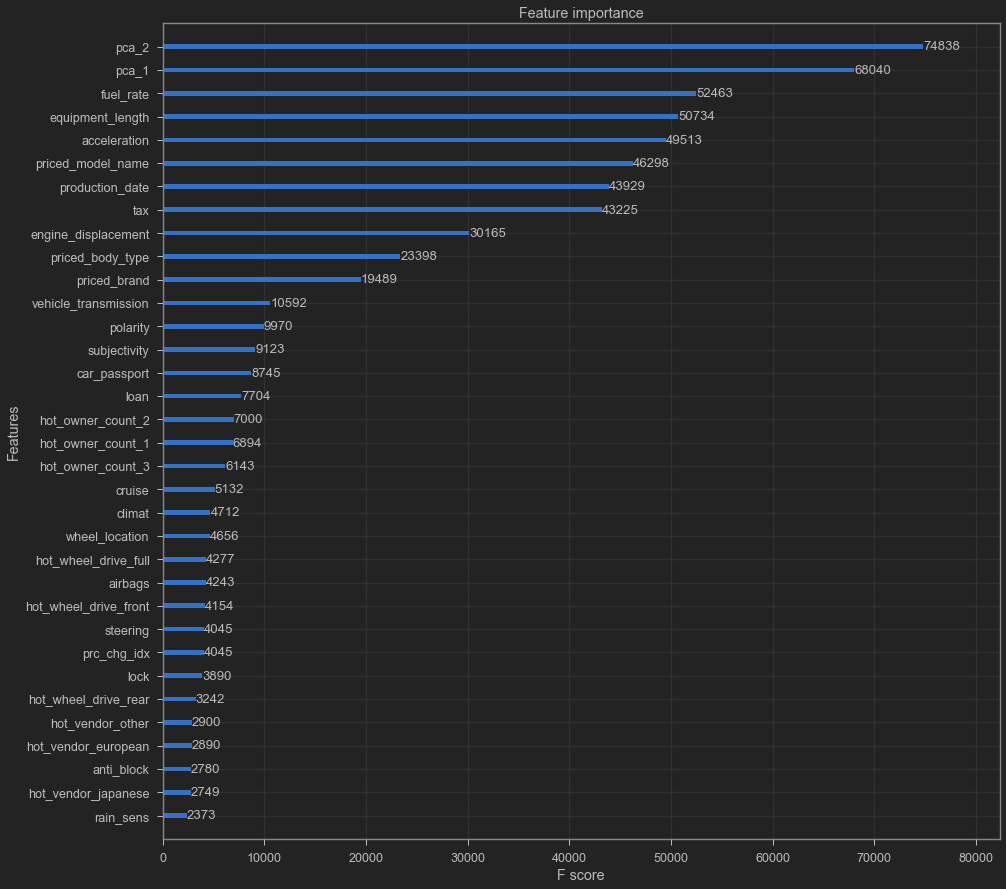

In [129]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
plot_importance(xg_reg,ax=ax);

Weel, pca_1 and pca_2 is a combination of 'mileage', 'model_date', 'production_date' columns. And it has stronger importance than other columsn.

We also can confirm our hypothesis that equipment lenght (i.e how many different equipment each car has) is impact on the price.

Tax also has significant impact on the final price. 


In [166]:
# Let's train model on full data
xg_reg.fit(X, y)

[20:20:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=12,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=1, reg_lambda=1, scale_pos_weight=1, silent=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [168]:
submission_XGboost = pd.DataFrame({'sell_id': sell_id,
                           'price': np.exp(xg_reg.predict(X_test))*0.905})

submission_XGboost.to_csv('submission_XGboost.csv', index=False)

<a id="sec7.5"></a>
## [7.5 LightGBM](#sec7.5)
[(INDEX)](#sec1)

Personally I like the Light GBM class because it gives us always predicteble good results with low time consumption. Let's try it.

First, define params by our selves (underhood made lot's of attempts to find the best)

In [131]:
# Defining lightgbm hyper-parameters
hyper_params = {
                'task': 'train',
                'boosting_type': 'gbdt',
                'objective': 'regression',
                'metric': ['mape'],
                'learning_rate': 0.05,
                'feature_fraction': 0.9,
                'bagging_fraction': 0.7,
                'bagging_freq': 10,
                'verbose': 0,
                "max_depth": 12,
                "num_leaves": 128,  
                "max_bin": 512,
                "num_iterations": 1000,
                "n_estimators": 1000
            }

# Training lightgbm model
lgbm = lgb.LGBMRegressor(**hyper_params)
lgbm.fit(X_train, y_train,
         eval_set=[(X_val, y_val)],
         eval_metric='l1',
         early_stopping_rounds=100)

[1]	valid_0's l1: 0.906669	valid_0's mape: 0.067935
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 0.863622	valid_0's mape: 0.0647234
[3]	valid_0's l1: 0.823063	valid_0's mape: 0.0616976
[4]	valid_0's l1: 0.784402	valid_0's mape: 0.0588127
[5]	valid_0's l1: 0.74781	valid_0's mape: 0.0560824
[6]	valid_0's l1: 0.713059	valid_0's mape: 0.0534889
[7]	valid_0's l1: 0.680052	valid_0's mape: 0.0510254
[8]	valid_0's l1: 0.648916	valid_0's mape: 0.0487019
[9]	valid_0's l1: 0.619435	valid_0's mape: 0.0465015
[10]	valid_0's l1: 0.591469	valid_0's mape: 0.0444143
[11]	valid_0's l1: 0.565123	valid_0's mape: 0.0424482
[12]	valid_0's l1: 0.540186	valid_0's mape: 0.0405878
[13]	valid_0's l1: 0.516699	valid_0's mape: 0.0388357
[14]	valid_0's l1: 0.494377	valid_0's mape: 0.0371699
[15]	valid_0's l1: 0.473226	valid_0's mape: 0.0355919
[16]	valid_0's l1: 0.453352	valid_0's mape: 0.0341088
[17]	valid_0's l1: 0.434447	valid_0's mape: 0.0326985
[18]	valid_0's l1: 0.416704	val

[152]	valid_0's l1: 0.150826	valid_0's mape: 0.0117397
[153]	valid_0's l1: 0.150793	valid_0's mape: 0.0117377
[154]	valid_0's l1: 0.150719	valid_0's mape: 0.0117326
[155]	valid_0's l1: 0.150712	valid_0's mape: 0.0117323
[156]	valid_0's l1: 0.150651	valid_0's mape: 0.011728
[157]	valid_0's l1: 0.150586	valid_0's mape: 0.0117233
[158]	valid_0's l1: 0.150556	valid_0's mape: 0.0117212
[159]	valid_0's l1: 0.150503	valid_0's mape: 0.0117176
[160]	valid_0's l1: 0.150429	valid_0's mape: 0.0117123
[161]	valid_0's l1: 0.150422	valid_0's mape: 0.0117116
[162]	valid_0's l1: 0.150385	valid_0's mape: 0.011709
[163]	valid_0's l1: 0.150397	valid_0's mape: 0.01171
[164]	valid_0's l1: 0.150354	valid_0's mape: 0.0117072
[165]	valid_0's l1: 0.150304	valid_0's mape: 0.0117036
[166]	valid_0's l1: 0.15024	valid_0's mape: 0.0116991
[167]	valid_0's l1: 0.150222	valid_0's mape: 0.0116979
[168]	valid_0's l1: 0.150184	valid_0's mape: 0.0116951
[169]	valid_0's l1: 0.15016	valid_0's mape: 0.0116937
[170]	valid_0's 

[313]	valid_0's l1: 0.148346	valid_0's mape: 0.0115701
[314]	valid_0's l1: 0.148346	valid_0's mape: 0.0115701
[315]	valid_0's l1: 0.148346	valid_0's mape: 0.0115701
[316]	valid_0's l1: 0.148347	valid_0's mape: 0.0115701
[317]	valid_0's l1: 0.148347	valid_0's mape: 0.0115702
[318]	valid_0's l1: 0.14835	valid_0's mape: 0.0115704
[319]	valid_0's l1: 0.148353	valid_0's mape: 0.0115706
[320]	valid_0's l1: 0.14835	valid_0's mape: 0.0115704
[321]	valid_0's l1: 0.148332	valid_0's mape: 0.0115689
[322]	valid_0's l1: 0.148328	valid_0's mape: 0.0115686
[323]	valid_0's l1: 0.148325	valid_0's mape: 0.0115684
[324]	valid_0's l1: 0.148317	valid_0's mape: 0.0115678
[325]	valid_0's l1: 0.148304	valid_0's mape: 0.0115669
[326]	valid_0's l1: 0.148295	valid_0's mape: 0.0115662
[327]	valid_0's l1: 0.148255	valid_0's mape: 0.0115635
[328]	valid_0's l1: 0.148247	valid_0's mape: 0.0115629
[329]	valid_0's l1: 0.148215	valid_0's mape: 0.0115606
[330]	valid_0's l1: 0.148205	valid_0's mape: 0.0115597
[331]	valid_

[477]	valid_0's l1: 0.147373	valid_0's mape: 0.0115075
[478]	valid_0's l1: 0.14737	valid_0's mape: 0.0115073
[479]	valid_0's l1: 0.147376	valid_0's mape: 0.0115078
[480]	valid_0's l1: 0.14737	valid_0's mape: 0.0115074
[481]	valid_0's l1: 0.147369	valid_0's mape: 0.0115074
[482]	valid_0's l1: 0.14738	valid_0's mape: 0.0115083
[483]	valid_0's l1: 0.147379	valid_0's mape: 0.0115082
[484]	valid_0's l1: 0.147353	valid_0's mape: 0.0115065
[485]	valid_0's l1: 0.147353	valid_0's mape: 0.0115064
[486]	valid_0's l1: 0.147354	valid_0's mape: 0.0115066
[487]	valid_0's l1: 0.147341	valid_0's mape: 0.0115057
[488]	valid_0's l1: 0.147314	valid_0's mape: 0.0115038
[489]	valid_0's l1: 0.147311	valid_0's mape: 0.0115036
[490]	valid_0's l1: 0.147305	valid_0's mape: 0.0115032
[491]	valid_0's l1: 0.147303	valid_0's mape: 0.0115032
[492]	valid_0's l1: 0.147301	valid_0's mape: 0.0115031
[493]	valid_0's l1: 0.147294	valid_0's mape: 0.0115026
[494]	valid_0's l1: 0.147311	valid_0's mape: 0.0115041
[495]	valid_0

[628]	valid_0's l1: 0.14662	valid_0's mape: 0.0114599
[629]	valid_0's l1: 0.146617	valid_0's mape: 0.0114597
[630]	valid_0's l1: 0.146615	valid_0's mape: 0.0114596
[631]	valid_0's l1: 0.146617	valid_0's mape: 0.0114598
[632]	valid_0's l1: 0.146613	valid_0's mape: 0.0114596
[633]	valid_0's l1: 0.146615	valid_0's mape: 0.0114597
[634]	valid_0's l1: 0.146615	valid_0's mape: 0.0114598
[635]	valid_0's l1: 0.146616	valid_0's mape: 0.0114598
[636]	valid_0's l1: 0.146614	valid_0's mape: 0.0114598
[637]	valid_0's l1: 0.146621	valid_0's mape: 0.0114603
[638]	valid_0's l1: 0.14662	valid_0's mape: 0.0114603
[639]	valid_0's l1: 0.146613	valid_0's mape: 0.0114599
[640]	valid_0's l1: 0.146609	valid_0's mape: 0.0114596
[641]	valid_0's l1: 0.146592	valid_0's mape: 0.0114585
[642]	valid_0's l1: 0.146579	valid_0's mape: 0.0114575
[643]	valid_0's l1: 0.146571	valid_0's mape: 0.0114569
[644]	valid_0's l1: 0.146569	valid_0's mape: 0.0114568
[645]	valid_0's l1: 0.146566	valid_0's mape: 0.0114567
[646]	valid_

[781]	valid_0's l1: 0.146269	valid_0's mape: 0.0114396
[782]	valid_0's l1: 0.146268	valid_0's mape: 0.0114395
[783]	valid_0's l1: 0.146273	valid_0's mape: 0.0114399
[784]	valid_0's l1: 0.146264	valid_0's mape: 0.0114391
[785]	valid_0's l1: 0.146255	valid_0's mape: 0.0114382
[786]	valid_0's l1: 0.146262	valid_0's mape: 0.0114388
[787]	valid_0's l1: 0.146259	valid_0's mape: 0.0114385
[788]	valid_0's l1: 0.146259	valid_0's mape: 0.0114385
[789]	valid_0's l1: 0.146254	valid_0's mape: 0.0114381
[790]	valid_0's l1: 0.146254	valid_0's mape: 0.0114381
[791]	valid_0's l1: 0.146251	valid_0's mape: 0.0114379
[792]	valid_0's l1: 0.146253	valid_0's mape: 0.0114381
[793]	valid_0's l1: 0.146246	valid_0's mape: 0.0114376
[794]	valid_0's l1: 0.146252	valid_0's mape: 0.0114381
[795]	valid_0's l1: 0.146249	valid_0's mape: 0.0114379
[796]	valid_0's l1: 0.146264	valid_0's mape: 0.0114391
[797]	valid_0's l1: 0.146268	valid_0's mape: 0.0114395
[798]	valid_0's l1: 0.146258	valid_0's mape: 0.0114389
[799]	vali

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
              learning_rate=0.05, max_bin=512, max_depth=12, metric=['mape'],
              n_estimators=1000, num_iterations=1000, num_leaves=128,
              objective='regression', task='train', verbose=0)

In [132]:
lgb_pred = lgbm.predict(X_val)

In [133]:
df_report = get_regression_metrics(df_report,y_val,lgb_pred, 'LGB_manual')
df_report

MAPE       MAE             MSE      RMSE
RandomForest    15.56 119194.61  95136495491.60 308442.05
ExtraTree_GS    15.26 116944.72  94103766340.24 306763.37
ExtraTree_WO_GS 15.29 116881.40  92184381331.55 303618.81
CatBoost        15.63 134224.15 113774703095.38 337305.06
XGBoost_1       15.20 118031.65  87493654273.21 295793.26
LGB_manual      15.76 131868.86 105034378959.09 324090.08

Oi....

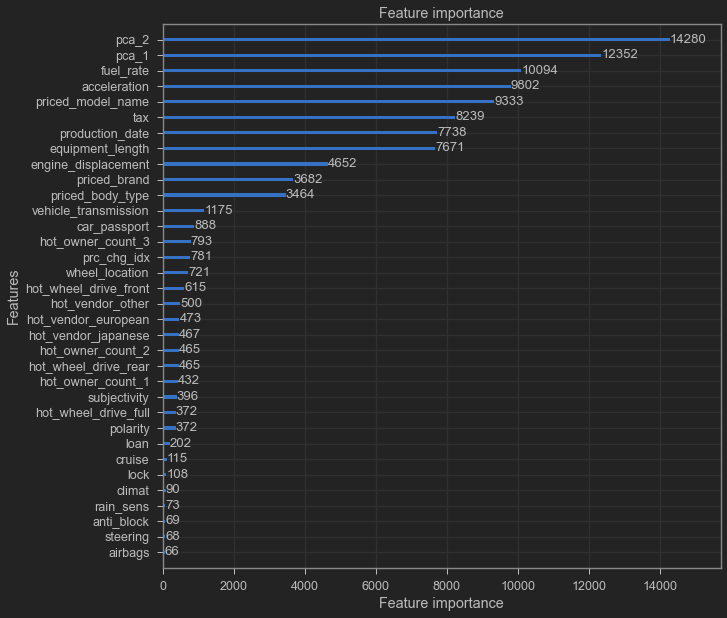

In [134]:
# Check permutation
lightgbm.plot_importance(lgbm, ax=None, height=0.2, xlim=None, ylim=None,
                         title='Feature importance', xlabel='Feature importance', 
                         ylabel='Features', importance_type='split', max_num_features=None,
                         ignore_zero=True, figsize=(10,10), dpi=None, grid=True, precision=3);

Feature importance is more or less similar with importance to XGboost

<a id="sec7.6"></a>
## [7.6 LightGBM+OPTUNA](#sec7.6)
[(INDEX)](#sec1)

But it was manual insertion of parameters. Let's try something more advanced. OPTUNA.

In [135]:
# Defining MAPE function since it was removed from sklearn
def mape_11(y_pred,y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true) * 100)

In [136]:
def objective(trial,data=X,target=y):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.2,random_state=42)
    param = {
        'metric': 'mape', 
        'random_state': 42,
        'n_estimators': trial.suggest_categorical('n_estimators', [50, 100,500,700]),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.006,0.008,0.01,0.014,0.017,0.02]),
        'max_depth': trial.suggest_categorical('max_depth', [10,20,100]),
        'num_leaves' : trial.suggest_int('num_leaves', 1, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
        'cat_smooth' : trial.suggest_int('min_data_per_groups', 1, 100)
    }
    model = lgb.LGBMRegressor(**param)  
    
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(test_x)
    
    mape = mape_11(np.expm1(test_y), np.expm1(preds))
    
    return mape

In [137]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

[I 2021-06-02 19:40:38,927] A new study created in memory with name: no-name-c10b9326-92bd-480d-8776-93f38ab00773
[I 2021-06-02 19:40:40,671] Trial 0 finished with value: 90.87409816330117 and parameters: {'n_estimators': 50, 'reg_alpha': 0.8716450228207215, 'reg_lambda': 0.007208952670650381, 'colsample_bytree': 0.7, 'subsample': 0.7, 'learning_rate': 0.006, 'max_depth': 10, 'num_leaves': 757, 'min_child_samples': 36, 'min_data_per_groups': 68}. Best is trial 0 with value: 90.87409816330117.
[I 2021-06-02 19:40:42,328] Trial 1 finished with value: 41.98864107142164 and parameters: {'n_estimators': 50, 'reg_alpha': 0.4129813719326793, 'reg_lambda': 4.195497379412218, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 599, 'min_child_samples': 36, 'min_data_per_groups': 16}. Best is trial 1 with value: 41.98864107142164.
[I 2021-06-02 19:40:43,875] Trial 2 finished with value: 91.0520841443464 and parameters: {'n_estimators': 50, 'reg_alpha

[I 2021-06-02 19:44:03,300] Trial 21 finished with value: 15.13194368475371 and parameters: {'n_estimators': 700, 'reg_alpha': 0.23015062905974623, 'reg_lambda': 9.696182062671229, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 20, 'num_leaves': 459, 'min_child_samples': 60, 'min_data_per_groups': 1}. Best is trial 17 with value: 14.98947589444855.
[I 2021-06-02 19:44:18,878] Trial 22 finished with value: 15.223773875674448 and parameters: {'n_estimators': 700, 'reg_alpha': 0.05196371089457459, 'reg_lambda': 9.147873476870634, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 0.01, 'max_depth': 20, 'num_leaves': 301, 'min_child_samples': 14, 'min_data_per_groups': 9}. Best is trial 17 with value: 14.98947589444855.
[I 2021-06-02 19:44:34,495] Trial 23 finished with value: 14.92044204361439 and parameters: {'n_estimators': 700, 'reg_alpha': 0.25426079822812864, 'reg_lambda': 2.760501173890044, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learnin

[I 2021-06-02 19:49:17,947] Trial 42 finished with value: 15.115192221388572 and parameters: {'n_estimators': 700, 'reg_alpha': 0.08409148434595796, 'reg_lambda': 0.03476225228508618, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 0.008, 'max_depth': 100, 'num_leaves': 517, 'min_child_samples': 17, 'min_data_per_groups': 77}. Best is trial 34 with value: 14.857175899428258.
[I 2021-06-02 19:49:43,388] Trial 43 finished with value: 14.882916776256316 and parameters: {'n_estimators': 700, 'reg_alpha': 0.28849989205450133, 'reg_lambda': 0.09410281300065179, 'colsample_bytree': 0.5, 'subsample': 0.7, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 718, 'min_child_samples': 1, 'min_data_per_groups': 68}. Best is trial 34 with value: 14.857175899428258.
[I 2021-06-02 19:50:11,203] Trial 44 finished with value: 14.997234534657007 and parameters: {'n_estimators': 700, 'reg_alpha': 4.3130939383243065, 'reg_lambda': 0.1060644877045316, 'colsample_bytree': 0.5, 'subsample': 0.

In [138]:
# plot_optimization_histor: shows the scores from all trials as 
# well as the best score so far at each point.
optuna.visualization.plot_optimization_history(study)

Most of trials were found minimum of error func

In [139]:
#Visualize parameter importances.
optuna.visualization.plot_param_importances(study)

For this dataset the most important parameter is n_estimators.

In [140]:
#Visualize empirical distribution function
optuna.visualization.plot_edf(study)

Let's feed all of this to the model and check metrics

In [141]:
param_lgb = study.best_params

In [142]:
lgb_opt = lgb.LGBMRegressor(**param_lgb)
lgb_opt.fit(X_train, y_train,)
#          eval_set=[(X_val, y_val)],
#          eval_metric='l1',
#          early_stopping_rounds=100)


LGBMRegressor(colsample_bytree=0.5, learning_rate=0.017, max_depth=20,
              min_child_samples=30, min_data_per_groups=82, n_estimators=700,
              num_leaves=536, reg_alpha=0.5140989943366134,
              reg_lambda=0.15520289095797568, subsample=0.7)

In [143]:
lgb_opt_pred = lgb_opt.predict(X_val)

In [144]:
df_report = get_regression_metrics(df_report,y_val,lgb_opt_pred, 'LGB+optuna')
df_report

MAPE       MAE             MSE      RMSE
RandomForest    15.56 119194.61  95136495491.60 308442.05
ExtraTree_GS    15.26 116944.72  94103766340.24 306763.37
ExtraTree_WO_GS 15.29 116881.40  92184381331.55 303618.81
CatBoost        15.63 134224.15 113774703095.38 337305.06
XGBoost_1       15.20 118031.65  87493654273.21 295793.26
LGB_manual      15.76 131868.86 105034378959.09 324090.08
LGB+optuna      15.13 124203.10 105001595639.39 324039.50

In [164]:
lgb_opt = lgb.LGBMRegressor(**param_lgb)
lgb_opt.fit(X, y,)

LGBMRegressor(colsample_bytree=0.5, learning_rate=0.017, max_depth=20,
              min_child_samples=30, min_data_per_groups=82, n_estimators=700,
              num_leaves=536, reg_alpha=0.5140989943366134,
              reg_lambda=0.15520289095797568, subsample=0.7)

In [169]:
submission_lgbm = pd.DataFrame({'sell_id': sell_id,
                           'price': np.exp(lgbm.predict(X_test))*0.905})

submission_lgbm.to_csv('submission_lgbm.csv', index=False)

Aha, I told you. LGB is the best one. But RMSE not so good as in XGboost. But we need MAPE for this competition... Our model make an error about 300K RUB in average.

<a id="sec7.7"></a>
## [7.7 SKLEARN BOOSTER](#sec7.7)
[(INDEX)](#sec1)

Try some booster from sklearn

In [146]:
params = {'n_estimators': 800,
          'max_depth': 8,
          'min_samples_split': 7,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [147]:
gboost = GradientBoostingRegressor(**params)
gboost.fit(X_train, y_train)
gboost_pred = gboost.predict(X_val)

In [148]:
df_report = get_regression_metrics(df_report,y_val,gboost_pred, 'GBOOST')
df_report

MAPE       MAE             MSE      RMSE
RandomForest    15.56 119194.61  95136495491.60 308442.05
ExtraTree_GS    15.26 116944.72  94103766340.24 306763.37
ExtraTree_WO_GS 15.29 116881.40  92184381331.55 303618.81
CatBoost        15.63 134224.15 113774703095.38 337305.06
XGBoost_1       15.20 118031.65  87493654273.21 295793.26
LGB_manual      15.76 131868.86 105034378959.09 324090.08
LGB+optuna      15.13 124203.10 105001595639.39 324039.50
GBOOST          15.84 136976.67 115512503490.04 339871.30

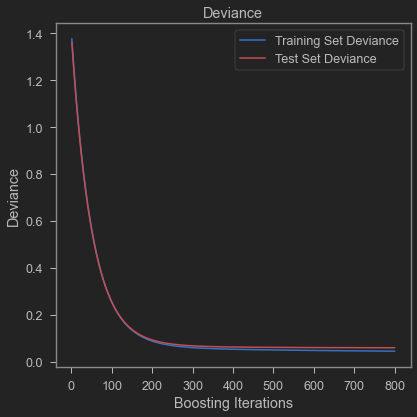

In [149]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, gboost_pred in enumerate(gboost.staged_predict(X_val)):
    test_score[i] = gboost.loss_(y_val, gboost_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gboost.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

GBOOST gave not good results. Ignore it

In [150]:
# gboost.fit(X_train, y_train)

In [151]:
# submission_gboost = pd.DataFrame({'sell_id': sell_id,
#                            'price': np.exp(gboost.predict(X_test))*0.905})

# submission_gboost.to_csv('submission_gboost.csv', index=False)

<a id="sec7.8"></a>
## [7.8 STACKING](#sec7.8)
[(INDEX)](#sec1)

In [152]:
# from mlxtend.regressor import StackingRegressor

In [153]:
# ENet = ElasticNet()

In [154]:
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()

Let's try stacking. Take 3 best models and simple linear r

In [155]:
# stck_regrs = StackingRegressor(regressors=[etr,xg_reg,lgb_opt],
#                                meta_regressor=lr)

In [156]:
# stck_regrs.fit(X_train,y_train)

In [157]:
# y_pred_stck_regrs = stck_regrs.predict(X_val)

In [158]:
# df_report = get_regression_metrics(df_report,y_val,y_pred_stck_regrs, 'Stack')
# df_report

In [159]:
# extra_pred = rf.predict(X_test)
# cbr_pred = cbr.predict(X_test)
# xgboost_pred = xg_reg.predict(X_test)
# lgb_opt_pred = lgb_opt.predict(X_test)
# # lgb_pred = lgbm.predict(X_test)
# # gboost = gboost.predict(X_test)
# # stck = stck_regrs.predict(X_test)

In [160]:
# df_report

In [161]:
# ensemble = (xgboost_pred*.1 + extra_pred*.1 + cbr_pred*.1 + lgb_opt_pred* .7)

In [162]:
# #Submission
# stck_regrs = StackingRegressor(regressors=[lgbm, xg_reg, rf,cbr],
#                                meta_regressor=lr)
# stck_regrs.fit(X,y)

In [163]:
# submission_stack = pd.DataFrame({'sell_id': sell_id,
#                            'price': np.exp(ensemble)*.92})

# submission_stack.to_csv('submission_stack.csv', index=False)

<a id="sec8"></a>
# [7.8 CONCLUSION](#sec8)
[(INDEX)](#sec1)

During the scraping of the dataset there were no critical issues. All was fine (almost)

Scraped dataset has a shitload of missing values. It was a headache to clear them.
In addition, columns like ‘SuperGen’, ‘equipment dict’ had implicit data gaps. There was a single symbol, as a result pandas’ instruments were not allowed to detect them.

It was decided to use Robust Scaler as it is more resistant to outliers.

Target has outliers, however, during experiments, if we drop those outliers then our main Metric MAPE also drops. It is decided to keep outliers.

***CONCLUSION ABOUT MODELS:***

Extra Tree Regressors showed best results among trees. But the time of computing and resourses consumption....takes a lot.

GradientBoost(Sklearn) regressor showed worst results among boosters. Best one is LightGBM. Moreover it is fast as a light.

With some reason, stacking of the best models did not give good results. The situation: candy-input -> garbage out. Srtrange(

Neural networks have not given significant improvment. Vice verca, they given terrible result. They were excluded from this notebook.

Best results in the competition was obtained by using the manual ensembling of the models (13% errors)

***What has been done but not reflected in the notebook.***

Tried to apply deep learning models. Failed. The MAPE was about 300%. Due to the lack of knowledge of how to tune the neural networks, it was decided to not include it in the report.
Tried to break the dataset into clusters, teach models in the different clusters. During the EDA it was observed that BMW, MERCEDES has old cars with extremely high prices. So it was decided to put these cars into a different group and feed to the model. The results were good but not significant. It was decided to keep this idea and improve this way in future. 
From EDA we know that the price for some cars (in years X axis) dropping not linearly. We tried to make polynomial features, but without significant improvement of the MAPE. Due to the lack of time it was not observed carefully. Also, keep it for the future.

***What to do or how to improve:***

Try to use advanced methods for detecting outliers in the next projects.( foe ex. DB scan)

Try to use picewise linear regression. I think this only one way to improve the score, because our price changing not linearly. For some period of time it is dropping (from 2021 to 1970) and then start to grow again.

We applied a coefficient of price change to level the time difference. Since the test sample is from 2020, and we parse it in 2021. For the difference in price changes, we took 9.5 percent (67 dollars in 2020 and  74 dollars in 2021)